## Ch3. Linear Regression and Beyond

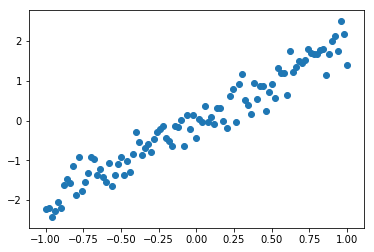

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1, 1, 101)
y_train = 2*x_train + np.random.randn(*x_train.shape) * 0.33
plt.scatter(x_train, y_train)
plt.show()

/Users/freestylebk/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


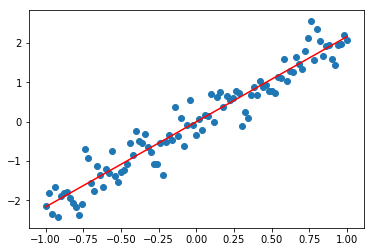

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# hyper-parameters라고 불리는 constants 지정
learning_rate = 0.01
training_epochs = 100

# fake data
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

# set up the input and output nodes as placeholders
# (입력값, 출력값을 위한 자리를 만들어 둔다는 말..?!)
X = tf.placeholder("float")
Y = tf.placeholder("float")

# model y=wx 를 만들어 줌.
def model(X, w):
    return tf.multiply(X, w)

# weight 설정
w = tf.Variable(0.0, name="weights")

# cost function 정의(squared distance)
y_model = model(X, w)
cost = tf.square(Y-y_model)

# 실제 learning operation 시키는 과정
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# session과 initialize 과정
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# epoch : 반복 학습 횟수
for epoch in range(training_epochs):
    # dataset에 있는 애들 대입
    for (x, y) in zip(x_train, y_train):
        # cost가 작아지도록 parameter 최적화
        sess.run(train_op, feed_dict={X: x, Y: y})
        
# final parameter w
w_val = sess.run(w)

sess.close()

# plot the original data
plt.scatter(x_train, y_train)
# plot the best fit line (with red line)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

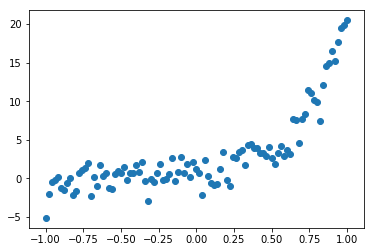

[0.73833674 1.8490149  4.4521933  4.604649   4.1698117  5.1606665 ]


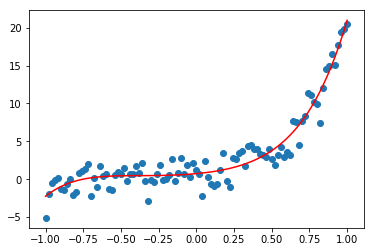

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 40

trX = np.linspace(-1, 1, 101)

num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs) :
    trY += trY_coeffs[i] * np.power(trX, i)

trY += np.random.randn(*trX.shape)*1.5

plt.scatter(trX, trY)
plt.show()
 
X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)
    
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
print(w_val)

sess.close()

plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
    
plt.plot(trX, trY2, 'r')
plt.show()

In [4]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    # 순서를 무작위로 섞어 arr에 배열하기
    np.random.shuffle(arr)
    # 몇 %를 train set으로 보낼건지 결정
    num_train = int(ratio * x_dataset.size)
    
    x_train = x_dataset[arr[0:num_train]]
    y_train = y_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

x_dataset = np.linspace(-1, 1, 100)
num_coeffs = 9
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)), tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))), 2*x_train.size)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})
        final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test})
        print('reg lambda', reg_lambda)
        print('final cost', final_cost)
        
sess.close()

reg lambda 0.0
final cost 0.040093735
reg lambda 0.0
final cost 0.040029686
reg lambda 0.0
final cost 0.03996582
reg lambda 0.0
final cost 0.03990212
reg lambda 0.0
final cost 0.039838605
reg lambda 0.0
final cost 0.03977526
reg lambda 0.0
final cost 0.039712083
reg lambda 0.0
final cost 0.039649077
reg lambda 0.0
final cost 0.03958625
reg lambda 0.0
final cost 0.03952359
reg lambda 0.0
final cost 0.039461102
reg lambda 0.0
final cost 0.039398786
reg lambda 0.0
final cost 0.039336637
reg lambda 0.0
final cost 0.03927466
reg lambda 0.0
final cost 0.039212845
reg lambda 0.0
final cost 0.03915121
reg lambda 0.0
final cost 0.039089736
reg lambda 0.0
final cost 0.039028432
reg lambda 0.0
final cost 0.038967293
reg lambda 0.0
final cost 0.038906317
reg lambda 0.0
final cost 0.03884552
reg lambda 0.0
final cost 0.038784884
reg lambda 0.0
final cost 0.03872441
reg lambda 0.0
final cost 0.0386641
reg lambda 0.0
final cost 0.038603958
reg lambda 0.0
final cost 0.03854398
reg lambda 0.0
final cos

reg lambda 0.0
final cost 0.02926086
reg lambda 0.0
final cost 0.029226607
reg lambda 0.0
final cost 0.029192444
reg lambda 0.0
final cost 0.029158378
reg lambda 0.0
final cost 0.029124403
reg lambda 0.0
final cost 0.029090531
reg lambda 0.0
final cost 0.029056747
reg lambda 0.0
final cost 0.029023059
reg lambda 0.0
final cost 0.028989462
reg lambda 0.0
final cost 0.02895596
reg lambda 0.0
final cost 0.02892255
reg lambda 0.0
final cost 0.028889237
reg lambda 0.0
final cost 0.028856011
reg lambda 0.0
final cost 0.028822886
reg lambda 0.0
final cost 0.028789844
reg lambda 0.0
final cost 0.028756902
reg lambda 0.0
final cost 0.028724046
reg lambda 0.0
final cost 0.028691284
reg lambda 0.0
final cost 0.028658612
reg lambda 0.0
final cost 0.028626034
reg lambda 0.0
final cost 0.028593544
reg lambda 0.0
final cost 0.028561143
reg lambda 0.0
final cost 0.028528836
reg lambda 0.0
final cost 0.028496616
reg lambda 0.0
final cost 0.028464487
reg lambda 0.0
final cost 0.028432447
reg lambda 0.0


reg lambda 0.0
final cost 0.023646465
reg lambda 0.0
final cost 0.023627969
reg lambda 0.0
final cost 0.023609525
reg lambda 0.0
final cost 0.023591131
reg lambda 0.0
final cost 0.023572786
reg lambda 0.0
final cost 0.023554498
reg lambda 0.0
final cost 0.02353626
reg lambda 0.0
final cost 0.023518076
reg lambda 0.0
final cost 0.02349994
reg lambda 0.0
final cost 0.023481857
reg lambda 0.0
final cost 0.023463828
reg lambda 0.0
final cost 0.023445848
reg lambda 0.0
final cost 0.023427919
reg lambda 0.0
final cost 0.02341004
reg lambda 0.0
final cost 0.023392214
reg lambda 0.0
final cost 0.023374436
reg lambda 0.0
final cost 0.023356708
reg lambda 0.0
final cost 0.023339037
reg lambda 0.0
final cost 0.023321409
reg lambda 0.0
final cost 0.023303833
reg lambda 0.0
final cost 0.02328631
reg lambda 0.0
final cost 0.023268834
reg lambda 0.0
final cost 0.023251409
reg lambda 0.0
final cost 0.023234032
reg lambda 0.0
final cost 0.023216706
reg lambda 0.0
final cost 0.023199426
reg lambda 0.0
f

reg lambda 0.0
final cost 0.02028471
reg lambda 0.0
final cost 0.020275848
reg lambda 0.0
final cost 0.020267006
reg lambda 0.0
final cost 0.02025819
reg lambda 0.0
final cost 0.0202494
reg lambda 0.0
final cost 0.020240637
reg lambda 0.0
final cost 0.020231899
reg lambda 0.0
final cost 0.020223185
reg lambda 0.0
final cost 0.020214496
reg lambda 0.0
final cost 0.020205833
reg lambda 0.0
final cost 0.020197194
reg lambda 0.0
final cost 0.020188583
reg lambda 0.0
final cost 0.020179996
reg lambda 0.0
final cost 0.020171432
reg lambda 0.0
final cost 0.020162892
reg lambda 0.0
final cost 0.020154381
reg lambda 0.0
final cost 0.020145893
reg lambda 0.0
final cost 0.020137427
reg lambda 0.0
final cost 0.020128988
reg lambda 0.0
final cost 0.020120572
reg lambda 0.0
final cost 0.020112183
reg lambda 0.0
final cost 0.020103814
reg lambda 0.0
final cost 0.020095471
reg lambda 0.0
final cost 0.020087153
reg lambda 0.0
final cost 0.02007886
reg lambda 0.0
final cost 0.020070588
reg lambda 0.0
fi

reg lambda 0.0
final cost 0.018659804
reg lambda 0.0
final cost 0.018655648
reg lambda 0.0
final cost 0.0186515
reg lambda 0.0
final cost 0.018647367
reg lambda 0.0
final cost 0.018643241
reg lambda 0.0
final cost 0.01863913
reg lambda 0.0
final cost 0.01863503
reg lambda 0.0
final cost 0.018630942
reg lambda 0.0
final cost 0.018626867
reg lambda 0.0
final cost 0.018622804
reg lambda 0.0
final cost 0.018618753
reg lambda 0.0
final cost 0.018614711
reg lambda 0.0
final cost 0.018610682
reg lambda 0.0
final cost 0.018606666
reg lambda 0.0
final cost 0.018602658
reg lambda 0.0
final cost 0.018598665
reg lambda 0.0
final cost 0.01859468
reg lambda 0.0
final cost 0.018590707
reg lambda 0.0
final cost 0.01858675
reg lambda 0.0
final cost 0.0185828
reg lambda 0.0
final cost 0.018578863
reg lambda 0.0
final cost 0.018574936
reg lambda 0.0
final cost 0.018571021
reg lambda 0.0
final cost 0.018567117
reg lambda 0.0
final cost 0.018563224
reg lambda 0.0
final cost 0.018559346
reg lambda 0.0
final

final cost 0.018119678
reg lambda 0.010101010101010102
final cost 0.018117052
reg lambda 0.010101010101010102
final cost 0.018114433
reg lambda 0.010101010101010102
final cost 0.01811182
reg lambda 0.010101010101010102
final cost 0.018109215
reg lambda 0.010101010101010102
final cost 0.018106617
reg lambda 0.010101010101010102
final cost 0.018104028
reg lambda 0.010101010101010102
final cost 0.018101446
reg lambda 0.010101010101010102
final cost 0.018098868
reg lambda 0.010101010101010102
final cost 0.0180963
reg lambda 0.010101010101010102
final cost 0.018093737
reg lambda 0.010101010101010102
final cost 0.018091183
reg lambda 0.010101010101010102
final cost 0.018088637
reg lambda 0.010101010101010102
final cost 0.018086094
reg lambda 0.010101010101010102
final cost 0.018083563
reg lambda 0.010101010101010102
final cost 0.018081035
reg lambda 0.010101010101010102
final cost 0.018078517
reg lambda 0.010101010101010102
final cost 0.018076003
reg lambda 0.010101010101010102
final cost 0.

reg lambda 0.010101010101010102
final cost 0.017727062
reg lambda 0.010101010101010102
final cost 0.017725477
reg lambda 0.010101010101010102
final cost 0.017723892
reg lambda 0.010101010101010102
final cost 0.017722316
reg lambda 0.010101010101010102
final cost 0.017720738
reg lambda 0.010101010101010102
final cost 0.01771917
reg lambda 0.010101010101010102
final cost 0.017717604
reg lambda 0.010101010101010102
final cost 0.017716037
reg lambda 0.010101010101010102
final cost 0.01771448
reg lambda 0.010101010101010102
final cost 0.017712926
reg lambda 0.010101010101010102
final cost 0.017711373
reg lambda 0.010101010101010102
final cost 0.017709825
reg lambda 0.010101010101010102
final cost 0.01770828
reg lambda 0.010101010101010102
final cost 0.01770674
reg lambda 0.010101010101010102
final cost 0.017705202
reg lambda 0.010101010101010102
final cost 0.017703671
reg lambda 0.010101010101010102
final cost 0.017702144
reg lambda 0.010101010101010102
final cost 0.017700618
reg lambda 0.0

final cost 0.017454349
reg lambda 0.010101010101010102
final cost 0.01745336
reg lambda 0.010101010101010102
final cost 0.01745237
reg lambda 0.010101010101010102
final cost 0.017451387
reg lambda 0.010101010101010102
final cost 0.017450403
reg lambda 0.010101010101010102
final cost 0.017449418
reg lambda 0.010101010101010102
final cost 0.017448438
reg lambda 0.010101010101010102
final cost 0.01744746
reg lambda 0.010101010101010102
final cost 0.017446484
reg lambda 0.010101010101010102
final cost 0.017445507
reg lambda 0.010101010101010102
final cost 0.017444536
reg lambda 0.010101010101010102
final cost 0.017443562
reg lambda 0.010101010101010102
final cost 0.017442593
reg lambda 0.010101010101010102
final cost 0.017441623
reg lambda 0.010101010101010102
final cost 0.017440656
reg lambda 0.010101010101010102
final cost 0.017439693
reg lambda 0.010101010101010102
final cost 0.017438726
reg lambda 0.010101010101010102
final cost 0.017437767
reg lambda 0.010101010101010102
final cost 0.

reg lambda 0.010101010101010102
final cost 0.01727836
reg lambda 0.010101010101010102
final cost 0.01727762
reg lambda 0.010101010101010102
final cost 0.017276885
reg lambda 0.010101010101010102
final cost 0.01727615
reg lambda 0.010101010101010102
final cost 0.017275412
reg lambda 0.010101010101010102
final cost 0.017274678
reg lambda 0.010101010101010102
final cost 0.017273944
reg lambda 0.010101010101010102
final cost 0.017273212
reg lambda 0.010101010101010102
final cost 0.017272482
reg lambda 0.010101010101010102
final cost 0.017271748
reg lambda 0.010101010101010102
final cost 0.017271016
reg lambda 0.010101010101010102
final cost 0.01727029
reg lambda 0.010101010101010102
final cost 0.017269557
reg lambda 0.010101010101010102
final cost 0.017268827
reg lambda 0.010101010101010102
final cost 0.017268103
reg lambda 0.010101010101010102
final cost 0.017267374
reg lambda 0.010101010101010102
final cost 0.017266646
reg lambda 0.010101010101010102
final cost 0.01726592
reg lambda 0.01

final cost 0.017163914
reg lambda 0.010101010101010102
final cost 0.017163262
reg lambda 0.010101010101010102
final cost 0.017162608
reg lambda 0.010101010101010102
final cost 0.017161954
reg lambda 0.010101010101010102
final cost 0.017161302
reg lambda 0.010101010101010102
final cost 0.017160652
reg lambda 0.010101010101010102
final cost 0.01716
reg lambda 0.010101010101010102
final cost 0.01715935
reg lambda 0.010101010101010102
final cost 0.017158698
reg lambda 0.010101010101010102
final cost 0.017158046
reg lambda 0.010101010101010102
final cost 0.017157398
reg lambda 0.010101010101010102
final cost 0.017156748
reg lambda 0.010101010101010102
final cost 0.017156098
reg lambda 0.010101010101010102
final cost 0.017155448
reg lambda 0.010101010101010102
final cost 0.0171548
reg lambda 0.010101010101010102
final cost 0.017154148
reg lambda 0.010101010101010102
final cost 0.017153502
reg lambda 0.010101010101010102
final cost 0.017152851
reg lambda 0.010101010101010102
final cost 0.0171

final cost 0.01704479
reg lambda 0.020202020202020204
final cost 0.017044168
reg lambda 0.020202020202020204
final cost 0.017043546
reg lambda 0.020202020202020204
final cost 0.017042924
reg lambda 0.020202020202020204
final cost 0.017042302
reg lambda 0.020202020202020204
final cost 0.017041681
reg lambda 0.020202020202020204
final cost 0.01704106
reg lambda 0.020202020202020204
final cost 0.017040437
reg lambda 0.020202020202020204
final cost 0.017039817
reg lambda 0.020202020202020204
final cost 0.017039195
reg lambda 0.020202020202020204
final cost 0.017038574
reg lambda 0.020202020202020204
final cost 0.01703795
reg lambda 0.020202020202020204
final cost 0.01703733
reg lambda 0.020202020202020204
final cost 0.017036708
reg lambda 0.020202020202020204
final cost 0.017036088
reg lambda 0.020202020202020204
final cost 0.017035468
reg lambda 0.020202020202020204
final cost 0.017034844
reg lambda 0.020202020202020204
final cost 0.017034223
reg lambda 0.020202020202020204
final cost 0.0

final cost 0.016950445
reg lambda 0.020202020202020204
final cost 0.016949823
reg lambda 0.020202020202020204
final cost 0.016949203
reg lambda 0.020202020202020204
final cost 0.01694858
reg lambda 0.020202020202020204
final cost 0.016947957
reg lambda 0.020202020202020204
final cost 0.016947338
reg lambda 0.020202020202020204
final cost 0.016946714
reg lambda 0.020202020202020204
final cost 0.016946094
reg lambda 0.020202020202020204
final cost 0.01694547
reg lambda 0.020202020202020204
final cost 0.016944848
reg lambda 0.020202020202020204
final cost 0.016944226
reg lambda 0.020202020202020204
final cost 0.016943606
reg lambda 0.020202020202020204
final cost 0.016942982
reg lambda 0.020202020202020204
final cost 0.01694236
reg lambda 0.020202020202020204
final cost 0.016941737
reg lambda 0.020202020202020204
final cost 0.016941115
reg lambda 0.020202020202020204
final cost 0.016940491
reg lambda 0.020202020202020204
final cost 0.01693987
reg lambda 0.020202020202020204
final cost 0.0

reg lambda 0.020202020202020204
final cost 0.016816026
reg lambda 0.020202020202020204
final cost 0.016815392
reg lambda 0.020202020202020204
final cost 0.016814755
reg lambda 0.020202020202020204
final cost 0.01681412
reg lambda 0.020202020202020204
final cost 0.016813483
reg lambda 0.020202020202020204
final cost 0.016812848
reg lambda 0.020202020202020204
final cost 0.016812213
reg lambda 0.020202020202020204
final cost 0.016811576
reg lambda 0.020202020202020204
final cost 0.016810939
reg lambda 0.020202020202020204
final cost 0.016810304
reg lambda 0.020202020202020204
final cost 0.016809667
reg lambda 0.020202020202020204
final cost 0.016809028
reg lambda 0.020202020202020204
final cost 0.01680839
reg lambda 0.020202020202020204
final cost 0.016807754
reg lambda 0.020202020202020204
final cost 0.016807117
reg lambda 0.020202020202020204
final cost 0.016806481
reg lambda 0.020202020202020204
final cost 0.01680584
reg lambda 0.020202020202020204
final cost 0.016805204
reg lambda 0.

final cost 0.016708756
reg lambda 0.020202020202020204
final cost 0.016708106
reg lambda 0.020202020202020204
final cost 0.016707456
reg lambda 0.020202020202020204
final cost 0.016706808
reg lambda 0.020202020202020204
final cost 0.01670616
reg lambda 0.020202020202020204
final cost 0.016705511
reg lambda 0.020202020202020204
final cost 0.016704865
reg lambda 0.020202020202020204
final cost 0.016704213
reg lambda 0.020202020202020204
final cost 0.016703563
reg lambda 0.020202020202020204
final cost 0.016702916
reg lambda 0.020202020202020204
final cost 0.016702266
reg lambda 0.020202020202020204
final cost 0.016701616
reg lambda 0.020202020202020204
final cost 0.016700968
reg lambda 0.020202020202020204
final cost 0.016700318
reg lambda 0.020202020202020204
final cost 0.016699668
reg lambda 0.020202020202020204
final cost 0.016699016
reg lambda 0.020202020202020204
final cost 0.01669837
reg lambda 0.020202020202020204
final cost 0.01669772
reg lambda 0.020202020202020204
final cost 0.

final cost 0.016575862
reg lambda 0.020202020202020204
final cost 0.016575204
reg lambda 0.020202020202020204
final cost 0.016574543
reg lambda 0.020202020202020204
final cost 0.016573882
reg lambda 0.020202020202020204
final cost 0.016573222
reg lambda 0.020202020202020204
final cost 0.016572561
reg lambda 0.020202020202020204
final cost 0.016571904
reg lambda 0.020202020202020204
final cost 0.016571242
reg lambda 0.020202020202020204
final cost 0.016570581
reg lambda 0.020202020202020204
final cost 0.016569924
reg lambda 0.020202020202020204
final cost 0.016569264
reg lambda 0.020202020202020204
final cost 0.016568603
reg lambda 0.020202020202020204
final cost 0.016567944
reg lambda 0.020202020202020204
final cost 0.016567282
reg lambda 0.020202020202020204
final cost 0.016566623
reg lambda 0.020202020202020204
final cost 0.01656596
reg lambda 0.020202020202020204
final cost 0.016565302
reg lambda 0.020202020202020204
final cost 0.016564641
reg lambda 0.020202020202020204
final cost 

final cost 0.01647393
reg lambda 0.020202020202020204
final cost 0.016473265
reg lambda 0.020202020202020204
final cost 0.016472604
reg lambda 0.020202020202020204
final cost 0.01647194
reg lambda 0.020202020202020204
final cost 0.016471278
reg lambda 0.020202020202020204
final cost 0.016470613
reg lambda 0.020202020202020204
final cost 0.016469948
reg lambda 0.020202020202020204
final cost 0.016469287
reg lambda 0.020202020202020204
final cost 0.016468624
reg lambda 0.020202020202020204
final cost 0.01646796
reg lambda 0.020202020202020204
final cost 0.016467296
reg lambda 0.020202020202020204
final cost 0.016466632
reg lambda 0.020202020202020204
final cost 0.01646597
reg lambda 0.020202020202020204
final cost 0.016465306
reg lambda 0.030303030303030304
final cost 0.016464643
reg lambda 0.030303030303030304
final cost 0.016463978
reg lambda 0.030303030303030304
final cost 0.016463313
reg lambda 0.030303030303030304
final cost 0.016462652
reg lambda 0.030303030303030304
final cost 0.0

reg lambda 0.030303030303030304
final cost 0.016340664
reg lambda 0.030303030303030304
final cost 0.01634
reg lambda 0.030303030303030304
final cost 0.01633934
reg lambda 0.030303030303030304
final cost 0.01633868
reg lambda 0.030303030303030304
final cost 0.01633802
reg lambda 0.030303030303030304
final cost 0.016337356
reg lambda 0.030303030303030304
final cost 0.016336696
reg lambda 0.030303030303030304
final cost 0.016336035
reg lambda 0.030303030303030304
final cost 0.016335376
reg lambda 0.030303030303030304
final cost 0.016334713
reg lambda 0.030303030303030304
final cost 0.016334051
reg lambda 0.030303030303030304
final cost 0.01633339
reg lambda 0.030303030303030304
final cost 0.016332729
reg lambda 0.030303030303030304
final cost 0.016332068
reg lambda 0.030303030303030304
final cost 0.016331406
reg lambda 0.030303030303030304
final cost 0.016330747
reg lambda 0.030303030303030304
final cost 0.016330082
reg lambda 0.030303030303030304
final cost 0.016329423
reg lambda 0.03030

final cost 0.016224828
reg lambda 0.030303030303030304
final cost 0.016224174
reg lambda 0.030303030303030304
final cost 0.016223522
reg lambda 0.030303030303030304
final cost 0.016222866
reg lambda 0.030303030303030304
final cost 0.01622221
reg lambda 0.030303030303030304
final cost 0.016221557
reg lambda 0.030303030303030304
final cost 0.016220907
reg lambda 0.030303030303030304
final cost 0.016220251
reg lambda 0.030303030303030304
final cost 0.0162196
reg lambda 0.030303030303030304
final cost 0.016218945
reg lambda 0.030303030303030304
final cost 0.01621829
reg lambda 0.030303030303030304
final cost 0.016217638
reg lambda 0.030303030303030304
final cost 0.016216984
reg lambda 0.030303030303030304
final cost 0.01621633
reg lambda 0.030303030303030304
final cost 0.016215676
reg lambda 0.030303030303030304
final cost 0.016215023
reg lambda 0.030303030303030304
final cost 0.01621437
reg lambda 0.030303030303030304
final cost 0.016213719
reg lambda 0.030303030303030304
final cost 0.016

reg lambda 0.030303030303030304
final cost 0.016107505
reg lambda 0.030303030303030304
final cost 0.01610686
reg lambda 0.030303030303030304
final cost 0.01610622
reg lambda 0.030303030303030304
final cost 0.016105581
reg lambda 0.030303030303030304
final cost 0.016104938
reg lambda 0.030303030303030304
final cost 0.016104298
reg lambda 0.030303030303030304
final cost 0.016103655
reg lambda 0.030303030303030304
final cost 0.016103014
reg lambda 0.030303030303030304
final cost 0.016102372
reg lambda 0.030303030303030304
final cost 0.016101733
reg lambda 0.030303030303030304
final cost 0.016101092
reg lambda 0.030303030303030304
final cost 0.016100451
reg lambda 0.030303030303030304
final cost 0.016099809
reg lambda 0.030303030303030304
final cost 0.016099168
reg lambda 0.030303030303030304
final cost 0.01609853
reg lambda 0.030303030303030304
final cost 0.016097888
reg lambda 0.030303030303030304
final cost 0.01609725
reg lambda 0.030303030303030304
final cost 0.016096607
reg lambda 0.0

reg lambda 0.030303030303030304
final cost 0.015985917
reg lambda 0.030303030303030304
final cost 0.015985295
reg lambda 0.030303030303030304
final cost 0.01598467
reg lambda 0.030303030303030304
final cost 0.015984047
reg lambda 0.030303030303030304
final cost 0.015983423
reg lambda 0.030303030303030304
final cost 0.015982797
reg lambda 0.030303030303030304
final cost 0.015982175
reg lambda 0.030303030303030304
final cost 0.015981551
reg lambda 0.030303030303030304
final cost 0.01598093
reg lambda 0.030303030303030304
final cost 0.015980305
reg lambda 0.030303030303030304
final cost 0.01597968
reg lambda 0.030303030303030304
final cost 0.015979055
reg lambda 0.030303030303030304
final cost 0.015978433
reg lambda 0.030303030303030304
final cost 0.015977811
reg lambda 0.030303030303030304
final cost 0.015977189
reg lambda 0.030303030303030304
final cost 0.015976565
reg lambda 0.030303030303030304
final cost 0.015975943
reg lambda 0.030303030303030304
final cost 0.01597532
reg lambda 0.0

final cost 0.015884344
reg lambda 0.030303030303030304
final cost 0.015883736
reg lambda 0.030303030303030304
final cost 0.015883131
reg lambda 0.030303030303030304
final cost 0.015882524
reg lambda 0.030303030303030304
final cost 0.015881917
reg lambda 0.030303030303030304
final cost 0.015881311
reg lambda 0.030303030303030304
final cost 0.015880706
reg lambda 0.030303030303030304
final cost 0.015880099
reg lambda 0.030303030303030304
final cost 0.015879497
reg lambda 0.030303030303030304
final cost 0.01587889
reg lambda 0.030303030303030304
final cost 0.015878284
reg lambda 0.030303030303030304
final cost 0.015877679
reg lambda 0.030303030303030304
final cost 0.015877075
reg lambda 0.030303030303030304
final cost 0.01587647
reg lambda 0.030303030303030304
final cost 0.015875863
reg lambda 0.030303030303030304
final cost 0.01587526
reg lambda 0.030303030303030304
final cost 0.015874654
reg lambda 0.030303030303030304
final cost 0.015874049
reg lambda 0.030303030303030304
final cost 0.

reg lambda 0.04040404040404041
final cost 0.015785253
reg lambda 0.04040404040404041
final cost 0.015784668
reg lambda 0.04040404040404041
final cost 0.01578408
reg lambda 0.04040404040404041
final cost 0.015783494
reg lambda 0.04040404040404041
final cost 0.015782906
reg lambda 0.04040404040404041
final cost 0.01578232
reg lambda 0.04040404040404041
final cost 0.015781732
reg lambda 0.04040404040404041
final cost 0.015781147
reg lambda 0.04040404040404041
final cost 0.01578056
reg lambda 0.04040404040404041
final cost 0.015779978
reg lambda 0.04040404040404041
final cost 0.01577939
reg lambda 0.04040404040404041
final cost 0.015778804
reg lambda 0.04040404040404041
final cost 0.015778217
reg lambda 0.04040404040404041
final cost 0.015777634
reg lambda 0.04040404040404041
final cost 0.015777046
reg lambda 0.04040404040404041
final cost 0.015776465
reg lambda 0.04040404040404041
final cost 0.015775876
reg lambda 0.04040404040404041
final cost 0.015775291
reg lambda 0.04040404040404041
f

reg lambda 0.04040404040404041
final cost 0.015684975
reg lambda 0.04040404040404041
final cost 0.01568441
reg lambda 0.04040404040404041
final cost 0.015683843
reg lambda 0.04040404040404041
final cost 0.01568328
reg lambda 0.04040404040404041
final cost 0.015682716
reg lambda 0.04040404040404041
final cost 0.01568215
reg lambda 0.04040404040404041
final cost 0.015681585
reg lambda 0.04040404040404041
final cost 0.01568102
reg lambda 0.04040404040404041
final cost 0.015680457
reg lambda 0.04040404040404041
final cost 0.015679892
reg lambda 0.04040404040404041
final cost 0.01567933
reg lambda 0.04040404040404041
final cost 0.015678763
reg lambda 0.04040404040404041
final cost 0.015678199
reg lambda 0.04040404040404041
final cost 0.015677636
reg lambda 0.04040404040404041
final cost 0.015677074
reg lambda 0.04040404040404041
final cost 0.015676511
reg lambda 0.04040404040404041
final cost 0.015675947
reg lambda 0.04040404040404041
final cost 0.015675385
reg lambda 0.04040404040404041
fi

reg lambda 0.04040404040404041
final cost 0.015573427
reg lambda 0.04040404040404041
final cost 0.015572889
reg lambda 0.04040404040404041
final cost 0.015572349
reg lambda 0.04040404040404041
final cost 0.015571812
reg lambda 0.04040404040404041
final cost 0.015571272
reg lambda 0.04040404040404041
final cost 0.015570735
reg lambda 0.04040404040404041
final cost 0.015570196
reg lambda 0.04040404040404041
final cost 0.015569658
reg lambda 0.04040404040404041
final cost 0.01556912
reg lambda 0.04040404040404041
final cost 0.0155685805
reg lambda 0.04040404040404041
final cost 0.015568044
reg lambda 0.04040404040404041
final cost 0.015567506
reg lambda 0.04040404040404041
final cost 0.015566967
reg lambda 0.04040404040404041
final cost 0.015566431
reg lambda 0.04040404040404041
final cost 0.015565893
reg lambda 0.04040404040404041
final cost 0.015565356
reg lambda 0.04040404040404041
final cost 0.015564822
reg lambda 0.04040404040404041
final cost 0.015564285
reg lambda 0.040404040404040

final cost 0.015477524
reg lambda 0.04040404040404041
final cost 0.01547701
reg lambda 0.04040404040404041
final cost 0.015476494
reg lambda 0.04040404040404041
final cost 0.01547598
reg lambda 0.04040404040404041
final cost 0.015475468
reg lambda 0.04040404040404041
final cost 0.015474951
reg lambda 0.04040404040404041
final cost 0.015474437
reg lambda 0.04040404040404041
final cost 0.015473925
reg lambda 0.04040404040404041
final cost 0.0154734105
reg lambda 0.04040404040404041
final cost 0.015472897
reg lambda 0.04040404040404041
final cost 0.015472381
reg lambda 0.04040404040404041
final cost 0.015471869
reg lambda 0.04040404040404041
final cost 0.015471356
reg lambda 0.04040404040404041
final cost 0.015470842
reg lambda 0.04040404040404041
final cost 0.015470332
reg lambda 0.04040404040404041
final cost 0.0154698165
reg lambda 0.04040404040404041
final cost 0.015469306
reg lambda 0.04040404040404041
final cost 0.015468792
reg lambda 0.04040404040404041
final cost 0.015468277
reg l

final cost 0.015370381
reg lambda 0.04040404040404041
final cost 0.015369894
reg lambda 0.04040404040404041
final cost 0.015369409
reg lambda 0.04040404040404041
final cost 0.015368924
reg lambda 0.04040404040404041
final cost 0.015368436
reg lambda 0.04040404040404041
final cost 0.015367951
reg lambda 0.04040404040404041
final cost 0.015367464
reg lambda 0.04040404040404041
final cost 0.015366978
reg lambda 0.04040404040404041
final cost 0.015366491
reg lambda 0.04040404040404041
final cost 0.015366008
reg lambda 0.04040404040404041
final cost 0.0153655205
reg lambda 0.04040404040404041
final cost 0.015365037
reg lambda 0.04040404040404041
final cost 0.015364554
reg lambda 0.04040404040404041
final cost 0.015364068
reg lambda 0.04040404040404041
final cost 0.015363582
reg lambda 0.04040404040404041
final cost 0.015363097
reg lambda 0.04040404040404041
final cost 0.015362614
reg lambda 0.04040404040404041
final cost 0.01536213
reg lambda 0.04040404040404041
final cost 0.015361644
reg l

reg lambda 0.05050505050505051
final cost 0.015287241
reg lambda 0.05050505050505051
final cost 0.015286779
reg lambda 0.05050505050505051
final cost 0.015286314
reg lambda 0.05050505050505051
final cost 0.015285853
reg lambda 0.05050505050505051
final cost 0.015285389
reg lambda 0.05050505050505051
final cost 0.015284927
reg lambda 0.05050505050505051
final cost 0.015284464
reg lambda 0.05050505050505051
final cost 0.015284
reg lambda 0.05050505050505051
final cost 0.015283537
reg lambda 0.05050505050505051
final cost 0.015283074
reg lambda 0.05050505050505051
final cost 0.01528261
reg lambda 0.05050505050505051
final cost 0.015282149
reg lambda 0.05050505050505051
final cost 0.0152816875
reg lambda 0.05050505050505051
final cost 0.0152812265
reg lambda 0.05050505050505051
final cost 0.015280763
reg lambda 0.05050505050505051
final cost 0.015280302
reg lambda 0.05050505050505051
final cost 0.01527984
reg lambda 0.05050505050505051
final cost 0.015279379
reg lambda 0.05050505050505051


reg lambda 0.05050505050505051
final cost 0.015180923
reg lambda 0.05050505050505051
final cost 0.015180491
reg lambda 0.05050505050505051
final cost 0.015180057
reg lambda 0.05050505050505051
final cost 0.015179622
reg lambda 0.05050505050505051
final cost 0.015179192
reg lambda 0.05050505050505051
final cost 0.015178757
reg lambda 0.05050505050505051
final cost 0.015178323
reg lambda 0.05050505050505051
final cost 0.015177891
reg lambda 0.05050505050505051
final cost 0.015177458
reg lambda 0.05050505050505051
final cost 0.015177027
reg lambda 0.05050505050505051
final cost 0.0151765905
reg lambda 0.05050505050505051
final cost 0.01517616
reg lambda 0.05050505050505051
final cost 0.015175727
reg lambda 0.05050505050505051
final cost 0.015175295
reg lambda 0.05050505050505051
final cost 0.015174862
reg lambda 0.05050505050505051
final cost 0.015174434
reg lambda 0.05050505050505051
final cost 0.0151740005
reg lambda 0.05050505050505051
final cost 0.015173568
reg lambda 0.05050505050505

reg lambda 0.05050505050505051
final cost 0.0151098
reg lambda 0.05050505050505051
final cost 0.015109386
reg lambda 0.05050505050505051
final cost 0.015108974
reg lambda 0.05050505050505051
final cost 0.01510856
reg lambda 0.05050505050505051
final cost 0.015108148
reg lambda 0.05050505050505051
final cost 0.015107734
reg lambda 0.05050505050505051
final cost 0.015107323
reg lambda 0.05050505050505051
final cost 0.01510691
reg lambda 0.05050505050505051
final cost 0.015106497
reg lambda 0.05050505050505051
final cost 0.015106086
reg lambda 0.05050505050505051
final cost 0.015105673
reg lambda 0.05050505050505051
final cost 0.0151052615
reg lambda 0.05050505050505051
final cost 0.015104851
reg lambda 0.05050505050505051
final cost 0.015104439
reg lambda 0.05050505050505051
final cost 0.015104028
reg lambda 0.05050505050505051
final cost 0.015103614
reg lambda 0.05050505050505051
final cost 0.015103204
reg lambda 0.05050505050505051
final cost 0.015102792
reg lambda 0.05050505050505051


reg lambda 0.05050505050505051
final cost 0.015035784
reg lambda 0.05050505050505051
final cost 0.015035393
reg lambda 0.05050505050505051
final cost 0.015035001
reg lambda 0.05050505050505051
final cost 0.015034611
reg lambda 0.05050505050505051
final cost 0.015034219
reg lambda 0.05050505050505051
final cost 0.015033827
reg lambda 0.05050505050505051
final cost 0.015033436
reg lambda 0.05050505050505051
final cost 0.015033046
reg lambda 0.05050505050505051
final cost 0.015032655
reg lambda 0.05050505050505051
final cost 0.015032266
reg lambda 0.05050505050505051
final cost 0.015031874
reg lambda 0.05050505050505051
final cost 0.015031483
reg lambda 0.05050505050505051
final cost 0.015031095
reg lambda 0.05050505050505051
final cost 0.015030706
reg lambda 0.05050505050505051
final cost 0.015030314
reg lambda 0.05050505050505051
final cost 0.015029924
reg lambda 0.05050505050505051
final cost 0.015029536
reg lambda 0.05050505050505051
final cost 0.015029146
reg lambda 0.050505050505050

reg lambda 0.05050505050505051
final cost 0.014967527
reg lambda 0.05050505050505051
final cost 0.014967156
reg lambda 0.05050505050505051
final cost 0.014966784
reg lambda 0.05050505050505051
final cost 0.014966413
reg lambda 0.05050505050505051
final cost 0.014966044
reg lambda 0.05050505050505051
final cost 0.014965672
reg lambda 0.05050505050505051
final cost 0.014965301
reg lambda 0.05050505050505051
final cost 0.01496493
reg lambda 0.05050505050505051
final cost 0.014964558
reg lambda 0.05050505050505051
final cost 0.014964189
reg lambda 0.05050505050505051
final cost 0.014963818
reg lambda 0.05050505050505051
final cost 0.014963448
reg lambda 0.05050505050505051
final cost 0.014963078
reg lambda 0.05050505050505051
final cost 0.014962708
reg lambda 0.05050505050505051
final cost 0.014962338
reg lambda 0.05050505050505051
final cost 0.014961968
reg lambda 0.05050505050505051
final cost 0.014961598
reg lambda 0.05050505050505051
final cost 0.014961229
reg lambda 0.0505050505050505

reg lambda 0.05050505050505051
final cost 0.014890885
reg lambda 0.05050505050505051
final cost 0.014890537
reg lambda 0.05050505050505051
final cost 0.014890187
reg lambda 0.05050505050505051
final cost 0.01488984
reg lambda 0.05050505050505051
final cost 0.014889491
reg lambda 0.06060606060606061
final cost 0.014889143
reg lambda 0.06060606060606061
final cost 0.014888796
reg lambda 0.06060606060606061
final cost 0.014888449
reg lambda 0.06060606060606061
final cost 0.014888101
reg lambda 0.06060606060606061
final cost 0.014887752
reg lambda 0.06060606060606061
final cost 0.0148874065
reg lambda 0.06060606060606061
final cost 0.014887057
reg lambda 0.06060606060606061
final cost 0.014886708
reg lambda 0.06060606060606061
final cost 0.014886364
reg lambda 0.06060606060606061
final cost 0.014886017
reg lambda 0.06060606060606061
final cost 0.01488567
reg lambda 0.06060606060606061
final cost 0.014885322
reg lambda 0.06060606060606061
final cost 0.014884975
reg lambda 0.0606060606060606

reg lambda 0.06060606060606061
final cost 0.01482421
reg lambda 0.06060606060606061
final cost 0.014823878
reg lambda 0.06060606060606061
final cost 0.014823549
reg lambda 0.06060606060606061
final cost 0.014823224
reg lambda 0.06060606060606061
final cost 0.014822892
reg lambda 0.06060606060606061
final cost 0.014822567
reg lambda 0.06060606060606061
final cost 0.014822238
reg lambda 0.06060606060606061
final cost 0.014821911
reg lambda 0.06060606060606061
final cost 0.014821581
reg lambda 0.06060606060606061
final cost 0.014821254
reg lambda 0.06060606060606061
final cost 0.014820925
reg lambda 0.06060606060606061
final cost 0.0148206
reg lambda 0.06060606060606061
final cost 0.014820271
reg lambda 0.06060606060606061
final cost 0.014819944
reg lambda 0.06060606060606061
final cost 0.0148196155
reg lambda 0.06060606060606061
final cost 0.0148192905
reg lambda 0.06060606060606061
final cost 0.014818963
reg lambda 0.06060606060606061
final cost 0.014818635
reg lambda 0.0606060606060606

reg lambda 0.06060606060606061
final cost 0.014766005
reg lambda 0.06060606060606061
final cost 0.014765694
reg lambda 0.06060606060606061
final cost 0.014765382
reg lambda 0.06060606060606061
final cost 0.01476507
reg lambda 0.06060606060606061
final cost 0.014764761
reg lambda 0.06060606060606061
final cost 0.014764449
reg lambda 0.06060606060606061
final cost 0.0147641385
reg lambda 0.06060606060606061
final cost 0.014763827
reg lambda 0.06060606060606061
final cost 0.014763519
reg lambda 0.06060606060606061
final cost 0.014763207
reg lambda 0.06060606060606061
final cost 0.014762897
reg lambda 0.06060606060606061
final cost 0.014762586
reg lambda 0.06060606060606061
final cost 0.014762276
reg lambda 0.06060606060606061
final cost 0.014761968
reg lambda 0.06060606060606061
final cost 0.014761657
reg lambda 0.06060606060606061
final cost 0.014761345
reg lambda 0.06060606060606061
final cost 0.014761037
reg lambda 0.06060606060606061
final cost 0.014760728
reg lambda 0.060606060606060

reg lambda 0.06060606060606061
final cost 0.014710588
reg lambda 0.06060606060606061
final cost 0.014710293
reg lambda 0.06060606060606061
final cost 0.014709999
reg lambda 0.06060606060606061
final cost 0.014709705
reg lambda 0.06060606060606061
final cost 0.014709409
reg lambda 0.06060606060606061
final cost 0.014709117
reg lambda 0.06060606060606061
final cost 0.014708823
reg lambda 0.06060606060606061
final cost 0.014708527
reg lambda 0.06060606060606061
final cost 0.014708233
reg lambda 0.06060606060606061
final cost 0.014707942
reg lambda 0.06060606060606061
final cost 0.014707647
reg lambda 0.06060606060606061
final cost 0.014707354
reg lambda 0.06060606060606061
final cost 0.01470706
reg lambda 0.06060606060606061
final cost 0.014706765
reg lambda 0.06060606060606061
final cost 0.01470647
reg lambda 0.06060606060606061
final cost 0.0147061795
reg lambda 0.06060606060606061
final cost 0.014705884
reg lambda 0.06060606060606061
final cost 0.014705592
reg lambda 0.0606060606060606

reg lambda 0.06060606060606061
final cost 0.014657006
reg lambda 0.06060606060606061
final cost 0.014656728
reg lambda 0.06060606060606061
final cost 0.014656449
reg lambda 0.06060606060606061
final cost 0.014656169
reg lambda 0.06060606060606061
final cost 0.014655892
reg lambda 0.06060606060606061
final cost 0.014655612
reg lambda 0.06060606060606061
final cost 0.014655335
reg lambda 0.06060606060606061
final cost 0.014655057
reg lambda 0.06060606060606061
final cost 0.014654778
reg lambda 0.06060606060606061
final cost 0.014654502
reg lambda 0.06060606060606061
final cost 0.014654225
reg lambda 0.06060606060606061
final cost 0.014653945
reg lambda 0.06060606060606061
final cost 0.014653668
reg lambda 0.06060606060606061
final cost 0.01465339
reg lambda 0.06060606060606061
final cost 0.014653113
reg lambda 0.06060606060606061
final cost 0.014652836
reg lambda 0.06060606060606061
final cost 0.014652557
reg lambda 0.06060606060606061
final cost 0.014652281
reg lambda 0.0606060606060606

reg lambda 0.06060606060606061
final cost 0.014612937
reg lambda 0.06060606060606061
final cost 0.014612673
reg lambda 0.06060606060606061
final cost 0.014612406
reg lambda 0.06060606060606061
final cost 0.014612142
reg lambda 0.06060606060606061
final cost 0.014611876
reg lambda 0.06060606060606061
final cost 0.014611612
reg lambda 0.06060606060606061
final cost 0.014611347
reg lambda 0.06060606060606061
final cost 0.014611081
reg lambda 0.06060606060606061
final cost 0.014610815
reg lambda 0.06060606060606061
final cost 0.014610551
reg lambda 0.06060606060606061
final cost 0.014610286
reg lambda 0.06060606060606061
final cost 0.014610021
reg lambda 0.06060606060606061
final cost 0.014609756
reg lambda 0.06060606060606061
final cost 0.014609491
reg lambda 0.06060606060606061
final cost 0.014609228
reg lambda 0.06060606060606061
final cost 0.014608964
reg lambda 0.06060606060606061
final cost 0.014608698
reg lambda 0.06060606060606061
final cost 0.014608438
reg lambda 0.060606060606060

final cost 0.014571194
reg lambda 0.07070707070707072
final cost 0.014570939
reg lambda 0.07070707070707072
final cost 0.014570688
reg lambda 0.07070707070707072
final cost 0.014570434
reg lambda 0.07070707070707072
final cost 0.014570182
reg lambda 0.07070707070707072
final cost 0.014569928
reg lambda 0.07070707070707072
final cost 0.014569675
reg lambda 0.07070707070707072
final cost 0.014569422
reg lambda 0.07070707070707072
final cost 0.014569172
reg lambda 0.07070707070707072
final cost 0.0145689165
reg lambda 0.07070707070707072
final cost 0.014568666
reg lambda 0.07070707070707072
final cost 0.014568415
reg lambda 0.07070707070707072
final cost 0.01456816
reg lambda 0.07070707070707072
final cost 0.014567908
reg lambda 0.07070707070707072
final cost 0.014567655
reg lambda 0.07070707070707072
final cost 0.014567404
reg lambda 0.07070707070707072
final cost 0.014567153
reg lambda 0.07070707070707072
final cost 0.0145669
reg lambda 0.07070707070707072
final cost 0.014566648
reg lam

reg lambda 0.07070707070707072
final cost 0.014530662
reg lambda 0.07070707070707072
final cost 0.01453042
reg lambda 0.07070707070707072
final cost 0.014530178
reg lambda 0.07070707070707072
final cost 0.014529939
reg lambda 0.07070707070707072
final cost 0.014529697
reg lambda 0.07070707070707072
final cost 0.014529456
reg lambda 0.07070707070707072
final cost 0.014529214
reg lambda 0.07070707070707072
final cost 0.014528975
reg lambda 0.07070707070707072
final cost 0.014528733
reg lambda 0.07070707070707072
final cost 0.014528492
reg lambda 0.07070707070707072
final cost 0.014528252
reg lambda 0.07070707070707072
final cost 0.014528011
reg lambda 0.07070707070707072
final cost 0.014527771
reg lambda 0.07070707070707072
final cost 0.01452753
reg lambda 0.07070707070707072
final cost 0.01452729
reg lambda 0.07070707070707072
final cost 0.014527049
reg lambda 0.07070707070707072
final cost 0.0145268105
reg lambda 0.07070707070707072
final cost 0.01452657
reg lambda 0.07070707070707072


reg lambda 0.07070707070707072
final cost 0.014489279
reg lambda 0.07070707070707072
final cost 0.014489051
reg lambda 0.07070707070707072
final cost 0.014488822
reg lambda 0.07070707070707072
final cost 0.014488595
reg lambda 0.07070707070707072
final cost 0.014488364
reg lambda 0.07070707070707072
final cost 0.014488136
reg lambda 0.07070707070707072
final cost 0.014487907
reg lambda 0.07070707070707072
final cost 0.014487677
reg lambda 0.07070707070707072
final cost 0.014487447
reg lambda 0.07070707070707072
final cost 0.014487221
reg lambda 0.07070707070707072
final cost 0.014486991
reg lambda 0.07070707070707072
final cost 0.014486763
reg lambda 0.07070707070707072
final cost 0.0144865345
reg lambda 0.07070707070707072
final cost 0.014486308
reg lambda 0.07070707070707072
final cost 0.014486078
reg lambda 0.07070707070707072
final cost 0.01448585
reg lambda 0.07070707070707072
final cost 0.014485622
reg lambda 0.07070707070707072
final cost 0.014485394
reg lambda 0.070707070707070

final cost 0.014454554
reg lambda 0.07070707070707072
final cost 0.014454336
reg lambda 0.07070707070707072
final cost 0.014454116
reg lambda 0.07070707070707072
final cost 0.014453898
reg lambda 0.07070707070707072
final cost 0.0144536765
reg lambda 0.07070707070707072
final cost 0.014453459
reg lambda 0.07070707070707072
final cost 0.014453239
reg lambda 0.07070707070707072
final cost 0.014453021
reg lambda 0.07070707070707072
final cost 0.014452803
reg lambda 0.07070707070707072
final cost 0.014452585
reg lambda 0.07070707070707072
final cost 0.014452365
reg lambda 0.07070707070707072
final cost 0.014452149
reg lambda 0.07070707070707072
final cost 0.014451931
reg lambda 0.07070707070707072
final cost 0.014451711
reg lambda 0.07070707070707072
final cost 0.0144514935
reg lambda 0.07070707070707072
final cost 0.014451274
reg lambda 0.07070707070707072
final cost 0.014451058
reg lambda 0.07070707070707072
final cost 0.014450838
reg lambda 0.07070707070707072
final cost 0.014450622
reg

reg lambda 0.07070707070707072
final cost 0.014410336
reg lambda 0.07070707070707072
final cost 0.014410132
reg lambda 0.07070707070707072
final cost 0.014409924
reg lambda 0.07070707070707072
final cost 0.014409717
reg lambda 0.07070707070707072
final cost 0.014409511
reg lambda 0.07070707070707072
final cost 0.014409307
reg lambda 0.07070707070707072
final cost 0.0144091
reg lambda 0.07070707070707072
final cost 0.014408892
reg lambda 0.07070707070707072
final cost 0.014408685
reg lambda 0.07070707070707072
final cost 0.014408479
reg lambda 0.07070707070707072
final cost 0.0144082755
reg lambda 0.07070707070707072
final cost 0.014408069
reg lambda 0.07070707070707072
final cost 0.014407865
reg lambda 0.07070707070707072
final cost 0.014407661
reg lambda 0.07070707070707072
final cost 0.014407454
reg lambda 0.07070707070707072
final cost 0.014407246
reg lambda 0.07070707070707072
final cost 0.014407042
reg lambda 0.07070707070707072
final cost 0.0144068375
reg lambda 0.070707070707070

reg lambda 0.07070707070707072
final cost 0.01437748
reg lambda 0.07070707070707072
final cost 0.014377282
reg lambda 0.07070707070707072
final cost 0.014377086
reg lambda 0.07070707070707072
final cost 0.014376889
reg lambda 0.07070707070707072
final cost 0.014376692
reg lambda 0.07070707070707072
final cost 0.014376496
reg lambda 0.07070707070707072
final cost 0.014376299
reg lambda 0.07070707070707072
final cost 0.014376102
reg lambda 0.07070707070707072
final cost 0.014375905
reg lambda 0.07070707070707072
final cost 0.014375711
reg lambda 0.07070707070707072
final cost 0.014375514
reg lambda 0.07070707070707072
final cost 0.014375317
reg lambda 0.07070707070707072
final cost 0.0143751195
reg lambda 0.07070707070707072
final cost 0.014374924
reg lambda 0.07070707070707072
final cost 0.014374728
reg lambda 0.07070707070707072
final cost 0.014374532
reg lambda 0.07070707070707072
final cost 0.014374336
reg lambda 0.07070707070707072
final cost 0.014374141
reg lambda 0.070707070707070

reg lambda 0.08080808080808081
final cost 0.014338817
reg lambda 0.08080808080808081
final cost 0.014338631
reg lambda 0.08080808080808081
final cost 0.014338446
reg lambda 0.08080808080808081
final cost 0.0143382605
reg lambda 0.08080808080808081
final cost 0.014338074
reg lambda 0.08080808080808081
final cost 0.014337889
reg lambda 0.08080808080808081
final cost 0.014337704
reg lambda 0.08080808080808081
final cost 0.014337517
reg lambda 0.08080808080808081
final cost 0.014337332
reg lambda 0.08080808080808081
final cost 0.014337147
reg lambda 0.08080808080808081
final cost 0.01433696
reg lambda 0.08080808080808081
final cost 0.014336775
reg lambda 0.08080808080808081
final cost 0.01433659
reg lambda 0.08080808080808081
final cost 0.014336403
reg lambda 0.08080808080808081
final cost 0.01433622
reg lambda 0.08080808080808081
final cost 0.014336033
reg lambda 0.08080808080808081
final cost 0.014335848
reg lambda 0.08080808080808081
final cost 0.014335663
reg lambda 0.08080808080808081

reg lambda 0.08080808080808081
final cost 0.014309359
reg lambda 0.08080808080808081
final cost 0.014309184
reg lambda 0.08080808080808081
final cost 0.014309005
reg lambda 0.08080808080808081
final cost 0.014308827
reg lambda 0.08080808080808081
final cost 0.014308648
reg lambda 0.08080808080808081
final cost 0.014308471
reg lambda 0.08080808080808081
final cost 0.014308292
reg lambda 0.08080808080808081
final cost 0.014308117
reg lambda 0.08080808080808081
final cost 0.01430794
reg lambda 0.08080808080808081
final cost 0.014307762
reg lambda 0.08080808080808081
final cost 0.014307585
reg lambda 0.08080808080808081
final cost 0.014307409
reg lambda 0.08080808080808081
final cost 0.01430723
reg lambda 0.08080808080808081
final cost 0.014307053
reg lambda 0.08080808080808081
final cost 0.014306878
reg lambda 0.08080808080808081
final cost 0.014306699
reg lambda 0.08080808080808081
final cost 0.014306521
reg lambda 0.08080808080808081
final cost 0.014306346
reg lambda 0.08080808080808081

final cost 0.014271592
reg lambda 0.08080808080808081
final cost 0.014271424
reg lambda 0.08080808080808081
final cost 0.014271256
reg lambda 0.08080808080808081
final cost 0.014271089
reg lambda 0.08080808080808081
final cost 0.014270921
reg lambda 0.08080808080808081
final cost 0.014270756
reg lambda 0.08080808080808081
final cost 0.014270589
reg lambda 0.08080808080808081
final cost 0.014270421
reg lambda 0.08080808080808081
final cost 0.014270253
reg lambda 0.08080808080808081
final cost 0.014270088
reg lambda 0.08080808080808081
final cost 0.014269919
reg lambda 0.08080808080808081
final cost 0.014269753
reg lambda 0.08080808080808081
final cost 0.014269587
reg lambda 0.08080808080808081
final cost 0.014269419
reg lambda 0.08080808080808081
final cost 0.014269253
reg lambda 0.08080808080808081
final cost 0.0142690865
reg lambda 0.08080808080808081
final cost 0.014268921
reg lambda 0.08080808080808081
final cost 0.014268753
reg lambda 0.08080808080808081
final cost 0.014268587
reg 

reg lambda 0.08080808080808081
final cost 0.014242047
reg lambda 0.08080808080808081
final cost 0.014241887
reg lambda 0.08080808080808081
final cost 0.01424173
reg lambda 0.08080808080808081
final cost 0.01424157
reg lambda 0.08080808080808081
final cost 0.014241411
reg lambda 0.08080808080808081
final cost 0.014241253
reg lambda 0.08080808080808081
final cost 0.014241092
reg lambda 0.08080808080808081
final cost 0.0142409345
reg lambda 0.08080808080808081
final cost 0.014240775
reg lambda 0.08080808080808081
final cost 0.014240616
reg lambda 0.08080808080808081
final cost 0.014240457
reg lambda 0.08080808080808081
final cost 0.014240299
reg lambda 0.08080808080808081
final cost 0.014240141
reg lambda 0.08080808080808081
final cost 0.014239982
reg lambda 0.08080808080808081
final cost 0.014239822
reg lambda 0.08080808080808081
final cost 0.014239664
reg lambda 0.08080808080808081
final cost 0.014239506
reg lambda 0.08080808080808081
final cost 0.0142393485
reg lambda 0.080808080808080

final cost 0.014211498
reg lambda 0.08080808080808081
final cost 0.014211346
reg lambda 0.08080808080808081
final cost 0.014211196
reg lambda 0.08080808080808081
final cost 0.014211046
reg lambda 0.08080808080808081
final cost 0.014210896
reg lambda 0.08080808080808081
final cost 0.014210745
reg lambda 0.08080808080808081
final cost 0.014210596
reg lambda 0.08080808080808081
final cost 0.014210444
reg lambda 0.08080808080808081
final cost 0.014210292
reg lambda 0.08080808080808081
final cost 0.014210141
reg lambda 0.08080808080808081
final cost 0.014209991
reg lambda 0.08080808080808081
final cost 0.0142098395
reg lambda 0.08080808080808081
final cost 0.01420969
reg lambda 0.08080808080808081
final cost 0.014209538
reg lambda 0.08080808080808081
final cost 0.014209388
reg lambda 0.08080808080808081
final cost 0.014209239
reg lambda 0.08080808080808081
final cost 0.014209088
reg lambda 0.08080808080808081
final cost 0.014208939
reg lambda 0.08080808080808081
final cost 0.014208787
reg l

reg lambda 0.09090909090909091
final cost 0.014184817
reg lambda 0.09090909090909091
final cost 0.014184674
reg lambda 0.09090909090909091
final cost 0.014184529
reg lambda 0.09090909090909091
final cost 0.0141843865
reg lambda 0.09090909090909091
final cost 0.014184241
reg lambda 0.09090909090909091
final cost 0.014184099
reg lambda 0.09090909090909091
final cost 0.014183954
reg lambda 0.09090909090909091
final cost 0.014183811
reg lambda 0.09090909090909091
final cost 0.0141836675
reg lambda 0.09090909090909091
final cost 0.014183524
reg lambda 0.09090909090909091
final cost 0.014183382
reg lambda 0.09090909090909091
final cost 0.014183237
reg lambda 0.09090909090909091
final cost 0.014183095
reg lambda 0.09090909090909091
final cost 0.01418295
reg lambda 0.09090909090909091
final cost 0.014182806
reg lambda 0.09090909090909091
final cost 0.014182662
reg lambda 0.09090909090909091
final cost 0.01418252
reg lambda 0.09090909090909091
final cost 0.014182377
reg lambda 0.090909090909090

final cost 0.014155284
reg lambda 0.09090909090909091
final cost 0.014155147
reg lambda 0.09090909090909091
final cost 0.01415501
reg lambda 0.09090909090909091
final cost 0.014154876
reg lambda 0.09090909090909091
final cost 0.01415474
reg lambda 0.09090909090909091
final cost 0.014154605
reg lambda 0.09090909090909091
final cost 0.014154468
reg lambda 0.09090909090909091
final cost 0.014154331
reg lambda 0.09090909090909091
final cost 0.014154194
reg lambda 0.09090909090909091
final cost 0.014154059
reg lambda 0.09090909090909091
final cost 0.014153924
reg lambda 0.09090909090909091
final cost 0.014153789
reg lambda 0.09090909090909091
final cost 0.014153654
reg lambda 0.09090909090909091
final cost 0.014153518
reg lambda 0.09090909090909091
final cost 0.014153381
reg lambda 0.09090909090909091
final cost 0.014153246
reg lambda 0.09090909090909091
final cost 0.014153109
reg lambda 0.09090909090909091
final cost 0.014152975
reg lambda 0.09090909090909091
final cost 0.01415284
reg lamb

final cost 0.01412707
reg lambda 0.09090909090909091
final cost 0.014126941
reg lambda 0.09090909090909091
final cost 0.014126813
reg lambda 0.09090909090909091
final cost 0.0141266845
reg lambda 0.09090909090909091
final cost 0.014126555
reg lambda 0.09090909090909091
final cost 0.014126426
reg lambda 0.09090909090909091
final cost 0.014126297
reg lambda 0.09090909090909091
final cost 0.014126168
reg lambda 0.09090909090909091
final cost 0.014126038
reg lambda 0.09090909090909091
final cost 0.014125911
reg lambda 0.09090909090909091
final cost 0.014125782
reg lambda 0.09090909090909091
final cost 0.0141256545
reg lambda 0.09090909090909091
final cost 0.014125524
reg lambda 0.09090909090909091
final cost 0.0141253965
reg lambda 0.09090909090909091
final cost 0.01412527
reg lambda 0.09090909090909091
final cost 0.014125141
reg lambda 0.09090909090909091
final cost 0.014125014
reg lambda 0.09090909090909091
final cost 0.014124885
reg lambda 0.09090909090909091
final cost 0.014124756
reg 

reg lambda 0.09090909090909091
final cost 0.014104648
reg lambda 0.09090909090909091
final cost 0.014104524
reg lambda 0.09090909090909091
final cost 0.014104402
reg lambda 0.09090909090909091
final cost 0.014104278
reg lambda 0.09090909090909091
final cost 0.014104155
reg lambda 0.09090909090909091
final cost 0.014104032
reg lambda 0.09090909090909091
final cost 0.014103908
reg lambda 0.09090909090909091
final cost 0.014103784
reg lambda 0.09090909090909091
final cost 0.014103663
reg lambda 0.09090909090909091
final cost 0.01410354
reg lambda 0.09090909090909091
final cost 0.014103416
reg lambda 0.09090909090909091
final cost 0.014103296
reg lambda 0.09090909090909091
final cost 0.014103172
reg lambda 0.09090909090909091
final cost 0.01410305
reg lambda 0.09090909090909091
final cost 0.014102927
reg lambda 0.09090909090909091
final cost 0.0141028045
reg lambda 0.09090909090909091
final cost 0.0141026825
reg lambda 0.09090909090909091
final cost 0.014102558
reg lambda 0.090909090909090

reg lambda 0.09090909090909091
final cost 0.014082505
reg lambda 0.09090909090909091
final cost 0.014082388
reg lambda 0.09090909090909091
final cost 0.01408227
reg lambda 0.09090909090909091
final cost 0.014082153
reg lambda 0.09090909090909091
final cost 0.014082034
reg lambda 0.09090909090909091
final cost 0.014081918
reg lambda 0.09090909090909091
final cost 0.0140818
reg lambda 0.09090909090909091
final cost 0.014081683
reg lambda 0.09090909090909091
final cost 0.014081566
reg lambda 0.09090909090909091
final cost 0.014081448
reg lambda 0.09090909090909091
final cost 0.014081332
reg lambda 0.09090909090909091
final cost 0.014081215
reg lambda 0.09090909090909091
final cost 0.014081096
reg lambda 0.09090909090909091
final cost 0.01408098
reg lambda 0.09090909090909091
final cost 0.0140808625
reg lambda 0.09090909090909091
final cost 0.014080746
reg lambda 0.09090909090909091
final cost 0.01408063
reg lambda 0.09090909090909091
final cost 0.014080511
reg lambda 0.09090909090909091
f

reg lambda 0.10101010101010102
final cost 0.01406001
reg lambda 0.10101010101010102
final cost 0.0140598975
reg lambda 0.10101010101010102
final cost 0.014059787
reg lambda 0.10101010101010102
final cost 0.014059673
reg lambda 0.10101010101010102
final cost 0.014059561
reg lambda 0.10101010101010102
final cost 0.0140594505
reg lambda 0.10101010101010102
final cost 0.014059338
reg lambda 0.10101010101010102
final cost 0.014059228
reg lambda 0.10101010101010102
final cost 0.014059114
reg lambda 0.10101010101010102
final cost 0.014059003
reg lambda 0.10101010101010102
final cost 0.014058894
reg lambda 0.10101010101010102
final cost 0.01405878
reg lambda 0.10101010101010102
final cost 0.014058667
reg lambda 0.10101010101010102
final cost 0.014058556
reg lambda 0.10101010101010102
final cost 0.014058445
reg lambda 0.10101010101010102
final cost 0.014058332
reg lambda 0.10101010101010102
final cost 0.014058218
reg lambda 0.10101010101010102
final cost 0.014058109
reg lambda 0.101010101010101

final cost 0.014040281
reg lambda 0.10101010101010102
final cost 0.014040173
reg lambda 0.10101010101010102
final cost 0.014040067
reg lambda 0.10101010101010102
final cost 0.01403996
reg lambda 0.10101010101010102
final cost 0.014039853
reg lambda 0.10101010101010102
final cost 0.014039746
reg lambda 0.10101010101010102
final cost 0.0140396375
reg lambda 0.10101010101010102
final cost 0.01403953
reg lambda 0.10101010101010102
final cost 0.014039424
reg lambda 0.10101010101010102
final cost 0.014039316
reg lambda 0.10101010101010102
final cost 0.014039211
reg lambda 0.10101010101010102
final cost 0.014039104
reg lambda 0.10101010101010102
final cost 0.014038997
reg lambda 0.10101010101010102
final cost 0.01403889
reg lambda 0.10101010101010102
final cost 0.014038785
reg lambda 0.10101010101010102
final cost 0.014038677
reg lambda 0.10101010101010102
final cost 0.014038569
reg lambda 0.10101010101010102
final cost 0.014038462
reg lambda 0.10101010101010102
final cost 0.014038358
reg lam

reg lambda 0.10101010101010102
final cost 0.014020983
reg lambda 0.10101010101010102
final cost 0.014020881
reg lambda 0.10101010101010102
final cost 0.014020777
reg lambda 0.10101010101010102
final cost 0.014020676
reg lambda 0.10101010101010102
final cost 0.014020572
reg lambda 0.10101010101010102
final cost 0.014020469
reg lambda 0.10101010101010102
final cost 0.014020367
reg lambda 0.10101010101010102
final cost 0.014020265
reg lambda 0.10101010101010102
final cost 0.014020161
reg lambda 0.10101010101010102
final cost 0.01402006
reg lambda 0.10101010101010102
final cost 0.014019957
reg lambda 0.10101010101010102
final cost 0.014019854
reg lambda 0.10101010101010102
final cost 0.014019751
reg lambda 0.10101010101010102
final cost 0.014019651
reg lambda 0.10101010101010102
final cost 0.014019547
reg lambda 0.10101010101010102
final cost 0.0140194455
reg lambda 0.10101010101010102
final cost 0.014019343
reg lambda 0.10101010101010102
final cost 0.014019242
reg lambda 0.101010101010101

reg lambda 0.10101010101010102
final cost 0.014001136
reg lambda 0.10101010101010102
final cost 0.014001039
reg lambda 0.10101010101010102
final cost 0.01400094
reg lambda 0.10101010101010102
final cost 0.014000842
reg lambda 0.10101010101010102
final cost 0.0140007455
reg lambda 0.10101010101010102
final cost 0.014000647
reg lambda 0.10101010101010102
final cost 0.01400055
reg lambda 0.10101010101010102
final cost 0.014000452
reg lambda 0.10101010101010102
final cost 0.0140003525
reg lambda 0.10101010101010102
final cost 0.014000256
reg lambda 0.10101010101010102
final cost 0.014000159
reg lambda 0.10101010101010102
final cost 0.01400006
reg lambda 0.10101010101010102
final cost 0.01399996
reg lambda 0.10101010101010102
final cost 0.0139998635
reg lambda 0.10101010101010102
final cost 0.013999767
reg lambda 0.10101010101010102
final cost 0.013999669
reg lambda 0.10101010101010102
final cost 0.013999572
reg lambda 0.10101010101010102
final cost 0.013999474
reg lambda 0.1010101010101010

reg lambda 0.10101010101010102
final cost 0.013985567
reg lambda 0.10101010101010102
final cost 0.013985474
reg lambda 0.10101010101010102
final cost 0.0139853805
reg lambda 0.10101010101010102
final cost 0.013985286
reg lambda 0.10101010101010102
final cost 0.013985191
reg lambda 0.10101010101010102
final cost 0.0139850965
reg lambda 0.10101010101010102
final cost 0.013985002
reg lambda 0.10101010101010102
final cost 0.01398491
reg lambda 0.10101010101010102
final cost 0.013984813
reg lambda 0.10101010101010102
final cost 0.013984721
reg lambda 0.10101010101010102
final cost 0.013984626
reg lambda 0.10101010101010102
final cost 0.013984532
reg lambda 0.10101010101010102
final cost 0.013984437
reg lambda 0.10101010101010102
final cost 0.013984344
reg lambda 0.10101010101010102
final cost 0.01398425
reg lambda 0.10101010101010102
final cost 0.013984157
reg lambda 0.10101010101010102
final cost 0.013984062
reg lambda 0.10101010101010102
final cost 0.013983969
reg lambda 0.101010101010101

reg lambda 0.11111111111111112
final cost 0.013964887
reg lambda 0.11111111111111112
final cost 0.013964797
reg lambda 0.11111111111111112
final cost 0.013964708
reg lambda 0.11111111111111112
final cost 0.013964618
reg lambda 0.11111111111111112
final cost 0.013964528
reg lambda 0.11111111111111112
final cost 0.013964439
reg lambda 0.11111111111111112
final cost 0.013964349
reg lambda 0.11111111111111112
final cost 0.013964258
reg lambda 0.11111111111111112
final cost 0.013964169
reg lambda 0.11111111111111112
final cost 0.013964079
reg lambda 0.11111111111111112
final cost 0.013963991
reg lambda 0.11111111111111112
final cost 0.0139639005
reg lambda 0.11111111111111112
final cost 0.013963812
reg lambda 0.11111111111111112
final cost 0.013963723
reg lambda 0.11111111111111112
final cost 0.013963634
reg lambda 0.11111111111111112
final cost 0.013963546
reg lambda 0.11111111111111112
final cost 0.013963457
reg lambda 0.11111111111111112
final cost 0.013963366
reg lambda 0.11111111111111

reg lambda 0.11111111111111112
final cost 0.013948221
reg lambda 0.11111111111111112
final cost 0.013948136
reg lambda 0.11111111111111112
final cost 0.01394805
reg lambda 0.11111111111111112
final cost 0.013947964
reg lambda 0.11111111111111112
final cost 0.013947878
reg lambda 0.11111111111111112
final cost 0.013947793
reg lambda 0.11111111111111112
final cost 0.013947708
reg lambda 0.11111111111111112
final cost 0.013947622
reg lambda 0.11111111111111112
final cost 0.013947536
reg lambda 0.11111111111111112
final cost 0.0139474515
reg lambda 0.11111111111111112
final cost 0.013947365
reg lambda 0.11111111111111112
final cost 0.013947277
reg lambda 0.11111111111111112
final cost 0.0139471935
reg lambda 0.11111111111111112
final cost 0.013947108
reg lambda 0.11111111111111112
final cost 0.013947022
reg lambda 0.11111111111111112
final cost 0.0139469365
reg lambda 0.11111111111111112
final cost 0.013946852
reg lambda 0.11111111111111112
final cost 0.013946765
reg lambda 0.1111111111111

final cost 0.0139277475
reg lambda 0.11111111111111112
final cost 0.013927663
reg lambda 0.11111111111111112
final cost 0.013927583
reg lambda 0.11111111111111112
final cost 0.0139275
reg lambda 0.11111111111111112
final cost 0.01392742
reg lambda 0.11111111111111112
final cost 0.013927339
reg lambda 0.11111111111111112
final cost 0.013927257
reg lambda 0.11111111111111112
final cost 0.013927177
reg lambda 0.11111111111111112
final cost 0.013927096
reg lambda 0.11111111111111112
final cost 0.013927013
reg lambda 0.11111111111111112
final cost 0.013926932
reg lambda 0.11111111111111112
final cost 0.013926849
reg lambda 0.11111111111111112
final cost 0.013926769
reg lambda 0.11111111111111112
final cost 0.013926689
reg lambda 0.11111111111111112
final cost 0.013926607
reg lambda 0.11111111111111112
final cost 0.013926526
reg lambda 0.11111111111111112
final cost 0.0139264455
reg lambda 0.11111111111111112
final cost 0.0139263645
reg lambda 0.11111111111111112
final cost 0.013926283
reg l

reg lambda 0.11111111111111112
final cost 0.013913145
reg lambda 0.11111111111111112
final cost 0.013913066
reg lambda 0.11111111111111112
final cost 0.013912988
reg lambda 0.11111111111111112
final cost 0.0139129115
reg lambda 0.11111111111111112
final cost 0.013912832
reg lambda 0.11111111111111112
final cost 0.013912753
reg lambda 0.11111111111111112
final cost 0.013912675
reg lambda 0.11111111111111112
final cost 0.013912597
reg lambda 0.11111111111111112
final cost 0.013912519
reg lambda 0.11111111111111112
final cost 0.013912441
reg lambda 0.11111111111111112
final cost 0.013912365
reg lambda 0.11111111111111112
final cost 0.013912286
reg lambda 0.11111111111111112
final cost 0.013912208
reg lambda 0.11111111111111112
final cost 0.013912129
reg lambda 0.11111111111111112
final cost 0.013912054
reg lambda 0.11111111111111112
final cost 0.013911976
reg lambda 0.11111111111111112
final cost 0.013911896
reg lambda 0.11111111111111112
final cost 0.013911819
reg lambda 0.11111111111111

final cost 0.013894393
reg lambda 0.11111111111111112
final cost 0.0138943195
reg lambda 0.11111111111111112
final cost 0.013894245
reg lambda 0.11111111111111112
final cost 0.013894171
reg lambda 0.11111111111111112
final cost 0.013894096
reg lambda 0.11111111111111112
final cost 0.0138940215
reg lambda 0.11111111111111112
final cost 0.013893947
reg lambda 0.11111111111111112
final cost 0.013893873
reg lambda 0.11111111111111112
final cost 0.013893799
reg lambda 0.11111111111111112
final cost 0.013893724
reg lambda 0.11111111111111112
final cost 0.01389365
reg lambda 0.11111111111111112
final cost 0.013893577
reg lambda 0.11111111111111112
final cost 0.013893502
reg lambda 0.11111111111111112
final cost 0.013893429
reg lambda 0.11111111111111112
final cost 0.013893354
reg lambda 0.11111111111111112
final cost 0.01389328
reg lambda 0.11111111111111112
final cost 0.013893205
reg lambda 0.11111111111111112
final cost 0.013893131
reg lambda 0.11111111111111112
final cost 0.013893058
reg l

reg lambda 0.12121212121212122
final cost 0.01388134
reg lambda 0.12121212121212122
final cost 0.01388127
reg lambda 0.12121212121212122
final cost 0.013881197
reg lambda 0.12121212121212122
final cost 0.013881125
reg lambda 0.12121212121212122
final cost 0.013881054
reg lambda 0.12121212121212122
final cost 0.013880982
reg lambda 0.12121212121212122
final cost 0.01388091
reg lambda 0.12121212121212122
final cost 0.013880838
reg lambda 0.12121212121212122
final cost 0.013880766
reg lambda 0.12121212121212122
final cost 0.013880695
reg lambda 0.12121212121212122
final cost 0.0138806235
reg lambda 0.12121212121212122
final cost 0.013880553
reg lambda 0.12121212121212122
final cost 0.013880482
reg lambda 0.12121212121212122
final cost 0.01388041
reg lambda 0.12121212121212122
final cost 0.013880338
reg lambda 0.12121212121212122
final cost 0.013880269
reg lambda 0.12121212121212122
final cost 0.013880197
reg lambda 0.12121212121212122
final cost 0.013880127
reg lambda 0.12121212121212122


final cost 0.013870067
reg lambda 0.12121212121212122
final cost 0.013869999
reg lambda 0.12121212121212122
final cost 0.013869929
reg lambda 0.12121212121212122
final cost 0.013869862
reg lambda 0.12121212121212122
final cost 0.013869792
reg lambda 0.12121212121212122
final cost 0.013869723
reg lambda 0.12121212121212122
final cost 0.013869653
reg lambda 0.12121212121212122
final cost 0.0138695855
reg lambda 0.12121212121212122
final cost 0.013869515
reg lambda 0.12121212121212122
final cost 0.013869448
reg lambda 0.12121212121212122
final cost 0.013869379
reg lambda 0.12121212121212122
final cost 0.013869311
reg lambda 0.12121212121212122
final cost 0.013869241
reg lambda 0.12121212121212122
final cost 0.013869172
reg lambda 0.12121212121212122
final cost 0.013869103
reg lambda 0.12121212121212122
final cost 0.013869032
reg lambda 0.12121212121212122
final cost 0.013868963
reg lambda 0.12121212121212122
final cost 0.013868894
reg lambda 0.12121212121212122
final cost 0.013868826
reg 

final cost 0.013857615
reg lambda 0.12121212121212122
final cost 0.013857549
reg lambda 0.12121212121212122
final cost 0.01385748
reg lambda 0.12121212121212122
final cost 0.013857415
reg lambda 0.12121212121212122
final cost 0.01385735
reg lambda 0.12121212121212122
final cost 0.013857281
reg lambda 0.12121212121212122
final cost 0.013857215
reg lambda 0.12121212121212122
final cost 0.0138571495
reg lambda 0.12121212121212122
final cost 0.013857083
reg lambda 0.12121212121212122
final cost 0.0138570145
reg lambda 0.12121212121212122
final cost 0.013856948
reg lambda 0.12121212121212122
final cost 0.013856882
reg lambda 0.12121212121212122
final cost 0.013856814
reg lambda 0.12121212121212122
final cost 0.01385675
reg lambda 0.12121212121212122
final cost 0.013856682
reg lambda 0.12121212121212122
final cost 0.013856615
reg lambda 0.12121212121212122
final cost 0.01385655
reg lambda 0.12121212121212122
final cost 0.013856484
reg lambda 0.12121212121212122
final cost 0.013856417
reg lam

reg lambda 0.12121212121212122
final cost 0.013847026
reg lambda 0.12121212121212122
final cost 0.013846961
reg lambda 0.12121212121212122
final cost 0.013846896
reg lambda 0.12121212121212122
final cost 0.01384683
reg lambda 0.12121212121212122
final cost 0.013846768
reg lambda 0.12121212121212122
final cost 0.013846701
reg lambda 0.12121212121212122
final cost 0.013846638
reg lambda 0.12121212121212122
final cost 0.013846573
reg lambda 0.12121212121212122
final cost 0.013846509
reg lambda 0.12121212121212122
final cost 0.013846444
reg lambda 0.12121212121212122
final cost 0.01384638
reg lambda 0.12121212121212122
final cost 0.013846315
reg lambda 0.12121212121212122
final cost 0.01384625
reg lambda 0.12121212121212122
final cost 0.013846186
reg lambda 0.12121212121212122
final cost 0.013846123
reg lambda 0.12121212121212122
final cost 0.0138460575
reg lambda 0.12121212121212122
final cost 0.013845994
reg lambda 0.12121212121212122
final cost 0.01384593
reg lambda 0.12121212121212122


reg lambda 0.12121212121212122
final cost 0.01383714
reg lambda 0.12121212121212122
final cost 0.013837076
reg lambda 0.12121212121212122
final cost 0.013837013
reg lambda 0.12121212121212122
final cost 0.013836951
reg lambda 0.12121212121212122
final cost 0.013836889
reg lambda 0.12121212121212122
final cost 0.013836825
reg lambda 0.12121212121212122
final cost 0.013836764
reg lambda 0.12121212121212122
final cost 0.0138367005
reg lambda 0.12121212121212122
final cost 0.013836637
reg lambda 0.12121212121212122
final cost 0.013836574
reg lambda 0.12121212121212122
final cost 0.0138365105
reg lambda 0.12121212121212122
final cost 0.013836449
reg lambda 0.12121212121212122
final cost 0.013836387
reg lambda 0.12121212121212122
final cost 0.013836321
reg lambda 0.12121212121212122
final cost 0.01383626
reg lambda 0.12121212121212122
final cost 0.013836198
reg lambda 0.12121212121212122
final cost 0.013836134
reg lambda 0.12121212121212122
final cost 0.013836072
reg lambda 0.121212121212121

reg lambda 0.12121212121212122
final cost 0.013823297
reg lambda 0.12121212121212122
final cost 0.013823237
reg lambda 0.12121212121212122
final cost 0.013823176
reg lambda 0.12121212121212122
final cost 0.013823116
reg lambda 0.12121212121212122
final cost 0.013823056
reg lambda 0.12121212121212122
final cost 0.013822995
reg lambda 0.12121212121212122
final cost 0.0138229355
reg lambda 0.12121212121212122
final cost 0.013822876
reg lambda 0.12121212121212122
final cost 0.013822814
reg lambda 0.12121212121212122
final cost 0.013822757
reg lambda 0.12121212121212122
final cost 0.013822696
reg lambda 0.12121212121212122
final cost 0.013822635
reg lambda 0.12121212121212122
final cost 0.013822575
reg lambda 0.12121212121212122
final cost 0.013822515
reg lambda 0.12121212121212122
final cost 0.013822456
reg lambda 0.12121212121212122
final cost 0.013822396
reg lambda 0.12121212121212122
final cost 0.013822336
reg lambda 0.12121212121212122
final cost 0.013822275
reg lambda 0.12121212121212

reg lambda 0.13131313131313133
final cost 0.013813683
reg lambda 0.13131313131313133
final cost 0.013813624
reg lambda 0.13131313131313133
final cost 0.013813566
reg lambda 0.13131313131313133
final cost 0.013813509
reg lambda 0.13131313131313133
final cost 0.013813451
reg lambda 0.13131313131313133
final cost 0.013813392
reg lambda 0.13131313131313133
final cost 0.013813333
reg lambda 0.13131313131313133
final cost 0.013813274
reg lambda 0.13131313131313133
final cost 0.013813214
reg lambda 0.13131313131313133
final cost 0.0138131585
reg lambda 0.13131313131313133
final cost 0.013813099
reg lambda 0.13131313131313133
final cost 0.013813041
reg lambda 0.13131313131313133
final cost 0.013812984
reg lambda 0.13131313131313133
final cost 0.013812925
reg lambda 0.13131313131313133
final cost 0.013812867
reg lambda 0.13131313131313133
final cost 0.01381281
reg lambda 0.13131313131313133
final cost 0.01381275
reg lambda 0.13131313131313133
final cost 0.013812692
reg lambda 0.1313131313131313

reg lambda 0.13131313131313133
final cost 0.013804466
reg lambda 0.13131313131313133
final cost 0.01380441
reg lambda 0.13131313131313133
final cost 0.013804352
reg lambda 0.13131313131313133
final cost 0.013804296
reg lambda 0.13131313131313133
final cost 0.013804238
reg lambda 0.13131313131313133
final cost 0.0138041815
reg lambda 0.13131313131313133
final cost 0.013804125
reg lambda 0.13131313131313133
final cost 0.013804068
reg lambda 0.13131313131313133
final cost 0.013804012
reg lambda 0.13131313131313133
final cost 0.013803955
reg lambda 0.13131313131313133
final cost 0.013803899
reg lambda 0.13131313131313133
final cost 0.0138038425
reg lambda 0.13131313131313133
final cost 0.013803787
reg lambda 0.13131313131313133
final cost 0.01380373
reg lambda 0.13131313131313133
final cost 0.013803673
reg lambda 0.13131313131313133
final cost 0.013803616
reg lambda 0.13131313131313133
final cost 0.013803558
reg lambda 0.13131313131313133
final cost 0.0138035035
reg lambda 0.13131313131313

final cost 0.013792602
reg lambda 0.13131313131313133
final cost 0.013792548
reg lambda 0.13131313131313133
final cost 0.013792494
reg lambda 0.13131313131313133
final cost 0.013792438
reg lambda 0.13131313131313133
final cost 0.013792383
reg lambda 0.13131313131313133
final cost 0.0137923295
reg lambda 0.13131313131313133
final cost 0.013792274
reg lambda 0.13131313131313133
final cost 0.0137922205
reg lambda 0.13131313131313133
final cost 0.013792165
reg lambda 0.13131313131313133
final cost 0.013792111
reg lambda 0.13131313131313133
final cost 0.013792057
reg lambda 0.13131313131313133
final cost 0.013792003
reg lambda 0.13131313131313133
final cost 0.013791947
reg lambda 0.13131313131313133
final cost 0.013791892
reg lambda 0.13131313131313133
final cost 0.013791838
reg lambda 0.13131313131313133
final cost 0.013791784
reg lambda 0.13131313131313133
final cost 0.013791728
reg lambda 0.13131313131313133
final cost 0.013791674
reg lambda 0.13131313131313133
final cost 0.013791618
reg

final cost 0.013781543
reg lambda 0.13131313131313133
final cost 0.013781489
reg lambda 0.13131313131313133
final cost 0.013781436
reg lambda 0.13131313131313133
final cost 0.013781384
reg lambda 0.13131313131313133
final cost 0.0137813315
reg lambda 0.13131313131313133
final cost 0.013781277
reg lambda 0.13131313131313133
final cost 0.013781224
reg lambda 0.13131313131313133
final cost 0.013781174
reg lambda 0.13131313131313133
final cost 0.01378112
reg lambda 0.13131313131313133
final cost 0.013781067
reg lambda 0.13131313131313133
final cost 0.013781017
reg lambda 0.13131313131313133
final cost 0.013780964
reg lambda 0.13131313131313133
final cost 0.013780909
reg lambda 0.13131313131313133
final cost 0.013780858
reg lambda 0.13131313131313133
final cost 0.013780804
reg lambda 0.13131313131313133
final cost 0.013780751
reg lambda 0.13131313131313133
final cost 0.013780699
reg lambda 0.13131313131313133
final cost 0.013780649
reg lambda 0.13131313131313133
final cost 0.013780594
reg l

final cost 0.013772861
reg lambda 0.13131313131313133
final cost 0.013772812
reg lambda 0.13131313131313133
final cost 0.01377276
reg lambda 0.13131313131313133
final cost 0.01377271
reg lambda 0.13131313131313133
final cost 0.013772658
reg lambda 0.13131313131313133
final cost 0.013772605
reg lambda 0.13131313131313133
final cost 0.013772554
reg lambda 0.13131313131313133
final cost 0.0137725035
reg lambda 0.13131313131313133
final cost 0.013772454
reg lambda 0.13131313131313133
final cost 0.013772403
reg lambda 0.13131313131313133
final cost 0.01377235
reg lambda 0.13131313131313133
final cost 0.013772298
reg lambda 0.13131313131313133
final cost 0.013772246
reg lambda 0.13131313131313133
final cost 0.013772195
reg lambda 0.13131313131313133
final cost 0.013772144
reg lambda 0.13131313131313133
final cost 0.013772092
reg lambda 0.13131313131313133
final cost 0.013772042
reg lambda 0.13131313131313133
final cost 0.013771991
reg lambda 0.13131313131313133
final cost 0.013771941
reg lam

reg lambda 0.14141414141414144
final cost 0.013764271
reg lambda 0.14141414141414144
final cost 0.013764221
reg lambda 0.14141414141414144
final cost 0.013764171
reg lambda 0.14141414141414144
final cost 0.013764121
reg lambda 0.14141414141414144
final cost 0.013764071
reg lambda 0.14141414141414144
final cost 0.013764024
reg lambda 0.14141414141414144
final cost 0.013763973
reg lambda 0.14141414141414144
final cost 0.013763923
reg lambda 0.14141414141414144
final cost 0.013763874
reg lambda 0.14141414141414144
final cost 0.013763824
reg lambda 0.14141414141414144
final cost 0.013763773
reg lambda 0.14141414141414144
final cost 0.013763723
reg lambda 0.14141414141414144
final cost 0.013763674
reg lambda 0.14141414141414144
final cost 0.013763625
reg lambda 0.14141414141414144
final cost 0.013763574
reg lambda 0.14141414141414144
final cost 0.013763525
reg lambda 0.14141414141414144
final cost 0.013763476
reg lambda 0.14141414141414144
final cost 0.013763426
reg lambda 0.141414141414141

final cost 0.01375665
reg lambda 0.14141414141414144
final cost 0.0137566
reg lambda 0.14141414141414144
final cost 0.013756553
reg lambda 0.14141414141414144
final cost 0.013756504
reg lambda 0.14141414141414144
final cost 0.013756456
reg lambda 0.14141414141414144
final cost 0.013756407
reg lambda 0.14141414141414144
final cost 0.013756359
reg lambda 0.14141414141414144
final cost 0.01375631
reg lambda 0.14141414141414144
final cost 0.013756261
reg lambda 0.14141414141414144
final cost 0.013756212
reg lambda 0.14141414141414144
final cost 0.013756164
reg lambda 0.14141414141414144
final cost 0.013756118
reg lambda 0.14141414141414144
final cost 0.0137560675
reg lambda 0.14141414141414144
final cost 0.013756021
reg lambda 0.14141414141414144
final cost 0.013755972
reg lambda 0.14141414141414144
final cost 0.013755923
reg lambda 0.14141414141414144
final cost 0.013755875
reg lambda 0.14141414141414144
final cost 0.013755826
reg lambda 0.14141414141414144
final cost 0.013755776
reg lamb

final cost 0.013747562
reg lambda 0.14141414141414144
final cost 0.013747515
reg lambda 0.14141414141414144
final cost 0.0137474695
reg lambda 0.14141414141414144
final cost 0.01374742
reg lambda 0.14141414141414144
final cost 0.013747374
reg lambda 0.14141414141414144
final cost 0.013747327
reg lambda 0.14141414141414144
final cost 0.01374728
reg lambda 0.14141414141414144
final cost 0.013747234
reg lambda 0.14141414141414144
final cost 0.013747188
reg lambda 0.14141414141414144
final cost 0.01374714
reg lambda 0.14141414141414144
final cost 0.013747092
reg lambda 0.14141414141414144
final cost 0.013747046
reg lambda 0.14141414141414144
final cost 0.013746999
reg lambda 0.14141414141414144
final cost 0.013746952
reg lambda 0.14141414141414144
final cost 0.013746904
reg lambda 0.14141414141414144
final cost 0.013746858
reg lambda 0.14141414141414144
final cost 0.013746812
reg lambda 0.14141414141414144
final cost 0.013746764
reg lambda 0.14141414141414144
final cost 0.013746715
reg lam

reg lambda 0.14141414141414144
final cost 0.013740217
reg lambda 0.14141414141414144
final cost 0.01374017
reg lambda 0.14141414141414144
final cost 0.013740123
reg lambda 0.14141414141414144
final cost 0.013740077
reg lambda 0.14141414141414144
final cost 0.013740034
reg lambda 0.14141414141414144
final cost 0.013739986
reg lambda 0.14141414141414144
final cost 0.01373994
reg lambda 0.14141414141414144
final cost 0.013739893
reg lambda 0.14141414141414144
final cost 0.0137398485
reg lambda 0.14141414141414144
final cost 0.013739803
reg lambda 0.14141414141414144
final cost 0.013739757
reg lambda 0.14141414141414144
final cost 0.013739711
reg lambda 0.14141414141414144
final cost 0.013739667
reg lambda 0.14141414141414144
final cost 0.013739621
reg lambda 0.14141414141414144
final cost 0.013739575
reg lambda 0.14141414141414144
final cost 0.01373953
reg lambda 0.14141414141414144
final cost 0.013739483
reg lambda 0.14141414141414144
final cost 0.01373944
reg lambda 0.14141414141414144


reg lambda 0.14141414141414144
final cost 0.013732241
reg lambda 0.14141414141414144
final cost 0.013732196
reg lambda 0.14141414141414144
final cost 0.013732153
reg lambda 0.14141414141414144
final cost 0.013732106
reg lambda 0.14141414141414144
final cost 0.013732062
reg lambda 0.14141414141414144
final cost 0.01373202
reg lambda 0.14141414141414144
final cost 0.013731972
reg lambda 0.14141414141414144
final cost 0.01373193
reg lambda 0.14141414141414144
final cost 0.013731884
reg lambda 0.14141414141414144
final cost 0.013731838
reg lambda 0.14141414141414144
final cost 0.0137317935
reg lambda 0.14141414141414144
final cost 0.01373175
reg lambda 0.14141414141414144
final cost 0.013731706
reg lambda 0.14141414141414144
final cost 0.013731661
reg lambda 0.14141414141414144
final cost 0.013731616
reg lambda 0.14141414141414144
final cost 0.013731571
reg lambda 0.14141414141414144
final cost 0.013731527
reg lambda 0.14141414141414144
final cost 0.013731483
reg lambda 0.14141414141414144

reg lambda 0.14141414141414144
final cost 0.013724481
reg lambda 0.14141414141414144
final cost 0.013724434
reg lambda 0.14141414141414144
final cost 0.013724392
reg lambda 0.14141414141414144
final cost 0.0137243485
reg lambda 0.14141414141414144
final cost 0.013724305
reg lambda 0.14141414141414144
final cost 0.013724264
reg lambda 0.14141414141414144
final cost 0.01372422
reg lambda 0.14141414141414144
final cost 0.013724174
reg lambda 0.14141414141414144
final cost 0.013724132
reg lambda 0.14141414141414144
final cost 0.013724088
reg lambda 0.14141414141414144
final cost 0.013724045
reg lambda 0.14141414141414144
final cost 0.013724002
reg lambda 0.14141414141414144
final cost 0.013723958
reg lambda 0.14141414141414144
final cost 0.013723915
reg lambda 0.14141414141414144
final cost 0.013723872
reg lambda 0.14141414141414144
final cost 0.013723828
reg lambda 0.14141414141414144
final cost 0.013723783
reg lambda 0.14141414141414144
final cost 0.013723741
reg lambda 0.141414141414141

final cost 0.013717856
reg lambda 0.15151515151515152
final cost 0.0137178125
reg lambda 0.15151515151515152
final cost 0.013717771
reg lambda 0.15151515151515152
final cost 0.013717729
reg lambda 0.15151515151515152
final cost 0.013717685
reg lambda 0.15151515151515152
final cost 0.013717643
reg lambda 0.15151515151515152
final cost 0.0137176
reg lambda 0.15151515151515152
final cost 0.013717558
reg lambda 0.15151515151515152
final cost 0.013717515
reg lambda 0.15151515151515152
final cost 0.0137174735
reg lambda 0.15151515151515152
final cost 0.01371743
reg lambda 0.15151515151515152
final cost 0.013717389
reg lambda 0.15151515151515152
final cost 0.013717346
reg lambda 0.15151515151515152
final cost 0.013717303
reg lambda 0.15151515151515152
final cost 0.013717262
reg lambda 0.15151515151515152
final cost 0.013717219
reg lambda 0.15151515151515152
final cost 0.013717176
reg lambda 0.15151515151515152
final cost 0.0137171345
reg lambda 0.15151515151515152
final cost 0.013717091
reg l

reg lambda 0.15151515151515152
final cost 0.013710178
reg lambda 0.15151515151515152
final cost 0.013710137
reg lambda 0.15151515151515152
final cost 0.0137100965
reg lambda 0.15151515151515152
final cost 0.013710055
reg lambda 0.15151515151515152
final cost 0.0137100145
reg lambda 0.15151515151515152
final cost 0.013709971
reg lambda 0.15151515151515152
final cost 0.01370993
reg lambda 0.15151515151515152
final cost 0.013709888
reg lambda 0.15151515151515152
final cost 0.013709848
reg lambda 0.15151515151515152
final cost 0.013709808
reg lambda 0.15151515151515152
final cost 0.013709765
reg lambda 0.15151515151515152
final cost 0.013709725
reg lambda 0.15151515151515152
final cost 0.013709683
reg lambda 0.15151515151515152
final cost 0.013709642
reg lambda 0.15151515151515152
final cost 0.013709601
reg lambda 0.15151515151515152
final cost 0.01370956
reg lambda 0.15151515151515152
final cost 0.013709517
reg lambda 0.15151515151515152
final cost 0.013709476
reg lambda 0.151515151515151

reg lambda 0.15151515151515152
final cost 0.013700851
reg lambda 0.15151515151515152
final cost 0.013700812
reg lambda 0.15151515151515152
final cost 0.013700771
reg lambda 0.15151515151515152
final cost 0.013700731
reg lambda 0.15151515151515152
final cost 0.013700692
reg lambda 0.15151515151515152
final cost 0.013700652
reg lambda 0.15151515151515152
final cost 0.013700613
reg lambda 0.15151515151515152
final cost 0.013700573
reg lambda 0.15151515151515152
final cost 0.013700533
reg lambda 0.15151515151515152
final cost 0.013700492
reg lambda 0.15151515151515152
final cost 0.013700452
reg lambda 0.15151515151515152
final cost 0.0137004135
reg lambda 0.15151515151515152
final cost 0.013700373
reg lambda 0.15151515151515152
final cost 0.0137003325
reg lambda 0.15151515151515152
final cost 0.013700293
reg lambda 0.15151515151515152
final cost 0.013700252
reg lambda 0.15151515151515152
final cost 0.013700214
reg lambda 0.15151515151515152
final cost 0.013700172
reg lambda 0.1515151515151

final cost 0.013694278
reg lambda 0.15151515151515152
final cost 0.01369424
reg lambda 0.15151515151515152
final cost 0.0136942
reg lambda 0.15151515151515152
final cost 0.013694162
reg lambda 0.15151515151515152
final cost 0.013694122
reg lambda 0.15151515151515152
final cost 0.013694083
reg lambda 0.15151515151515152
final cost 0.013694042
reg lambda 0.15151515151515152
final cost 0.013694004
reg lambda 0.15151515151515152
final cost 0.013693966
reg lambda 0.15151515151515152
final cost 0.013693926
reg lambda 0.15151515151515152
final cost 0.013693888
reg lambda 0.15151515151515152
final cost 0.013693847
reg lambda 0.15151515151515152
final cost 0.013693808
reg lambda 0.15151515151515152
final cost 0.013693768
reg lambda 0.15151515151515152
final cost 0.013693731
reg lambda 0.15151515151515152
final cost 0.013693692
reg lambda 0.15151515151515152
final cost 0.013693652
reg lambda 0.15151515151515152
final cost 0.013693614
reg lambda 0.15151515151515152
final cost 0.013693577
reg lamb

reg lambda 0.15151515151515152
final cost 0.013686215
reg lambda 0.15151515151515152
final cost 0.013686175
reg lambda 0.15151515151515152
final cost 0.013686138
reg lambda 0.15151515151515152
final cost 0.013686101
reg lambda 0.15151515151515152
final cost 0.013686062
reg lambda 0.15151515151515152
final cost 0.013686025
reg lambda 0.15151515151515152
final cost 0.013685986
reg lambda 0.15151515151515152
final cost 0.013685948
reg lambda 0.15151515151515152
final cost 0.013685911
reg lambda 0.15151515151515152
final cost 0.013685872
reg lambda 0.15151515151515152
final cost 0.013685833
reg lambda 0.15151515151515152
final cost 0.013685797
reg lambda 0.15151515151515152
final cost 0.013685758
reg lambda 0.15151515151515152
final cost 0.01368572
reg lambda 0.15151515151515152
final cost 0.013685683
reg lambda 0.15151515151515152
final cost 0.013685644
reg lambda 0.15151515151515152
final cost 0.013685606
reg lambda 0.15151515151515152
final cost 0.013685569
reg lambda 0.1515151515151515

reg lambda 0.15151515151515152
final cost 0.013679595
reg lambda 0.15151515151515152
final cost 0.013679559
reg lambda 0.15151515151515152
final cost 0.013679521
reg lambda 0.15151515151515152
final cost 0.013679484
reg lambda 0.15151515151515152
final cost 0.013679447
reg lambda 0.15151515151515152
final cost 0.01367941
reg lambda 0.15151515151515152
final cost 0.013679372
reg lambda 0.15151515151515152
final cost 0.013679336
reg lambda 0.15151515151515152
final cost 0.013679298
reg lambda 0.15151515151515152
final cost 0.013679261
reg lambda 0.15151515151515152
final cost 0.013679224
reg lambda 0.15151515151515152
final cost 0.013679187
reg lambda 0.15151515151515152
final cost 0.013679151
reg lambda 0.15151515151515152
final cost 0.013679113
reg lambda 0.15151515151515152
final cost 0.013679078
reg lambda 0.15151515151515152
final cost 0.01367904
reg lambda 0.15151515151515152
final cost 0.013679003
reg lambda 0.16161616161616163
final cost 0.013678964
reg lambda 0.16161616161616163

reg lambda 0.16161616161616163
final cost 0.013671792
reg lambda 0.16161616161616163
final cost 0.013671756
reg lambda 0.16161616161616163
final cost 0.01367172
reg lambda 0.16161616161616163
final cost 0.013671684
reg lambda 0.16161616161616163
final cost 0.013671649
reg lambda 0.16161616161616163
final cost 0.013671612
reg lambda 0.16161616161616163
final cost 0.013671575
reg lambda 0.16161616161616163
final cost 0.013671541
reg lambda 0.16161616161616163
final cost 0.013671504
reg lambda 0.16161616161616163
final cost 0.013671467
reg lambda 0.16161616161616163
final cost 0.013671433
reg lambda 0.16161616161616163
final cost 0.013671396
reg lambda 0.16161616161616163
final cost 0.01367136
reg lambda 0.16161616161616163
final cost 0.013671324
reg lambda 0.16161616161616163
final cost 0.013671287
reg lambda 0.16161616161616163
final cost 0.013671251
reg lambda 0.16161616161616163
final cost 0.013671214
reg lambda 0.16161616161616163
final cost 0.013671178
reg lambda 0.16161616161616163

final cost 0.013665112
reg lambda 0.16161616161616163
final cost 0.013665076
reg lambda 0.16161616161616163
final cost 0.013665041
reg lambda 0.16161616161616163
final cost 0.0136650065
reg lambda 0.16161616161616163
final cost 0.013664973
reg lambda 0.16161616161616163
final cost 0.013664937
reg lambda 0.16161616161616163
final cost 0.013664902
reg lambda 0.16161616161616163
final cost 0.013664866
reg lambda 0.16161616161616163
final cost 0.0136648305
reg lambda 0.16161616161616163
final cost 0.013664796
reg lambda 0.16161616161616163
final cost 0.01366476
reg lambda 0.16161616161616163
final cost 0.013664725
reg lambda 0.16161616161616163
final cost 0.013664689
reg lambda 0.16161616161616163
final cost 0.013664654
reg lambda 0.16161616161616163
final cost 0.013664619
reg lambda 0.16161616161616163
final cost 0.013664585
reg lambda 0.16161616161616163
final cost 0.01366455
reg lambda 0.16161616161616163
final cost 0.013664516
reg lambda 0.16161616161616163
final cost 0.013664478
reg l

reg lambda 0.16161616161616163
final cost 0.013656975
reg lambda 0.16161616161616163
final cost 0.013656939
reg lambda 0.16161616161616163
final cost 0.013656904
reg lambda 0.16161616161616163
final cost 0.013656871
reg lambda 0.16161616161616163
final cost 0.013656837
reg lambda 0.16161616161616163
final cost 0.013656803
reg lambda 0.16161616161616163
final cost 0.013656767
reg lambda 0.16161616161616163
final cost 0.013656733
reg lambda 0.16161616161616163
final cost 0.0136567
reg lambda 0.16161616161616163
final cost 0.0136566665
reg lambda 0.16161616161616163
final cost 0.013656632
reg lambda 0.16161616161616163
final cost 0.013656597
reg lambda 0.16161616161616163
final cost 0.013656562
reg lambda 0.16161616161616163
final cost 0.0136565305
reg lambda 0.16161616161616163
final cost 0.013656494
reg lambda 0.16161616161616163
final cost 0.013656461
reg lambda 0.16161616161616163
final cost 0.013656425
reg lambda 0.16161616161616163
final cost 0.013656393
reg lambda 0.161616161616161

reg lambda 0.16161616161616163
final cost 0.013651205
reg lambda 0.16161616161616163
final cost 0.013651171
reg lambda 0.16161616161616163
final cost 0.013651136
reg lambda 0.16161616161616163
final cost 0.013651104
reg lambda 0.16161616161616163
final cost 0.013651069
reg lambda 0.16161616161616163
final cost 0.013651038
reg lambda 0.16161616161616163
final cost 0.013651003
reg lambda 0.16161616161616163
final cost 0.0136509705
reg lambda 0.16161616161616163
final cost 0.013650938
reg lambda 0.16161616161616163
final cost 0.0136509035
reg lambda 0.16161616161616163
final cost 0.013650871
reg lambda 0.16161616161616163
final cost 0.013650837
reg lambda 0.16161616161616163
final cost 0.013650803
reg lambda 0.16161616161616163
final cost 0.01365077
reg lambda 0.16161616161616163
final cost 0.013650737
reg lambda 0.16161616161616163
final cost 0.013650703
reg lambda 0.16161616161616163
final cost 0.013650671
reg lambda 0.16161616161616163
final cost 0.013650636
reg lambda 0.16161616161616

reg lambda 0.17171717171717174
final cost 0.01364326
reg lambda 0.17171717171717174
final cost 0.013643227
reg lambda 0.17171717171717174
final cost 0.013643193
reg lambda 0.17171717171717174
final cost 0.013643161
reg lambda 0.17171717171717174
final cost 0.01364313
reg lambda 0.17171717171717174
final cost 0.013643096
reg lambda 0.17171717171717174
final cost 0.013643064
reg lambda 0.17171717171717174
final cost 0.013643031
reg lambda 0.17171717171717174
final cost 0.013642999
reg lambda 0.17171717171717174
final cost 0.013642967
reg lambda 0.17171717171717174
final cost 0.013642933
reg lambda 0.17171717171717174
final cost 0.013642901
reg lambda 0.17171717171717174
final cost 0.013642866
reg lambda 0.17171717171717174
final cost 0.013642835
reg lambda 0.17171717171717174
final cost 0.013642803
reg lambda 0.17171717171717174
final cost 0.013642771
reg lambda 0.17171717171717174
final cost 0.013642739
reg lambda 0.17171717171717174
final cost 0.013642705
reg lambda 0.17171717171717174

reg lambda 0.17171717171717174
final cost 0.013637506
reg lambda 0.17171717171717174
final cost 0.013637475
reg lambda 0.17171717171717174
final cost 0.013637443
reg lambda 0.17171717171717174
final cost 0.0136374105
reg lambda 0.17171717171717174
final cost 0.01363738
reg lambda 0.17171717171717174
final cost 0.013637348
reg lambda 0.17171717171717174
final cost 0.013637316
reg lambda 0.17171717171717174
final cost 0.013637284
reg lambda 0.17171717171717174
final cost 0.013637251
reg lambda 0.17171717171717174
final cost 0.0136372205
reg lambda 0.17171717171717174
final cost 0.01363719
reg lambda 0.17171717171717174
final cost 0.013637156
reg lambda 0.17171717171717174
final cost 0.013637125
reg lambda 0.17171717171717174
final cost 0.013637092
reg lambda 0.17171717171717174
final cost 0.013637061
reg lambda 0.17171717171717174
final cost 0.013637029
reg lambda 0.17171717171717174
final cost 0.013636997
reg lambda 0.17171717171717174
final cost 0.013636964
reg lambda 0.171717171717171

reg lambda 0.17171717171717174
final cost 0.013632443
reg lambda 0.17171717171717174
final cost 0.01363241
reg lambda 0.17171717171717174
final cost 0.0136323795
reg lambda 0.17171717171717174
final cost 0.013632347
reg lambda 0.17171717171717174
final cost 0.013632314
reg lambda 0.17171717171717174
final cost 0.013632284
reg lambda 0.17171717171717174
final cost 0.013632252
reg lambda 0.17171717171717174
final cost 0.01363222
reg lambda 0.17171717171717174
final cost 0.0136321895
reg lambda 0.17171717171717174
final cost 0.013632157
reg lambda 0.17171717171717174
final cost 0.013632124
reg lambda 0.17171717171717174
final cost 0.0136320945
reg lambda 0.17171717171717174
final cost 0.013632063
reg lambda 0.17171717171717174
final cost 0.01363203
reg lambda 0.17171717171717174
final cost 0.0136319995
reg lambda 0.17171717171717174
final cost 0.013631967
reg lambda 0.17171717171717174
final cost 0.013631936
reg lambda 0.17171717171717174
final cost 0.013631905
reg lambda 0.17171717171717

reg lambda 0.17171717171717174
final cost 0.013626591
reg lambda 0.17171717171717174
final cost 0.0136265615
reg lambda 0.17171717171717174
final cost 0.013626532
reg lambda 0.17171717171717174
final cost 0.013626499
reg lambda 0.17171717171717174
final cost 0.013626468
reg lambda 0.17171717171717174
final cost 0.0136264395
reg lambda 0.17171717171717174
final cost 0.013626407
reg lambda 0.17171717171717174
final cost 0.013626376
reg lambda 0.17171717171717174
final cost 0.013626347
reg lambda 0.17171717171717174
final cost 0.013626317
reg lambda 0.17171717171717174
final cost 0.013626284
reg lambda 0.17171717171717174
final cost 0.013626253
reg lambda 0.17171717171717174
final cost 0.013626223
reg lambda 0.17171717171717174
final cost 0.013626193
reg lambda 0.17171717171717174
final cost 0.013626162
reg lambda 0.17171717171717174
final cost 0.013626131
reg lambda 0.17171717171717174
final cost 0.0136261
reg lambda 0.17171717171717174
final cost 0.01362607
reg lambda 0.1717171717171717

reg lambda 0.17171717171717174
final cost 0.013619691
reg lambda 0.17171717171717174
final cost 0.013619661
reg lambda 0.17171717171717174
final cost 0.013619631
reg lambda 0.17171717171717174
final cost 0.013619602
reg lambda 0.17171717171717174
final cost 0.013619571
reg lambda 0.17171717171717174
final cost 0.013619541
reg lambda 0.17171717171717174
final cost 0.013619512
reg lambda 0.17171717171717174
final cost 0.013619482
reg lambda 0.17171717171717174
final cost 0.013619452
reg lambda 0.17171717171717174
final cost 0.013619423
reg lambda 0.17171717171717174
final cost 0.013619391
reg lambda 0.17171717171717174
final cost 0.013619363
reg lambda 0.17171717171717174
final cost 0.013619332
reg lambda 0.17171717171717174
final cost 0.013619301
reg lambda 0.17171717171717174
final cost 0.013619273
reg lambda 0.17171717171717174
final cost 0.013619242
reg lambda 0.17171717171717174
final cost 0.013619213
reg lambda 0.17171717171717174
final cost 0.013619183
reg lambda 0.171717171717171

reg lambda 0.17171717171717174
final cost 0.013613992
reg lambda 0.17171717171717174
final cost 0.013613963
reg lambda 0.17171717171717174
final cost 0.013613934
reg lambda 0.17171717171717174
final cost 0.013613902
reg lambda 0.17171717171717174
final cost 0.013613875
reg lambda 0.17171717171717174
final cost 0.013613843
reg lambda 0.17171717171717174
final cost 0.0136138145
reg lambda 0.17171717171717174
final cost 0.013613785
reg lambda 0.17171717171717174
final cost 0.013613756
reg lambda 0.17171717171717174
final cost 0.013613727
reg lambda 0.17171717171717174
final cost 0.013613696
reg lambda 0.17171717171717174
final cost 0.013613667
reg lambda 0.17171717171717174
final cost 0.013613637
reg lambda 0.17171717171717174
final cost 0.013613609
reg lambda 0.17171717171717174
final cost 0.013613577
reg lambda 0.17171717171717174
final cost 0.013613548
reg lambda 0.17171717171717174
final cost 0.013613518
reg lambda 0.17171717171717174
final cost 0.013613489
reg lambda 0.17171717171717

reg lambda 0.18181818181818182
final cost 0.013607448
reg lambda 0.18181818181818182
final cost 0.013607418
reg lambda 0.18181818181818182
final cost 0.013607389
reg lambda 0.18181818181818182
final cost 0.013607361
reg lambda 0.18181818181818182
final cost 0.0136073325
reg lambda 0.18181818181818182
final cost 0.013607305
reg lambda 0.18181818181818182
final cost 0.013607276
reg lambda 0.18181818181818182
final cost 0.013607247
reg lambda 0.18181818181818182
final cost 0.013607218
reg lambda 0.18181818181818182
final cost 0.013607189
reg lambda 0.18181818181818182
final cost 0.01360716
reg lambda 0.18181818181818182
final cost 0.013607131
reg lambda 0.18181818181818182
final cost 0.013607103
reg lambda 0.18181818181818182
final cost 0.013607075
reg lambda 0.18181818181818182
final cost 0.0136070475
reg lambda 0.18181818181818182
final cost 0.01360702
reg lambda 0.18181818181818182
final cost 0.01360699
reg lambda 0.18181818181818182
final cost 0.013606962
reg lambda 0.1818181818181818

reg lambda 0.18181818181818182
final cost 0.013601841
reg lambda 0.18181818181818182
final cost 0.013601813
reg lambda 0.18181818181818182
final cost 0.0136017855
reg lambda 0.18181818181818182
final cost 0.013601756
reg lambda 0.18181818181818182
final cost 0.013601728
reg lambda 0.18181818181818182
final cost 0.0136017
reg lambda 0.18181818181818182
final cost 0.013601674
reg lambda 0.18181818181818182
final cost 0.013601645
reg lambda 0.18181818181818182
final cost 0.013601617
reg lambda 0.18181818181818182
final cost 0.013601588
reg lambda 0.18181818181818182
final cost 0.013601559
reg lambda 0.18181818181818182
final cost 0.013601531
reg lambda 0.18181818181818182
final cost 0.013601504
reg lambda 0.18181818181818182
final cost 0.013601475
reg lambda 0.18181818181818182
final cost 0.0136014465
reg lambda 0.18181818181818182
final cost 0.0136014195
reg lambda 0.18181818181818182
final cost 0.01360139
reg lambda 0.18181818181818182
final cost 0.013601365
reg lambda 0.181818181818181

reg lambda 0.18181818181818182
final cost 0.01359742
reg lambda 0.18181818181818182
final cost 0.013597392
reg lambda 0.18181818181818182
final cost 0.0135973655
reg lambda 0.18181818181818182
final cost 0.0135973375
reg lambda 0.18181818181818182
final cost 0.013597309
reg lambda 0.18181818181818182
final cost 0.013597283
reg lambda 0.18181818181818182
final cost 0.013597255
reg lambda 0.18181818181818182
final cost 0.013597226
reg lambda 0.18181818181818182
final cost 0.013597197
reg lambda 0.18181818181818182
final cost 0.013597169
reg lambda 0.18181818181818182
final cost 0.013597143
reg lambda 0.18181818181818182
final cost 0.013597115
reg lambda 0.18181818181818182
final cost 0.013597087
reg lambda 0.18181818181818182
final cost 0.013597058
reg lambda 0.18181818181818182
final cost 0.013597032
reg lambda 0.18181818181818182
final cost 0.013597003
reg lambda 0.18181818181818182
final cost 0.013596975
reg lambda 0.18181818181818182
final cost 0.013596948
reg lambda 0.18181818181818

reg lambda 0.18181818181818182
final cost 0.013592631
reg lambda 0.18181818181818182
final cost 0.013592605
reg lambda 0.18181818181818182
final cost 0.013592577
reg lambda 0.18181818181818182
final cost 0.01359255
reg lambda 0.18181818181818182
final cost 0.0135925235
reg lambda 0.18181818181818182
final cost 0.013592496
reg lambda 0.18181818181818182
final cost 0.013592468
reg lambda 0.18181818181818182
final cost 0.013592441
reg lambda 0.18181818181818182
final cost 0.0135924155
reg lambda 0.18181818181818182
final cost 0.013592387
reg lambda 0.18181818181818182
final cost 0.013592361
reg lambda 0.18181818181818182
final cost 0.013592332
reg lambda 0.18181818181818182
final cost 0.013592306
reg lambda 0.18181818181818182
final cost 0.013592278
reg lambda 0.18181818181818182
final cost 0.01359225
reg lambda 0.18181818181818182
final cost 0.013592224
reg lambda 0.18181818181818182
final cost 0.013592198
reg lambda 0.18181818181818182
final cost 0.013592169
reg lambda 0.181818181818181

reg lambda 0.18181818181818182
final cost 0.013587899
reg lambda 0.18181818181818182
final cost 0.013587872
reg lambda 0.18181818181818182
final cost 0.0135878455
reg lambda 0.18181818181818182
final cost 0.013587818
reg lambda 0.18181818181818182
final cost 0.0135877915
reg lambda 0.18181818181818182
final cost 0.013587764
reg lambda 0.18181818181818182
final cost 0.013587738
reg lambda 0.18181818181818182
final cost 0.0135877095
reg lambda 0.18181818181818182
final cost 0.013587683
reg lambda 0.18181818181818182
final cost 0.0135876555
reg lambda 0.18181818181818182
final cost 0.01358763
reg lambda 0.18181818181818182
final cost 0.013587604
reg lambda 0.18181818181818182
final cost 0.013587576
reg lambda 0.18181818181818182
final cost 0.013587548
reg lambda 0.18181818181818182
final cost 0.013587521
reg lambda 0.18181818181818182
final cost 0.013587495
reg lambda 0.18181818181818182
final cost 0.013587469
reg lambda 0.18181818181818182
final cost 0.013587441
reg lambda 0.181818181818

reg lambda 0.19191919191919193
final cost 0.013583767
reg lambda 0.19191919191919193
final cost 0.013583743
reg lambda 0.19191919191919193
final cost 0.013583716
reg lambda 0.19191919191919193
final cost 0.01358369
reg lambda 0.19191919191919193
final cost 0.013583663
reg lambda 0.19191919191919193
final cost 0.013583637
reg lambda 0.19191919191919193
final cost 0.013583611
reg lambda 0.19191919191919193
final cost 0.013583585
reg lambda 0.19191919191919193
final cost 0.013583558
reg lambda 0.19191919191919193
final cost 0.013583531
reg lambda 0.19191919191919193
final cost 0.0135835055
reg lambda 0.19191919191919193
final cost 0.0135834785
reg lambda 0.19191919191919193
final cost 0.013583452
reg lambda 0.19191919191919193
final cost 0.013583425
reg lambda 0.19191919191919193
final cost 0.013583398
reg lambda 0.19191919191919193
final cost 0.013583372
reg lambda 0.19191919191919193
final cost 0.013583345
reg lambda 0.19191919191919193
final cost 0.013583318
reg lambda 0.19191919191919

reg lambda 0.19191919191919193
final cost 0.0135788815
reg lambda 0.19191919191919193
final cost 0.013578855
reg lambda 0.19191919191919193
final cost 0.013578828
reg lambda 0.19191919191919193
final cost 0.013578802
reg lambda 0.19191919191919193
final cost 0.013578776
reg lambda 0.19191919191919193
final cost 0.013578752
reg lambda 0.19191919191919193
final cost 0.013578724
reg lambda 0.19191919191919193
final cost 0.013578699
reg lambda 0.19191919191919193
final cost 0.013578674
reg lambda 0.19191919191919193
final cost 0.013578646
reg lambda 0.19191919191919193
final cost 0.013578622
reg lambda 0.19191919191919193
final cost 0.013578596
reg lambda 0.19191919191919193
final cost 0.013578569
reg lambda 0.19191919191919193
final cost 0.013578544
reg lambda 0.19191919191919193
final cost 0.013578517
reg lambda 0.19191919191919193
final cost 0.013578492
reg lambda 0.19191919191919193
final cost 0.013578464
reg lambda 0.19191919191919193
final cost 0.013578441
reg lambda 0.19191919191919

reg lambda 0.19191919191919193
final cost 0.013574845
reg lambda 0.19191919191919193
final cost 0.013574819
reg lambda 0.19191919191919193
final cost 0.013574795
reg lambda 0.19191919191919193
final cost 0.013574771
reg lambda 0.19191919191919193
final cost 0.013574744
reg lambda 0.19191919191919193
final cost 0.013574719
reg lambda 0.19191919191919193
final cost 0.013574692
reg lambda 0.19191919191919193
final cost 0.013574666
reg lambda 0.19191919191919193
final cost 0.013574641
reg lambda 0.19191919191919193
final cost 0.013574615
reg lambda 0.19191919191919193
final cost 0.013574589
reg lambda 0.19191919191919193
final cost 0.013574564
reg lambda 0.19191919191919193
final cost 0.013574537
reg lambda 0.19191919191919193
final cost 0.013574513
reg lambda 0.19191919191919193
final cost 0.013574487
reg lambda 0.19191919191919193
final cost 0.0135744605
reg lambda 0.19191919191919193
final cost 0.013574436
reg lambda 0.19191919191919193
final cost 0.01357441
reg lambda 0.191919191919191

reg lambda 0.19191919191919193
final cost 0.013569936
reg lambda 0.19191919191919193
final cost 0.013569912
reg lambda 0.19191919191919193
final cost 0.013569885
reg lambda 0.19191919191919193
final cost 0.013569859
reg lambda 0.19191919191919193
final cost 0.013569834
reg lambda 0.19191919191919193
final cost 0.0135698095
reg lambda 0.19191919191919193
final cost 0.013569784
reg lambda 0.19191919191919193
final cost 0.013569758
reg lambda 0.19191919191919193
final cost 0.013569733
reg lambda 0.19191919191919193
final cost 0.013569708
reg lambda 0.19191919191919193
final cost 0.013569682
reg lambda 0.19191919191919193
final cost 0.013569658
reg lambda 0.19191919191919193
final cost 0.013569632
reg lambda 0.19191919191919193
final cost 0.013569607
reg lambda 0.19191919191919193
final cost 0.013569582
reg lambda 0.19191919191919193
final cost 0.013569555
reg lambda 0.19191919191919193
final cost 0.013569531
reg lambda 0.19191919191919193
final cost 0.013569505
reg lambda 0.19191919191919

final cost 0.013565298
reg lambda 0.19191919191919193
final cost 0.013565274
reg lambda 0.19191919191919193
final cost 0.013565248
reg lambda 0.19191919191919193
final cost 0.013565222
reg lambda 0.19191919191919193
final cost 0.013565199
reg lambda 0.19191919191919193
final cost 0.013565175
reg lambda 0.19191919191919193
final cost 0.01356515
reg lambda 0.19191919191919193
final cost 0.013565126
reg lambda 0.19191919191919193
final cost 0.013565101
reg lambda 0.19191919191919193
final cost 0.0135650765
reg lambda 0.19191919191919193
final cost 0.013565051
reg lambda 0.19191919191919193
final cost 0.013565026
reg lambda 0.19191919191919193
final cost 0.013565002
reg lambda 0.19191919191919193
final cost 0.013564978
reg lambda 0.19191919191919193
final cost 0.013564951
reg lambda 0.19191919191919193
final cost 0.0135649275
reg lambda 0.19191919191919193
final cost 0.013564902
reg lambda 0.19191919191919193
final cost 0.013564877
reg lambda 0.19191919191919193
final cost 0.013564853
reg 

reg lambda 0.20202020202020204
final cost 0.013559421
reg lambda 0.20202020202020204
final cost 0.013559395
reg lambda 0.20202020202020204
final cost 0.01355937
reg lambda 0.20202020202020204
final cost 0.013559346
reg lambda 0.20202020202020204
final cost 0.013559322
reg lambda 0.20202020202020204
final cost 0.013559298
reg lambda 0.20202020202020204
final cost 0.013559273
reg lambda 0.20202020202020204
final cost 0.013559248
reg lambda 0.20202020202020204
final cost 0.013559224
reg lambda 0.20202020202020204
final cost 0.0135592
reg lambda 0.20202020202020204
final cost 0.013559175
reg lambda 0.20202020202020204
final cost 0.01355915
reg lambda 0.20202020202020204
final cost 0.013559126
reg lambda 0.20202020202020204
final cost 0.013559103
reg lambda 0.20202020202020204
final cost 0.013559077
reg lambda 0.20202020202020204
final cost 0.013559052
reg lambda 0.20202020202020204
final cost 0.0135590285
reg lambda 0.20202020202020204
final cost 0.013559004
reg lambda 0.20202020202020204


reg lambda 0.20202020202020204
final cost 0.013555113
reg lambda 0.20202020202020204
final cost 0.013555088
reg lambda 0.20202020202020204
final cost 0.013555066
reg lambda 0.20202020202020204
final cost 0.0135550415
reg lambda 0.20202020202020204
final cost 0.013555016
reg lambda 0.20202020202020204
final cost 0.013554994
reg lambda 0.20202020202020204
final cost 0.013554968
reg lambda 0.20202020202020204
final cost 0.0135549465
reg lambda 0.20202020202020204
final cost 0.013554922
reg lambda 0.20202020202020204
final cost 0.013554896
reg lambda 0.20202020202020204
final cost 0.013554873
reg lambda 0.20202020202020204
final cost 0.013554849
reg lambda 0.20202020202020204
final cost 0.013554825
reg lambda 0.20202020202020204
final cost 0.013554799
reg lambda 0.20202020202020204
final cost 0.013554778
reg lambda 0.20202020202020204
final cost 0.013554754
reg lambda 0.20202020202020204
final cost 0.013554728
reg lambda 0.20202020202020204
final cost 0.013554704
reg lambda 0.2020202020202

reg lambda 0.20202020202020204
final cost 0.013551414
reg lambda 0.20202020202020204
final cost 0.01355139
reg lambda 0.20202020202020204
final cost 0.013551366
reg lambda 0.20202020202020204
final cost 0.013551342
reg lambda 0.20202020202020204
final cost 0.013551319
reg lambda 0.20202020202020204
final cost 0.013551293
reg lambda 0.20202020202020204
final cost 0.013551271
reg lambda 0.20202020202020204
final cost 0.013551245
reg lambda 0.20202020202020204
final cost 0.013551222
reg lambda 0.20202020202020204
final cost 0.013551199
reg lambda 0.20202020202020204
final cost 0.013551175
reg lambda 0.20202020202020204
final cost 0.013551151
reg lambda 0.20202020202020204
final cost 0.013551126
reg lambda 0.20202020202020204
final cost 0.013551104
reg lambda 0.20202020202020204
final cost 0.0135510815
reg lambda 0.20202020202020204
final cost 0.013551057
reg lambda 0.20202020202020204
final cost 0.013551032
reg lambda 0.20202020202020204
final cost 0.013551008
reg lambda 0.202020202020202

reg lambda 0.20202020202020204
final cost 0.013547124
reg lambda 0.20202020202020204
final cost 0.013547098
reg lambda 0.20202020202020204
final cost 0.013547078
reg lambda 0.20202020202020204
final cost 0.013547052
reg lambda 0.20202020202020204
final cost 0.01354703
reg lambda 0.20202020202020204
final cost 0.013547006
reg lambda 0.20202020202020204
final cost 0.013546984
reg lambda 0.20202020202020204
final cost 0.0135469595
reg lambda 0.20202020202020204
final cost 0.013546937
reg lambda 0.20202020202020204
final cost 0.013546913
reg lambda 0.20202020202020204
final cost 0.01354689
reg lambda 0.20202020202020204
final cost 0.0135468645
reg lambda 0.20202020202020204
final cost 0.013546841
reg lambda 0.20202020202020204
final cost 0.013546821
reg lambda 0.20202020202020204
final cost 0.013546796
reg lambda 0.20202020202020204
final cost 0.01354677
reg lambda 0.20202020202020204
final cost 0.013546749
reg lambda 0.20202020202020204
final cost 0.013546726
reg lambda 0.2020202020202020

final cost 0.013541556
reg lambda 0.20202020202020204
final cost 0.013541534
reg lambda 0.20202020202020204
final cost 0.013541509
reg lambda 0.20202020202020204
final cost 0.013541486
reg lambda 0.20202020202020204
final cost 0.013541464
reg lambda 0.20202020202020204
final cost 0.0135414405
reg lambda 0.20202020202020204
final cost 0.013541416
reg lambda 0.20202020202020204
final cost 0.013541394
reg lambda 0.20202020202020204
final cost 0.0135413725
reg lambda 0.20202020202020204
final cost 0.013541349
reg lambda 0.20202020202020204
final cost 0.013541325
reg lambda 0.20202020202020204
final cost 0.013541303
reg lambda 0.20202020202020204
final cost 0.013541279
reg lambda 0.20202020202020204
final cost 0.013541257
reg lambda 0.20202020202020204
final cost 0.013541234
reg lambda 0.20202020202020204
final cost 0.0135412095
reg lambda 0.20202020202020204
final cost 0.013541187
reg lambda 0.20202020202020204
final cost 0.013541163
reg lambda 0.20202020202020204
final cost 0.01354114
reg

reg lambda 0.20202020202020204
final cost 0.013537875
reg lambda 0.20202020202020204
final cost 0.013537851
reg lambda 0.20202020202020204
final cost 0.013537831
reg lambda 0.20202020202020204
final cost 0.013537807
reg lambda 0.20202020202020204
final cost 0.013537784
reg lambda 0.20202020202020204
final cost 0.013537761
reg lambda 0.20202020202020204
final cost 0.0135377385
reg lambda 0.20202020202020204
final cost 0.013537715
reg lambda 0.20202020202020204
final cost 0.013537692
reg lambda 0.20202020202020204
final cost 0.0135376705
reg lambda 0.20202020202020204
final cost 0.013537648
reg lambda 0.20202020202020204
final cost 0.013537623
reg lambda 0.20202020202020204
final cost 0.0135376025
reg lambda 0.20202020202020204
final cost 0.013537577
reg lambda 0.20202020202020204
final cost 0.013537556
reg lambda 0.20202020202020204
final cost 0.013537533
reg lambda 0.20202020202020204
final cost 0.013537511
reg lambda 0.20202020202020204
final cost 0.013537487
reg lambda 0.202020202020

reg lambda 0.21212121212121213
final cost 0.013533279
reg lambda 0.21212121212121213
final cost 0.013533257
reg lambda 0.21212121212121213
final cost 0.013533233
reg lambda 0.21212121212121213
final cost 0.013533211
reg lambda 0.21212121212121213
final cost 0.013533189
reg lambda 0.21212121212121213
final cost 0.013533166
reg lambda 0.21212121212121213
final cost 0.013533143
reg lambda 0.21212121212121213
final cost 0.013533122
reg lambda 0.21212121212121213
final cost 0.0135331
reg lambda 0.21212121212121213
final cost 0.013533077
reg lambda 0.21212121212121213
final cost 0.013533054
reg lambda 0.21212121212121213
final cost 0.013533032
reg lambda 0.21212121212121213
final cost 0.01353301
reg lambda 0.21212121212121213
final cost 0.013532988
reg lambda 0.21212121212121213
final cost 0.013532964
reg lambda 0.21212121212121213
final cost 0.013532943
reg lambda 0.21212121212121213
final cost 0.013532922
reg lambda 0.21212121212121213
final cost 0.013532897
reg lambda 0.21212121212121213


reg lambda 0.21212121212121213
final cost 0.01352923
reg lambda 0.21212121212121213
final cost 0.013529208
reg lambda 0.21212121212121213
final cost 0.013529186
reg lambda 0.21212121212121213
final cost 0.013529164
reg lambda 0.21212121212121213
final cost 0.013529141
reg lambda 0.21212121212121213
final cost 0.013529118
reg lambda 0.21212121212121213
final cost 0.013529098
reg lambda 0.21212121212121213
final cost 0.013529076
reg lambda 0.21212121212121213
final cost 0.013529052
reg lambda 0.21212121212121213
final cost 0.01352903
reg lambda 0.21212121212121213
final cost 0.013529008
reg lambda 0.21212121212121213
final cost 0.013528986
reg lambda 0.21212121212121213
final cost 0.013528964
reg lambda 0.21212121212121213
final cost 0.013528941
reg lambda 0.21212121212121213
final cost 0.013528919
reg lambda 0.21212121212121213
final cost 0.013528898
reg lambda 0.21212121212121213
final cost 0.013528875
reg lambda 0.21212121212121213
final cost 0.013528854
reg lambda 0.21212121212121213

reg lambda 0.21212121212121213
final cost 0.013525897
reg lambda 0.21212121212121213
final cost 0.013525874
reg lambda 0.21212121212121213
final cost 0.013525852
reg lambda 0.21212121212121213
final cost 0.01352583
reg lambda 0.21212121212121213
final cost 0.013525807
reg lambda 0.21212121212121213
final cost 0.013525786
reg lambda 0.21212121212121213
final cost 0.0135257635
reg lambda 0.21212121212121213
final cost 0.01352574
reg lambda 0.21212121212121213
final cost 0.013525719
reg lambda 0.21212121212121213
final cost 0.013525697
reg lambda 0.21212121212121213
final cost 0.013525675
reg lambda 0.21212121212121213
final cost 0.013525653
reg lambda 0.21212121212121213
final cost 0.013525631
reg lambda 0.21212121212121213
final cost 0.013525609
reg lambda 0.21212121212121213
final cost 0.013525587
reg lambda 0.21212121212121213
final cost 0.013525564
reg lambda 0.21212121212121213
final cost 0.013525542
reg lambda 0.21212121212121213
final cost 0.01352552
reg lambda 0.21212121212121213

reg lambda 0.21212121212121213
final cost 0.01352258
reg lambda 0.21212121212121213
final cost 0.013522558
reg lambda 0.21212121212121213
final cost 0.013522537
reg lambda 0.21212121212121213
final cost 0.013522515
reg lambda 0.21212121212121213
final cost 0.013522493
reg lambda 0.21212121212121213
final cost 0.013522472
reg lambda 0.21212121212121213
final cost 0.013522452
reg lambda 0.21212121212121213
final cost 0.013522428
reg lambda 0.21212121212121213
final cost 0.013522408
reg lambda 0.21212121212121213
final cost 0.013522387
reg lambda 0.21212121212121213
final cost 0.013522365
reg lambda 0.21212121212121213
final cost 0.013522343
reg lambda 0.21212121212121213
final cost 0.013522322
reg lambda 0.21212121212121213
final cost 0.013522301
reg lambda 0.21212121212121213
final cost 0.01352228
reg lambda 0.21212121212121213
final cost 0.013522256
reg lambda 0.21212121212121213
final cost 0.013522237
reg lambda 0.21212121212121213
final cost 0.013522213
reg lambda 0.21212121212121213

reg lambda 0.21212121212121213
final cost 0.013518567
reg lambda 0.21212121212121213
final cost 0.013518547
reg lambda 0.21212121212121213
final cost 0.013518523
reg lambda 0.21212121212121213
final cost 0.013518503
reg lambda 0.21212121212121213
final cost 0.0135184815
reg lambda 0.21212121212121213
final cost 0.01351846
reg lambda 0.21212121212121213
final cost 0.013518439
reg lambda 0.21212121212121213
final cost 0.013518417
reg lambda 0.21212121212121213
final cost 0.013518397
reg lambda 0.21212121212121213
final cost 0.013518376
reg lambda 0.21212121212121213
final cost 0.013518354
reg lambda 0.21212121212121213
final cost 0.013518332
reg lambda 0.21212121212121213
final cost 0.013518311
reg lambda 0.21212121212121213
final cost 0.01351829
reg lambda 0.21212121212121213
final cost 0.013518269
reg lambda 0.21212121212121213
final cost 0.013518247
reg lambda 0.21212121212121213
final cost 0.013518226
reg lambda 0.21212121212121213
final cost 0.013518204
reg lambda 0.2121212121212121

reg lambda 0.22222222222222224
final cost 0.013513529
reg lambda 0.22222222222222224
final cost 0.013513509
reg lambda 0.22222222222222224
final cost 0.013513488
reg lambda 0.22222222222222224
final cost 0.013513465
reg lambda 0.22222222222222224
final cost 0.013513444
reg lambda 0.22222222222222224
final cost 0.013513424
reg lambda 0.22222222222222224
final cost 0.013513405
reg lambda 0.22222222222222224
final cost 0.0135133825
reg lambda 0.22222222222222224
final cost 0.013513363
reg lambda 0.22222222222222224
final cost 0.013513342
reg lambda 0.22222222222222224
final cost 0.01351332
reg lambda 0.22222222222222224
final cost 0.013513301
reg lambda 0.22222222222222224
final cost 0.013513281
reg lambda 0.22222222222222224
final cost 0.013513259
reg lambda 0.22222222222222224
final cost 0.013513238
reg lambda 0.22222222222222224
final cost 0.013513216
reg lambda 0.22222222222222224
final cost 0.013513194
reg lambda 0.22222222222222224
final cost 0.013513176
reg lambda 0.222222222222222

reg lambda 0.22222222222222224
final cost 0.013508945
reg lambda 0.22222222222222224
final cost 0.013508923
reg lambda 0.22222222222222224
final cost 0.013508903
reg lambda 0.22222222222222224
final cost 0.013508882
reg lambda 0.22222222222222224
final cost 0.013508862
reg lambda 0.22222222222222224
final cost 0.013508841
reg lambda 0.22222222222222224
final cost 0.013508821
reg lambda 0.22222222222222224
final cost 0.013508802
reg lambda 0.22222222222222224
final cost 0.013508781
reg lambda 0.22222222222222224
final cost 0.013508759
reg lambda 0.22222222222222224
final cost 0.01350874
reg lambda 0.22222222222222224
final cost 0.013508718
reg lambda 0.22222222222222224
final cost 0.013508699
reg lambda 0.22222222222222224
final cost 0.013508678
reg lambda 0.22222222222222224
final cost 0.013508657
reg lambda 0.22222222222222224
final cost 0.0135086365
reg lambda 0.22222222222222224
final cost 0.013508617
reg lambda 0.22222222222222224
final cost 0.0135085955
reg lambda 0.22222222222222

reg lambda 0.22222222222222224
final cost 0.013505144
reg lambda 0.22222222222222224
final cost 0.013505122
reg lambda 0.22222222222222224
final cost 0.013505103
reg lambda 0.22222222222222224
final cost 0.0135050835
reg lambda 0.22222222222222224
final cost 0.013505061
reg lambda 0.22222222222222224
final cost 0.013505041
reg lambda 0.22222222222222224
final cost 0.013505021
reg lambda 0.22222222222222224
final cost 0.013505001
reg lambda 0.22222222222222224
final cost 0.013504982
reg lambda 0.22222222222222224
final cost 0.01350496
reg lambda 0.22222222222222224
final cost 0.013504939
reg lambda 0.22222222222222224
final cost 0.0135049205
reg lambda 0.22222222222222224
final cost 0.0135049
reg lambda 0.22222222222222224
final cost 0.01350488
reg lambda 0.22222222222222224
final cost 0.013504859
reg lambda 0.22222222222222224
final cost 0.013504839
reg lambda 0.22222222222222224
final cost 0.013504819
reg lambda 0.22222222222222224
final cost 0.013504797
reg lambda 0.22222222222222224

reg lambda 0.22222222222222224
final cost 0.013500259
reg lambda 0.22222222222222224
final cost 0.01350024
reg lambda 0.22222222222222224
final cost 0.013500219
reg lambda 0.22222222222222224
final cost 0.0135002
reg lambda 0.22222222222222224
final cost 0.013500178
reg lambda 0.22222222222222224
final cost 0.01350016
reg lambda 0.22222222222222224
final cost 0.01350014
reg lambda 0.22222222222222224
final cost 0.013500119
reg lambda 0.22222222222222224
final cost 0.013500098
reg lambda 0.22222222222222224
final cost 0.013500078
reg lambda 0.22222222222222224
final cost 0.013500058
reg lambda 0.22222222222222224
final cost 0.013500039
reg lambda 0.22222222222222224
final cost 0.013500016
reg lambda 0.22222222222222224
final cost 0.013499998
reg lambda 0.22222222222222224
final cost 0.013499977
reg lambda 0.22222222222222224
final cost 0.013499958
reg lambda 0.22222222222222224
final cost 0.013499936
reg lambda 0.22222222222222224
final cost 0.013499917
reg lambda 0.22222222222222224
fi

reg lambda 0.22222222222222224
final cost 0.013496313
reg lambda 0.22222222222222224
final cost 0.013496294
reg lambda 0.22222222222222224
final cost 0.013496274
reg lambda 0.22222222222222224
final cost 0.013496253
reg lambda 0.22222222222222224
final cost 0.013496232
reg lambda 0.22222222222222224
final cost 0.013496213
reg lambda 0.22222222222222224
final cost 0.013496193
reg lambda 0.22222222222222224
final cost 0.013496174
reg lambda 0.22222222222222224
final cost 0.013496154
reg lambda 0.22222222222222224
final cost 0.0134961335
reg lambda 0.22222222222222224
final cost 0.013496113
reg lambda 0.22222222222222224
final cost 0.013496093
reg lambda 0.22222222222222224
final cost 0.013496073
reg lambda 0.22222222222222224
final cost 0.013496053
reg lambda 0.22222222222222224
final cost 0.013496034
reg lambda 0.22222222222222224
final cost 0.013496014
reg lambda 0.22222222222222224
final cost 0.013495994
reg lambda 0.22222222222222224
final cost 0.013495974
reg lambda 0.22222222222222

reg lambda 0.23232323232323235
final cost 0.013493262
reg lambda 0.23232323232323235
final cost 0.013493243
reg lambda 0.23232323232323235
final cost 0.013493221
reg lambda 0.23232323232323235
final cost 0.013493203
reg lambda 0.23232323232323235
final cost 0.013493182
reg lambda 0.23232323232323235
final cost 0.013493162
reg lambda 0.23232323232323235
final cost 0.013493143
reg lambda 0.23232323232323235
final cost 0.0134931225
reg lambda 0.23232323232323235
final cost 0.013493103
reg lambda 0.23232323232323235
final cost 0.013493083
reg lambda 0.23232323232323235
final cost 0.013493063
reg lambda 0.23232323232323235
final cost 0.013493043
reg lambda 0.23232323232323235
final cost 0.013493023
reg lambda 0.23232323232323235
final cost 0.013493003
reg lambda 0.23232323232323235
final cost 0.013492983
reg lambda 0.23232323232323235
final cost 0.013492963
reg lambda 0.23232323232323235
final cost 0.013492944
reg lambda 0.23232323232323235
final cost 0.013492924
reg lambda 0.23232323232323

reg lambda 0.23232323232323235
final cost 0.013489378
reg lambda 0.23232323232323235
final cost 0.013489359
reg lambda 0.23232323232323235
final cost 0.013489339
reg lambda 0.23232323232323235
final cost 0.01348932
reg lambda 0.23232323232323235
final cost 0.0134893
reg lambda 0.23232323232323235
final cost 0.013489281
reg lambda 0.23232323232323235
final cost 0.01348926
reg lambda 0.23232323232323235
final cost 0.013489239
reg lambda 0.23232323232323235
final cost 0.013489222
reg lambda 0.23232323232323235
final cost 0.013489202
reg lambda 0.23232323232323235
final cost 0.013489181
reg lambda 0.23232323232323235
final cost 0.013489162
reg lambda 0.23232323232323235
final cost 0.013489143
reg lambda 0.23232323232323235
final cost 0.013489123
reg lambda 0.23232323232323235
final cost 0.013489103
reg lambda 0.23232323232323235
final cost 0.013489083
reg lambda 0.23232323232323235
final cost 0.013489064
reg lambda 0.23232323232323235
final cost 0.013489044
reg lambda 0.23232323232323235
f

reg lambda 0.23232323232323235
final cost 0.01348622
reg lambda 0.23232323232323235
final cost 0.0134862
reg lambda 0.23232323232323235
final cost 0.013486181
reg lambda 0.23232323232323235
final cost 0.013486162
reg lambda 0.23232323232323235
final cost 0.013486142
reg lambda 0.23232323232323235
final cost 0.013486123
reg lambda 0.23232323232323235
final cost 0.013486103
reg lambda 0.23232323232323235
final cost 0.013486083
reg lambda 0.23232323232323235
final cost 0.013486063
reg lambda 0.23232323232323235
final cost 0.0134860445
reg lambda 0.23232323232323235
final cost 0.013486026
reg lambda 0.23232323232323235
final cost 0.013486007
reg lambda 0.23232323232323235
final cost 0.013485988
reg lambda 0.23232323232323235
final cost 0.013485969
reg lambda 0.23232323232323235
final cost 0.0134859495
reg lambda 0.23232323232323235
final cost 0.013485931
reg lambda 0.23232323232323235
final cost 0.01348591
reg lambda 0.23232323232323235
final cost 0.013485892
reg lambda 0.23232323232323235

final cost 0.013482874
reg lambda 0.23232323232323235
final cost 0.013482855
reg lambda 0.23232323232323235
final cost 0.013482834
reg lambda 0.23232323232323235
final cost 0.0134828165
reg lambda 0.23232323232323235
final cost 0.013482796
reg lambda 0.23232323232323235
final cost 0.013482777
reg lambda 0.23232323232323235
final cost 0.013482758
reg lambda 0.23232323232323235
final cost 0.013482738
reg lambda 0.23232323232323235
final cost 0.01348272
reg lambda 0.23232323232323235
final cost 0.013482702
reg lambda 0.23232323232323235
final cost 0.013482682
reg lambda 0.23232323232323235
final cost 0.013482664
reg lambda 0.23232323232323235
final cost 0.013482644
reg lambda 0.23232323232323235
final cost 0.013482626
reg lambda 0.23232323232323235
final cost 0.013482606
reg lambda 0.23232323232323235
final cost 0.0134825865
reg lambda 0.23232323232323235
final cost 0.013482567
reg lambda 0.23232323232323235
final cost 0.013482548
reg lambda 0.23232323232323235
final cost 0.013482529
reg 

reg lambda 0.23232323232323235
final cost 0.013478584
reg lambda 0.23232323232323235
final cost 0.013478563
reg lambda 0.23232323232323235
final cost 0.013478545
reg lambda 0.23232323232323235
final cost 0.013478527
reg lambda 0.23232323232323235
final cost 0.013478508
reg lambda 0.23232323232323235
final cost 0.013478489
reg lambda 0.23232323232323235
final cost 0.013478469
reg lambda 0.23232323232323235
final cost 0.013478451
reg lambda 0.23232323232323235
final cost 0.013478432
reg lambda 0.23232323232323235
final cost 0.013478414
reg lambda 0.23232323232323235
final cost 0.013478395
reg lambda 0.23232323232323235
final cost 0.013478376
reg lambda 0.23232323232323235
final cost 0.013478356
reg lambda 0.23232323232323235
final cost 0.013478339
reg lambda 0.23232323232323235
final cost 0.013478319
reg lambda 0.23232323232323235
final cost 0.0134783005
reg lambda 0.23232323232323235
final cost 0.01347828
reg lambda 0.23232323232323235
final cost 0.013478262
reg lambda 0.232323232323232

reg lambda 0.23232323232323235
final cost 0.013475567
reg lambda 0.23232323232323235
final cost 0.0134755485
reg lambda 0.23232323232323235
final cost 0.013475531
reg lambda 0.23232323232323235
final cost 0.013475512
reg lambda 0.23232323232323235
final cost 0.0134754935
reg lambda 0.23232323232323235
final cost 0.013475474
reg lambda 0.23232323232323235
final cost 0.013475454
reg lambda 0.23232323232323235
final cost 0.013475435
reg lambda 0.23232323232323235
final cost 0.013475415
reg lambda 0.23232323232323235
final cost 0.013475397
reg lambda 0.23232323232323235
final cost 0.013475378
reg lambda 0.23232323232323235
final cost 0.013475359
reg lambda 0.23232323232323235
final cost 0.013475341
reg lambda 0.23232323232323235
final cost 0.013475321
reg lambda 0.23232323232323235
final cost 0.013475304
reg lambda 0.23232323232323235
final cost 0.013475284
reg lambda 0.23232323232323235
final cost 0.013475265
reg lambda 0.23232323232323235
final cost 0.013475245
reg lambda 0.2323232323232

reg lambda 0.24242424242424243
final cost 0.013472108
reg lambda 0.24242424242424243
final cost 0.013472089
reg lambda 0.24242424242424243
final cost 0.013472069
reg lambda 0.24242424242424243
final cost 0.013472051
reg lambda 0.24242424242424243
final cost 0.013472034
reg lambda 0.24242424242424243
final cost 0.013472014
reg lambda 0.24242424242424243
final cost 0.0134719955
reg lambda 0.24242424242424243
final cost 0.013471977
reg lambda 0.24242424242424243
final cost 0.013471957
reg lambda 0.24242424242424243
final cost 0.013471939
reg lambda 0.24242424242424243
final cost 0.01347192
reg lambda 0.24242424242424243
final cost 0.013471901
reg lambda 0.24242424242424243
final cost 0.013471882
reg lambda 0.24242424242424243
final cost 0.013471864
reg lambda 0.24242424242424243
final cost 0.013471846
reg lambda 0.24242424242424243
final cost 0.013471828
reg lambda 0.24242424242424243
final cost 0.013471808
reg lambda 0.24242424242424243
final cost 0.01347179
reg lambda 0.2424242424242424

reg lambda 0.24242424242424243
final cost 0.013467673
reg lambda 0.24242424242424243
final cost 0.0134676555
reg lambda 0.24242424242424243
final cost 0.013467637
reg lambda 0.24242424242424243
final cost 0.01346762
reg lambda 0.24242424242424243
final cost 0.013467602
reg lambda 0.24242424242424243
final cost 0.013467583
reg lambda 0.24242424242424243
final cost 0.013467564
reg lambda 0.24242424242424243
final cost 0.013467547
reg lambda 0.24242424242424243
final cost 0.013467528
reg lambda 0.24242424242424243
final cost 0.013467509
reg lambda 0.24242424242424243
final cost 0.013467493
reg lambda 0.24242424242424243
final cost 0.013467474
reg lambda 0.24242424242424243
final cost 0.013467455
reg lambda 0.24242424242424243
final cost 0.013467436
reg lambda 0.24242424242424243
final cost 0.013467417
reg lambda 0.24242424242424243
final cost 0.013467399
reg lambda 0.24242424242424243
final cost 0.01346738
reg lambda 0.24242424242424243
final cost 0.013467362
reg lambda 0.2424242424242424

final cost 0.013464394
reg lambda 0.24242424242424243
final cost 0.013464376
reg lambda 0.24242424242424243
final cost 0.013464358
reg lambda 0.24242424242424243
final cost 0.013464338
reg lambda 0.24242424242424243
final cost 0.01346432
reg lambda 0.24242424242424243
final cost 0.013464301
reg lambda 0.24242424242424243
final cost 0.013464284
reg lambda 0.24242424242424243
final cost 0.013464266
reg lambda 0.24242424242424243
final cost 0.013464248
reg lambda 0.24242424242424243
final cost 0.01346423
reg lambda 0.24242424242424243
final cost 0.013464211
reg lambda 0.24242424242424243
final cost 0.013464192
reg lambda 0.24242424242424243
final cost 0.013464173
reg lambda 0.24242424242424243
final cost 0.013464157
reg lambda 0.24242424242424243
final cost 0.013464138
reg lambda 0.24242424242424243
final cost 0.013464119
reg lambda 0.24242424242424243
final cost 0.0134641025
reg lambda 0.24242424242424243
final cost 0.013464083
reg lambda 0.24242424242424243
final cost 0.013464066
reg la

reg lambda 0.24242424242424243
final cost 0.013461601
reg lambda 0.24242424242424243
final cost 0.013461581
reg lambda 0.24242424242424243
final cost 0.013461563
reg lambda 0.24242424242424243
final cost 0.013461546
reg lambda 0.24242424242424243
final cost 0.0134615265
reg lambda 0.24242424242424243
final cost 0.013461507
reg lambda 0.24242424242424243
final cost 0.013461489
reg lambda 0.24242424242424243
final cost 0.013461471
reg lambda 0.24242424242424243
final cost 0.013461452
reg lambda 0.24242424242424243
final cost 0.013461433
reg lambda 0.24242424242424243
final cost 0.013461417
reg lambda 0.24242424242424243
final cost 0.013461397
reg lambda 0.24242424242424243
final cost 0.013461378
reg lambda 0.24242424242424243
final cost 0.013461359
reg lambda 0.24242424242424243
final cost 0.013461343
reg lambda 0.24242424242424243
final cost 0.013461323
reg lambda 0.24242424242424243
final cost 0.013461306
reg lambda 0.24242424242424243
final cost 0.013461286
reg lambda 0.24242424242424

reg lambda 0.24242424242424243
final cost 0.013458374
reg lambda 0.24242424242424243
final cost 0.013458356
reg lambda 0.24242424242424243
final cost 0.013458338
reg lambda 0.24242424242424243
final cost 0.01345832
reg lambda 0.24242424242424243
final cost 0.013458303
reg lambda 0.24242424242424243
final cost 0.013458285
reg lambda 0.24242424242424243
final cost 0.013458268
reg lambda 0.24242424242424243
final cost 0.013458249
reg lambda 0.24242424242424243
final cost 0.01345823
reg lambda 0.24242424242424243
final cost 0.013458214
reg lambda 0.24242424242424243
final cost 0.013458196
reg lambda 0.24242424242424243
final cost 0.013458177
reg lambda 0.24242424242424243
final cost 0.01345816
reg lambda 0.24242424242424243
final cost 0.013458141
reg lambda 0.24242424242424243
final cost 0.013458124
reg lambda 0.24242424242424243
final cost 0.013458108
reg lambda 0.24242424242424243
final cost 0.013458089
reg lambda 0.24242424242424243
final cost 0.013458071
reg lambda 0.24242424242424243


reg lambda 0.25252525252525254
final cost 0.0134556
reg lambda 0.25252525252525254
final cost 0.013455582
reg lambda 0.25252525252525254
final cost 0.013455563
reg lambda 0.25252525252525254
final cost 0.013455545
reg lambda 0.25252525252525254
final cost 0.013455529
reg lambda 0.25252525252525254
final cost 0.013455509
reg lambda 0.25252525252525254
final cost 0.013455492
reg lambda 0.25252525252525254
final cost 0.013455475
reg lambda 0.25252525252525254
final cost 0.013455456
reg lambda 0.25252525252525254
final cost 0.013455439
reg lambda 0.25252525252525254
final cost 0.013455421
reg lambda 0.25252525252525254
final cost 0.013455403
reg lambda 0.25252525252525254
final cost 0.013455386
reg lambda 0.25252525252525254
final cost 0.013455369
reg lambda 0.25252525252525254
final cost 0.01345535
reg lambda 0.25252525252525254
final cost 0.013455331
reg lambda 0.25252525252525254
final cost 0.013455315
reg lambda 0.25252525252525254
final cost 0.013455297
reg lambda 0.25252525252525254


reg lambda 0.25252525252525254
final cost 0.013452432
reg lambda 0.25252525252525254
final cost 0.013452414
reg lambda 0.25252525252525254
final cost 0.013452397
reg lambda 0.25252525252525254
final cost 0.013452378
reg lambda 0.25252525252525254
final cost 0.01345236
reg lambda 0.25252525252525254
final cost 0.013452344
reg lambda 0.25252525252525254
final cost 0.013452327
reg lambda 0.25252525252525254
final cost 0.013452309
reg lambda 0.25252525252525254
final cost 0.013452292
reg lambda 0.25252525252525254
final cost 0.013452275
reg lambda 0.25252525252525254
final cost 0.013452256
reg lambda 0.25252525252525254
final cost 0.013452239
reg lambda 0.25252525252525254
final cost 0.013452222
reg lambda 0.25252525252525254
final cost 0.013452202
reg lambda 0.25252525252525254
final cost 0.013452187
reg lambda 0.25252525252525254
final cost 0.013452169
reg lambda 0.25252525252525254
final cost 0.013452151
reg lambda 0.25252525252525254
final cost 0.013452135
reg lambda 0.2525252525252525

final cost 0.0134495245
reg lambda 0.25252525252525254
final cost 0.013449507
reg lambda 0.25252525252525254
final cost 0.01344949
reg lambda 0.25252525252525254
final cost 0.013449473
reg lambda 0.25252525252525254
final cost 0.013449456
reg lambda 0.25252525252525254
final cost 0.013449437
reg lambda 0.25252525252525254
final cost 0.01344942
reg lambda 0.25252525252525254
final cost 0.013449402
reg lambda 0.25252525252525254
final cost 0.013449387
reg lambda 0.25252525252525254
final cost 0.013449367
reg lambda 0.25252525252525254
final cost 0.01344935
reg lambda 0.25252525252525254
final cost 0.013449334
reg lambda 0.25252525252525254
final cost 0.013449315
reg lambda 0.25252525252525254
final cost 0.013449298
reg lambda 0.25252525252525254
final cost 0.0134492805
reg lambda 0.25252525252525254
final cost 0.013449264
reg lambda 0.25252525252525254
final cost 0.013449247
reg lambda 0.25252525252525254
final cost 0.013449228
reg lambda 0.25252525252525254
final cost 0.013449212
reg la

reg lambda 0.25252525252525254
final cost 0.013445584
reg lambda 0.25252525252525254
final cost 0.013445566
reg lambda 0.25252525252525254
final cost 0.013445549
reg lambda 0.25252525252525254
final cost 0.013445531
reg lambda 0.25252525252525254
final cost 0.013445512
reg lambda 0.25252525252525254
final cost 0.013445496
reg lambda 0.25252525252525254
final cost 0.013445479
reg lambda 0.25252525252525254
final cost 0.01344546
reg lambda 0.25252525252525254
final cost 0.0134454435
reg lambda 0.25252525252525254
final cost 0.013445426
reg lambda 0.25252525252525254
final cost 0.013445408
reg lambda 0.25252525252525254
final cost 0.013445392
reg lambda 0.25252525252525254
final cost 0.013445374
reg lambda 0.25252525252525254
final cost 0.013445354
reg lambda 0.25252525252525254
final cost 0.013445339
reg lambda 0.25252525252525254
final cost 0.013445321
reg lambda 0.25252525252525254
final cost 0.013445304
reg lambda 0.25252525252525254
final cost 0.013445285
reg lambda 0.252525252525252

reg lambda 0.25252525252525254
final cost 0.013442514
reg lambda 0.25252525252525254
final cost 0.013442498
reg lambda 0.25252525252525254
final cost 0.013442482
reg lambda 0.25252525252525254
final cost 0.013442462
reg lambda 0.25252525252525254
final cost 0.0134424465
reg lambda 0.25252525252525254
final cost 0.013442429
reg lambda 0.25252525252525254
final cost 0.013442411
reg lambda 0.25252525252525254
final cost 0.013442393
reg lambda 0.25252525252525254
final cost 0.013442377
reg lambda 0.25252525252525254
final cost 0.01344236
reg lambda 0.25252525252525254
final cost 0.013442343
reg lambda 0.25252525252525254
final cost 0.013442325
reg lambda 0.25252525252525254
final cost 0.013442308
reg lambda 0.25252525252525254
final cost 0.013442291
reg lambda 0.25252525252525254
final cost 0.013442274
reg lambda 0.25252525252525254
final cost 0.0134422565
reg lambda 0.25252525252525254
final cost 0.013442239
reg lambda 0.25252525252525254
final cost 0.013442223
reg lambda 0.25252525252525

reg lambda 0.25252525252525254
final cost 0.01343974
reg lambda 0.25252525252525254
final cost 0.013439721
reg lambda 0.25252525252525254
final cost 0.013439706
reg lambda 0.25252525252525254
final cost 0.013439689
reg lambda 0.25252525252525254
final cost 0.013439671
reg lambda 0.25252525252525254
final cost 0.013439655
reg lambda 0.25252525252525254
final cost 0.013439636
reg lambda 0.25252525252525254
final cost 0.013439621
reg lambda 0.25252525252525254
final cost 0.013439602
reg lambda 0.25252525252525254
final cost 0.0134395845
reg lambda 0.25252525252525254
final cost 0.013439569
reg lambda 0.25252525252525254
final cost 0.013439551
reg lambda 0.25252525252525254
final cost 0.013439534
reg lambda 0.25252525252525254
final cost 0.013439516
reg lambda 0.25252525252525254
final cost 0.0134395
reg lambda 0.25252525252525254
final cost 0.013439482
reg lambda 0.25252525252525254
final cost 0.013439465
reg lambda 0.25252525252525254
final cost 0.013439449
reg lambda 0.25252525252525254

final cost 0.01343644
reg lambda 0.26262626262626265
final cost 0.013436423
reg lambda 0.26262626262626265
final cost 0.013436406
reg lambda 0.26262626262626265
final cost 0.013436388
reg lambda 0.26262626262626265
final cost 0.0134363705
reg lambda 0.26262626262626265
final cost 0.013436354
reg lambda 0.26262626262626265
final cost 0.013436337
reg lambda 0.26262626262626265
final cost 0.01343632
reg lambda 0.26262626262626265
final cost 0.0134363035
reg lambda 0.26262626262626265
final cost 0.013436287
reg lambda 0.26262626262626265
final cost 0.013436268
reg lambda 0.26262626262626265
final cost 0.013436253
reg lambda 0.26262626262626265
final cost 0.013436234
reg lambda 0.26262626262626265
final cost 0.013436216
reg lambda 0.26262626262626265
final cost 0.013436201
reg lambda 0.26262626262626265
final cost 0.013436184
reg lambda 0.26262626262626265
final cost 0.013436166
reg lambda 0.26262626262626265
final cost 0.01343615
reg lambda 0.26262626262626265
final cost 0.013436131
reg la

reg lambda 0.26262626262626265
final cost 0.013432354
reg lambda 0.26262626262626265
final cost 0.013432336
reg lambda 0.26262626262626265
final cost 0.013432322
reg lambda 0.26262626262626265
final cost 0.013432304
reg lambda 0.26262626262626265
final cost 0.013432287
reg lambda 0.26262626262626265
final cost 0.013432271
reg lambda 0.26262626262626265
final cost 0.013432253
reg lambda 0.26262626262626265
final cost 0.013432238
reg lambda 0.26262626262626265
final cost 0.013432221
reg lambda 0.26262626262626265
final cost 0.013432204
reg lambda 0.26262626262626265
final cost 0.013432188
reg lambda 0.26262626262626265
final cost 0.013432171
reg lambda 0.26262626262626265
final cost 0.0134321535
reg lambda 0.26262626262626265
final cost 0.013432138
reg lambda 0.26262626262626265
final cost 0.013432121
reg lambda 0.26262626262626265
final cost 0.013432103
reg lambda 0.26262626262626265
final cost 0.013432087
reg lambda 0.26262626262626265
final cost 0.013432071
reg lambda 0.26262626262626

reg lambda 0.26262626262626265
final cost 0.013428996
reg lambda 0.26262626262626265
final cost 0.0134289805
reg lambda 0.26262626262626265
final cost 0.013428962
reg lambda 0.26262626262626265
final cost 0.013428945
reg lambda 0.26262626262626265
final cost 0.013428928
reg lambda 0.26262626262626265
final cost 0.0134289125
reg lambda 0.26262626262626265
final cost 0.013428895
reg lambda 0.26262626262626265
final cost 0.013428879
reg lambda 0.26262626262626265
final cost 0.013428862
reg lambda 0.26262626262626265
final cost 0.0134288445
reg lambda 0.26262626262626265
final cost 0.013428829
reg lambda 0.26262626262626265
final cost 0.013428813
reg lambda 0.26262626262626265
final cost 0.013428794
reg lambda 0.26262626262626265
final cost 0.013428779
reg lambda 0.26262626262626265
final cost 0.0134287635
reg lambda 0.26262626262626265
final cost 0.013428747
reg lambda 0.26262626262626265
final cost 0.01342873
reg lambda 0.26262626262626265
final cost 0.013428714
reg lambda 0.262626262626

reg lambda 0.26262626262626265
final cost 0.01342478
reg lambda 0.26262626262626265
final cost 0.013424763
reg lambda 0.26262626262626265
final cost 0.013424746
reg lambda 0.26262626262626265
final cost 0.01342473
reg lambda 0.26262626262626265
final cost 0.013424712
reg lambda 0.26262626262626265
final cost 0.013424696
reg lambda 0.26262626262626265
final cost 0.013424681
reg lambda 0.26262626262626265
final cost 0.013424663
reg lambda 0.26262626262626265
final cost 0.01342465
reg lambda 0.26262626262626265
final cost 0.013424631
reg lambda 0.26262626262626265
final cost 0.0134246135
reg lambda 0.26262626262626265
final cost 0.0134246
reg lambda 0.26262626262626265
final cost 0.013424582
reg lambda 0.26262626262626265
final cost 0.013424565
reg lambda 0.26262626262626265
final cost 0.013424549
reg lambda 0.26262626262626265
final cost 0.0134245325
reg lambda 0.26262626262626265
final cost 0.013424516
reg lambda 0.26262626262626265
final cost 0.0134245
reg lambda 0.26262626262626265
fi

final cost 0.013421387
reg lambda 0.27272727272727276
final cost 0.013421372
reg lambda 0.27272727272727276
final cost 0.013421355
reg lambda 0.27272727272727276
final cost 0.013421339
reg lambda 0.27272727272727276
final cost 0.013421323
reg lambda 0.27272727272727276
final cost 0.013421305
reg lambda 0.27272727272727276
final cost 0.01342129
reg lambda 0.27272727272727276
final cost 0.013421274
reg lambda 0.27272727272727276
final cost 0.013421257
reg lambda 0.27272727272727276
final cost 0.013421241
reg lambda 0.27272727272727276
final cost 0.0134212235
reg lambda 0.27272727272727276
final cost 0.013421208
reg lambda 0.27272727272727276
final cost 0.01342119
reg lambda 0.27272727272727276
final cost 0.013421174
reg lambda 0.27272727272727276
final cost 0.013421157
reg lambda 0.27272727272727276
final cost 0.013421141
reg lambda 0.27272727272727276
final cost 0.013421124
reg lambda 0.27272727272727276
final cost 0.013421108
reg lambda 0.27272727272727276
final cost 0.013421092
reg la

final cost 0.013418862
reg lambda 0.27272727272727276
final cost 0.013418847
reg lambda 0.27272727272727276
final cost 0.013418829
reg lambda 0.27272727272727276
final cost 0.013418813
reg lambda 0.27272727272727276
final cost 0.013418797
reg lambda 0.27272727272727276
final cost 0.01341878
reg lambda 0.27272727272727276
final cost 0.013418765
reg lambda 0.27272727272727276
final cost 0.01341875
reg lambda 0.27272727272727276
final cost 0.013418731
reg lambda 0.27272727272727276
final cost 0.013418717
reg lambda 0.27272727272727276
final cost 0.013418701
reg lambda 0.27272727272727276
final cost 0.013418683
reg lambda 0.27272727272727276
final cost 0.013418668
reg lambda 0.27272727272727276
final cost 0.013418651
reg lambda 0.27272727272727276
final cost 0.013418635
reg lambda 0.27272727272727276
final cost 0.0134186195
reg lambda 0.27272727272727276
final cost 0.013418603
reg lambda 0.27272727272727276
final cost 0.013418588
reg lambda 0.27272727272727276
final cost 0.01341857
reg lam

final cost 0.013415815
reg lambda 0.27272727272727276
final cost 0.0134157995
reg lambda 0.27272727272727276
final cost 0.013415781
reg lambda 0.27272727272727276
final cost 0.013415768
reg lambda 0.27272727272727276
final cost 0.01341575
reg lambda 0.27272727272727276
final cost 0.013415733
reg lambda 0.27272727272727276
final cost 0.0134157175
reg lambda 0.27272727272727276
final cost 0.013415701
reg lambda 0.27272727272727276
final cost 0.013415684
reg lambda 0.27272727272727276
final cost 0.013415668
reg lambda 0.27272727272727276
final cost 0.013415652
reg lambda 0.27272727272727276
final cost 0.0134156365
reg lambda 0.27272727272727276
final cost 0.013415621
reg lambda 0.27272727272727276
final cost 0.013415605
reg lambda 0.27272727272727276
final cost 0.013415589
reg lambda 0.27272727272727276
final cost 0.013415571
reg lambda 0.27272727272727276
final cost 0.013415555
reg lambda 0.27272727272727276
final cost 0.013415538
reg lambda 0.27272727272727276
final cost 0.013415521
reg

reg lambda 0.27272727272727276
final cost 0.013413076
reg lambda 0.27272727272727276
final cost 0.0134130595
reg lambda 0.27272727272727276
final cost 0.013413045
reg lambda 0.27272727272727276
final cost 0.013413029
reg lambda 0.27272727272727276
final cost 0.013413012
reg lambda 0.27272727272727276
final cost 0.013412998
reg lambda 0.27272727272727276
final cost 0.013412981
reg lambda 0.27272727272727276
final cost 0.013412965
reg lambda 0.27272727272727276
final cost 0.013412949
reg lambda 0.27272727272727276
final cost 0.013412934
reg lambda 0.27272727272727276
final cost 0.013412917
reg lambda 0.27272727272727276
final cost 0.013412901
reg lambda 0.27272727272727276
final cost 0.013412884
reg lambda 0.27272727272727276
final cost 0.013412869
reg lambda 0.27272727272727276
final cost 0.013412853
reg lambda 0.27272727272727276
final cost 0.013412836
reg lambda 0.27272727272727276
final cost 0.013412822
reg lambda 0.27272727272727276
final cost 0.013412805
reg lambda 0.27272727272727

reg lambda 0.27272727272727276
final cost 0.01341035
reg lambda 0.27272727272727276
final cost 0.013410335
reg lambda 0.27272727272727276
final cost 0.013410319
reg lambda 0.27272727272727276
final cost 0.013410305
reg lambda 0.27272727272727276
final cost 0.013410286
reg lambda 0.27272727272727276
final cost 0.013410272
reg lambda 0.27272727272727276
final cost 0.013410254
reg lambda 0.27272727272727276
final cost 0.013410239
reg lambda 0.27272727272727276
final cost 0.013410223
reg lambda 0.27272727272727276
final cost 0.013410207
reg lambda 0.27272727272727276
final cost 0.013410191
reg lambda 0.27272727272727276
final cost 0.013410174
reg lambda 0.27272727272727276
final cost 0.0134101575
reg lambda 0.27272727272727276
final cost 0.013410142
reg lambda 0.27272727272727276
final cost 0.013410126
reg lambda 0.27272727272727276
final cost 0.013410111
reg lambda 0.27272727272727276
final cost 0.013410093
reg lambda 0.27272727272727276
final cost 0.013410077
reg lambda 0.272727272727272

reg lambda 0.27272727272727276
final cost 0.013407279
reg lambda 0.27272727272727276
final cost 0.013407264
reg lambda 0.27272727272727276
final cost 0.013407247
reg lambda 0.27272727272727276
final cost 0.013407232
reg lambda 0.27272727272727276
final cost 0.013407216
reg lambda 0.27272727272727276
final cost 0.0134072015
reg lambda 0.27272727272727276
final cost 0.013407186
reg lambda 0.27272727272727276
final cost 0.013407169
reg lambda 0.27272727272727276
final cost 0.013407154
reg lambda 0.27272727272727276
final cost 0.013407137
reg lambda 0.27272727272727276
final cost 0.013407123
reg lambda 0.27272727272727276
final cost 0.013407107
reg lambda 0.27272727272727276
final cost 0.013407089
reg lambda 0.27272727272727276
final cost 0.013407074
reg lambda 0.27272727272727276
final cost 0.013407057
reg lambda 0.27272727272727276
final cost 0.013407043
reg lambda 0.27272727272727276
final cost 0.013407027
reg lambda 0.27272727272727276
final cost 0.0134070115
reg lambda 0.2727272727272

reg lambda 0.2828282828282829
final cost 0.013403502
reg lambda 0.2828282828282829
final cost 0.013403486
reg lambda 0.2828282828282829
final cost 0.013403471
reg lambda 0.2828282828282829
final cost 0.013403456
reg lambda 0.2828282828282829
final cost 0.013403442
reg lambda 0.2828282828282829
final cost 0.013403424
reg lambda 0.2828282828282829
final cost 0.013403408
reg lambda 0.2828282828282829
final cost 0.013403393
reg lambda 0.2828282828282829
final cost 0.0134033775
reg lambda 0.2828282828282829
final cost 0.013403363
reg lambda 0.2828282828282829
final cost 0.013403346
reg lambda 0.2828282828282829
final cost 0.013403332
reg lambda 0.2828282828282829
final cost 0.013403313
reg lambda 0.2828282828282829
final cost 0.0134033
reg lambda 0.2828282828282829
final cost 0.013403284
reg lambda 0.2828282828282829
final cost 0.0134032685
reg lambda 0.2828282828282829
final cost 0.013403253
reg lambda 0.2828282828282829
final cost 0.013403236
reg lambda 0.2828282828282829
final cost 0.013

reg lambda 0.2828282828282829
final cost 0.013400608
reg lambda 0.2828282828282829
final cost 0.013400591
reg lambda 0.2828282828282829
final cost 0.013400576
reg lambda 0.2828282828282829
final cost 0.01340056
reg lambda 0.2828282828282829
final cost 0.013400545
reg lambda 0.2828282828282829
final cost 0.013400528
reg lambda 0.2828282828282829
final cost 0.013400512
reg lambda 0.2828282828282829
final cost 0.013400497
reg lambda 0.2828282828282829
final cost 0.013400481
reg lambda 0.2828282828282829
final cost 0.013400463
reg lambda 0.2828282828282829
final cost 0.013400449
reg lambda 0.2828282828282829
final cost 0.013400434
reg lambda 0.2828282828282829
final cost 0.013400418
reg lambda 0.2828282828282829
final cost 0.013400402
reg lambda 0.2828282828282829
final cost 0.013400386
reg lambda 0.2828282828282829
final cost 0.013400369
reg lambda 0.2828282828282829
final cost 0.0134003535
reg lambda 0.2828282828282829
final cost 0.013400338
reg lambda 0.2828282828282829
final cost 0.013

reg lambda 0.2828282828282829
final cost 0.013396937
reg lambda 0.2828282828282829
final cost 0.013396924
reg lambda 0.2828282828282829
final cost 0.013396907
reg lambda 0.2828282828282829
final cost 0.013396894
reg lambda 0.2828282828282829
final cost 0.013396877
reg lambda 0.2828282828282829
final cost 0.013396862
reg lambda 0.2828282828282829
final cost 0.013396845
reg lambda 0.2828282828282829
final cost 0.013396832
reg lambda 0.2828282828282829
final cost 0.013396815
reg lambda 0.2828282828282829
final cost 0.013396801
reg lambda 0.2828282828282829
final cost 0.013396786
reg lambda 0.2828282828282829
final cost 0.013396768
reg lambda 0.2828282828282829
final cost 0.013396754
reg lambda 0.2828282828282829
final cost 0.013396737
reg lambda 0.2828282828282829
final cost 0.013396722
reg lambda 0.2828282828282829
final cost 0.013396706
reg lambda 0.2828282828282829
final cost 0.013396692
reg lambda 0.2828282828282829
final cost 0.013396677
reg lambda 0.2828282828282829
final cost 0.013

reg lambda 0.2828282828282829
final cost 0.013394148
reg lambda 0.2828282828282829
final cost 0.013394133
reg lambda 0.2828282828282829
final cost 0.013394118
reg lambda 0.2828282828282829
final cost 0.013394103
reg lambda 0.2828282828282829
final cost 0.013394088
reg lambda 0.2828282828282829
final cost 0.013394072
reg lambda 0.2828282828282829
final cost 0.013394057
reg lambda 0.2828282828282829
final cost 0.01339404
reg lambda 0.2828282828282829
final cost 0.013394025
reg lambda 0.2828282828282829
final cost 0.013394009
reg lambda 0.2828282828282829
final cost 0.013393994
reg lambda 0.2828282828282829
final cost 0.013393979
reg lambda 0.2828282828282829
final cost 0.013393964
reg lambda 0.2828282828282829
final cost 0.013393948
reg lambda 0.2828282828282829
final cost 0.013393934
reg lambda 0.2828282828282829
final cost 0.013393918
reg lambda 0.2828282828282829
final cost 0.013393903
reg lambda 0.2828282828282829
final cost 0.013393886
reg lambda 0.2828282828282829
final cost 0.0133

reg lambda 0.2828282828282829
final cost 0.0133917015
reg lambda 0.2828282828282829
final cost 0.013391686
reg lambda 0.2828282828282829
final cost 0.01339167
reg lambda 0.2828282828282829
final cost 0.013391654
reg lambda 0.2828282828282829
final cost 0.01339164
reg lambda 0.2828282828282829
final cost 0.013391625
reg lambda 0.2828282828282829
final cost 0.01339161
reg lambda 0.2828282828282829
final cost 0.013391596
reg lambda 0.2828282828282829
final cost 0.01339158
reg lambda 0.2828282828282829
final cost 0.013391565
reg lambda 0.2828282828282829
final cost 0.01339155
reg lambda 0.2828282828282829
final cost 0.013391535
reg lambda 0.2828282828282829
final cost 0.01339152
reg lambda 0.2828282828282829
final cost 0.013391507
reg lambda 0.2828282828282829
final cost 0.013391491
reg lambda 0.2828282828282829
final cost 0.013391475
reg lambda 0.2828282828282829
final cost 0.013391461
reg lambda 0.2828282828282829
final cost 0.013391444
reg lambda 0.2828282828282829
final cost 0.01339143

reg lambda 0.29292929292929293
final cost 0.013389103
reg lambda 0.29292929292929293
final cost 0.013389086
reg lambda 0.29292929292929293
final cost 0.013389073
reg lambda 0.29292929292929293
final cost 0.013389057
reg lambda 0.29292929292929293
final cost 0.013389041
reg lambda 0.29292929292929293
final cost 0.013389027
reg lambda 0.29292929292929293
final cost 0.013389011
reg lambda 0.29292929292929293
final cost 0.013388997
reg lambda 0.29292929292929293
final cost 0.013388979
reg lambda 0.29292929292929293
final cost 0.013388966
reg lambda 0.29292929292929293
final cost 0.013388949
reg lambda 0.29292929292929293
final cost 0.013388935
reg lambda 0.29292929292929293
final cost 0.013388919
reg lambda 0.29292929292929293
final cost 0.013388905
reg lambda 0.29292929292929293
final cost 0.013388888
reg lambda 0.29292929292929293
final cost 0.013388874
reg lambda 0.29292929292929293
final cost 0.013388858
reg lambda 0.29292929292929293
final cost 0.013388842
reg lambda 0.292929292929292

final cost 0.013385833
reg lambda 0.29292929292929293
final cost 0.013385818
reg lambda 0.29292929292929293
final cost 0.013385803
reg lambda 0.29292929292929293
final cost 0.0133857895
reg lambda 0.29292929292929293
final cost 0.013385773
reg lambda 0.29292929292929293
final cost 0.013385761
reg lambda 0.29292929292929293
final cost 0.013385743
reg lambda 0.29292929292929293
final cost 0.013385729
reg lambda 0.29292929292929293
final cost 0.013385714
reg lambda 0.29292929292929293
final cost 0.0133857
reg lambda 0.29292929292929293
final cost 0.013385683
reg lambda 0.29292929292929293
final cost 0.013385669
reg lambda 0.29292929292929293
final cost 0.013385656
reg lambda 0.29292929292929293
final cost 0.0133856395
reg lambda 0.29292929292929293
final cost 0.013385625
reg lambda 0.29292929292929293
final cost 0.013385611
reg lambda 0.29292929292929293
final cost 0.013385596
reg lambda 0.29292929292929293
final cost 0.01338558
reg lambda 0.29292929292929293
final cost 0.013385565
reg la

reg lambda 0.29292929292929293
final cost 0.013383272
reg lambda 0.29292929292929293
final cost 0.013383256
reg lambda 0.29292929292929293
final cost 0.013383241
reg lambda 0.29292929292929293
final cost 0.013383226
reg lambda 0.29292929292929293
final cost 0.013383211
reg lambda 0.29292929292929293
final cost 0.013383196
reg lambda 0.29292929292929293
final cost 0.01338318
reg lambda 0.29292929292929293
final cost 0.013383166
reg lambda 0.29292929292929293
final cost 0.013383149
reg lambda 0.29292929292929293
final cost 0.013383135
reg lambda 0.29292929292929293
final cost 0.013383119
reg lambda 0.29292929292929293
final cost 0.0133831045
reg lambda 0.29292929292929293
final cost 0.0133830905
reg lambda 0.29292929292929293
final cost 0.013383076
reg lambda 0.29292929292929293
final cost 0.01338306
reg lambda 0.29292929292929293
final cost 0.013383045
reg lambda 0.29292929292929293
final cost 0.013383029
reg lambda 0.29292929292929293
final cost 0.013383014
reg lambda 0.292929292929292

reg lambda 0.29292929292929293
final cost 0.013380296
reg lambda 0.29292929292929293
final cost 0.01338028
reg lambda 0.29292929292929293
final cost 0.013380266
reg lambda 0.29292929292929293
final cost 0.013380251
reg lambda 0.29292929292929293
final cost 0.013380235
reg lambda 0.29292929292929293
final cost 0.013380221
reg lambda 0.29292929292929293
final cost 0.013380205
reg lambda 0.29292929292929293
final cost 0.013380189
reg lambda 0.29292929292929293
final cost 0.013380175
reg lambda 0.29292929292929293
final cost 0.013380161
reg lambda 0.29292929292929293
final cost 0.013380146
reg lambda 0.29292929292929293
final cost 0.013380132
reg lambda 0.29292929292929293
final cost 0.013380116
reg lambda 0.29292929292929293
final cost 0.013380102
reg lambda 0.29292929292929293
final cost 0.013380086
reg lambda 0.29292929292929293
final cost 0.013380071
reg lambda 0.29292929292929293
final cost 0.013380056
reg lambda 0.29292929292929293
final cost 0.01338004
reg lambda 0.29292929292929293

final cost 0.013377553
reg lambda 0.29292929292929293
final cost 0.013377536
reg lambda 0.29292929292929293
final cost 0.013377522
reg lambda 0.29292929292929293
final cost 0.013377505
reg lambda 0.29292929292929293
final cost 0.013377491
reg lambda 0.29292929292929293
final cost 0.0133774765
reg lambda 0.29292929292929293
final cost 0.013377461
reg lambda 0.29292929292929293
final cost 0.013377446
reg lambda 0.29292929292929293
final cost 0.013377433
reg lambda 0.29292929292929293
final cost 0.013377417
reg lambda 0.29292929292929293
final cost 0.013377402
reg lambda 0.29292929292929293
final cost 0.013377387
reg lambda 0.29292929292929293
final cost 0.013377374
reg lambda 0.29292929292929293
final cost 0.013377359
reg lambda 0.29292929292929293
final cost 0.013377344
reg lambda 0.29292929292929293
final cost 0.013377329
reg lambda 0.29292929292929293
final cost 0.0133773135
reg lambda 0.29292929292929293
final cost 0.013377299
reg lambda 0.29292929292929293
final cost 0.013377285
reg

reg lambda 0.30303030303030304
final cost 0.013375001
reg lambda 0.30303030303030304
final cost 0.013374986
reg lambda 0.30303030303030304
final cost 0.013374971
reg lambda 0.30303030303030304
final cost 0.013374957
reg lambda 0.30303030303030304
final cost 0.013374943
reg lambda 0.30303030303030304
final cost 0.013374927
reg lambda 0.30303030303030304
final cost 0.0133749135
reg lambda 0.30303030303030304
final cost 0.0133749
reg lambda 0.30303030303030304
final cost 0.013374884
reg lambda 0.30303030303030304
final cost 0.013374871
reg lambda 0.30303030303030304
final cost 0.013374857
reg lambda 0.30303030303030304
final cost 0.01337484
reg lambda 0.30303030303030304
final cost 0.013374826
reg lambda 0.30303030303030304
final cost 0.013374812
reg lambda 0.30303030303030304
final cost 0.013374798
reg lambda 0.30303030303030304
final cost 0.013374783
reg lambda 0.30303030303030304
final cost 0.013374768
reg lambda 0.30303030303030304
final cost 0.013374753
reg lambda 0.30303030303030304

reg lambda 0.30303030303030304
final cost 0.013372622
reg lambda 0.30303030303030304
final cost 0.013372608
reg lambda 0.30303030303030304
final cost 0.0133725945
reg lambda 0.30303030303030304
final cost 0.013372578
reg lambda 0.30303030303030304
final cost 0.013372564
reg lambda 0.30303030303030304
final cost 0.01337255
reg lambda 0.30303030303030304
final cost 0.013372534
reg lambda 0.30303030303030304
final cost 0.01337252
reg lambda 0.30303030303030304
final cost 0.013372505
reg lambda 0.30303030303030304
final cost 0.01337249
reg lambda 0.30303030303030304
final cost 0.013372476
reg lambda 0.30303030303030304
final cost 0.013372461
reg lambda 0.30303030303030304
final cost 0.013372447
reg lambda 0.30303030303030304
final cost 0.0133724315
reg lambda 0.30303030303030304
final cost 0.013372418
reg lambda 0.30303030303030304
final cost 0.013372403
reg lambda 0.30303030303030304
final cost 0.013372388
reg lambda 0.30303030303030304
final cost 0.013372373
reg lambda 0.3030303030303030

reg lambda 0.30303030303030304
final cost 0.013370277
reg lambda 0.30303030303030304
final cost 0.013370262
reg lambda 0.30303030303030304
final cost 0.013370248
reg lambda 0.30303030303030304
final cost 0.013370233
reg lambda 0.30303030303030304
final cost 0.01337022
reg lambda 0.30303030303030304
final cost 0.013370205
reg lambda 0.30303030303030304
final cost 0.01337019
reg lambda 0.30303030303030304
final cost 0.013370177
reg lambda 0.30303030303030304
final cost 0.013370162
reg lambda 0.30303030303030304
final cost 0.013370146
reg lambda 0.30303030303030304
final cost 0.013370132
reg lambda 0.30303030303030304
final cost 0.013370116
reg lambda 0.30303030303030304
final cost 0.013370104
reg lambda 0.30303030303030304
final cost 0.013370088
reg lambda 0.30303030303030304
final cost 0.013370076
reg lambda 0.30303030303030304
final cost 0.013370061
reg lambda 0.30303030303030304
final cost 0.013370045
reg lambda 0.30303030303030304
final cost 0.013370033
reg lambda 0.30303030303030304

final cost 0.013367539
reg lambda 0.30303030303030304
final cost 0.0133675225
reg lambda 0.30303030303030304
final cost 0.013367509
reg lambda 0.30303030303030304
final cost 0.013367495
reg lambda 0.30303030303030304
final cost 0.01336748
reg lambda 0.30303030303030304
final cost 0.013367465
reg lambda 0.30303030303030304
final cost 0.01336745
reg lambda 0.30303030303030304
final cost 0.013367437
reg lambda 0.30303030303030304
final cost 0.013367422
reg lambda 0.30303030303030304
final cost 0.013367408
reg lambda 0.30303030303030304
final cost 0.013367392
reg lambda 0.30303030303030304
final cost 0.013367378
reg lambda 0.30303030303030304
final cost 0.013367363
reg lambda 0.30303030303030304
final cost 0.013367348
reg lambda 0.30303030303030304
final cost 0.013367334
reg lambda 0.30303030303030304
final cost 0.013367319
reg lambda 0.30303030303030304
final cost 0.0133673055
reg lambda 0.30303030303030304
final cost 0.013367292
reg lambda 0.30303030303030304
final cost 0.013367276
reg l

reg lambda 0.30303030303030304
final cost 0.013365192
reg lambda 0.30303030303030304
final cost 0.013365179
reg lambda 0.30303030303030304
final cost 0.013365165
reg lambda 0.30303030303030304
final cost 0.0133651495
reg lambda 0.30303030303030304
final cost 0.0133651355
reg lambda 0.30303030303030304
final cost 0.013365122
reg lambda 0.30303030303030304
final cost 0.013365107
reg lambda 0.30303030303030304
final cost 0.013365095
reg lambda 0.30303030303030304
final cost 0.01336508
reg lambda 0.30303030303030304
final cost 0.013365065
reg lambda 0.30303030303030304
final cost 0.013365052
reg lambda 0.30303030303030304
final cost 0.013365036
reg lambda 0.30303030303030304
final cost 0.013365022
reg lambda 0.30303030303030304
final cost 0.013365009
reg lambda 0.30303030303030304
final cost 0.013364994
reg lambda 0.30303030303030304
final cost 0.013364979
reg lambda 0.30303030303030304
final cost 0.013364966
reg lambda 0.30303030303030304
final cost 0.013364951
reg lambda 0.30303030303030

reg lambda 0.30303030303030304
final cost 0.013362118
reg lambda 0.30303030303030304
final cost 0.013362104
reg lambda 0.30303030303030304
final cost 0.01336209
reg lambda 0.30303030303030304
final cost 0.013362076
reg lambda 0.30303030303030304
final cost 0.01336206
reg lambda 0.30303030303030304
final cost 0.013362047
reg lambda 0.30303030303030304
final cost 0.013362032
reg lambda 0.30303030303030304
final cost 0.0133620165
reg lambda 0.30303030303030304
final cost 0.0133620035
reg lambda 0.30303030303030304
final cost 0.013361989
reg lambda 0.30303030303030304
final cost 0.013361975
reg lambda 0.30303030303030304
final cost 0.01336196
reg lambda 0.30303030303030304
final cost 0.013361947
reg lambda 0.30303030303030304
final cost 0.013361931
reg lambda 0.30303030303030304
final cost 0.013361917
reg lambda 0.30303030303030304
final cost 0.013361902
reg lambda 0.30303030303030304
final cost 0.013361888
reg lambda 0.30303030303030304
final cost 0.013361875
reg lambda 0.3030303030303030

reg lambda 0.31313131313131315
final cost 0.0133598875
reg lambda 0.31313131313131315
final cost 0.013359872
reg lambda 0.31313131313131315
final cost 0.013359859
reg lambda 0.31313131313131315
final cost 0.013359844
reg lambda 0.31313131313131315
final cost 0.01335983
reg lambda 0.31313131313131315
final cost 0.013359816
reg lambda 0.31313131313131315
final cost 0.013359802
reg lambda 0.31313131313131315
final cost 0.013359788
reg lambda 0.31313131313131315
final cost 0.013359772
reg lambda 0.31313131313131315
final cost 0.013359761
reg lambda 0.31313131313131315
final cost 0.013359746
reg lambda 0.31313131313131315
final cost 0.013359732
reg lambda 0.31313131313131315
final cost 0.013359718
reg lambda 0.31313131313131315
final cost 0.013359703
reg lambda 0.31313131313131315
final cost 0.01335969
reg lambda 0.31313131313131315
final cost 0.013359673
reg lambda 0.31313131313131315
final cost 0.013359659
reg lambda 0.31313131313131315
final cost 0.013359645
reg lambda 0.3131313131313131

reg lambda 0.31313131313131315
final cost 0.013356698
reg lambda 0.31313131313131315
final cost 0.013356683
reg lambda 0.31313131313131315
final cost 0.01335667
reg lambda 0.31313131313131315
final cost 0.013356653
reg lambda 0.31313131313131315
final cost 0.013356639
reg lambda 0.31313131313131315
final cost 0.013356626
reg lambda 0.31313131313131315
final cost 0.013356611
reg lambda 0.31313131313131315
final cost 0.013356597
reg lambda 0.31313131313131315
final cost 0.013356583
reg lambda 0.31313131313131315
final cost 0.013356569
reg lambda 0.31313131313131315
final cost 0.013356556
reg lambda 0.31313131313131315
final cost 0.01335654
reg lambda 0.31313131313131315
final cost 0.013356525
reg lambda 0.31313131313131315
final cost 0.013356513
reg lambda 0.31313131313131315
final cost 0.013356498
reg lambda 0.31313131313131315
final cost 0.013356484
reg lambda 0.31313131313131315
final cost 0.0133564705
reg lambda 0.31313131313131315
final cost 0.013356455
reg lambda 0.3131313131313131

reg lambda 0.31313131313131315
final cost 0.013353584
reg lambda 0.31313131313131315
final cost 0.013353571
reg lambda 0.31313131313131315
final cost 0.013353556
reg lambda 0.31313131313131315
final cost 0.0133535415
reg lambda 0.31313131313131315
final cost 0.013353527
reg lambda 0.31313131313131315
final cost 0.0133535145
reg lambda 0.31313131313131315
final cost 0.0133535
reg lambda 0.31313131313131315
final cost 0.013353487
reg lambda 0.31313131313131315
final cost 0.013353473
reg lambda 0.31313131313131315
final cost 0.013353459
reg lambda 0.31313131313131315
final cost 0.013353444
reg lambda 0.31313131313131315
final cost 0.013353432
reg lambda 0.31313131313131315
final cost 0.013353417
reg lambda 0.31313131313131315
final cost 0.013353404
reg lambda 0.31313131313131315
final cost 0.013353389
reg lambda 0.31313131313131315
final cost 0.013353376
reg lambda 0.31313131313131315
final cost 0.013353362
reg lambda 0.31313131313131315
final cost 0.013353349
reg lambda 0.313131313131313

reg lambda 0.31313131313131315
final cost 0.013351307
reg lambda 0.31313131313131315
final cost 0.013351295
reg lambda 0.31313131313131315
final cost 0.01335128
reg lambda 0.31313131313131315
final cost 0.013351265
reg lambda 0.31313131313131315
final cost 0.013351251
reg lambda 0.31313131313131315
final cost 0.013351237
reg lambda 0.31313131313131315
final cost 0.013351224
reg lambda 0.31313131313131315
final cost 0.0133512085
reg lambda 0.31313131313131315
final cost 0.0133511955
reg lambda 0.31313131313131315
final cost 0.013351181
reg lambda 0.31313131313131315
final cost 0.013351168
reg lambda 0.31313131313131315
final cost 0.013351153
reg lambda 0.31313131313131315
final cost 0.013351139
reg lambda 0.31313131313131315
final cost 0.013351123
reg lambda 0.31313131313131315
final cost 0.01335111
reg lambda 0.31313131313131315
final cost 0.013351097
reg lambda 0.31313131313131315
final cost 0.013351082
reg lambda 0.31313131313131315
final cost 0.013351068
reg lambda 0.313131313131313

reg lambda 0.31313131313131315
final cost 0.013348892
reg lambda 0.31313131313131315
final cost 0.013348877
reg lambda 0.31313131313131315
final cost 0.013348864
reg lambda 0.31313131313131315
final cost 0.013348853
reg lambda 0.31313131313131315
final cost 0.013348837
reg lambda 0.31313131313131315
final cost 0.013348824
reg lambda 0.31313131313131315
final cost 0.0133488085
reg lambda 0.31313131313131315
final cost 0.013348797
reg lambda 0.31313131313131315
final cost 0.013348783
reg lambda 0.31313131313131315
final cost 0.013348768
reg lambda 0.31313131313131315
final cost 0.0133487545
reg lambda 0.31313131313131315
final cost 0.013348741
reg lambda 0.31313131313131315
final cost 0.0133487275
reg lambda 0.31313131313131315
final cost 0.013348714
reg lambda 0.31313131313131315
final cost 0.0133487005
reg lambda 0.31313131313131315
final cost 0.0133486865
reg lambda 0.31313131313131315
final cost 0.0133486735
reg lambda 0.31313131313131315
final cost 0.01334866
reg lambda 0.3131313131

final cost 0.013346171
reg lambda 0.32323232323232326
final cost 0.013346157
reg lambda 0.32323232323232326
final cost 0.013346142
reg lambda 0.32323232323232326
final cost 0.013346129
reg lambda 0.32323232323232326
final cost 0.013346115
reg lambda 0.32323232323232326
final cost 0.013346101
reg lambda 0.32323232323232326
final cost 0.013346087
reg lambda 0.32323232323232326
final cost 0.013346074
reg lambda 0.32323232323232326
final cost 0.01334606
reg lambda 0.32323232323232326
final cost 0.013346044
reg lambda 0.32323232323232326
final cost 0.013346032
reg lambda 0.32323232323232326
final cost 0.013346016
reg lambda 0.32323232323232326
final cost 0.013346004
reg lambda 0.32323232323232326
final cost 0.01334599
reg lambda 0.32323232323232326
final cost 0.013345976
reg lambda 0.32323232323232326
final cost 0.013345961
reg lambda 0.32323232323232326
final cost 0.0133459475
reg lambda 0.32323232323232326
final cost 0.013345934
reg lambda 0.32323232323232326
final cost 0.0133459205
reg l

reg lambda 0.32323232323232326
final cost 0.013343129
reg lambda 0.32323232323232326
final cost 0.013343115
reg lambda 0.32323232323232326
final cost 0.013343101
reg lambda 0.32323232323232326
final cost 0.013343089
reg lambda 0.32323232323232326
final cost 0.013343074
reg lambda 0.32323232323232326
final cost 0.013343062
reg lambda 0.32323232323232326
final cost 0.013343046
reg lambda 0.32323232323232326
final cost 0.013343032
reg lambda 0.32323232323232326
final cost 0.01334302
reg lambda 0.32323232323232326
final cost 0.013343005
reg lambda 0.32323232323232326
final cost 0.013342992
reg lambda 0.32323232323232326
final cost 0.0133429775
reg lambda 0.32323232323232326
final cost 0.013342965
reg lambda 0.32323232323232326
final cost 0.013342952
reg lambda 0.32323232323232326
final cost 0.013342938
reg lambda 0.32323232323232326
final cost 0.013342924
reg lambda 0.32323232323232326
final cost 0.0133429095
reg lambda 0.32323232323232326
final cost 0.013342897
reg lambda 0.32323232323232

reg lambda 0.32323232323232326
final cost 0.013339738
reg lambda 0.32323232323232326
final cost 0.013339724
reg lambda 0.32323232323232326
final cost 0.01333971
reg lambda 0.32323232323232326
final cost 0.0133396955
reg lambda 0.32323232323232326
final cost 0.013339683
reg lambda 0.32323232323232326
final cost 0.013339669
reg lambda 0.32323232323232326
final cost 0.0133396555
reg lambda 0.32323232323232326
final cost 0.013339642
reg lambda 0.32323232323232326
final cost 0.013339628
reg lambda 0.32323232323232326
final cost 0.0133396145
reg lambda 0.32323232323232326
final cost 0.013339601
reg lambda 0.32323232323232326
final cost 0.0133395875
reg lambda 0.32323232323232326
final cost 0.0133395735
reg lambda 0.32323232323232326
final cost 0.0133395605
reg lambda 0.32323232323232326
final cost 0.0133395465
reg lambda 0.32323232323232326
final cost 0.013339533
reg lambda 0.32323232323232326
final cost 0.013339519
reg lambda 0.32323232323232326
final cost 0.013339506
reg lambda 0.323232323

final cost 0.013336716
reg lambda 0.32323232323232326
final cost 0.013336702
reg lambda 0.32323232323232326
final cost 0.013336689
reg lambda 0.32323232323232326
final cost 0.013336674
reg lambda 0.32323232323232326
final cost 0.013336661
reg lambda 0.32323232323232326
final cost 0.013336648
reg lambda 0.32323232323232326
final cost 0.013336634
reg lambda 0.32323232323232326
final cost 0.01333662
reg lambda 0.32323232323232326
final cost 0.013336608
reg lambda 0.32323232323232326
final cost 0.013336594
reg lambda 0.32323232323232326
final cost 0.013336582
reg lambda 0.32323232323232326
final cost 0.013336565
reg lambda 0.32323232323232326
final cost 0.013336554
reg lambda 0.32323232323232326
final cost 0.013336541
reg lambda 0.32323232323232326
final cost 0.013336526
reg lambda 0.32323232323232326
final cost 0.013336512
reg lambda 0.32323232323232326
final cost 0.0133365
reg lambda 0.32323232323232326
final cost 0.013336485
reg lambda 0.32323232323232326
final cost 0.013336473
reg lamb

reg lambda 0.32323232323232326
final cost 0.013334516
reg lambda 0.32323232323232326
final cost 0.013334505
reg lambda 0.32323232323232326
final cost 0.0133344885
reg lambda 0.32323232323232326
final cost 0.013334476
reg lambda 0.32323232323232326
final cost 0.013334463
reg lambda 0.32323232323232326
final cost 0.013334449
reg lambda 0.32323232323232326
final cost 0.013334436
reg lambda 0.32323232323232326
final cost 0.013334422
reg lambda 0.32323232323232326
final cost 0.013334409
reg lambda 0.32323232323232326
final cost 0.013334397
reg lambda 0.32323232323232326
final cost 0.013334382
reg lambda 0.32323232323232326
final cost 0.013334368
reg lambda 0.32323232323232326
final cost 0.013334355
reg lambda 0.32323232323232326
final cost 0.013334341
reg lambda 0.32323232323232326
final cost 0.013334327
reg lambda 0.32323232323232326
final cost 0.013334316
reg lambda 0.32323232323232326
final cost 0.0133343
reg lambda 0.32323232323232326
final cost 0.013334288
reg lambda 0.3232323232323232

final cost 0.013331526
reg lambda 0.33333333333333337
final cost 0.013331514
reg lambda 0.33333333333333337
final cost 0.0133315
reg lambda 0.33333333333333337
final cost 0.013331486
reg lambda 0.33333333333333337
final cost 0.013331473
reg lambda 0.33333333333333337
final cost 0.013331459
reg lambda 0.33333333333333337
final cost 0.013331446
reg lambda 0.33333333333333337
final cost 0.013331433
reg lambda 0.33333333333333337
final cost 0.013331419
reg lambda 0.33333333333333337
final cost 0.013331405
reg lambda 0.33333333333333337
final cost 0.013331393
reg lambda 0.33333333333333337
final cost 0.013331378
reg lambda 0.33333333333333337
final cost 0.013331366
reg lambda 0.33333333333333337
final cost 0.013331352
reg lambda 0.33333333333333337
final cost 0.01333134
reg lambda 0.33333333333333337
final cost 0.013331326
reg lambda 0.33333333333333337
final cost 0.013331313
reg lambda 0.33333333333333337
final cost 0.013331299
reg lambda 0.33333333333333337
final cost 0.013331285
reg lamb

final cost 0.01332942
reg lambda 0.33333333333333337
final cost 0.013329406
reg lambda 0.33333333333333337
final cost 0.013329394
reg lambda 0.33333333333333337
final cost 0.01332938
reg lambda 0.33333333333333337
final cost 0.013329364
reg lambda 0.33333333333333337
final cost 0.013329352
reg lambda 0.33333333333333337
final cost 0.013329339
reg lambda 0.33333333333333337
final cost 0.013329326
reg lambda 0.33333333333333337
final cost 0.013329312
reg lambda 0.33333333333333337
final cost 0.013329298
reg lambda 0.33333333333333337
final cost 0.013329284
reg lambda 0.33333333333333337
final cost 0.013329271
reg lambda 0.33333333333333337
final cost 0.013329258
reg lambda 0.33333333333333337
final cost 0.013329243
reg lambda 0.33333333333333337
final cost 0.013329231
reg lambda 0.33333333333333337
final cost 0.013329217
reg lambda 0.33333333333333337
final cost 0.013329204
reg lambda 0.33333333333333337
final cost 0.01332919
reg lambda 0.33333333333333337
final cost 0.013329178
reg lamb

final cost 0.0133270295
reg lambda 0.33333333333333337
final cost 0.013327016
reg lambda 0.33333333333333337
final cost 0.013327004
reg lambda 0.33333333333333337
final cost 0.01332699
reg lambda 0.33333333333333337
final cost 0.013326977
reg lambda 0.33333333333333337
final cost 0.013326963
reg lambda 0.33333333333333337
final cost 0.01332695
reg lambda 0.33333333333333337
final cost 0.013326938
reg lambda 0.33333333333333337
final cost 0.013326924
reg lambda 0.33333333333333337
final cost 0.013326909
reg lambda 0.33333333333333337
final cost 0.013326897
reg lambda 0.33333333333333337
final cost 0.013326885
reg lambda 0.33333333333333337
final cost 0.01332687
reg lambda 0.33333333333333337
final cost 0.013326858
reg lambda 0.33333333333333337
final cost 0.013326845
reg lambda 0.33333333333333337
final cost 0.013326831
reg lambda 0.33333333333333337
final cost 0.01332682
reg lambda 0.33333333333333337
final cost 0.013326805
reg lambda 0.33333333333333337
final cost 0.013326793
reg lamb

reg lambda 0.33333333333333337
final cost 0.013324669
reg lambda 0.33333333333333337
final cost 0.013324655
reg lambda 0.33333333333333337
final cost 0.013324642
reg lambda 0.33333333333333337
final cost 0.013324628
reg lambda 0.33333333333333337
final cost 0.013324615
reg lambda 0.33333333333333337
final cost 0.013324602
reg lambda 0.33333333333333337
final cost 0.013324588
reg lambda 0.33333333333333337
final cost 0.013324576
reg lambda 0.33333333333333337
final cost 0.013324562
reg lambda 0.33333333333333337
final cost 0.0133245485
reg lambda 0.33333333333333337
final cost 0.0133245345
reg lambda 0.33333333333333337
final cost 0.013324523
reg lambda 0.33333333333333337
final cost 0.013324509
reg lambda 0.33333333333333337
final cost 0.013324497
reg lambda 0.33333333333333337
final cost 0.013324484
reg lambda 0.33333333333333337
final cost 0.01332447
reg lambda 0.33333333333333337
final cost 0.013324456
reg lambda 0.33333333333333337
final cost 0.013324445
reg lambda 0.33333333333333

final cost 0.013321978
reg lambda 0.33333333333333337
final cost 0.013321964
reg lambda 0.33333333333333337
final cost 0.013321951
reg lambda 0.33333333333333337
final cost 0.013321939
reg lambda 0.33333333333333337
final cost 0.013321925
reg lambda 0.33333333333333337
final cost 0.013321914
reg lambda 0.33333333333333337
final cost 0.0133219
reg lambda 0.33333333333333337
final cost 0.013321888
reg lambda 0.33333333333333337
final cost 0.013321873
reg lambda 0.33333333333333337
final cost 0.013321861
reg lambda 0.33333333333333337
final cost 0.013321847
reg lambda 0.33333333333333337
final cost 0.013321835
reg lambda 0.33333333333333337
final cost 0.013321822
reg lambda 0.33333333333333337
final cost 0.0133218095
reg lambda 0.33333333333333337
final cost 0.0133217955
reg lambda 0.33333333333333337
final cost 0.013321783
reg lambda 0.33333333333333337
final cost 0.013321769
reg lambda 0.33333333333333337
final cost 0.013321755
reg lambda 0.33333333333333337
final cost 0.013321744
reg l

reg lambda 0.3434343434343435
final cost 0.013319975
reg lambda 0.3434343434343435
final cost 0.013319961
reg lambda 0.3434343434343435
final cost 0.013319946
reg lambda 0.3434343434343435
final cost 0.013319935
reg lambda 0.3434343434343435
final cost 0.013319921
reg lambda 0.3434343434343435
final cost 0.013319909
reg lambda 0.3434343434343435
final cost 0.0133198965
reg lambda 0.3434343434343435
final cost 0.013319883
reg lambda 0.3434343434343435
final cost 0.01331987
reg lambda 0.3434343434343435
final cost 0.0133198565
reg lambda 0.3434343434343435
final cost 0.013319844
reg lambda 0.3434343434343435
final cost 0.013319831
reg lambda 0.3434343434343435
final cost 0.013319817
reg lambda 0.3434343434343435
final cost 0.013319804
reg lambda 0.3434343434343435
final cost 0.013319792
reg lambda 0.3434343434343435
final cost 0.013319779
reg lambda 0.3434343434343435
final cost 0.013319766
reg lambda 0.3434343434343435
final cost 0.013319752
reg lambda 0.3434343434343435
final cost 0.01

reg lambda 0.3434343434343435
final cost 0.013316994
reg lambda 0.3434343434343435
final cost 0.01331698
reg lambda 0.3434343434343435
final cost 0.013316968
reg lambda 0.3434343434343435
final cost 0.013316955
reg lambda 0.3434343434343435
final cost 0.013316941
reg lambda 0.3434343434343435
final cost 0.013316928
reg lambda 0.3434343434343435
final cost 0.013316916
reg lambda 0.3434343434343435
final cost 0.013316902
reg lambda 0.3434343434343435
final cost 0.013316889
reg lambda 0.3434343434343435
final cost 0.013316877
reg lambda 0.3434343434343435
final cost 0.013316863
reg lambda 0.3434343434343435
final cost 0.01331685
reg lambda 0.3434343434343435
final cost 0.013316836
reg lambda 0.3434343434343435
final cost 0.013316824
reg lambda 0.3434343434343435
final cost 0.013316813
reg lambda 0.3434343434343435
final cost 0.013316799
reg lambda 0.3434343434343435
final cost 0.013316786
reg lambda 0.3434343434343435
final cost 0.013316773
reg lambda 0.3434343434343435
final cost 0.01331

final cost 0.013314639
reg lambda 0.3434343434343435
final cost 0.013314626
reg lambda 0.3434343434343435
final cost 0.013314612
reg lambda 0.3434343434343435
final cost 0.013314601
reg lambda 0.3434343434343435
final cost 0.013314588
reg lambda 0.3434343434343435
final cost 0.013314575
reg lambda 0.3434343434343435
final cost 0.013314561
reg lambda 0.3434343434343435
final cost 0.013314551
reg lambda 0.3434343434343435
final cost 0.013314537
reg lambda 0.3434343434343435
final cost 0.013314523
reg lambda 0.3434343434343435
final cost 0.01331451
reg lambda 0.3434343434343435
final cost 0.013314499
reg lambda 0.3434343434343435
final cost 0.013314486
reg lambda 0.3434343434343435
final cost 0.013314472
reg lambda 0.3434343434343435
final cost 0.013314459
reg lambda 0.3434343434343435
final cost 0.013314447
reg lambda 0.3434343434343435
final cost 0.013314432
reg lambda 0.3434343434343435
final cost 0.013314421
reg lambda 0.3434343434343435
final cost 0.013314408
reg lambda 0.34343434343

final cost 0.013311784
reg lambda 0.3434343434343435
final cost 0.013311771
reg lambda 0.3434343434343435
final cost 0.013311758
reg lambda 0.3434343434343435
final cost 0.013311745
reg lambda 0.3434343434343435
final cost 0.013311732
reg lambda 0.3434343434343435
final cost 0.0133117195
reg lambda 0.3434343434343435
final cost 0.013311706
reg lambda 0.3434343434343435
final cost 0.0133116925
reg lambda 0.3434343434343435
final cost 0.01331168
reg lambda 0.3434343434343435
final cost 0.013311666
reg lambda 0.3434343434343435
final cost 0.013311653
reg lambda 0.3434343434343435
final cost 0.01331164
reg lambda 0.3434343434343435
final cost 0.013311628
reg lambda 0.3434343434343435
final cost 0.013311615
reg lambda 0.3434343434343435
final cost 0.013311601
reg lambda 0.3434343434343435
final cost 0.013311589
reg lambda 0.3434343434343435
final cost 0.013311576
reg lambda 0.3434343434343435
final cost 0.013311563
reg lambda 0.3434343434343435
final cost 0.013311551
reg lambda 0.3434343434

reg lambda 0.3434343434343435
final cost 0.013309452
reg lambda 0.3434343434343435
final cost 0.013309438
reg lambda 0.3434343434343435
final cost 0.013309426
reg lambda 0.3434343434343435
final cost 0.013309413
reg lambda 0.3434343434343435
final cost 0.0133094
reg lambda 0.3434343434343435
final cost 0.013309388
reg lambda 0.3434343434343435
final cost 0.013309375
reg lambda 0.3434343434343435
final cost 0.013309363
reg lambda 0.3434343434343435
final cost 0.013309349
reg lambda 0.3434343434343435
final cost 0.013309336
reg lambda 0.3434343434343435
final cost 0.013309327
reg lambda 0.3434343434343435
final cost 0.013309312
reg lambda 0.3434343434343435
final cost 0.0133093
reg lambda 0.3434343434343435
final cost 0.013309286
reg lambda 0.3434343434343435
final cost 0.013309275
reg lambda 0.3434343434343435
final cost 0.013309262
reg lambda 0.3434343434343435
final cost 0.013309249
reg lambda 0.3434343434343435
final cost 0.013309237
reg lambda 0.3434343434343435
final cost 0.0133092

final cost 0.01330645
reg lambda 0.3535353535353536
final cost 0.013306435
reg lambda 0.3535353535353536
final cost 0.013306424
reg lambda 0.3535353535353536
final cost 0.013306412
reg lambda 0.3535353535353536
final cost 0.013306398
reg lambda 0.3535353535353536
final cost 0.013306385
reg lambda 0.3535353535353536
final cost 0.013306373
reg lambda 0.3535353535353536
final cost 0.013306359
reg lambda 0.3535353535353536
final cost 0.013306347
reg lambda 0.3535353535353536
final cost 0.013306335
reg lambda 0.3535353535353536
final cost 0.013306321
reg lambda 0.3535353535353536
final cost 0.013306308
reg lambda 0.3535353535353536
final cost 0.0133062955
reg lambda 0.3535353535353536
final cost 0.013306282
reg lambda 0.3535353535353536
final cost 0.01330627
reg lambda 0.3535353535353536
final cost 0.013306256
reg lambda 0.3535353535353536
final cost 0.013306245
reg lambda 0.3535353535353536
final cost 0.013306231
reg lambda 0.3535353535353536
final cost 0.013306217
reg lambda 0.35353535353

reg lambda 0.3535353535353536
final cost 0.013304063
reg lambda 0.3535353535353536
final cost 0.01330405
reg lambda 0.3535353535353536
final cost 0.013304039
reg lambda 0.3535353535353536
final cost 0.013304026
reg lambda 0.3535353535353536
final cost 0.013304013
reg lambda 0.3535353535353536
final cost 0.013304001
reg lambda 0.3535353535353536
final cost 0.013303989
reg lambda 0.3535353535353536
final cost 0.013303976
reg lambda 0.3535353535353536
final cost 0.013303963
reg lambda 0.3535353535353536
final cost 0.013303951
reg lambda 0.3535353535353536
final cost 0.013303938
reg lambda 0.3535353535353536
final cost 0.013303925
reg lambda 0.3535353535353536
final cost 0.013303913
reg lambda 0.3535353535353536
final cost 0.013303901
reg lambda 0.3535353535353536
final cost 0.013303888
reg lambda 0.3535353535353536
final cost 0.013303876
reg lambda 0.3535353535353536
final cost 0.013303863
reg lambda 0.3535353535353536
final cost 0.013303851
reg lambda 0.3535353535353536
final cost 0.0133

reg lambda 0.3535353535353536
final cost 0.013301568
reg lambda 0.3535353535353536
final cost 0.013301555
reg lambda 0.3535353535353536
final cost 0.013301543
reg lambda 0.3535353535353536
final cost 0.013301529
reg lambda 0.3535353535353536
final cost 0.013301518
reg lambda 0.3535353535353536
final cost 0.013301506
reg lambda 0.3535353535353536
final cost 0.013301493
reg lambda 0.3535353535353536
final cost 0.013301479
reg lambda 0.3535353535353536
final cost 0.013301467
reg lambda 0.3535353535353536
final cost 0.013301456
reg lambda 0.3535353535353536
final cost 0.013301441
reg lambda 0.3535353535353536
final cost 0.013301428
reg lambda 0.3535353535353536
final cost 0.013301416
reg lambda 0.3535353535353536
final cost 0.013301404
reg lambda 0.3535353535353536
final cost 0.013301389
reg lambda 0.3535353535353536
final cost 0.013301378
reg lambda 0.3535353535353536
final cost 0.013301366
reg lambda 0.3535353535353536
final cost 0.013301353
reg lambda 0.3535353535353536
final cost 0.013

reg lambda 0.3535353535353536
final cost 0.01329945
reg lambda 0.3535353535353536
final cost 0.013299438
reg lambda 0.3535353535353536
final cost 0.013299424
reg lambda 0.3535353535353536
final cost 0.013299411
reg lambda 0.3535353535353536
final cost 0.0132994
reg lambda 0.3535353535353536
final cost 0.013299387
reg lambda 0.3535353535353536
final cost 0.013299375
reg lambda 0.3535353535353536
final cost 0.013299362
reg lambda 0.3535353535353536
final cost 0.01329935
reg lambda 0.3535353535353536
final cost 0.013299337
reg lambda 0.3535353535353536
final cost 0.013299324
reg lambda 0.3535353535353536
final cost 0.0132993115
reg lambda 0.3535353535353536
final cost 0.0132992985
reg lambda 0.3535353535353536
final cost 0.013299286
reg lambda 0.3535353535353536
final cost 0.013299274
reg lambda 0.3535353535353536
final cost 0.013299261
reg lambda 0.3535353535353536
final cost 0.013299248
reg lambda 0.3535353535353536
final cost 0.013299235
reg lambda 0.3535353535353536
final cost 0.01329

reg lambda 0.3535353535353536
final cost 0.013296969
reg lambda 0.3535353535353536
final cost 0.013296957
reg lambda 0.3535353535353536
final cost 0.013296945
reg lambda 0.3535353535353536
final cost 0.013296931
reg lambda 0.3535353535353536
final cost 0.013296919
reg lambda 0.3535353535353536
final cost 0.013296905
reg lambda 0.3535353535353536
final cost 0.013296894
reg lambda 0.3535353535353536
final cost 0.013296882
reg lambda 0.3535353535353536
final cost 0.013296869
reg lambda 0.3535353535353536
final cost 0.013296857
reg lambda 0.3535353535353536
final cost 0.013296844
reg lambda 0.3535353535353536
final cost 0.0132968305
reg lambda 0.3535353535353536
final cost 0.013296819
reg lambda 0.3535353535353536
final cost 0.013296807
reg lambda 0.3535353535353536
final cost 0.013296796
reg lambda 0.3535353535353536
final cost 0.013296781
reg lambda 0.3535353535353536
final cost 0.013296769
reg lambda 0.3535353535353536
final cost 0.013296756
reg lambda 0.3535353535353536
final cost 0.01

reg lambda 0.3535353535353536
final cost 0.013294901
reg lambda 0.3535353535353536
final cost 0.013294889
reg lambda 0.3535353535353536
final cost 0.013294877
reg lambda 0.3535353535353536
final cost 0.0132948635
reg lambda 0.3535353535353536
final cost 0.0132948505
reg lambda 0.3535353535353536
final cost 0.013294838
reg lambda 0.3535353535353536
final cost 0.013294825
reg lambda 0.3535353535353536
final cost 0.013294813
reg lambda 0.3535353535353536
final cost 0.013294802
reg lambda 0.3535353535353536
final cost 0.013294789
reg lambda 0.36363636363636365
final cost 0.013294776
reg lambda 0.36363636363636365
final cost 0.013294763
reg lambda 0.36363636363636365
final cost 0.013294752
reg lambda 0.36363636363636365
final cost 0.013294739
reg lambda 0.36363636363636365
final cost 0.013294728
reg lambda 0.36363636363636365
final cost 0.013294714
reg lambda 0.36363636363636365
final cost 0.013294701
reg lambda 0.36363636363636365
final cost 0.013294689
reg lambda 0.36363636363636365
final

final cost 0.01329219
reg lambda 0.36363636363636365
final cost 0.013292178
reg lambda 0.36363636363636365
final cost 0.013292165
reg lambda 0.36363636363636365
final cost 0.013292152
reg lambda 0.36363636363636365
final cost 0.013292139
reg lambda 0.36363636363636365
final cost 0.013292127
reg lambda 0.36363636363636365
final cost 0.013292115
reg lambda 0.36363636363636365
final cost 0.013292103
reg lambda 0.36363636363636365
final cost 0.013292091
reg lambda 0.36363636363636365
final cost 0.013292078
reg lambda 0.36363636363636365
final cost 0.013292066
reg lambda 0.36363636363636365
final cost 0.013292054
reg lambda 0.36363636363636365
final cost 0.013292041
reg lambda 0.36363636363636365
final cost 0.013292029
reg lambda 0.36363636363636365
final cost 0.013292017
reg lambda 0.36363636363636365
final cost 0.013292004
reg lambda 0.36363636363636365
final cost 0.013291994
reg lambda 0.36363636363636365
final cost 0.013291981
reg lambda 0.36363636363636365
final cost 0.013291967
reg la

reg lambda 0.36363636363636365
final cost 0.013289969
reg lambda 0.36363636363636365
final cost 0.013289956
reg lambda 0.36363636363636365
final cost 0.013289944
reg lambda 0.36363636363636365
final cost 0.013289932
reg lambda 0.36363636363636365
final cost 0.013289921
reg lambda 0.36363636363636365
final cost 0.013289909
reg lambda 0.36363636363636365
final cost 0.013289896
reg lambda 0.36363636363636365
final cost 0.013289885
reg lambda 0.36363636363636365
final cost 0.013289873
reg lambda 0.36363636363636365
final cost 0.01328986
reg lambda 0.36363636363636365
final cost 0.0132898465
reg lambda 0.36363636363636365
final cost 0.013289835
reg lambda 0.36363636363636365
final cost 0.013289823
reg lambda 0.36363636363636365
final cost 0.01328981
reg lambda 0.36363636363636365
final cost 0.013289798
reg lambda 0.36363636363636365
final cost 0.013289785
reg lambda 0.36363636363636365
final cost 0.013289774
reg lambda 0.36363636363636365
final cost 0.013289761
reg lambda 0.3636363636363636

final cost 0.013287914
reg lambda 0.36363636363636365
final cost 0.013287902
reg lambda 0.36363636363636365
final cost 0.013287888
reg lambda 0.36363636363636365
final cost 0.013287877
reg lambda 0.36363636363636365
final cost 0.013287865
reg lambda 0.36363636363636365
final cost 0.013287852
reg lambda 0.36363636363636365
final cost 0.01328784
reg lambda 0.36363636363636365
final cost 0.013287828
reg lambda 0.36363636363636365
final cost 0.013287815
reg lambda 0.36363636363636365
final cost 0.013287805
reg lambda 0.36363636363636365
final cost 0.013287792
reg lambda 0.36363636363636365
final cost 0.01328778
reg lambda 0.36363636363636365
final cost 0.013287766
reg lambda 0.36363636363636365
final cost 0.013287756
reg lambda 0.36363636363636365
final cost 0.013287743
reg lambda 0.36363636363636365
final cost 0.01328773
reg lambda 0.36363636363636365
final cost 0.013287718
reg lambda 0.36363636363636365
final cost 0.013287706
reg lambda 0.36363636363636365
final cost 0.013287694
reg lamb

reg lambda 0.36363636363636365
final cost 0.013285694
reg lambda 0.36363636363636365
final cost 0.013285683
reg lambda 0.36363636363636365
final cost 0.0132856695
reg lambda 0.36363636363636365
final cost 0.013285656
reg lambda 0.36363636363636365
final cost 0.013285643
reg lambda 0.36363636363636365
final cost 0.013285632
reg lambda 0.36363636363636365
final cost 0.01328562
reg lambda 0.36363636363636365
final cost 0.013285609
reg lambda 0.36363636363636365
final cost 0.013285595
reg lambda 0.36363636363636365
final cost 0.013285583
reg lambda 0.36363636363636365
final cost 0.01328557
reg lambda 0.36363636363636365
final cost 0.013285559
reg lambda 0.36363636363636365
final cost 0.013285545
reg lambda 0.36363636363636365
final cost 0.013285534
reg lambda 0.36363636363636365
final cost 0.013285522
reg lambda 0.36363636363636365
final cost 0.013285507
reg lambda 0.36363636363636365
final cost 0.013285496
reg lambda 0.36363636363636365
final cost 0.013285484
reg lambda 0.3636363636363636

final cost 0.013282846
reg lambda 0.36363636363636365
final cost 0.013282833
reg lambda 0.36363636363636365
final cost 0.0132828215
reg lambda 0.36363636363636365
final cost 0.0132828085
reg lambda 0.36363636363636365
final cost 0.013282797
reg lambda 0.36363636363636365
final cost 0.013282786
reg lambda 0.36363636363636365
final cost 0.013282773
reg lambda 0.36363636363636365
final cost 0.013282762
reg lambda 0.36363636363636365
final cost 0.013282749
reg lambda 0.36363636363636365
final cost 0.013282736
reg lambda 0.36363636363636365
final cost 0.013282725
reg lambda 0.36363636363636365
final cost 0.013282713
reg lambda 0.36363636363636365
final cost 0.013282702
reg lambda 0.36363636363636365
final cost 0.013282689
reg lambda 0.36363636363636365
final cost 0.013282679
reg lambda 0.36363636363636365
final cost 0.013282665
reg lambda 0.36363636363636365
final cost 0.013282654
reg lambda 0.36363636363636365
final cost 0.013282642
reg lambda 0.36363636363636365
final cost 0.01328263
reg 

reg lambda 0.37373737373737376
final cost 0.013280547
reg lambda 0.37373737373737376
final cost 0.013280534
reg lambda 0.37373737373737376
final cost 0.013280522
reg lambda 0.37373737373737376
final cost 0.01328051
reg lambda 0.37373737373737376
final cost 0.013280497
reg lambda 0.37373737373737376
final cost 0.013280486
reg lambda 0.37373737373737376
final cost 0.013280474
reg lambda 0.37373737373737376
final cost 0.013280462
reg lambda 0.37373737373737376
final cost 0.0132804485
reg lambda 0.37373737373737376
final cost 0.013280436
reg lambda 0.37373737373737376
final cost 0.013280424
reg lambda 0.37373737373737376
final cost 0.013280412
reg lambda 0.37373737373737376
final cost 0.0132804
reg lambda 0.37373737373737376
final cost 0.013280388
reg lambda 0.37373737373737376
final cost 0.013280375
reg lambda 0.37373737373737376
final cost 0.013280362
reg lambda 0.37373737373737376
final cost 0.013280352
reg lambda 0.37373737373737376
final cost 0.013280339
reg lambda 0.37373737373737376

reg lambda 0.37373737373737376
final cost 0.013278621
reg lambda 0.37373737373737376
final cost 0.013278609
reg lambda 0.37373737373737376
final cost 0.013278598
reg lambda 0.37373737373737376
final cost 0.013278587
reg lambda 0.37373737373737376
final cost 0.013278575
reg lambda 0.37373737373737376
final cost 0.013278563
reg lambda 0.37373737373737376
final cost 0.0132785505
reg lambda 0.37373737373737376
final cost 0.013278539
reg lambda 0.37373737373737376
final cost 0.013278526
reg lambda 0.37373737373737376
final cost 0.013278515
reg lambda 0.37373737373737376
final cost 0.013278503
reg lambda 0.37373737373737376
final cost 0.013278492
reg lambda 0.37373737373737376
final cost 0.01327848
reg lambda 0.37373737373737376
final cost 0.0132784685
reg lambda 0.37373737373737376
final cost 0.013278454
reg lambda 0.37373737373737376
final cost 0.013278443
reg lambda 0.37373737373737376
final cost 0.013278432
reg lambda 0.37373737373737376
final cost 0.013278421
reg lambda 0.37373737373737

reg lambda 0.37373737373737376
final cost 0.0132764
reg lambda 0.37373737373737376
final cost 0.013276389
reg lambda 0.37373737373737376
final cost 0.013276377
reg lambda 0.37373737373737376
final cost 0.013276366
reg lambda 0.37373737373737376
final cost 0.013276352
reg lambda 0.37373737373737376
final cost 0.013276341
reg lambda 0.37373737373737376
final cost 0.013276329
reg lambda 0.37373737373737376
final cost 0.013276317
reg lambda 0.37373737373737376
final cost 0.013276306
reg lambda 0.37373737373737376
final cost 0.013276294
reg lambda 0.37373737373737376
final cost 0.013276283
reg lambda 0.37373737373737376
final cost 0.013276271
reg lambda 0.37373737373737376
final cost 0.013276258
reg lambda 0.37373737373737376
final cost 0.013276247
reg lambda 0.37373737373737376
final cost 0.013276235
reg lambda 0.37373737373737376
final cost 0.013276224
reg lambda 0.37373737373737376
final cost 0.013276211
reg lambda 0.37373737373737376
final cost 0.013276199
reg lambda 0.37373737373737376

final cost 0.013274329
reg lambda 0.37373737373737376
final cost 0.013274318
reg lambda 0.37373737373737376
final cost 0.013274306
reg lambda 0.37373737373737376
final cost 0.013274294
reg lambda 0.37373737373737376
final cost 0.013274282
reg lambda 0.37373737373737376
final cost 0.013274271
reg lambda 0.37373737373737376
final cost 0.01327426
reg lambda 0.37373737373737376
final cost 0.013274248
reg lambda 0.37373737373737376
final cost 0.013274236
reg lambda 0.37373737373737376
final cost 0.0132742245
reg lambda 0.37373737373737376
final cost 0.013274212
reg lambda 0.37373737373737376
final cost 0.013274198
reg lambda 0.37373737373737376
final cost 0.01327419
reg lambda 0.37373737373737376
final cost 0.013274176
reg lambda 0.37373737373737376
final cost 0.013274167
reg lambda 0.37373737373737376
final cost 0.013274152
reg lambda 0.37373737373737376
final cost 0.0132741425
reg lambda 0.37373737373737376
final cost 0.01327413
reg lambda 0.37373737373737376
final cost 0.013274119
reg la

reg lambda 0.37373737373737376
final cost 0.013272294
reg lambda 0.37373737373737376
final cost 0.013272282
reg lambda 0.37373737373737376
final cost 0.01327227
reg lambda 0.37373737373737376
final cost 0.0132722575
reg lambda 0.37373737373737376
final cost 0.013272244
reg lambda 0.37373737373737376
final cost 0.013272231
reg lambda 0.37373737373737376
final cost 0.013272219
reg lambda 0.37373737373737376
final cost 0.013272207
reg lambda 0.37373737373737376
final cost 0.013272194
reg lambda 0.37373737373737376
final cost 0.013272182
reg lambda 0.37373737373737376
final cost 0.013272169
reg lambda 0.37373737373737376
final cost 0.013272158
reg lambda 0.37373737373737376
final cost 0.013272146
reg lambda 0.37373737373737376
final cost 0.013272133
reg lambda 0.37373737373737376
final cost 0.013272121
reg lambda 0.37373737373737376
final cost 0.0132721085
reg lambda 0.37373737373737376
final cost 0.013272097
reg lambda 0.37373737373737376
final cost 0.013272083
reg lambda 0.37373737373737

reg lambda 0.38383838383838387
final cost 0.013269854
reg lambda 0.38383838383838387
final cost 0.013269842
reg lambda 0.38383838383838387
final cost 0.0132698305
reg lambda 0.38383838383838387
final cost 0.013269817
reg lambda 0.38383838383838387
final cost 0.013269807
reg lambda 0.38383838383838387
final cost 0.013269794
reg lambda 0.38383838383838387
final cost 0.013269781
reg lambda 0.38383838383838387
final cost 0.013269769
reg lambda 0.38383838383838387
final cost 0.013269758
reg lambda 0.38383838383838387
final cost 0.013269748
reg lambda 0.38383838383838387
final cost 0.013269734
reg lambda 0.38383838383838387
final cost 0.0132697215
reg lambda 0.38383838383838387
final cost 0.01326971
reg lambda 0.38383838383838387
final cost 0.013269698
reg lambda 0.38383838383838387
final cost 0.013269687
reg lambda 0.38383838383838387
final cost 0.013269675
reg lambda 0.38383838383838387
final cost 0.013269664
reg lambda 0.38383838383838387
final cost 0.013269651
reg lambda 0.38383838383838

final cost 0.013267006
reg lambda 0.38383838383838387
final cost 0.013266993
reg lambda 0.38383838383838387
final cost 0.013266981
reg lambda 0.38383838383838387
final cost 0.0132669695
reg lambda 0.38383838383838387
final cost 0.013266958
reg lambda 0.38383838383838387
final cost 0.013266946
reg lambda 0.38383838383838387
final cost 0.013266935
reg lambda 0.38383838383838387
final cost 0.013266922
reg lambda 0.38383838383838387
final cost 0.013266908
reg lambda 0.38383838383838387
final cost 0.013266897
reg lambda 0.38383838383838387
final cost 0.013266887
reg lambda 0.38383838383838387
final cost 0.013266874
reg lambda 0.38383838383838387
final cost 0.013266862
reg lambda 0.38383838383838387
final cost 0.013266849
reg lambda 0.38383838383838387
final cost 0.013266838
reg lambda 0.38383838383838387
final cost 0.013266828
reg lambda 0.38383838383838387
final cost 0.013266815
reg lambda 0.38383838383838387
final cost 0.013266804
reg lambda 0.38383838383838387
final cost 0.013266791
reg 

reg lambda 0.38383838383838387
final cost 0.013264839
reg lambda 0.38383838383838387
final cost 0.0132648265
reg lambda 0.38383838383838387
final cost 0.013264815
reg lambda 0.38383838383838387
final cost 0.013264803
reg lambda 0.38383838383838387
final cost 0.013264791
reg lambda 0.38383838383838387
final cost 0.013264781
reg lambda 0.38383838383838387
final cost 0.013264768
reg lambda 0.38383838383838387
final cost 0.013264755
reg lambda 0.38383838383838387
final cost 0.013264745
reg lambda 0.38383838383838387
final cost 0.013264733
reg lambda 0.38383838383838387
final cost 0.013264721
reg lambda 0.38383838383838387
final cost 0.013264711
reg lambda 0.38383838383838387
final cost 0.013264698
reg lambda 0.38383838383838387
final cost 0.013264687
reg lambda 0.38383838383838387
final cost 0.013264677
reg lambda 0.38383838383838387
final cost 0.0132646635
reg lambda 0.38383838383838387
final cost 0.013264652
reg lambda 0.38383838383838387
final cost 0.01326464
reg lambda 0.38383838383838

final cost 0.013262144
reg lambda 0.38383838383838387
final cost 0.013262134
reg lambda 0.38383838383838387
final cost 0.013262124
reg lambda 0.38383838383838387
final cost 0.01326211
reg lambda 0.38383838383838387
final cost 0.013262099
reg lambda 0.38383838383838387
final cost 0.013262088
reg lambda 0.38383838383838387
final cost 0.013262075
reg lambda 0.38383838383838387
final cost 0.013262065
reg lambda 0.38383838383838387
final cost 0.013262054
reg lambda 0.38383838383838387
final cost 0.013262041
reg lambda 0.38383838383838387
final cost 0.013262031
reg lambda 0.38383838383838387
final cost 0.0132620195
reg lambda 0.38383838383838387
final cost 0.013262008
reg lambda 0.38383838383838387
final cost 0.013261995
reg lambda 0.38383838383838387
final cost 0.013261984
reg lambda 0.38383838383838387
final cost 0.013261974
reg lambda 0.38383838383838387
final cost 0.013261962
reg lambda 0.38383838383838387
final cost 0.01326195
reg lambda 0.38383838383838387
final cost 0.013261939
reg la

reg lambda 0.38383838383838387
final cost 0.013259878
reg lambda 0.38383838383838387
final cost 0.013259866
reg lambda 0.38383838383838387
final cost 0.013259857
reg lambda 0.38383838383838387
final cost 0.013259844
reg lambda 0.38383838383838387
final cost 0.013259833
reg lambda 0.38383838383838387
final cost 0.013259822
reg lambda 0.38383838383838387
final cost 0.013259808
reg lambda 0.38383838383838387
final cost 0.0132597955
reg lambda 0.38383838383838387
final cost 0.013259785
reg lambda 0.38383838383838387
final cost 0.013259774
reg lambda 0.38383838383838387
final cost 0.013259762
reg lambda 0.38383838383838387
final cost 0.013259752
reg lambda 0.38383838383838387
final cost 0.013259739
reg lambda 0.38383838383838387
final cost 0.013259728
reg lambda 0.38383838383838387
final cost 0.013259715
reg lambda 0.38383838383838387
final cost 0.013259704
reg lambda 0.38383838383838387
final cost 0.013259694
reg lambda 0.38383838383838387
final cost 0.013259681
reg lambda 0.38383838383838

final cost 0.013257414
reg lambda 0.393939393939394
final cost 0.013257402
reg lambda 0.393939393939394
final cost 0.013257392
reg lambda 0.393939393939394
final cost 0.01325738
reg lambda 0.393939393939394
final cost 0.013257369
reg lambda 0.393939393939394
final cost 0.013257357
reg lambda 0.393939393939394
final cost 0.013257344
reg lambda 0.393939393939394
final cost 0.013257334
reg lambda 0.393939393939394
final cost 0.013257323
reg lambda 0.393939393939394
final cost 0.013257311
reg lambda 0.393939393939394
final cost 0.0132573
reg lambda 0.393939393939394
final cost 0.013257289
reg lambda 0.393939393939394
final cost 0.013257277
reg lambda 0.393939393939394
final cost 0.013257266
reg lambda 0.393939393939394
final cost 0.013257254
reg lambda 0.393939393939394
final cost 0.013257241
reg lambda 0.393939393939394
final cost 0.013257231
reg lambda 0.393939393939394
final cost 0.013257218
reg lambda 0.393939393939394
final cost 0.013257206
reg lambda 0.393939393939394
final cost 0.01

reg lambda 0.393939393939394
final cost 0.013255386
reg lambda 0.393939393939394
final cost 0.013255375
reg lambda 0.393939393939394
final cost 0.013255363
reg lambda 0.393939393939394
final cost 0.013255351
reg lambda 0.393939393939394
final cost 0.013255341
reg lambda 0.393939393939394
final cost 0.013255328
reg lambda 0.393939393939394
final cost 0.013255317
reg lambda 0.393939393939394
final cost 0.0132553065
reg lambda 0.393939393939394
final cost 0.013255294
reg lambda 0.393939393939394
final cost 0.013255284
reg lambda 0.393939393939394
final cost 0.013255271
reg lambda 0.393939393939394
final cost 0.013255259
reg lambda 0.393939393939394
final cost 0.013255248
reg lambda 0.393939393939394
final cost 0.013255238
reg lambda 0.393939393939394
final cost 0.0132552255
reg lambda 0.393939393939394
final cost 0.013255212
reg lambda 0.393939393939394
final cost 0.013255202
reg lambda 0.393939393939394
final cost 0.013255191
reg lambda 0.393939393939394
final cost 0.01325518
reg lambda 

final cost 0.013252781
reg lambda 0.393939393939394
final cost 0.0132527705
reg lambda 0.393939393939394
final cost 0.01325276
reg lambda 0.393939393939394
final cost 0.013252748
reg lambda 0.393939393939394
final cost 0.013252737
reg lambda 0.393939393939394
final cost 0.013252725
reg lambda 0.393939393939394
final cost 0.013252714
reg lambda 0.393939393939394
final cost 0.013252703
reg lambda 0.393939393939394
final cost 0.013252692
reg lambda 0.393939393939394
final cost 0.013252681
reg lambda 0.393939393939394
final cost 0.013252671
reg lambda 0.393939393939394
final cost 0.013252659
reg lambda 0.393939393939394
final cost 0.0132526485
reg lambda 0.393939393939394
final cost 0.013252636
reg lambda 0.393939393939394
final cost 0.013252626
reg lambda 0.393939393939394
final cost 0.013252613
reg lambda 0.393939393939394
final cost 0.013252603
reg lambda 0.393939393939394
final cost 0.013252592
reg lambda 0.393939393939394
final cost 0.013252582
reg lambda 0.393939393939394
final cost 

reg lambda 0.393939393939394
final cost 0.013250844
reg lambda 0.393939393939394
final cost 0.0132508315
reg lambda 0.393939393939394
final cost 0.013250821
reg lambda 0.393939393939394
final cost 0.013250809
reg lambda 0.393939393939394
final cost 0.013250799
reg lambda 0.393939393939394
final cost 0.013250788
reg lambda 0.393939393939394
final cost 0.013250777
reg lambda 0.393939393939394
final cost 0.013250765
reg lambda 0.393939393939394
final cost 0.013250755
reg lambda 0.393939393939394
final cost 0.013250743
reg lambda 0.393939393939394
final cost 0.013250733
reg lambda 0.393939393939394
final cost 0.013250722
reg lambda 0.393939393939394
final cost 0.013250711
reg lambda 0.393939393939394
final cost 0.013250699
reg lambda 0.393939393939394
final cost 0.013250688
reg lambda 0.393939393939394
final cost 0.013250677
reg lambda 0.393939393939394
final cost 0.013250667
reg lambda 0.393939393939394
final cost 0.013250655
reg lambda 0.393939393939394
final cost 0.013250644
reg lambda 

reg lambda 0.393939393939394
final cost 0.013248123
reg lambda 0.393939393939394
final cost 0.013248112
reg lambda 0.393939393939394
final cost 0.013248102
reg lambda 0.393939393939394
final cost 0.013248092
reg lambda 0.393939393939394
final cost 0.013248079
reg lambda 0.393939393939394
final cost 0.013248068
reg lambda 0.393939393939394
final cost 0.013248055
reg lambda 0.393939393939394
final cost 0.013248043
reg lambda 0.393939393939394
final cost 0.013248033
reg lambda 0.393939393939394
final cost 0.013248021
reg lambda 0.393939393939394
final cost 0.01324801
reg lambda 0.393939393939394
final cost 0.013247997
reg lambda 0.393939393939394
final cost 0.013247987
reg lambda 0.393939393939394
final cost 0.013247974
reg lambda 0.393939393939394
final cost 0.013247963
reg lambda 0.393939393939394
final cost 0.013247952
reg lambda 0.393939393939394
final cost 0.01324794
reg lambda 0.393939393939394
final cost 0.013247929
reg lambda 0.393939393939394
final cost 0.013247918
reg lambda 0.3

reg lambda 0.4040404040404041
final cost 0.013246102
reg lambda 0.4040404040404041
final cost 0.013246092
reg lambda 0.4040404040404041
final cost 0.013246078
reg lambda 0.4040404040404041
final cost 0.013246067
reg lambda 0.4040404040404041
final cost 0.013246056
reg lambda 0.4040404040404041
final cost 0.013246045
reg lambda 0.4040404040404041
final cost 0.013246033
reg lambda 0.4040404040404041
final cost 0.013246024
reg lambda 0.4040404040404041
final cost 0.013246013
reg lambda 0.4040404040404041
final cost 0.013246002
reg lambda 0.4040404040404041
final cost 0.0132459905
reg lambda 0.4040404040404041
final cost 0.013245977
reg lambda 0.4040404040404041
final cost 0.013245966
reg lambda 0.4040404040404041
final cost 0.013245956
reg lambda 0.4040404040404041
final cost 0.013245946
reg lambda 0.4040404040404041
final cost 0.013245934
reg lambda 0.4040404040404041
final cost 0.013245923
reg lambda 0.4040404040404041
final cost 0.013245912
reg lambda 0.4040404040404041
final cost 0.01

reg lambda 0.4040404040404041
final cost 0.013243547
reg lambda 0.4040404040404041
final cost 0.0132435355
reg lambda 0.4040404040404041
final cost 0.013243524
reg lambda 0.4040404040404041
final cost 0.013243512
reg lambda 0.4040404040404041
final cost 0.013243503
reg lambda 0.4040404040404041
final cost 0.013243491
reg lambda 0.4040404040404041
final cost 0.01324348
reg lambda 0.4040404040404041
final cost 0.013243469
reg lambda 0.4040404040404041
final cost 0.013243457
reg lambda 0.4040404040404041
final cost 0.013243449
reg lambda 0.4040404040404041
final cost 0.013243436
reg lambda 0.4040404040404041
final cost 0.013243424
reg lambda 0.4040404040404041
final cost 0.013243413
reg lambda 0.4040404040404041
final cost 0.013243403
reg lambda 0.4040404040404041
final cost 0.013243391
reg lambda 0.4040404040404041
final cost 0.013243381
reg lambda 0.4040404040404041
final cost 0.013243371
reg lambda 0.4040404040404041
final cost 0.013243359
reg lambda 0.4040404040404041
final cost 0.013

reg lambda 0.4040404040404041
final cost 0.013241626
reg lambda 0.4040404040404041
final cost 0.013241615
reg lambda 0.4040404040404041
final cost 0.013241604
reg lambda 0.4040404040404041
final cost 0.013241593
reg lambda 0.4040404040404041
final cost 0.0132415835
reg lambda 0.4040404040404041
final cost 0.01324157
reg lambda 0.4040404040404041
final cost 0.013241559
reg lambda 0.4040404040404041
final cost 0.01324155
reg lambda 0.4040404040404041
final cost 0.013241537
reg lambda 0.4040404040404041
final cost 0.013241528
reg lambda 0.4040404040404041
final cost 0.0132415155
reg lambda 0.4040404040404041
final cost 0.013241506
reg lambda 0.4040404040404041
final cost 0.013241496
reg lambda 0.4040404040404041
final cost 0.013241485
reg lambda 0.4040404040404041
final cost 0.013241473
reg lambda 0.4040404040404041
final cost 0.0132414615
reg lambda 0.4040404040404041
final cost 0.01324145
reg lambda 0.4040404040404041
final cost 0.01324144
reg lambda 0.4040404040404041
final cost 0.0132

reg lambda 0.4040404040404041
final cost 0.013238903
reg lambda 0.4040404040404041
final cost 0.013238893
reg lambda 0.4040404040404041
final cost 0.013238881
reg lambda 0.4040404040404041
final cost 0.013238869
reg lambda 0.4040404040404041
final cost 0.0132388575
reg lambda 0.4040404040404041
final cost 0.013238848
reg lambda 0.4040404040404041
final cost 0.013238836
reg lambda 0.4040404040404041
final cost 0.013238826
reg lambda 0.4040404040404041
final cost 0.013238814
reg lambda 0.4040404040404041
final cost 0.013238803
reg lambda 0.4040404040404041
final cost 0.013238791
reg lambda 0.4040404040404041
final cost 0.013238783
reg lambda 0.4040404040404041
final cost 0.013238769
reg lambda 0.4040404040404041
final cost 0.013238761
reg lambda 0.4040404040404041
final cost 0.013238746
reg lambda 0.4040404040404041
final cost 0.0132387355
reg lambda 0.4040404040404041
final cost 0.013238724
reg lambda 0.4040404040404041
final cost 0.013238714
reg lambda 0.4040404040404041
final cost 0.0

reg lambda 0.4040404040404041
final cost 0.013236849
reg lambda 0.4040404040404041
final cost 0.013236838
reg lambda 0.4040404040404041
final cost 0.013236827
reg lambda 0.4040404040404041
final cost 0.013236817
reg lambda 0.4040404040404041
final cost 0.013236805
reg lambda 0.4040404040404041
final cost 0.013236795
reg lambda 0.4040404040404041
final cost 0.013236784
reg lambda 0.4040404040404041
final cost 0.013236771
reg lambda 0.4040404040404041
final cost 0.013236762
reg lambda 0.4040404040404041
final cost 0.013236751
reg lambda 0.4040404040404041
final cost 0.013236738
reg lambda 0.4040404040404041
final cost 0.013236728
reg lambda 0.4040404040404041
final cost 0.013236717
reg lambda 0.4040404040404041
final cost 0.013236707
reg lambda 0.4040404040404041
final cost 0.013236696
reg lambda 0.4040404040404041
final cost 0.013236683
reg lambda 0.4040404040404041
final cost 0.013236673
reg lambda 0.4040404040404041
final cost 0.013236661
reg lambda 0.4040404040404041
final cost 0.013

final cost 0.01323417
reg lambda 0.4141414141414142
final cost 0.013234158
reg lambda 0.4141414141414142
final cost 0.013234147
reg lambda 0.4141414141414142
final cost 0.013234136
reg lambda 0.4141414141414142
final cost 0.013234125
reg lambda 0.4141414141414142
final cost 0.013234114
reg lambda 0.4141414141414142
final cost 0.013234104
reg lambda 0.4141414141414142
final cost 0.013234092
reg lambda 0.4141414141414142
final cost 0.013234083
reg lambda 0.4141414141414142
final cost 0.013234071
reg lambda 0.4141414141414142
final cost 0.013234058
reg lambda 0.4141414141414142
final cost 0.013234048
reg lambda 0.4141414141414142
final cost 0.013234036
reg lambda 0.4141414141414142
final cost 0.013234028
reg lambda 0.4141414141414142
final cost 0.013234016
reg lambda 0.4141414141414142
final cost 0.0132340025
reg lambda 0.4141414141414142
final cost 0.013233993
reg lambda 0.4141414141414142
final cost 0.013233982
reg lambda 0.4141414141414142
final cost 0.013233972
reg lambda 0.4141414141

reg lambda 0.4141414141414142
final cost 0.013232237
reg lambda 0.4141414141414142
final cost 0.013232225
reg lambda 0.4141414141414142
final cost 0.013232214
reg lambda 0.4141414141414142
final cost 0.013232203
reg lambda 0.4141414141414142
final cost 0.013232193
reg lambda 0.4141414141414142
final cost 0.013232182
reg lambda 0.4141414141414142
final cost 0.0132321725
reg lambda 0.4141414141414142
final cost 0.013232161
reg lambda 0.4141414141414142
final cost 0.01323215
reg lambda 0.4141414141414142
final cost 0.013232138
reg lambda 0.4141414141414142
final cost 0.01323213
reg lambda 0.4141414141414142
final cost 0.013232118
reg lambda 0.4141414141414142
final cost 0.013232107
reg lambda 0.4141414141414142
final cost 0.013232098
reg lambda 0.4141414141414142
final cost 0.013232087
reg lambda 0.4141414141414142
final cost 0.013232076
reg lambda 0.4141414141414142
final cost 0.013232064
reg lambda 0.4141414141414142
final cost 0.013232054
reg lambda 0.4141414141414142
final cost 0.0132

reg lambda 0.4141414141414142
final cost 0.013230517
reg lambda 0.4141414141414142
final cost 0.013230504
reg lambda 0.4141414141414142
final cost 0.013230494
reg lambda 0.4141414141414142
final cost 0.013230483
reg lambda 0.4141414141414142
final cost 0.013230472
reg lambda 0.4141414141414142
final cost 0.0132304635
reg lambda 0.4141414141414142
final cost 0.013230452
reg lambda 0.4141414141414142
final cost 0.013230441
reg lambda 0.4141414141414142
final cost 0.013230431
reg lambda 0.4141414141414142
final cost 0.013230421
reg lambda 0.4141414141414142
final cost 0.0132304095
reg lambda 0.4141414141414142
final cost 0.0132304
reg lambda 0.4141414141414142
final cost 0.013230389
reg lambda 0.4141414141414142
final cost 0.013230378
reg lambda 0.4141414141414142
final cost 0.0132303685
reg lambda 0.4141414141414142
final cost 0.013230357
reg lambda 0.4141414141414142
final cost 0.013230346
reg lambda 0.4141414141414142
final cost 0.013230336
reg lambda 0.4141414141414142
final cost 0.01

reg lambda 0.4141414141414142
final cost 0.013228547
reg lambda 0.4141414141414142
final cost 0.013228535
reg lambda 0.4141414141414142
final cost 0.013228524
reg lambda 0.4141414141414142
final cost 0.013228512
reg lambda 0.4141414141414142
final cost 0.013228502
reg lambda 0.4141414141414142
final cost 0.013228492
reg lambda 0.4141414141414142
final cost 0.013228482
reg lambda 0.4141414141414142
final cost 0.0132284695
reg lambda 0.4141414141414142
final cost 0.013228457
reg lambda 0.4141414141414142
final cost 0.013228447
reg lambda 0.4141414141414142
final cost 0.013228435
reg lambda 0.4141414141414142
final cost 0.013228426
reg lambda 0.4141414141414142
final cost 0.013228414
reg lambda 0.4141414141414142
final cost 0.0132284025
reg lambda 0.4141414141414142
final cost 0.013228391
reg lambda 0.4141414141414142
final cost 0.013228381
reg lambda 0.4141414141414142
final cost 0.01322837
reg lambda 0.4141414141414142
final cost 0.013228358
reg lambda 0.4141414141414142
final cost 0.01

reg lambda 0.4141414141414142
final cost 0.013226825
reg lambda 0.4141414141414142
final cost 0.013226814
reg lambda 0.4141414141414142
final cost 0.013226802
reg lambda 0.4141414141414142
final cost 0.013226791
reg lambda 0.4141414141414142
final cost 0.013226781
reg lambda 0.4141414141414142
final cost 0.01322677
reg lambda 0.4141414141414142
final cost 0.013226759
reg lambda 0.4141414141414142
final cost 0.0132267475
reg lambda 0.4141414141414142
final cost 0.013226736
reg lambda 0.4141414141414142
final cost 0.013226727
reg lambda 0.4141414141414142
final cost 0.013226714
reg lambda 0.4141414141414142
final cost 0.013226703
reg lambda 0.4141414141414142
final cost 0.0132266935
reg lambda 0.4141414141414142
final cost 0.013226682
reg lambda 0.4141414141414142
final cost 0.01322667
reg lambda 0.4141414141414142
final cost 0.013226661
reg lambda 0.4141414141414142
final cost 0.013226649
reg lambda 0.4141414141414142
final cost 0.013226638
reg lambda 0.4141414141414142
final cost 0.013

reg lambda 0.42424242424242425
final cost 0.013224869
reg lambda 0.42424242424242425
final cost 0.013224858
reg lambda 0.42424242424242425
final cost 0.013224848
reg lambda 0.42424242424242425
final cost 0.013224836
reg lambda 0.42424242424242425
final cost 0.013224826
reg lambda 0.42424242424242425
final cost 0.013224816
reg lambda 0.42424242424242425
final cost 0.013224806
reg lambda 0.42424242424242425
final cost 0.013224793
reg lambda 0.42424242424242425
final cost 0.013224783
reg lambda 0.42424242424242425
final cost 0.013224774
reg lambda 0.42424242424242425
final cost 0.013224761
reg lambda 0.42424242424242425
final cost 0.013224753
reg lambda 0.42424242424242425
final cost 0.013224738
reg lambda 0.42424242424242425
final cost 0.01322473
reg lambda 0.42424242424242425
final cost 0.013224718
reg lambda 0.42424242424242425
final cost 0.013224708
reg lambda 0.42424242424242425
final cost 0.013224697
reg lambda 0.42424242424242425
final cost 0.013224687
reg lambda 0.4242424242424242

final cost 0.0132230865
reg lambda 0.42424242424242425
final cost 0.013223074
reg lambda 0.42424242424242425
final cost 0.013223064
reg lambda 0.42424242424242425
final cost 0.013223055
reg lambda 0.42424242424242425
final cost 0.013223043
reg lambda 0.42424242424242425
final cost 0.013223032
reg lambda 0.42424242424242425
final cost 0.013223022
reg lambda 0.42424242424242425
final cost 0.013223011
reg lambda 0.42424242424242425
final cost 0.013223
reg lambda 0.42424242424242425
final cost 0.01322299
reg lambda 0.42424242424242425
final cost 0.013222979
reg lambda 0.42424242424242425
final cost 0.013222968
reg lambda 0.42424242424242425
final cost 0.013222958
reg lambda 0.42424242424242425
final cost 0.013222948
reg lambda 0.42424242424242425
final cost 0.0132229375
reg lambda 0.42424242424242425
final cost 0.013222926
reg lambda 0.42424242424242425
final cost 0.013222916
reg lambda 0.42424242424242425
final cost 0.013222905
reg lambda 0.42424242424242425
final cost 0.013222895
reg lam

reg lambda 0.42424242424242425
final cost 0.013221297
reg lambda 0.42424242424242425
final cost 0.013221287
reg lambda 0.42424242424242425
final cost 0.013221275
reg lambda 0.42424242424242425
final cost 0.013221266
reg lambda 0.42424242424242425
final cost 0.0132212555
reg lambda 0.42424242424242425
final cost 0.013221243
reg lambda 0.42424242424242425
final cost 0.013221234
reg lambda 0.42424242424242425
final cost 0.013221224
reg lambda 0.42424242424242425
final cost 0.013221214
reg lambda 0.42424242424242425
final cost 0.013221202
reg lambda 0.42424242424242425
final cost 0.013221192
reg lambda 0.42424242424242425
final cost 0.013221182
reg lambda 0.42424242424242425
final cost 0.013221171
reg lambda 0.42424242424242425
final cost 0.013221161
reg lambda 0.42424242424242425
final cost 0.01322115
reg lambda 0.42424242424242425
final cost 0.013221141
reg lambda 0.42424242424242425
final cost 0.013221131
reg lambda 0.42424242424242425
final cost 0.013221119
reg lambda 0.424242424242424

reg lambda 0.42424242424242425
final cost 0.013219332
reg lambda 0.42424242424242425
final cost 0.013219322
reg lambda 0.42424242424242425
final cost 0.01321931
reg lambda 0.42424242424242425
final cost 0.0132193
reg lambda 0.42424242424242425
final cost 0.0132192895
reg lambda 0.42424242424242425
final cost 0.013219279
reg lambda 0.42424242424242425
final cost 0.013219268
reg lambda 0.42424242424242425
final cost 0.013219259
reg lambda 0.42424242424242425
final cost 0.013219248
reg lambda 0.42424242424242425
final cost 0.013219237
reg lambda 0.42424242424242425
final cost 0.013219228
reg lambda 0.42424242424242425
final cost 0.013219216
reg lambda 0.42424242424242425
final cost 0.013219205
reg lambda 0.42424242424242425
final cost 0.013219195
reg lambda 0.42424242424242425
final cost 0.013219184
reg lambda 0.42424242424242425
final cost 0.013219174
reg lambda 0.42424242424242425
final cost 0.013219166
reg lambda 0.42424242424242425
final cost 0.0132191535
reg lambda 0.4242424242424242

reg lambda 0.42424242424242425
final cost 0.013217616
reg lambda 0.42424242424242425
final cost 0.013217605
reg lambda 0.42424242424242425
final cost 0.013217593
reg lambda 0.42424242424242425
final cost 0.013217584
reg lambda 0.42424242424242425
final cost 0.013217573
reg lambda 0.42424242424242425
final cost 0.013217562
reg lambda 0.42424242424242425
final cost 0.013217551
reg lambda 0.42424242424242425
final cost 0.0132175395
reg lambda 0.42424242424242425
final cost 0.013217528
reg lambda 0.42424242424242425
final cost 0.013217516
reg lambda 0.42424242424242425
final cost 0.013217507
reg lambda 0.42424242424242425
final cost 0.013217497
reg lambda 0.42424242424242425
final cost 0.013217485
reg lambda 0.42424242424242425
final cost 0.013217473
reg lambda 0.42424242424242425
final cost 0.013217465
reg lambda 0.42424242424242425
final cost 0.013217454
reg lambda 0.42424242424242425
final cost 0.013217441
reg lambda 0.42424242424242425
final cost 0.013217431
reg lambda 0.42424242424242

final cost 0.01321562
reg lambda 0.42424242424242425
final cost 0.013215611
reg lambda 0.42424242424242425
final cost 0.0132156
reg lambda 0.42424242424242425
final cost 0.013215588
reg lambda 0.42424242424242425
final cost 0.013215577
reg lambda 0.42424242424242425
final cost 0.013215568
reg lambda 0.42424242424242425
final cost 0.013215557
reg lambda 0.42424242424242425
final cost 0.0132155465
reg lambda 0.42424242424242425
final cost 0.013215536
reg lambda 0.42424242424242425
final cost 0.013215526
reg lambda 0.42424242424242425
final cost 0.013215516
reg lambda 0.42424242424242425
final cost 0.013215505
reg lambda 0.42424242424242425
final cost 0.013215493
reg lambda 0.42424242424242425
final cost 0.013215482
reg lambda 0.42424242424242425
final cost 0.013215472
reg lambda 0.42424242424242425
final cost 0.013215462
reg lambda 0.42424242424242425
final cost 0.0132154515
reg lambda 0.42424242424242425
final cost 0.013215442
reg lambda 0.42424242424242425
final cost 0.01321543
reg lam

reg lambda 0.43434343434343436
final cost 0.013213847
reg lambda 0.43434343434343436
final cost 0.013213837
reg lambda 0.43434343434343436
final cost 0.013213827
reg lambda 0.43434343434343436
final cost 0.013213814
reg lambda 0.43434343434343436
final cost 0.013213803
reg lambda 0.43434343434343436
final cost 0.013213794
reg lambda 0.43434343434343436
final cost 0.0132137835
reg lambda 0.43434343434343436
final cost 0.013213772
reg lambda 0.43434343434343436
final cost 0.013213763
reg lambda 0.43434343434343436
final cost 0.013213754
reg lambda 0.43434343434343436
final cost 0.013213742
reg lambda 0.43434343434343436
final cost 0.01321373
reg lambda 0.43434343434343436
final cost 0.013213721
reg lambda 0.43434343434343436
final cost 0.01321371
reg lambda 0.43434343434343436
final cost 0.0132137
reg lambda 0.43434343434343436
final cost 0.01321369
reg lambda 0.43434343434343436
final cost 0.01321368
reg lambda 0.43434343434343436
final cost 0.013213668
reg lambda 0.43434343434343436
fi

reg lambda 0.43434343434343436
final cost 0.013212225
reg lambda 0.43434343434343436
final cost 0.013212215
reg lambda 0.43434343434343436
final cost 0.013212205
reg lambda 0.43434343434343436
final cost 0.013212195
reg lambda 0.43434343434343436
final cost 0.013212184
reg lambda 0.43434343434343436
final cost 0.013212174
reg lambda 0.43434343434343436
final cost 0.013212162
reg lambda 0.43434343434343436
final cost 0.013212152
reg lambda 0.43434343434343436
final cost 0.013212141
reg lambda 0.43434343434343436
final cost 0.01321213
reg lambda 0.43434343434343436
final cost 0.01321212
reg lambda 0.43434343434343436
final cost 0.013212111
reg lambda 0.43434343434343436
final cost 0.013212101
reg lambda 0.43434343434343436
final cost 0.01321209
reg lambda 0.43434343434343436
final cost 0.01321208
reg lambda 0.43434343434343436
final cost 0.01321207
reg lambda 0.43434343434343436
final cost 0.013212059
reg lambda 0.43434343434343436
final cost 0.0132120475
reg lambda 0.43434343434343436
f

reg lambda 0.43434343434343436
final cost 0.013210237
reg lambda 0.43434343434343436
final cost 0.013210227
reg lambda 0.43434343434343436
final cost 0.013210216
reg lambda 0.43434343434343436
final cost 0.013210206
reg lambda 0.43434343434343436
final cost 0.013210195
reg lambda 0.43434343434343436
final cost 0.013210185
reg lambda 0.43434343434343436
final cost 0.0132101765
reg lambda 0.43434343434343436
final cost 0.013210165
reg lambda 0.43434343434343436
final cost 0.013210156
reg lambda 0.43434343434343436
final cost 0.013210146
reg lambda 0.43434343434343436
final cost 0.0132101355
reg lambda 0.43434343434343436
final cost 0.013210125
reg lambda 0.43434343434343436
final cost 0.013210114
reg lambda 0.43434343434343436
final cost 0.013210104
reg lambda 0.43434343434343436
final cost 0.013210096
reg lambda 0.43434343434343436
final cost 0.013210084
reg lambda 0.43434343434343436
final cost 0.013210074
reg lambda 0.43434343434343436
final cost 0.013210065
reg lambda 0.4343434343434

final cost 0.0132086435
reg lambda 0.43434343434343436
final cost 0.013208633
reg lambda 0.43434343434343436
final cost 0.013208624
reg lambda 0.43434343434343436
final cost 0.013208614
reg lambda 0.43434343434343436
final cost 0.013208603
reg lambda 0.43434343434343436
final cost 0.013208594
reg lambda 0.43434343434343436
final cost 0.013208583
reg lambda 0.43434343434343436
final cost 0.013208574
reg lambda 0.43434343434343436
final cost 0.013208564
reg lambda 0.43434343434343436
final cost 0.013208553
reg lambda 0.43434343434343436
final cost 0.013208543
reg lambda 0.43434343434343436
final cost 0.013208535
reg lambda 0.43434343434343436
final cost 0.013208522
reg lambda 0.43434343434343436
final cost 0.013208513
reg lambda 0.43434343434343436
final cost 0.013208503
reg lambda 0.43434343434343436
final cost 0.013208493
reg lambda 0.43434343434343436
final cost 0.013208482
reg lambda 0.43434343434343436
final cost 0.01320847
reg lambda 0.43434343434343436
final cost 0.013208463
reg l

reg lambda 0.43434343434343436
final cost 0.013206803
reg lambda 0.43434343434343436
final cost 0.013206793
reg lambda 0.43434343434343436
final cost 0.013206782
reg lambda 0.43434343434343436
final cost 0.013206772
reg lambda 0.43434343434343436
final cost 0.0132067595
reg lambda 0.43434343434343436
final cost 0.013206749
reg lambda 0.43434343434343436
final cost 0.013206739
reg lambda 0.43434343434343436
final cost 0.013206729
reg lambda 0.43434343434343436
final cost 0.0132067185
reg lambda 0.43434343434343436
final cost 0.013206707
reg lambda 0.43434343434343436
final cost 0.013206698
reg lambda 0.43434343434343436
final cost 0.013206687
reg lambda 0.43434343434343436
final cost 0.013206677
reg lambda 0.43434343434343436
final cost 0.013206666
reg lambda 0.43434343434343436
final cost 0.013206655
reg lambda 0.43434343434343436
final cost 0.013206645
reg lambda 0.43434343434343436
final cost 0.013206635
reg lambda 0.43434343434343436
final cost 0.013206623
reg lambda 0.4343434343434

reg lambda 0.43434343434343436
final cost 0.013204963
reg lambda 0.43434343434343436
final cost 0.013204953
reg lambda 0.43434343434343436
final cost 0.013204943
reg lambda 0.43434343434343436
final cost 0.01320493
reg lambda 0.43434343434343436
final cost 0.013204923
reg lambda 0.43434343434343436
final cost 0.013204911
reg lambda 0.43434343434343436
final cost 0.013204901
reg lambda 0.43434343434343436
final cost 0.01320489
reg lambda 0.43434343434343436
final cost 0.013204879
reg lambda 0.43434343434343436
final cost 0.013204869
reg lambda 0.43434343434343436
final cost 0.013204859
reg lambda 0.43434343434343436
final cost 0.013204848
reg lambda 0.43434343434343436
final cost 0.013204838
reg lambda 0.43434343434343436
final cost 0.013204828
reg lambda 0.43434343434343436
final cost 0.013204819
reg lambda 0.43434343434343436
final cost 0.0132048065
reg lambda 0.43434343434343436
final cost 0.013204796
reg lambda 0.43434343434343436
final cost 0.013204786
reg lambda 0.4343434343434343

reg lambda 0.4444444444444445
final cost 0.0132025145
reg lambda 0.4444444444444445
final cost 0.013202504
reg lambda 0.4444444444444445
final cost 0.013202494
reg lambda 0.4444444444444445
final cost 0.013202484
reg lambda 0.4444444444444445
final cost 0.0132024735
reg lambda 0.4444444444444445
final cost 0.013202464
reg lambda 0.4444444444444445
final cost 0.013202453
reg lambda 0.4444444444444445
final cost 0.013202443
reg lambda 0.4444444444444445
final cost 0.013202434
reg lambda 0.4444444444444445
final cost 0.013202424
reg lambda 0.4444444444444445
final cost 0.013202415
reg lambda 0.4444444444444445
final cost 0.013202404
reg lambda 0.4444444444444445
final cost 0.013202393
reg lambda 0.4444444444444445
final cost 0.013202383
reg lambda 0.4444444444444445
final cost 0.013202374
reg lambda 0.4444444444444445
final cost 0.013202363
reg lambda 0.4444444444444445
final cost 0.013202352
reg lambda 0.4444444444444445
final cost 0.013202343
reg lambda 0.4444444444444445
final cost 0.0

reg lambda 0.4444444444444445
final cost 0.0132008875
reg lambda 0.4444444444444445
final cost 0.013200877
reg lambda 0.4444444444444445
final cost 0.013200867
reg lambda 0.4444444444444445
final cost 0.013200857
reg lambda 0.4444444444444445
final cost 0.013200848
reg lambda 0.4444444444444445
final cost 0.013200838
reg lambda 0.4444444444444445
final cost 0.013200827
reg lambda 0.4444444444444445
final cost 0.013200818
reg lambda 0.4444444444444445
final cost 0.013200808
reg lambda 0.4444444444444445
final cost 0.013200797
reg lambda 0.4444444444444445
final cost 0.013200787
reg lambda 0.4444444444444445
final cost 0.013200778
reg lambda 0.4444444444444445
final cost 0.013200766
reg lambda 0.4444444444444445
final cost 0.013200757
reg lambda 0.4444444444444445
final cost 0.013200748
reg lambda 0.4444444444444445
final cost 0.013200737
reg lambda 0.4444444444444445
final cost 0.013200727
reg lambda 0.4444444444444445
final cost 0.013200717
reg lambda 0.4444444444444445
final cost 0.01

final cost 0.01319934
reg lambda 0.4444444444444445
final cost 0.013199331
reg lambda 0.4444444444444445
final cost 0.013199319
reg lambda 0.4444444444444445
final cost 0.013199311
reg lambda 0.4444444444444445
final cost 0.0131993
reg lambda 0.4444444444444445
final cost 0.01319929
reg lambda 0.4444444444444445
final cost 0.013199281
reg lambda 0.4444444444444445
final cost 0.013199271
reg lambda 0.4444444444444445
final cost 0.01319926
reg lambda 0.4444444444444445
final cost 0.013199249
reg lambda 0.4444444444444445
final cost 0.01319924
reg lambda 0.4444444444444445
final cost 0.013199231
reg lambda 0.4444444444444445
final cost 0.01319922
reg lambda 0.4444444444444445
final cost 0.013199212
reg lambda 0.4444444444444445
final cost 0.0131992
reg lambda 0.4444444444444445
final cost 0.013199191
reg lambda 0.4444444444444445
final cost 0.01319918
reg lambda 0.4444444444444445
final cost 0.01319917
reg lambda 0.4444444444444445
final cost 0.013199159
reg lambda 0.4444444444444445
fina

reg lambda 0.4444444444444445
final cost 0.013197373
reg lambda 0.4444444444444445
final cost 0.013197363
reg lambda 0.4444444444444445
final cost 0.013197352
reg lambda 0.4444444444444445
final cost 0.013197343
reg lambda 0.4444444444444445
final cost 0.013197333
reg lambda 0.4444444444444445
final cost 0.013197322
reg lambda 0.4444444444444445
final cost 0.013197313
reg lambda 0.4444444444444445
final cost 0.013197303
reg lambda 0.4444444444444445
final cost 0.013197293
reg lambda 0.4444444444444445
final cost 0.013197283
reg lambda 0.4444444444444445
final cost 0.013197274
reg lambda 0.4444444444444445
final cost 0.013197264
reg lambda 0.4444444444444445
final cost 0.0131972525
reg lambda 0.4444444444444445
final cost 0.013197244
reg lambda 0.4444444444444445
final cost 0.013197233
reg lambda 0.4444444444444445
final cost 0.013197224
reg lambda 0.4444444444444445
final cost 0.013197213
reg lambda 0.4444444444444445
final cost 0.013197204
reg lambda 0.4444444444444445
final cost 0.01

final cost 0.013195052
reg lambda 0.4444444444444445
final cost 0.013195042
reg lambda 0.4444444444444445
final cost 0.01319503
reg lambda 0.4444444444444445
final cost 0.013195021
reg lambda 0.4444444444444445
final cost 0.013195011
reg lambda 0.4444444444444445
final cost 0.013195001
reg lambda 0.4444444444444445
final cost 0.01319499
reg lambda 0.4444444444444445
final cost 0.01319498
reg lambda 0.4444444444444445
final cost 0.013194971
reg lambda 0.4444444444444445
final cost 0.0131949615
reg lambda 0.4444444444444445
final cost 0.01319495
reg lambda 0.4444444444444445
final cost 0.013194941
reg lambda 0.4444444444444445
final cost 0.013194931
reg lambda 0.4444444444444445
final cost 0.013194921
reg lambda 0.4444444444444445
final cost 0.01319491
reg lambda 0.4444444444444445
final cost 0.013194901
reg lambda 0.4444444444444445
final cost 0.013194891
reg lambda 0.4444444444444445
final cost 0.0131948795
reg lambda 0.4444444444444445
final cost 0.013194869
reg lambda 0.4444444444444

reg lambda 0.4545454545454546
final cost 0.013193266
reg lambda 0.4545454545454546
final cost 0.013193254
reg lambda 0.4545454545454546
final cost 0.013193245
reg lambda 0.4545454545454546
final cost 0.013193234
reg lambda 0.4545454545454546
final cost 0.013193224
reg lambda 0.4545454545454546
final cost 0.013193215
reg lambda 0.4545454545454546
final cost 0.013193205
reg lambda 0.4545454545454546
final cost 0.013193195
reg lambda 0.4545454545454546
final cost 0.0131931845
reg lambda 0.4545454545454546
final cost 0.013193173
reg lambda 0.4545454545454546
final cost 0.013193164
reg lambda 0.4545454545454546
final cost 0.013193153
reg lambda 0.4545454545454546
final cost 0.0131931435
reg lambda 0.4545454545454546
final cost 0.013193134
reg lambda 0.4545454545454546
final cost 0.013193125
reg lambda 0.4545454545454546
final cost 0.013193115
reg lambda 0.4545454545454546
final cost 0.013193104
reg lambda 0.4545454545454546
final cost 0.013193094
reg lambda 0.4545454545454546
final cost 0.0

reg lambda 0.4545454545454546
final cost 0.0131909
reg lambda 0.4545454545454546
final cost 0.01319089
reg lambda 0.4545454545454546
final cost 0.01319088
reg lambda 0.4545454545454546
final cost 0.01319087
reg lambda 0.4545454545454546
final cost 0.013190861
reg lambda 0.4545454545454546
final cost 0.013190851
reg lambda 0.4545454545454546
final cost 0.01319084
reg lambda 0.4545454545454546
final cost 0.013190831
reg lambda 0.4545454545454546
final cost 0.013190821
reg lambda 0.4545454545454546
final cost 0.0131908115
reg lambda 0.4545454545454546
final cost 0.013190802
reg lambda 0.4545454545454546
final cost 0.013190791
reg lambda 0.4545454545454546
final cost 0.013190782
reg lambda 0.4545454545454546
final cost 0.013190771
reg lambda 0.4545454545454546
final cost 0.013190761
reg lambda 0.4545454545454546
final cost 0.013190752
reg lambda 0.4545454545454546
final cost 0.013190742
reg lambda 0.4545454545454546
final cost 0.013190732
reg lambda 0.4545454545454546
final cost 0.01319072

reg lambda 0.4545454545454546
final cost 0.013189158
reg lambda 0.4545454545454546
final cost 0.013189149
reg lambda 0.4545454545454546
final cost 0.013189139
reg lambda 0.4545454545454546
final cost 0.0131891295
reg lambda 0.4545454545454546
final cost 0.013189121
reg lambda 0.4545454545454546
final cost 0.01318911
reg lambda 0.4545454545454546
final cost 0.013189101
reg lambda 0.4545454545454546
final cost 0.01318909
reg lambda 0.4545454545454546
final cost 0.013189081
reg lambda 0.4545454545454546
final cost 0.013189073
reg lambda 0.4545454545454546
final cost 0.0131890625
reg lambda 0.4545454545454546
final cost 0.013189054
reg lambda 0.4545454545454546
final cost 0.013189044
reg lambda 0.4545454545454546
final cost 0.013189034
reg lambda 0.4545454545454546
final cost 0.013189023
reg lambda 0.4545454545454546
final cost 0.013189015
reg lambda 0.4545454545454546
final cost 0.013189004
reg lambda 0.4545454545454546
final cost 0.013188994
reg lambda 0.4545454545454546
final cost 0.013

reg lambda 0.4545454545454546
final cost 0.013187634
reg lambda 0.4545454545454546
final cost 0.0131876245
reg lambda 0.4545454545454546
final cost 0.013187615
reg lambda 0.4545454545454546
final cost 0.013187606
reg lambda 0.4545454545454546
final cost 0.013187595
reg lambda 0.4545454545454546
final cost 0.013187585
reg lambda 0.4545454545454546
final cost 0.013187578
reg lambda 0.4545454545454546
final cost 0.013187566
reg lambda 0.4545454545454546
final cost 0.013187558
reg lambda 0.4545454545454546
final cost 0.013187548
reg lambda 0.4545454545454546
final cost 0.013187538
reg lambda 0.4545454545454546
final cost 0.0131875295
reg lambda 0.4545454545454546
final cost 0.013187519
reg lambda 0.4545454545454546
final cost 0.013187511
reg lambda 0.4545454545454546
final cost 0.013187502
reg lambda 0.4545454545454546
final cost 0.01318749
reg lambda 0.4545454545454546
final cost 0.013187482
reg lambda 0.4545454545454546
final cost 0.013187473
reg lambda 0.4545454545454546
final cost 0.01

reg lambda 0.4545454545454546
final cost 0.013185898
reg lambda 0.4545454545454546
final cost 0.0131858885
reg lambda 0.4545454545454546
final cost 0.01318588
reg lambda 0.4545454545454546
final cost 0.013185868
reg lambda 0.4545454545454546
final cost 0.01318586
reg lambda 0.4545454545454546
final cost 0.013185849
reg lambda 0.4545454545454546
final cost 0.01318584
reg lambda 0.4545454545454546
final cost 0.013185828
reg lambda 0.4545454545454546
final cost 0.013185819
reg lambda 0.4545454545454546
final cost 0.013185809
reg lambda 0.4545454545454546
final cost 0.013185799
reg lambda 0.4545454545454546
final cost 0.013185787
reg lambda 0.4545454545454546
final cost 0.013185777
reg lambda 0.4545454545454546
final cost 0.013185767
reg lambda 0.4545454545454546
final cost 0.013185758
reg lambda 0.4545454545454546
final cost 0.013185748
reg lambda 0.4545454545454546
final cost 0.0131857395
reg lambda 0.4545454545454546
final cost 0.013185728
reg lambda 0.4545454545454546
final cost 0.0131

reg lambda 0.4646464646464647
final cost 0.013183723
reg lambda 0.4646464646464647
final cost 0.013183714
reg lambda 0.4646464646464647
final cost 0.013183703
reg lambda 0.4646464646464647
final cost 0.0131836925
reg lambda 0.4646464646464647
final cost 0.013183682
reg lambda 0.4646464646464647
final cost 0.013183674
reg lambda 0.4646464646464647
final cost 0.013183664
reg lambda 0.4646464646464647
final cost 0.013183653
reg lambda 0.4646464646464647
final cost 0.013183645
reg lambda 0.4646464646464647
final cost 0.013183634
reg lambda 0.4646464646464647
final cost 0.013183623
reg lambda 0.4646464646464647
final cost 0.013183613
reg lambda 0.4646464646464647
final cost 0.013183605
reg lambda 0.4646464646464647
final cost 0.013183594
reg lambda 0.4646464646464647
final cost 0.013183584
reg lambda 0.4646464646464647
final cost 0.013183573
reg lambda 0.4646464646464647
final cost 0.013183563
reg lambda 0.4646464646464647
final cost 0.013183555
reg lambda 0.4646464646464647
final cost 0.01

final cost 0.013182141
reg lambda 0.4646464646464647
final cost 0.013182132
reg lambda 0.4646464646464647
final cost 0.013182124
reg lambda 0.4646464646464647
final cost 0.013182114
reg lambda 0.4646464646464647
final cost 0.013182105
reg lambda 0.4646464646464647
final cost 0.013182094
reg lambda 0.4646464646464647
final cost 0.013182084
reg lambda 0.4646464646464647
final cost 0.013182075
reg lambda 0.4646464646464647
final cost 0.013182065
reg lambda 0.4646464646464647
final cost 0.013182056
reg lambda 0.4646464646464647
final cost 0.013182046
reg lambda 0.4646464646464647
final cost 0.013182036
reg lambda 0.4646464646464647
final cost 0.013182027
reg lambda 0.4646464646464647
final cost 0.013182018
reg lambda 0.4646464646464647
final cost 0.013182008
reg lambda 0.4646464646464647
final cost 0.013181999
reg lambda 0.4646464646464647
final cost 0.013181987
reg lambda 0.4646464646464647
final cost 0.01318198
reg lambda 0.4646464646464647
final cost 0.01318197
reg lambda 0.464646464646

reg lambda 0.4646464646464647
final cost 0.013180599
reg lambda 0.4646464646464647
final cost 0.01318059
reg lambda 0.4646464646464647
final cost 0.013180581
reg lambda 0.4646464646464647
final cost 0.01318057
reg lambda 0.4646464646464647
final cost 0.0131805595
reg lambda 0.4646464646464647
final cost 0.013180551
reg lambda 0.4646464646464647
final cost 0.013180542
reg lambda 0.4646464646464647
final cost 0.0131805325
reg lambda 0.4646464646464647
final cost 0.013180521
reg lambda 0.4646464646464647
final cost 0.013180514
reg lambda 0.4646464646464647
final cost 0.013180503
reg lambda 0.4646464646464647
final cost 0.013180494
reg lambda 0.4646464646464647
final cost 0.013180484
reg lambda 0.4646464646464647
final cost 0.013180475
reg lambda 0.4646464646464647
final cost 0.013180465
reg lambda 0.4646464646464647
final cost 0.013180455
reg lambda 0.4646464646464647
final cost 0.013180445
reg lambda 0.4646464646464647
final cost 0.013180437
reg lambda 0.4646464646464647
final cost 0.013

reg lambda 0.4646464646464647
final cost 0.013178381
reg lambda 0.4646464646464647
final cost 0.013178373
reg lambda 0.4646464646464647
final cost 0.013178362
reg lambda 0.4646464646464647
final cost 0.013178352
reg lambda 0.4646464646464647
final cost 0.013178343
reg lambda 0.4646464646464647
final cost 0.013178334
reg lambda 0.4646464646464647
final cost 0.013178325
reg lambda 0.4646464646464647
final cost 0.013178316
reg lambda 0.4646464646464647
final cost 0.013178305
reg lambda 0.4646464646464647
final cost 0.013178297
reg lambda 0.4646464646464647
final cost 0.013178286
reg lambda 0.4646464646464647
final cost 0.013178278
reg lambda 0.4646464646464647
final cost 0.013178268
reg lambda 0.4646464646464647
final cost 0.013178257
reg lambda 0.4646464646464647
final cost 0.01317825
reg lambda 0.4646464646464647
final cost 0.01317824
reg lambda 0.4646464646464647
final cost 0.01317823
reg lambda 0.4646464646464647
final cost 0.013178219
reg lambda 0.4646464646464647
final cost 0.013178

final cost 0.01317654
reg lambda 0.4646464646464647
final cost 0.013176531
reg lambda 0.4646464646464647
final cost 0.013176521
reg lambda 0.4646464646464647
final cost 0.013176511
reg lambda 0.4646464646464647
final cost 0.013176504
reg lambda 0.4646464646464647
final cost 0.013176493
reg lambda 0.4646464646464647
final cost 0.013176485
reg lambda 0.4646464646464647
final cost 0.013176475
reg lambda 0.4646464646464647
final cost 0.013176465
reg lambda 0.4646464646464647
final cost 0.013176456
reg lambda 0.4646464646464647
final cost 0.013176447
reg lambda 0.4646464646464647
final cost 0.0131764375
reg lambda 0.4646464646464647
final cost 0.013176427
reg lambda 0.4646464646464647
final cost 0.013176419
reg lambda 0.4646464646464647
final cost 0.013176408
reg lambda 0.4646464646464647
final cost 0.013176399
reg lambda 0.4646464646464647
final cost 0.01317639
reg lambda 0.4646464646464647
final cost 0.01317638
reg lambda 0.4646464646464647
final cost 0.013176371
reg lambda 0.464646464646

reg lambda 0.4747474747474748
final cost 0.0131749455
reg lambda 0.4747474747474748
final cost 0.013174936
reg lambda 0.4747474747474748
final cost 0.013174924
reg lambda 0.4747474747474748
final cost 0.013174916
reg lambda 0.4747474747474748
final cost 0.013174906
reg lambda 0.4747474747474748
final cost 0.013174894
reg lambda 0.4747474747474748
final cost 0.013174886
reg lambda 0.4747474747474748
final cost 0.013174877
reg lambda 0.4747474747474748
final cost 0.013174866
reg lambda 0.4747474747474748
final cost 0.013174855
reg lambda 0.4747474747474748
final cost 0.013174847
reg lambda 0.4747474747474748
final cost 0.013174837
reg lambda 0.4747474747474748
final cost 0.013174826
reg lambda 0.4747474747474748
final cost 0.013174817
reg lambda 0.4747474747474748
final cost 0.013174807
reg lambda 0.4747474747474748
final cost 0.013174798
reg lambda 0.4747474747474748
final cost 0.013174788
reg lambda 0.4747474747474748
final cost 0.013174778
reg lambda 0.4747474747474748
final cost 0.01

final cost 0.013172921
reg lambda 0.4747474747474748
final cost 0.013172911
reg lambda 0.4747474747474748
final cost 0.013172902
reg lambda 0.4747474747474748
final cost 0.013172892
reg lambda 0.4747474747474748
final cost 0.013172884
reg lambda 0.4747474747474748
final cost 0.013172871
reg lambda 0.4747474747474748
final cost 0.013172863
reg lambda 0.4747474747474748
final cost 0.013172855
reg lambda 0.4747474747474748
final cost 0.013172845
reg lambda 0.4747474747474748
final cost 0.013172835
reg lambda 0.4747474747474748
final cost 0.013172827
reg lambda 0.4747474747474748
final cost 0.0131728165
reg lambda 0.4747474747474748
final cost 0.013172805
reg lambda 0.4747474747474748
final cost 0.013172797
reg lambda 0.4747474747474748
final cost 0.013172787
reg lambda 0.4747474747474748
final cost 0.013172778
reg lambda 0.4747474747474748
final cost 0.01317277
reg lambda 0.4747474747474748
final cost 0.013172758
reg lambda 0.4747474747474748
final cost 0.013172749
reg lambda 0.4747474747

reg lambda 0.4747474747474748
final cost 0.013171153
reg lambda 0.4747474747474748
final cost 0.013171144
reg lambda 0.4747474747474748
final cost 0.0131711345
reg lambda 0.4747474747474748
final cost 0.013171125
reg lambda 0.4747474747474748
final cost 0.013171117
reg lambda 0.4747474747474748
final cost 0.013171107
reg lambda 0.4747474747474748
final cost 0.013171097
reg lambda 0.4747474747474748
final cost 0.013171088
reg lambda 0.4747474747474748
final cost 0.013171078
reg lambda 0.4747474747474748
final cost 0.013171069
reg lambda 0.4747474747474748
final cost 0.01317106
reg lambda 0.4747474747474748
final cost 0.01317105
reg lambda 0.4747474747474748
final cost 0.01317104
reg lambda 0.4747474747474748
final cost 0.013171032
reg lambda 0.4747474747474748
final cost 0.013171021
reg lambda 0.4747474747474748
final cost 0.013171013
reg lambda 0.4747474747474748
final cost 0.013171003
reg lambda 0.4747474747474748
final cost 0.013170993
reg lambda 0.4747474747474748
final cost 0.01317

reg lambda 0.4747474747474748
final cost 0.013168843
reg lambda 0.4747474747474748
final cost 0.013168834
reg lambda 0.4747474747474748
final cost 0.013168824
reg lambda 0.4747474747474748
final cost 0.013168816
reg lambda 0.4747474747474748
final cost 0.013168806
reg lambda 0.4747474747474748
final cost 0.013168796
reg lambda 0.4747474747474748
final cost 0.013168786
reg lambda 0.4747474747474748
final cost 0.013168778
reg lambda 0.4747474747474748
final cost 0.013168768
reg lambda 0.4747474747474748
final cost 0.013168758
reg lambda 0.4747474747474748
final cost 0.013168749
reg lambda 0.4747474747474748
final cost 0.013168739
reg lambda 0.4747474747474748
final cost 0.013168733
reg lambda 0.4747474747474748
final cost 0.013168721
reg lambda 0.4747474747474748
final cost 0.013168712
reg lambda 0.4747474747474748
final cost 0.013168703
reg lambda 0.4747474747474748
final cost 0.0131686935
reg lambda 0.4747474747474748
final cost 0.013168682
reg lambda 0.4747474747474748
final cost 0.01

final cost 0.0131670395
reg lambda 0.4747474747474748
final cost 0.01316703
reg lambda 0.4747474747474748
final cost 0.013167022
reg lambda 0.4747474747474748
final cost 0.013167012
reg lambda 0.4747474747474748
final cost 0.013167003
reg lambda 0.4747474747474748
final cost 0.013166995
reg lambda 0.4747474747474748
final cost 0.013166985
reg lambda 0.4747474747474748
final cost 0.013166975
reg lambda 0.4747474747474748
final cost 0.013166967
reg lambda 0.4747474747474748
final cost 0.013166958
reg lambda 0.4747474747474748
final cost 0.01316695
reg lambda 0.4747474747474748
final cost 0.01316694
reg lambda 0.4747474747474748
final cost 0.0131669305
reg lambda 0.4747474747474748
final cost 0.01316692
reg lambda 0.4747474747474748
final cost 0.013166913
reg lambda 0.4747474747474748
final cost 0.013166903
reg lambda 0.4747474747474748
final cost 0.013166894
reg lambda 0.4747474747474748
final cost 0.013166885
reg lambda 0.4747474747474748
final cost 0.0131668765
reg lambda 0.47474747474

reg lambda 0.48484848484848486
final cost 0.013164793
reg lambda 0.48484848484848486
final cost 0.013164782
reg lambda 0.48484848484848486
final cost 0.013164774
reg lambda 0.48484848484848486
final cost 0.013164765
reg lambda 0.48484848484848486
final cost 0.013164755
reg lambda 0.48484848484848486
final cost 0.013164745
reg lambda 0.48484848484848486
final cost 0.013164735
reg lambda 0.48484848484848486
final cost 0.013164726
reg lambda 0.48484848484848486
final cost 0.013164716
reg lambda 0.48484848484848486
final cost 0.013164707
reg lambda 0.48484848484848486
final cost 0.013164697
reg lambda 0.48484848484848486
final cost 0.013164687
reg lambda 0.48484848484848486
final cost 0.013164679
reg lambda 0.48484848484848486
final cost 0.013164668
reg lambda 0.48484848484848486
final cost 0.01316466
reg lambda 0.48484848484848486
final cost 0.013164651
reg lambda 0.48484848484848486
final cost 0.01316464
reg lambda 0.48484848484848486
final cost 0.013164631
reg lambda 0.48484848484848486

reg lambda 0.48484848484848486
final cost 0.013162877
reg lambda 0.48484848484848486
final cost 0.013162867
reg lambda 0.48484848484848486
final cost 0.013162859
reg lambda 0.48484848484848486
final cost 0.013162851
reg lambda 0.48484848484848486
final cost 0.01316284
reg lambda 0.48484848484848486
final cost 0.013162832
reg lambda 0.48484848484848486
final cost 0.013162821
reg lambda 0.48484848484848486
final cost 0.013162812
reg lambda 0.48484848484848486
final cost 0.013162803
reg lambda 0.48484848484848486
final cost 0.013162794
reg lambda 0.48484848484848486
final cost 0.013162783
reg lambda 0.48484848484848486
final cost 0.013162774
reg lambda 0.48484848484848486
final cost 0.013162765
reg lambda 0.48484848484848486
final cost 0.0131627545
reg lambda 0.48484848484848486
final cost 0.013162746
reg lambda 0.48484848484848486
final cost 0.013162738
reg lambda 0.48484848484848486
final cost 0.013162727
reg lambda 0.48484848484848486
final cost 0.013162718
reg lambda 0.484848484848484

reg lambda 0.48484848484848486
final cost 0.013160758
reg lambda 0.48484848484848486
final cost 0.013160749
reg lambda 0.48484848484848486
final cost 0.01316074
reg lambda 0.48484848484848486
final cost 0.013160732
reg lambda 0.48484848484848486
final cost 0.013160722
reg lambda 0.48484848484848486
final cost 0.013160712
reg lambda 0.48484848484848486
final cost 0.013160703
reg lambda 0.48484848484848486
final cost 0.013160693
reg lambda 0.48484848484848486
final cost 0.013160685
reg lambda 0.48484848484848486
final cost 0.013160677
reg lambda 0.48484848484848486
final cost 0.013160667
reg lambda 0.48484848484848486
final cost 0.013160658
reg lambda 0.48484848484848486
final cost 0.01316065
reg lambda 0.48484848484848486
final cost 0.01316064
reg lambda 0.48484848484848486
final cost 0.013160631
reg lambda 0.48484848484848486
final cost 0.013160622
reg lambda 0.48484848484848486
final cost 0.013160612
reg lambda 0.48484848484848486
final cost 0.013160604
reg lambda 0.48484848484848486


final cost 0.013158959
reg lambda 0.48484848484848486
final cost 0.013158952
reg lambda 0.48484848484848486
final cost 0.0131589435
reg lambda 0.48484848484848486
final cost 0.013158933
reg lambda 0.48484848484848486
final cost 0.013158924
reg lambda 0.48484848484848486
final cost 0.013158916
reg lambda 0.48484848484848486
final cost 0.013158904
reg lambda 0.48484848484848486
final cost 0.013158896
reg lambda 0.48484848484848486
final cost 0.013158887
reg lambda 0.48484848484848486
final cost 0.013158878
reg lambda 0.48484848484848486
final cost 0.013158868
reg lambda 0.48484848484848486
final cost 0.013158861
reg lambda 0.48484848484848486
final cost 0.013158851
reg lambda 0.48484848484848486
final cost 0.013158844
reg lambda 0.48484848484848486
final cost 0.013158834
reg lambda 0.48484848484848486
final cost 0.013158824
reg lambda 0.48484848484848486
final cost 0.013158815
reg lambda 0.48484848484848486
final cost 0.013158807
reg lambda 0.48484848484848486
final cost 0.013158796
reg 

reg lambda 0.48484848484848486
final cost 0.0131567465
reg lambda 0.48484848484848486
final cost 0.013156736
reg lambda 0.48484848484848486
final cost 0.013156728
reg lambda 0.48484848484848486
final cost 0.013156719
reg lambda 0.48484848484848486
final cost 0.013156708
reg lambda 0.48484848484848486
final cost 0.013156701
reg lambda 0.48484848484848486
final cost 0.013156693
reg lambda 0.48484848484848486
final cost 0.013156684
reg lambda 0.48484848484848486
final cost 0.013156673
reg lambda 0.48484848484848486
final cost 0.013156666
reg lambda 0.48484848484848486
final cost 0.013156657
reg lambda 0.48484848484848486
final cost 0.013156649
reg lambda 0.48484848484848486
final cost 0.013156639
reg lambda 0.48484848484848486
final cost 0.013156629
reg lambda 0.48484848484848486
final cost 0.013156621
reg lambda 0.48484848484848486
final cost 0.013156613
reg lambda 0.48484848484848486
final cost 0.013156603
reg lambda 0.48484848484848486
final cost 0.013156595
reg lambda 0.48484848484848

reg lambda 0.494949494949495
final cost 0.013155031
reg lambda 0.494949494949495
final cost 0.013155022
reg lambda 0.494949494949495
final cost 0.013155012
reg lambda 0.494949494949495
final cost 0.013155002
reg lambda 0.494949494949495
final cost 0.013154994
reg lambda 0.494949494949495
final cost 0.013154983
reg lambda 0.494949494949495
final cost 0.013154974
reg lambda 0.494949494949495
final cost 0.013154966
reg lambda 0.494949494949495
final cost 0.0131549565
reg lambda 0.494949494949495
final cost 0.013154946
reg lambda 0.494949494949495
final cost 0.013154937
reg lambda 0.494949494949495
final cost 0.013154928
reg lambda 0.494949494949495
final cost 0.013154919
reg lambda 0.494949494949495
final cost 0.013154909
reg lambda 0.494949494949495
final cost 0.0131549
reg lambda 0.494949494949495
final cost 0.01315489
reg lambda 0.494949494949495
final cost 0.01315488
reg lambda 0.494949494949495
final cost 0.013154872
reg lambda 0.494949494949495
final cost 0.013154862
reg lambda 0.49

reg lambda 0.494949494949495
final cost 0.013152799
reg lambda 0.494949494949495
final cost 0.013152789
reg lambda 0.494949494949495
final cost 0.01315278
reg lambda 0.494949494949495
final cost 0.013152771
reg lambda 0.494949494949495
final cost 0.013152762
reg lambda 0.494949494949495
final cost 0.013152753
reg lambda 0.494949494949495
final cost 0.013152745
reg lambda 0.494949494949495
final cost 0.013152733
reg lambda 0.494949494949495
final cost 0.013152725
reg lambda 0.494949494949495
final cost 0.013152718
reg lambda 0.494949494949495
final cost 0.013152707
reg lambda 0.494949494949495
final cost 0.0131527
reg lambda 0.494949494949495
final cost 0.01315269
reg lambda 0.494949494949495
final cost 0.01315268
reg lambda 0.494949494949495
final cost 0.013152673
reg lambda 0.494949494949495
final cost 0.013152663
reg lambda 0.494949494949495
final cost 0.013152654
reg lambda 0.494949494949495
final cost 0.013152645
reg lambda 0.494949494949495
final cost 0.013152635
reg lambda 0.4949

final cost 0.013151155
reg lambda 0.494949494949495
final cost 0.013151146
reg lambda 0.494949494949495
final cost 0.013151137
reg lambda 0.494949494949495
final cost 0.013151129
reg lambda 0.494949494949495
final cost 0.0131511185
reg lambda 0.494949494949495
final cost 0.01315111
reg lambda 0.494949494949495
final cost 0.013151102
reg lambda 0.494949494949495
final cost 0.013151093
reg lambda 0.494949494949495
final cost 0.013151084
reg lambda 0.494949494949495
final cost 0.013151075
reg lambda 0.494949494949495
final cost 0.013151065
reg lambda 0.494949494949495
final cost 0.013151056
reg lambda 0.494949494949495
final cost 0.013151047
reg lambda 0.494949494949495
final cost 0.013151038
reg lambda 0.494949494949495
final cost 0.01315103
reg lambda 0.494949494949495
final cost 0.013151022
reg lambda 0.494949494949495
final cost 0.013151013
reg lambda 0.494949494949495
final cost 0.013151003
reg lambda 0.494949494949495
final cost 0.013150994
reg lambda 0.494949494949495
final cost 0.

reg lambda 0.494949494949495
final cost 0.013149714
reg lambda 0.494949494949495
final cost 0.013149705
reg lambda 0.494949494949495
final cost 0.013149696
reg lambda 0.494949494949495
final cost 0.013149686
reg lambda 0.494949494949495
final cost 0.013149678
reg lambda 0.494949494949495
final cost 0.013149668
reg lambda 0.494949494949495
final cost 0.01314966
reg lambda 0.494949494949495
final cost 0.013149649
reg lambda 0.494949494949495
final cost 0.013149641
reg lambda 0.494949494949495
final cost 0.013149634
reg lambda 0.494949494949495
final cost 0.013149623
reg lambda 0.494949494949495
final cost 0.013149614
reg lambda 0.494949494949495
final cost 0.013149605
reg lambda 0.494949494949495
final cost 0.013149597
reg lambda 0.494949494949495
final cost 0.013149588
reg lambda 0.494949494949495
final cost 0.013149581
reg lambda 0.494949494949495
final cost 0.013149571
reg lambda 0.494949494949495
final cost 0.013149561
reg lambda 0.494949494949495
final cost 0.013149552
reg lambda 0.

reg lambda 0.494949494949495
final cost 0.013148102
reg lambda 0.494949494949495
final cost 0.013148094
reg lambda 0.494949494949495
final cost 0.013148085
reg lambda 0.494949494949495
final cost 0.013148075
reg lambda 0.494949494949495
final cost 0.013148066
reg lambda 0.494949494949495
final cost 0.013148057
reg lambda 0.494949494949495
final cost 0.013148048
reg lambda 0.494949494949495
final cost 0.0131480405
reg lambda 0.494949494949495
final cost 0.013148031
reg lambda 0.494949494949495
final cost 0.013148022
reg lambda 0.494949494949495
final cost 0.0131480135
reg lambda 0.494949494949495
final cost 0.013148005
reg lambda 0.494949494949495
final cost 0.013147996
reg lambda 0.494949494949495
final cost 0.013147987
reg lambda 0.494949494949495
final cost 0.013147979
reg lambda 0.494949494949495
final cost 0.013147968
reg lambda 0.494949494949495
final cost 0.01314796
reg lambda 0.494949494949495
final cost 0.01314795
reg lambda 0.494949494949495
final cost 0.013147943
reg lambda 0

reg lambda 0.5050505050505051
final cost 0.013146557
reg lambda 0.5050505050505051
final cost 0.013146549
reg lambda 0.5050505050505051
final cost 0.01314654
reg lambda 0.5050505050505051
final cost 0.01314653
reg lambda 0.5050505050505051
final cost 0.013146522
reg lambda 0.5050505050505051
final cost 0.013146513
reg lambda 0.5050505050505051
final cost 0.013146505
reg lambda 0.5050505050505051
final cost 0.013146497
reg lambda 0.5050505050505051
final cost 0.013146486
reg lambda 0.5050505050505051
final cost 0.013146479
reg lambda 0.5050505050505051
final cost 0.013146468
reg lambda 0.5050505050505051
final cost 0.01314646
reg lambda 0.5050505050505051
final cost 0.013146452
reg lambda 0.5050505050505051
final cost 0.013146442
reg lambda 0.5050505050505051
final cost 0.013146434
reg lambda 0.5050505050505051
final cost 0.013146425
reg lambda 0.5050505050505051
final cost 0.013146416
reg lambda 0.5050505050505051
final cost 0.013146407
reg lambda 0.5050505050505051
final cost 0.013146

reg lambda 0.5050505050505051
final cost 0.013145106
reg lambda 0.5050505050505051
final cost 0.013145096
reg lambda 0.5050505050505051
final cost 0.013145088
reg lambda 0.5050505050505051
final cost 0.013145077
reg lambda 0.5050505050505051
final cost 0.013145069
reg lambda 0.5050505050505051
final cost 0.01314506
reg lambda 0.5050505050505051
final cost 0.013145051
reg lambda 0.5050505050505051
final cost 0.013145042
reg lambda 0.5050505050505051
final cost 0.013145032
reg lambda 0.5050505050505051
final cost 0.013145024
reg lambda 0.5050505050505051
final cost 0.013145015
reg lambda 0.5050505050505051
final cost 0.013145005
reg lambda 0.5050505050505051
final cost 0.013144996
reg lambda 0.5050505050505051
final cost 0.013144987
reg lambda 0.5050505050505051
final cost 0.013144978
reg lambda 0.5050505050505051
final cost 0.01314497
reg lambda 0.5050505050505051
final cost 0.013144959
reg lambda 0.5050505050505051
final cost 0.013144952
reg lambda 0.5050505050505051
final cost 0.01314

final cost 0.013143482
reg lambda 0.5050505050505051
final cost 0.013143473
reg lambda 0.5050505050505051
final cost 0.013143464
reg lambda 0.5050505050505051
final cost 0.013143456
reg lambda 0.5050505050505051
final cost 0.013143446
reg lambda 0.5050505050505051
final cost 0.013143437
reg lambda 0.5050505050505051
final cost 0.013143428
reg lambda 0.5050505050505051
final cost 0.013143418
reg lambda 0.5050505050505051
final cost 0.013143411
reg lambda 0.5050505050505051
final cost 0.0131434
reg lambda 0.5050505050505051
final cost 0.013143392
reg lambda 0.5050505050505051
final cost 0.013143385
reg lambda 0.5050505050505051
final cost 0.013143375
reg lambda 0.5050505050505051
final cost 0.013143365
reg lambda 0.5050505050505051
final cost 0.013143356
reg lambda 0.5050505050505051
final cost 0.013143348
reg lambda 0.5050505050505051
final cost 0.013143338
reg lambda 0.5050505050505051
final cost 0.01314333
reg lambda 0.5050505050505051
final cost 0.0131433215
reg lambda 0.505050505050

reg lambda 0.5050505050505051
final cost 0.013142086
reg lambda 0.5050505050505051
final cost 0.013142078
reg lambda 0.5050505050505051
final cost 0.013142069
reg lambda 0.5050505050505051
final cost 0.01314206
reg lambda 0.5050505050505051
final cost 0.013142051
reg lambda 0.5050505050505051
final cost 0.013142041
reg lambda 0.5050505050505051
final cost 0.013142034
reg lambda 0.5050505050505051
final cost 0.013142024
reg lambda 0.5050505050505051
final cost 0.013142015
reg lambda 0.5050505050505051
final cost 0.013142007
reg lambda 0.5050505050505051
final cost 0.013141996
reg lambda 0.5050505050505051
final cost 0.013141989
reg lambda 0.5050505050505051
final cost 0.013141979
reg lambda 0.5050505050505051
final cost 0.013141971
reg lambda 0.5050505050505051
final cost 0.013141962
reg lambda 0.5050505050505051
final cost 0.013141952
reg lambda 0.5050505050505051
final cost 0.013141945
reg lambda 0.5050505050505051
final cost 0.013141934
reg lambda 0.5050505050505051
final cost 0.0131

reg lambda 0.5050505050505051
final cost 0.013140244
reg lambda 0.5050505050505051
final cost 0.013140237
reg lambda 0.5050505050505051
final cost 0.013140229
reg lambda 0.5050505050505051
final cost 0.013140219
reg lambda 0.5050505050505051
final cost 0.01314021
reg lambda 0.5050505050505051
final cost 0.013140203
reg lambda 0.5050505050505051
final cost 0.013140193
reg lambda 0.5050505050505051
final cost 0.013140186
reg lambda 0.5050505050505051
final cost 0.013140177
reg lambda 0.5050505050505051
final cost 0.013140169
reg lambda 0.5050505050505051
final cost 0.013140161
reg lambda 0.5050505050505051
final cost 0.013140151
reg lambda 0.5050505050505051
final cost 0.013140144
reg lambda 0.5050505050505051
final cost 0.013140134
reg lambda 0.5050505050505051
final cost 0.013140126
reg lambda 0.5050505050505051
final cost 0.013140117
reg lambda 0.5050505050505051
final cost 0.013140108
reg lambda 0.5050505050505051
final cost 0.0131401
reg lambda 0.5050505050505051
final cost 0.013140

reg lambda 0.5050505050505051
final cost 0.013138817
reg lambda 0.5050505050505051
final cost 0.013138806
reg lambda 0.5050505050505051
final cost 0.013138797
reg lambda 0.5050505050505051
final cost 0.013138789
reg lambda 0.5050505050505051
final cost 0.013138781
reg lambda 0.5050505050505051
final cost 0.013138772
reg lambda 0.5050505050505051
final cost 0.013138765
reg lambda 0.5050505050505051
final cost 0.013138755
reg lambda 0.5050505050505051
final cost 0.013138745
reg lambda 0.5050505050505051
final cost 0.0131387375
reg lambda 0.5050505050505051
final cost 0.013138729
reg lambda 0.5050505050505051
final cost 0.01313872
reg lambda 0.5050505050505051
final cost 0.013138712
reg lambda 0.5050505050505051
final cost 0.013138704
reg lambda 0.5050505050505051
final cost 0.013138696
reg lambda 0.5050505050505051
final cost 0.013138686
reg lambda 0.5050505050505051
final cost 0.013138678
reg lambda 0.5050505050505051
final cost 0.01313867
reg lambda 0.5050505050505051
final cost 0.0131

reg lambda 0.5151515151515152
final cost 0.013137296
reg lambda 0.5151515151515152
final cost 0.0131372865
reg lambda 0.5151515151515152
final cost 0.013137279
reg lambda 0.5151515151515152
final cost 0.013137269
reg lambda 0.5151515151515152
final cost 0.01313726
reg lambda 0.5151515151515152
final cost 0.013137252
reg lambda 0.5151515151515152
final cost 0.013137244
reg lambda 0.5151515151515152
final cost 0.013137236
reg lambda 0.5151515151515152
final cost 0.013137228
reg lambda 0.5151515151515152
final cost 0.0131372195
reg lambda 0.5151515151515152
final cost 0.01313721
reg lambda 0.5151515151515152
final cost 0.013137202
reg lambda 0.5151515151515152
final cost 0.013137192
reg lambda 0.5151515151515152
final cost 0.013137185
reg lambda 0.5151515151515152
final cost 0.013137178
reg lambda 0.5151515151515152
final cost 0.013137168
reg lambda 0.5151515151515152
final cost 0.013137159
reg lambda 0.5151515151515152
final cost 0.013137152
reg lambda 0.5151515151515152
final cost 0.013

final cost 0.0131357955
reg lambda 0.5151515151515152
final cost 0.013135787
reg lambda 0.5151515151515152
final cost 0.013135778
reg lambda 0.5151515151515152
final cost 0.0131357685
reg lambda 0.5151515151515152
final cost 0.013135758
reg lambda 0.5151515151515152
final cost 0.01313575
reg lambda 0.5151515151515152
final cost 0.013135741
reg lambda 0.5151515151515152
final cost 0.013135733
reg lambda 0.5151515151515152
final cost 0.013135724
reg lambda 0.5151515151515152
final cost 0.013135716
reg lambda 0.5151515151515152
final cost 0.013135706
reg lambda 0.5151515151515152
final cost 0.013135698
reg lambda 0.5151515151515152
final cost 0.013135687
reg lambda 0.5151515151515152
final cost 0.01313568
reg lambda 0.5151515151515152
final cost 0.01313567
reg lambda 0.5151515151515152
final cost 0.013135661
reg lambda 0.5151515151515152
final cost 0.013135652
reg lambda 0.5151515151515152
final cost 0.013135643
reg lambda 0.5151515151515152
final cost 0.013135634
reg lambda 0.51515151515

final cost 0.013133621
reg lambda 0.5151515151515152
final cost 0.0131336115
reg lambda 0.5151515151515152
final cost 0.013133601
reg lambda 0.5151515151515152
final cost 0.013133592
reg lambda 0.5151515151515152
final cost 0.013133584
reg lambda 0.5151515151515152
final cost 0.013133575
reg lambda 0.5151515151515152
final cost 0.013133566
reg lambda 0.5151515151515152
final cost 0.013133558
reg lambda 0.5151515151515152
final cost 0.013133547
reg lambda 0.5151515151515152
final cost 0.013133542
reg lambda 0.5151515151515152
final cost 0.0131335305
reg lambda 0.5151515151515152
final cost 0.013133522
reg lambda 0.5151515151515152
final cost 0.013133513
reg lambda 0.5151515151515152
final cost 0.013133503
reg lambda 0.5151515151515152
final cost 0.013133495
reg lambda 0.5151515151515152
final cost 0.013133487
reg lambda 0.5151515151515152
final cost 0.013133478
reg lambda 0.5151515151515152
final cost 0.013133469
reg lambda 0.5151515151515152
final cost 0.01313346
reg lambda 0.515151515

reg lambda 0.5151515151515152
final cost 0.013131974
reg lambda 0.5151515151515152
final cost 0.013131966
reg lambda 0.5151515151515152
final cost 0.0131319575
reg lambda 0.5151515151515152
final cost 0.013131949
reg lambda 0.5151515151515152
final cost 0.013131939
reg lambda 0.5151515151515152
final cost 0.013131932
reg lambda 0.5151515151515152
final cost 0.013131922
reg lambda 0.5151515151515152
final cost 0.013131914
reg lambda 0.5151515151515152
final cost 0.013131906
reg lambda 0.5151515151515152
final cost 0.013131898
reg lambda 0.5151515151515152
final cost 0.01313189
reg lambda 0.5151515151515152
final cost 0.01313188
reg lambda 0.5151515151515152
final cost 0.013131872
reg lambda 0.5151515151515152
final cost 0.0131318625
reg lambda 0.5151515151515152
final cost 0.013131853
reg lambda 0.5151515151515152
final cost 0.013131846
reg lambda 0.5151515151515152
final cost 0.013131838
reg lambda 0.5151515151515152
final cost 0.01313183
reg lambda 0.5151515151515152
final cost 0.0131

final cost 0.013129941
reg lambda 0.5252525252525253
final cost 0.013129931
reg lambda 0.5252525252525253
final cost 0.0131299235
reg lambda 0.5252525252525253
final cost 0.013129914
reg lambda 0.5252525252525253
final cost 0.013129906
reg lambda 0.5252525252525253
final cost 0.013129898
reg lambda 0.5252525252525253
final cost 0.01312989
reg lambda 0.5252525252525253
final cost 0.013129881
reg lambda 0.5252525252525253
final cost 0.013129873
reg lambda 0.5252525252525253
final cost 0.013129863
reg lambda 0.5252525252525253
final cost 0.013129854
reg lambda 0.5252525252525253
final cost 0.013129846
reg lambda 0.5252525252525253
final cost 0.013129838
reg lambda 0.5252525252525253
final cost 0.013129829
reg lambda 0.5252525252525253
final cost 0.01312982
reg lambda 0.5252525252525253
final cost 0.0131298145
reg lambda 0.5252525252525253
final cost 0.013129804
reg lambda 0.5252525252525253
final cost 0.013129797
reg lambda 0.5252525252525253
final cost 0.0131297875
reg lambda 0.525252525

reg lambda 0.5252525252525253
final cost 0.013128399
reg lambda 0.5252525252525253
final cost 0.01312839
reg lambda 0.5252525252525253
final cost 0.013128382
reg lambda 0.5252525252525253
final cost 0.013128375
reg lambda 0.5252525252525253
final cost 0.013128364
reg lambda 0.5252525252525253
final cost 0.013128357
reg lambda 0.5252525252525253
final cost 0.013128348
reg lambda 0.5252525252525253
final cost 0.01312834
reg lambda 0.5252525252525253
final cost 0.013128333
reg lambda 0.5252525252525253
final cost 0.0131283235
reg lambda 0.5252525252525253
final cost 0.013128313
reg lambda 0.5252525252525253
final cost 0.013128308
reg lambda 0.5252525252525253
final cost 0.013128298
reg lambda 0.5252525252525253
final cost 0.01312829
reg lambda 0.5252525252525253
final cost 0.013128281
reg lambda 0.5252525252525253
final cost 0.013128273
reg lambda 0.5252525252525253
final cost 0.013128265
reg lambda 0.5252525252525253
final cost 0.0131282555
reg lambda 0.5252525252525253
final cost 0.0131

reg lambda 0.5252525252525253
final cost 0.013126219
reg lambda 0.5252525252525253
final cost 0.01312621
reg lambda 0.5252525252525253
final cost 0.013126201
reg lambda 0.5252525252525253
final cost 0.013126194
reg lambda 0.5252525252525253
final cost 0.013126186
reg lambda 0.5252525252525253
final cost 0.013126179
reg lambda 0.5252525252525253
final cost 0.013126169
reg lambda 0.5252525252525253
final cost 0.013126161
reg lambda 0.5252525252525253
final cost 0.013126153
reg lambda 0.5252525252525253
final cost 0.013126145
reg lambda 0.5252525252525253
final cost 0.013126137
reg lambda 0.5252525252525253
final cost 0.013126128
reg lambda 0.5252525252525253
final cost 0.01312612
reg lambda 0.5252525252525253
final cost 0.013126111
reg lambda 0.5252525252525253
final cost 0.013126103
reg lambda 0.5252525252525253
final cost 0.013126094
reg lambda 0.5252525252525253
final cost 0.0131260855
reg lambda 0.5252525252525253
final cost 0.013126077
reg lambda 0.5252525252525253
final cost 0.0131

reg lambda 0.5252525252525253
final cost 0.013124572
reg lambda 0.5252525252525253
final cost 0.013124563
reg lambda 0.5252525252525253
final cost 0.013124554
reg lambda 0.5252525252525253
final cost 0.013124546
reg lambda 0.5252525252525253
final cost 0.013124538
reg lambda 0.5252525252525253
final cost 0.013124529
reg lambda 0.5252525252525253
final cost 0.013124521
reg lambda 0.5252525252525253
final cost 0.013124512
reg lambda 0.5252525252525253
final cost 0.013124502
reg lambda 0.5252525252525253
final cost 0.013124494
reg lambda 0.5252525252525253
final cost 0.013124486
reg lambda 0.5252525252525253
final cost 0.013124478
reg lambda 0.5252525252525253
final cost 0.01312447
reg lambda 0.5252525252525253
final cost 0.01312446
reg lambda 0.5252525252525253
final cost 0.013124452
reg lambda 0.5252525252525253
final cost 0.013124442
reg lambda 0.5252525252525253
final cost 0.013124434
reg lambda 0.5252525252525253
final cost 0.013124427
reg lambda 0.5252525252525253
final cost 0.01312

final cost 0.01312325
reg lambda 0.5252525252525253
final cost 0.013123241
reg lambda 0.5252525252525253
final cost 0.013123235
reg lambda 0.5252525252525253
final cost 0.0131232245
reg lambda 0.5252525252525253
final cost 0.013123217
reg lambda 0.5252525252525253
final cost 0.013123208
reg lambda 0.5252525252525253
final cost 0.013123199
reg lambda 0.5252525252525253
final cost 0.01312319
reg lambda 0.5252525252525253
final cost 0.013123183
reg lambda 0.5252525252525253
final cost 0.013123174
reg lambda 0.5252525252525253
final cost 0.013123165
reg lambda 0.5252525252525253
final cost 0.0131231565
reg lambda 0.5252525252525253
final cost 0.013123148
reg lambda 0.5252525252525253
final cost 0.013123141
reg lambda 0.5252525252525253
final cost 0.01312313
reg lambda 0.5252525252525253
final cost 0.013123123
reg lambda 0.5252525252525253
final cost 0.013123114
reg lambda 0.5252525252525253
final cost 0.013123105
reg lambda 0.5252525252525253
final cost 0.013123098
reg lambda 0.52525252525

reg lambda 0.5252525252525253
final cost 0.013121591
reg lambda 0.5252525252525253
final cost 0.013121582
reg lambda 0.5252525252525253
final cost 0.013121574
reg lambda 0.5252525252525253
final cost 0.013121567
reg lambda 0.5252525252525253
final cost 0.013121557
reg lambda 0.5252525252525253
final cost 0.01312155
reg lambda 0.5252525252525253
final cost 0.013121542
reg lambda 0.5252525252525253
final cost 0.013121531
reg lambda 0.5252525252525253
final cost 0.013121523
reg lambda 0.5252525252525253
final cost 0.0131215155
reg lambda 0.5252525252525253
final cost 0.013121506
reg lambda 0.5252525252525253
final cost 0.013121497
reg lambda 0.5252525252525253
final cost 0.013121489
reg lambda 0.5252525252525253
final cost 0.013121481
reg lambda 0.5252525252525253
final cost 0.0131214745
reg lambda 0.5353535353535354
final cost 0.013121465
reg lambda 0.5353535353535354
final cost 0.013121455
reg lambda 0.5353535353535354
final cost 0.0131214475
reg lambda 0.5353535353535354
final cost 0.0

final cost 0.013120287
reg lambda 0.5353535353535354
final cost 0.01312028
reg lambda 0.5353535353535354
final cost 0.01312027
reg lambda 0.5353535353535354
final cost 0.013120263
reg lambda 0.5353535353535354
final cost 0.0131202545
reg lambda 0.5353535353535354
final cost 0.013120247
reg lambda 0.5353535353535354
final cost 0.013120238
reg lambda 0.5353535353535354
final cost 0.013120229
reg lambda 0.5353535353535354
final cost 0.013120222
reg lambda 0.5353535353535354
final cost 0.013120213
reg lambda 0.5353535353535354
final cost 0.013120203
reg lambda 0.5353535353535354
final cost 0.013120195
reg lambda 0.5353535353535354
final cost 0.013120187
reg lambda 0.5353535353535354
final cost 0.013120179
reg lambda 0.5353535353535354
final cost 0.01312017
reg lambda 0.5353535353535354
final cost 0.013120161
reg lambda 0.5353535353535354
final cost 0.013120154
reg lambda 0.5353535353535354
final cost 0.013120146
reg lambda 0.5353535353535354
final cost 0.013120136
reg lambda 0.535353535353

reg lambda 0.5353535353535354
final cost 0.013118796
reg lambda 0.5353535353535354
final cost 0.013118789
reg lambda 0.5353535353535354
final cost 0.013118779
reg lambda 0.5353535353535354
final cost 0.013118771
reg lambda 0.5353535353535354
final cost 0.013118764
reg lambda 0.5353535353535354
final cost 0.013118756
reg lambda 0.5353535353535354
final cost 0.013118748
reg lambda 0.5353535353535354
final cost 0.01311874
reg lambda 0.5353535353535354
final cost 0.01311873
reg lambda 0.5353535353535354
final cost 0.013118723
reg lambda 0.5353535353535354
final cost 0.013118715
reg lambda 0.5353535353535354
final cost 0.013118707
reg lambda 0.5353535353535354
final cost 0.0131187
reg lambda 0.5353535353535354
final cost 0.013118691
reg lambda 0.5353535353535354
final cost 0.013118682
reg lambda 0.5353535353535354
final cost 0.013118674
reg lambda 0.5353535353535354
final cost 0.0131186675
reg lambda 0.5353535353535354
final cost 0.013118659
reg lambda 0.5353535353535354
final cost 0.013118

final cost 0.013117335
reg lambda 0.5353535353535354
final cost 0.013117328
reg lambda 0.5353535353535354
final cost 0.013117319
reg lambda 0.5353535353535354
final cost 0.013117311
reg lambda 0.5353535353535354
final cost 0.013117303
reg lambda 0.5353535353535354
final cost 0.013117295
reg lambda 0.5353535353535354
final cost 0.013117286
reg lambda 0.5353535353535354
final cost 0.01311728
reg lambda 0.5353535353535354
final cost 0.0131172715
reg lambda 0.5353535353535354
final cost 0.013117262
reg lambda 0.5353535353535354
final cost 0.013117256
reg lambda 0.5353535353535354
final cost 0.013117246
reg lambda 0.5353535353535354
final cost 0.01311724
reg lambda 0.5353535353535354
final cost 0.013117231
reg lambda 0.5353535353535354
final cost 0.013117223
reg lambda 0.5353535353535354
final cost 0.013117216
reg lambda 0.5353535353535354
final cost 0.013117208
reg lambda 0.5353535353535354
final cost 0.0131172
reg lambda 0.5353535353535354
final cost 0.013117191
reg lambda 0.5353535353535

reg lambda 0.5353535353535354
final cost 0.013116021
reg lambda 0.5353535353535354
final cost 0.013116012
reg lambda 0.5353535353535354
final cost 0.013116002
reg lambda 0.5353535353535354
final cost 0.013115996
reg lambda 0.5353535353535354
final cost 0.013115987
reg lambda 0.5353535353535354
final cost 0.013115978
reg lambda 0.5353535353535354
final cost 0.0131159695
reg lambda 0.5353535353535354
final cost 0.01311596
reg lambda 0.5353535353535354
final cost 0.013115952
reg lambda 0.5353535353535354
final cost 0.0131159425
reg lambda 0.5353535353535354
final cost 0.013115936
reg lambda 0.5353535353535354
final cost 0.0131159285
reg lambda 0.5353535353535354
final cost 0.013115918
reg lambda 0.5353535353535354
final cost 0.013115909
reg lambda 0.5353535353535354
final cost 0.0131159015
reg lambda 0.5353535353535354
final cost 0.013115893
reg lambda 0.5353535353535354
final cost 0.013115885
reg lambda 0.5353535353535354
final cost 0.013115876
reg lambda 0.5353535353535354
final cost 0.

reg lambda 0.5353535353535354
final cost 0.013114397
reg lambda 0.5353535353535354
final cost 0.013114389
reg lambda 0.5353535353535354
final cost 0.013114381
reg lambda 0.5353535353535354
final cost 0.013114372
reg lambda 0.5353535353535354
final cost 0.013114364
reg lambda 0.5353535353535354
final cost 0.0131143555
reg lambda 0.5353535353535354
final cost 0.013114346
reg lambda 0.5353535353535354
final cost 0.01311434
reg lambda 0.5353535353535354
final cost 0.013114329
reg lambda 0.5353535353535354
final cost 0.013114322
reg lambda 0.5353535353535354
final cost 0.013114314
reg lambda 0.5353535353535354
final cost 0.013114304
reg lambda 0.5353535353535354
final cost 0.013114298
reg lambda 0.5353535353535354
final cost 0.013114289
reg lambda 0.5353535353535354
final cost 0.013114279
reg lambda 0.5353535353535354
final cost 0.013114271
reg lambda 0.5353535353535354
final cost 0.013114263
reg lambda 0.5353535353535354
final cost 0.013114254
reg lambda 0.5353535353535354
final cost 0.013

reg lambda 0.5454545454545455
final cost 0.013112358
reg lambda 0.5454545454545455
final cost 0.0131123485
reg lambda 0.5454545454545455
final cost 0.01311234
reg lambda 0.5454545454545455
final cost 0.013112333
reg lambda 0.5454545454545455
final cost 0.013112325
reg lambda 0.5454545454545455
final cost 0.013112318
reg lambda 0.5454545454545455
final cost 0.0131123075
reg lambda 0.5454545454545455
final cost 0.0131123
reg lambda 0.5454545454545455
final cost 0.013112292
reg lambda 0.5454545454545455
final cost 0.013112283
reg lambda 0.5454545454545455
final cost 0.013112275
reg lambda 0.5454545454545455
final cost 0.0131122675
reg lambda 0.5454545454545455
final cost 0.013112261
reg lambda 0.5454545454545455
final cost 0.013112252
reg lambda 0.5454545454545455
final cost 0.013112243
reg lambda 0.5454545454545455
final cost 0.013112235
reg lambda 0.5454545454545455
final cost 0.013112229
reg lambda 0.5454545454545455
final cost 0.01311222
reg lambda 0.5454545454545455
final cost 0.0131

reg lambda 0.5454545454545455
final cost 0.013110872
reg lambda 0.5454545454545455
final cost 0.013110865
reg lambda 0.5454545454545455
final cost 0.013110858
reg lambda 0.5454545454545455
final cost 0.013110851
reg lambda 0.5454545454545455
final cost 0.013110841
reg lambda 0.5454545454545455
final cost 0.013110832
reg lambda 0.5454545454545455
final cost 0.013110826
reg lambda 0.5454545454545455
final cost 0.013110818
reg lambda 0.5454545454545455
final cost 0.013110811
reg lambda 0.5454545454545455
final cost 0.013110801
reg lambda 0.5454545454545455
final cost 0.013110793
reg lambda 0.5454545454545455
final cost 0.013110786
reg lambda 0.5454545454545455
final cost 0.013110779
reg lambda 0.5454545454545455
final cost 0.013110771
reg lambda 0.5454545454545455
final cost 0.013110762
reg lambda 0.5454545454545455
final cost 0.013110755
reg lambda 0.5454545454545455
final cost 0.013110746
reg lambda 0.5454545454545455
final cost 0.013110737
reg lambda 0.5454545454545455
final cost 0.013

reg lambda 0.5454545454545455
final cost 0.013109538
reg lambda 0.5454545454545455
final cost 0.01310953
reg lambda 0.5454545454545455
final cost 0.013109522
reg lambda 0.5454545454545455
final cost 0.013109515
reg lambda 0.5454545454545455
final cost 0.013109506
reg lambda 0.5454545454545455
final cost 0.013109497
reg lambda 0.5454545454545455
final cost 0.013109491
reg lambda 0.5454545454545455
final cost 0.013109481
reg lambda 0.5454545454545455
final cost 0.013109474
reg lambda 0.5454545454545455
final cost 0.013109468
reg lambda 0.5454545454545455
final cost 0.013109459
reg lambda 0.5454545454545455
final cost 0.013109451
reg lambda 0.5454545454545455
final cost 0.013109442
reg lambda 0.5454545454545455
final cost 0.013109434
reg lambda 0.5454545454545455
final cost 0.013109427
reg lambda 0.5454545454545455
final cost 0.013109419
reg lambda 0.5454545454545455
final cost 0.01310941
reg lambda 0.5454545454545455
final cost 0.013109402
reg lambda 0.5454545454545455
final cost 0.01310

reg lambda 0.5454545454545455
final cost 0.013108074
reg lambda 0.5454545454545455
final cost 0.013108065
reg lambda 0.5454545454545455
final cost 0.013108058
reg lambda 0.5454545454545455
final cost 0.01310805
reg lambda 0.5454545454545455
final cost 0.013108041
reg lambda 0.5454545454545455
final cost 0.013108035
reg lambda 0.5454545454545455
final cost 0.013108025
reg lambda 0.5454545454545455
final cost 0.013108019
reg lambda 0.5454545454545455
final cost 0.0131080095
reg lambda 0.5454545454545455
final cost 0.013108001
reg lambda 0.5454545454545455
final cost 0.013107995
reg lambda 0.5454545454545455
final cost 0.013107986
reg lambda 0.5454545454545455
final cost 0.013107979
reg lambda 0.5454545454545455
final cost 0.013107971
reg lambda 0.5454545454545455
final cost 0.013107963
reg lambda 0.5454545454545455
final cost 0.0131079545
reg lambda 0.5454545454545455
final cost 0.013107948
reg lambda 0.5454545454545455
final cost 0.01310794
reg lambda 0.5454545454545455
final cost 0.013

reg lambda 0.5454545454545455
final cost 0.013106683
reg lambda 0.5454545454545455
final cost 0.013106677
reg lambda 0.5454545454545455
final cost 0.01310667
reg lambda 0.5454545454545455
final cost 0.013106661
reg lambda 0.5454545454545455
final cost 0.0131066535
reg lambda 0.5454545454545455
final cost 0.013106646
reg lambda 0.5454545454545455
final cost 0.013106637
reg lambda 0.5454545454545455
final cost 0.01310663
reg lambda 0.5454545454545455
final cost 0.013106622
reg lambda 0.5454545454545455
final cost 0.013106613
reg lambda 0.5454545454545455
final cost 0.013106605
reg lambda 0.5454545454545455
final cost 0.0131065985
reg lambda 0.5454545454545455
final cost 0.01310659
reg lambda 0.5454545454545455
final cost 0.013106581
reg lambda 0.5454545454545455
final cost 0.013106574
reg lambda 0.5454545454545455
final cost 0.013106566
reg lambda 0.5454545454545455
final cost 0.0131065585
reg lambda 0.5454545454545455
final cost 0.01310655
reg lambda 0.5454545454545455
final cost 0.0131

reg lambda 0.5454545454545455
final cost 0.013105414
reg lambda 0.5454545454545455
final cost 0.0131054055
reg lambda 0.5454545454545455
final cost 0.013105397
reg lambda 0.5454545454545455
final cost 0.013105389
reg lambda 0.5454545454545455
final cost 0.01310538
reg lambda 0.5454545454545455
final cost 0.013105371
reg lambda 0.5454545454545455
final cost 0.013105363
reg lambda 0.5454545454545455
final cost 0.013105355
reg lambda 0.5454545454545455
final cost 0.013105348
reg lambda 0.5454545454545455
final cost 0.013105339
reg lambda 0.5454545454545455
final cost 0.013105331
reg lambda 0.5454545454545455
final cost 0.013105321
reg lambda 0.5454545454545455
final cost 0.013105313
reg lambda 0.5454545454545455
final cost 0.013105305
reg lambda 0.5454545454545455
final cost 0.0131052965
reg lambda 0.5454545454545455
final cost 0.013105289
reg lambda 0.5454545454545455
final cost 0.01310528
reg lambda 0.5454545454545455
final cost 0.01310527
reg lambda 0.5454545454545455
final cost 0.0131

reg lambda 0.5555555555555556
final cost 0.013103841
reg lambda 0.5555555555555556
final cost 0.0131038325
reg lambda 0.5555555555555556
final cost 0.013103827
reg lambda 0.5555555555555556
final cost 0.013103818
reg lambda 0.5555555555555556
final cost 0.01310381
reg lambda 0.5555555555555556
final cost 0.013103801
reg lambda 0.5555555555555556
final cost 0.0131037915
reg lambda 0.5555555555555556
final cost 0.013103784
reg lambda 0.5555555555555556
final cost 0.013103777
reg lambda 0.5555555555555556
final cost 0.013103769
reg lambda 0.5555555555555556
final cost 0.013103761
reg lambda 0.5555555555555556
final cost 0.013103753
reg lambda 0.5555555555555556
final cost 0.013103743
reg lambda 0.5555555555555556
final cost 0.013103738
reg lambda 0.5555555555555556
final cost 0.013103729
reg lambda 0.5555555555555556
final cost 0.013103721
reg lambda 0.5555555555555556
final cost 0.013103712
reg lambda 0.5555555555555556
final cost 0.013103705
reg lambda 0.5555555555555556
final cost 0.01

reg lambda 0.5555555555555556
final cost 0.013101838
reg lambda 0.5555555555555556
final cost 0.013101828
reg lambda 0.5555555555555556
final cost 0.013101822
reg lambda 0.5555555555555556
final cost 0.013101813
reg lambda 0.5555555555555556
final cost 0.013101805
reg lambda 0.5555555555555556
final cost 0.013101798
reg lambda 0.5555555555555556
final cost 0.013101789
reg lambda 0.5555555555555556
final cost 0.013101782
reg lambda 0.5555555555555556
final cost 0.013101773
reg lambda 0.5555555555555556
final cost 0.013101765
reg lambda 0.5555555555555556
final cost 0.013101757
reg lambda 0.5555555555555556
final cost 0.01310175
reg lambda 0.5555555555555556
final cost 0.013101743
reg lambda 0.5555555555555556
final cost 0.013101734
reg lambda 0.5555555555555556
final cost 0.013101724
reg lambda 0.5555555555555556
final cost 0.0131017165
reg lambda 0.5555555555555556
final cost 0.01310171
reg lambda 0.5555555555555556
final cost 0.013101701
reg lambda 0.5555555555555556
final cost 0.0131

reg lambda 0.5555555555555556
final cost 0.013100229
reg lambda 0.5555555555555556
final cost 0.013100221
reg lambda 0.5555555555555556
final cost 0.013100213
reg lambda 0.5555555555555556
final cost 0.013100205
reg lambda 0.5555555555555556
final cost 0.013100198
reg lambda 0.5555555555555556
final cost 0.01310019
reg lambda 0.5555555555555556
final cost 0.013100182
reg lambda 0.5555555555555556
final cost 0.013100173
reg lambda 0.5555555555555556
final cost 0.013100165
reg lambda 0.5555555555555556
final cost 0.0131001575
reg lambda 0.5555555555555556
final cost 0.01310015
reg lambda 0.5555555555555556
final cost 0.013100143
reg lambda 0.5555555555555556
final cost 0.013100134
reg lambda 0.5555555555555556
final cost 0.013100127
reg lambda 0.5555555555555556
final cost 0.013100118
reg lambda 0.5555555555555556
final cost 0.01310011
reg lambda 0.5555555555555556
final cost 0.013100102
reg lambda 0.5555555555555556
final cost 0.013100094
reg lambda 0.5555555555555556
final cost 0.01310

reg lambda 0.5555555555555556
final cost 0.013098379
reg lambda 0.5555555555555556
final cost 0.013098373
reg lambda 0.5555555555555556
final cost 0.013098365
reg lambda 0.5555555555555556
final cost 0.013098357
reg lambda 0.5555555555555556
final cost 0.013098349
reg lambda 0.5555555555555556
final cost 0.013098342
reg lambda 0.5555555555555556
final cost 0.013098334
reg lambda 0.5555555555555556
final cost 0.013098326
reg lambda 0.5555555555555556
final cost 0.013098319
reg lambda 0.5555555555555556
final cost 0.013098311
reg lambda 0.5555555555555556
final cost 0.013098304
reg lambda 0.5555555555555556
final cost 0.013098295
reg lambda 0.5555555555555556
final cost 0.013098288
reg lambda 0.5555555555555556
final cost 0.013098281
reg lambda 0.5555555555555556
final cost 0.013098273
reg lambda 0.5555555555555556
final cost 0.013098266
reg lambda 0.5555555555555556
final cost 0.013098257
reg lambda 0.5555555555555556
final cost 0.013098251
reg lambda 0.5555555555555556
final cost 0.013

reg lambda 0.5656565656565657
final cost 0.013097022
reg lambda 0.5656565656565657
final cost 0.013097014
reg lambda 0.5656565656565657
final cost 0.013097007
reg lambda 0.5656565656565657
final cost 0.013096998
reg lambda 0.5656565656565657
final cost 0.01309699
reg lambda 0.5656565656565657
final cost 0.013096984
reg lambda 0.5656565656565657
final cost 0.013096977
reg lambda 0.5656565656565657
final cost 0.013096969
reg lambda 0.5656565656565657
final cost 0.013096961
reg lambda 0.5656565656565657
final cost 0.013096953
reg lambda 0.5656565656565657
final cost 0.013096944
reg lambda 0.5656565656565657
final cost 0.013096937
reg lambda 0.5656565656565657
final cost 0.0130969295
reg lambda 0.5656565656565657
final cost 0.013096922
reg lambda 0.5656565656565657
final cost 0.013096915
reg lambda 0.5656565656565657
final cost 0.013096908
reg lambda 0.5656565656565657
final cost 0.013096901
reg lambda 0.5656565656565657
final cost 0.013096892
reg lambda 0.5656565656565657
final cost 0.013

reg lambda 0.5656565656565657
final cost 0.013095167
reg lambda 0.5656565656565657
final cost 0.013095158
reg lambda 0.5656565656565657
final cost 0.013095151
reg lambda 0.5656565656565657
final cost 0.013095142
reg lambda 0.5656565656565657
final cost 0.013095136
reg lambda 0.5656565656565657
final cost 0.013095127
reg lambda 0.5656565656565657
final cost 0.013095118
reg lambda 0.5656565656565657
final cost 0.013095112
reg lambda 0.5656565656565657
final cost 0.013095103
reg lambda 0.5656565656565657
final cost 0.013095097
reg lambda 0.5656565656565657
final cost 0.013095086
reg lambda 0.5656565656565657
final cost 0.013095079
reg lambda 0.5656565656565657
final cost 0.013095071
reg lambda 0.5656565656565657
final cost 0.013095062
reg lambda 0.5656565656565657
final cost 0.013095057
reg lambda 0.5656565656565657
final cost 0.013095047
reg lambda 0.5656565656565657
final cost 0.013095038
reg lambda 0.5656565656565657
final cost 0.0130950315
reg lambda 0.5656565656565657
final cost 0.01

reg lambda 0.5656565656565657
final cost 0.013093699
reg lambda 0.5656565656565657
final cost 0.013093691
reg lambda 0.5656565656565657
final cost 0.013093683
reg lambda 0.5656565656565657
final cost 0.013093676
reg lambda 0.5656565656565657
final cost 0.013093667
reg lambda 0.5656565656565657
final cost 0.01309366
reg lambda 0.5656565656565657
final cost 0.013093652
reg lambda 0.5656565656565657
final cost 0.013093644
reg lambda 0.5656565656565657
final cost 0.013093636
reg lambda 0.5656565656565657
final cost 0.013093627
reg lambda 0.5656565656565657
final cost 0.013093621
reg lambda 0.5656565656565657
final cost 0.013093613
reg lambda 0.5656565656565657
final cost 0.013093605
reg lambda 0.5656565656565657
final cost 0.013093596
reg lambda 0.5656565656565657
final cost 0.013093589
reg lambda 0.5656565656565657
final cost 0.0130935805
reg lambda 0.5656565656565657
final cost 0.013093573
reg lambda 0.5656565656565657
final cost 0.013093566
reg lambda 0.5656565656565657
final cost 0.013

reg lambda 0.5656565656565657
final cost 0.013092434
reg lambda 0.5656565656565657
final cost 0.013092425
reg lambda 0.5656565656565657
final cost 0.013092417
reg lambda 0.5656565656565657
final cost 0.013092411
reg lambda 0.5656565656565657
final cost 0.013092403
reg lambda 0.5656565656565657
final cost 0.013092395
reg lambda 0.5656565656565657
final cost 0.0130923875
reg lambda 0.5656565656565657
final cost 0.01309238
reg lambda 0.5656565656565657
final cost 0.013092372
reg lambda 0.5656565656565657
final cost 0.013092364
reg lambda 0.5656565656565657
final cost 0.013092356
reg lambda 0.5656565656565657
final cost 0.01309235
reg lambda 0.5656565656565657
final cost 0.013092341
reg lambda 0.5656565656565657
final cost 0.013092334
reg lambda 0.5656565656565657
final cost 0.013092326
reg lambda 0.5656565656565657
final cost 0.013092318
reg lambda 0.5656565656565657
final cost 0.013092312
reg lambda 0.5656565656565657
final cost 0.013092305
reg lambda 0.5656565656565657
final cost 0.0130

reg lambda 0.5656565656565657
final cost 0.013091057
reg lambda 0.5656565656565657
final cost 0.013091049
reg lambda 0.5656565656565657
final cost 0.013091042
reg lambda 0.5656565656565657
final cost 0.013091033
reg lambda 0.5656565656565657
final cost 0.013091026
reg lambda 0.5656565656565657
final cost 0.013091018
reg lambda 0.5656565656565657
final cost 0.013091011
reg lambda 0.5656565656565657
final cost 0.013091003
reg lambda 0.5656565656565657
final cost 0.013090996
reg lambda 0.5656565656565657
final cost 0.013090989
reg lambda 0.5656565656565657
final cost 0.013090981
reg lambda 0.5656565656565657
final cost 0.013090974
reg lambda 0.5656565656565657
final cost 0.013090965
reg lambda 0.5656565656565657
final cost 0.013090958
reg lambda 0.5656565656565657
final cost 0.01309095
reg lambda 0.5656565656565657
final cost 0.013090944
reg lambda 0.5656565656565657
final cost 0.013090936
reg lambda 0.5656565656565657
final cost 0.013090927
reg lambda 0.5656565656565657
final cost 0.0130

reg lambda 0.5656565656565657
final cost 0.013089823
reg lambda 0.5656565656565657
final cost 0.013089815
reg lambda 0.5656565656565657
final cost 0.013089808
reg lambda 0.5656565656565657
final cost 0.0130898
reg lambda 0.5656565656565657
final cost 0.013089792
reg lambda 0.5656565656565657
final cost 0.013089786
reg lambda 0.5656565656565657
final cost 0.013089779
reg lambda 0.5656565656565657
final cost 0.013089771
reg lambda 0.5656565656565657
final cost 0.013089764
reg lambda 0.5656565656565657
final cost 0.013089756
reg lambda 0.5656565656565657
final cost 0.013089748
reg lambda 0.5656565656565657
final cost 0.01308974
reg lambda 0.5656565656565657
final cost 0.013089732
reg lambda 0.5656565656565657
final cost 0.013089726
reg lambda 0.5656565656565657
final cost 0.013089718
reg lambda 0.5656565656565657
final cost 0.013089711
reg lambda 0.5656565656565657
final cost 0.013089703
reg lambda 0.5656565656565657
final cost 0.013089695
reg lambda 0.5656565656565657
final cost 0.013089

reg lambda 0.5757575757575758
final cost 0.01308856
reg lambda 0.5757575757575758
final cost 0.013088553
reg lambda 0.5757575757575758
final cost 0.013088547
reg lambda 0.5757575757575758
final cost 0.013088537
reg lambda 0.5757575757575758
final cost 0.013088531
reg lambda 0.5757575757575758
final cost 0.013088523
reg lambda 0.5757575757575758
final cost 0.013088517
reg lambda 0.5757575757575758
final cost 0.0130885085
reg lambda 0.5757575757575758
final cost 0.0130885
reg lambda 0.5757575757575758
final cost 0.013088495
reg lambda 0.5757575757575758
final cost 0.013088486
reg lambda 0.5757575757575758
final cost 0.01308848
reg lambda 0.5757575757575758
final cost 0.013088471
reg lambda 0.5757575757575758
final cost 0.013088465
reg lambda 0.5757575757575758
final cost 0.013088458
reg lambda 0.5757575757575758
final cost 0.013088451
reg lambda 0.5757575757575758
final cost 0.0130884405
reg lambda 0.5757575757575758
final cost 0.013088435
reg lambda 0.5757575757575758
final cost 0.01308

final cost 0.013087121
reg lambda 0.5757575757575758
final cost 0.013087113
reg lambda 0.5757575757575758
final cost 0.013087107
reg lambda 0.5757575757575758
final cost 0.013087098
reg lambda 0.5757575757575758
final cost 0.013087091
reg lambda 0.5757575757575758
final cost 0.013087083
reg lambda 0.5757575757575758
final cost 0.013087072
reg lambda 0.5757575757575758
final cost 0.013087067
reg lambda 0.5757575757575758
final cost 0.013087059
reg lambda 0.5757575757575758
final cost 0.01308705
reg lambda 0.5757575757575758
final cost 0.013087042
reg lambda 0.5757575757575758
final cost 0.013087034
reg lambda 0.5757575757575758
final cost 0.013087025
reg lambda 0.5757575757575758
final cost 0.013087018
reg lambda 0.5757575757575758
final cost 0.01308701
reg lambda 0.5757575757575758
final cost 0.013087002
reg lambda 0.5757575757575758
final cost 0.013086994
reg lambda 0.5757575757575758
final cost 0.013086986
reg lambda 0.5757575757575758
final cost 0.013086978
reg lambda 0.575757575757

reg lambda 0.5757575757575758
final cost 0.013085307
reg lambda 0.5757575757575758
final cost 0.0130853
reg lambda 0.5757575757575758
final cost 0.013085292
reg lambda 0.5757575757575758
final cost 0.013085284
reg lambda 0.5757575757575758
final cost 0.013085276
reg lambda 0.5757575757575758
final cost 0.01308527
reg lambda 0.5757575757575758
final cost 0.013085262
reg lambda 0.5757575757575758
final cost 0.013085252
reg lambda 0.5757575757575758
final cost 0.013085246
reg lambda 0.5757575757575758
final cost 0.013085239
reg lambda 0.5757575757575758
final cost 0.01308523
reg lambda 0.5757575757575758
final cost 0.013085224
reg lambda 0.5757575757575758
final cost 0.013085215
reg lambda 0.5757575757575758
final cost 0.013085207
reg lambda 0.5757575757575758
final cost 0.013085201
reg lambda 0.5757575757575758
final cost 0.013085192
reg lambda 0.5757575757575758
final cost 0.013085186
reg lambda 0.5757575757575758
final cost 0.013085178
reg lambda 0.5757575757575758
final cost 0.0130851

reg lambda 0.5757575757575758
final cost 0.013083932
reg lambda 0.5757575757575758
final cost 0.013083924
reg lambda 0.5757575757575758
final cost 0.013083919
reg lambda 0.5757575757575758
final cost 0.013083911
reg lambda 0.5757575757575758
final cost 0.013083902
reg lambda 0.5757575757575758
final cost 0.013083896
reg lambda 0.5757575757575758
final cost 0.013083888
reg lambda 0.5757575757575758
final cost 0.013083881
reg lambda 0.5757575757575758
final cost 0.013083871
reg lambda 0.5757575757575758
final cost 0.013083865
reg lambda 0.5757575757575758
final cost 0.0130838575
reg lambda 0.5757575757575758
final cost 0.013083848
reg lambda 0.5757575757575758
final cost 0.013083842
reg lambda 0.5757575757575758
final cost 0.013083833
reg lambda 0.5757575757575758
final cost 0.013083829
reg lambda 0.5757575757575758
final cost 0.013083819
reg lambda 0.5757575757575758
final cost 0.013083812
reg lambda 0.5757575757575758
final cost 0.013083804
reg lambda 0.5757575757575758
final cost 0.01

final cost 0.013082154
reg lambda 0.5757575757575758
final cost 0.013082147
reg lambda 0.5757575757575758
final cost 0.013082138
reg lambda 0.5757575757575758
final cost 0.013082132
reg lambda 0.5757575757575758
final cost 0.013082124
reg lambda 0.5757575757575758
final cost 0.013082118
reg lambda 0.5757575757575758
final cost 0.013082109
reg lambda 0.5757575757575758
final cost 0.013082102
reg lambda 0.5757575757575758
final cost 0.013082094
reg lambda 0.5757575757575758
final cost 0.013082086
reg lambda 0.5757575757575758
final cost 0.01308208
reg lambda 0.5757575757575758
final cost 0.013082072
reg lambda 0.5757575757575758
final cost 0.013082064
reg lambda 0.5757575757575758
final cost 0.013082058
reg lambda 0.5757575757575758
final cost 0.01308205
reg lambda 0.5757575757575758
final cost 0.013082043
reg lambda 0.5757575757575758
final cost 0.013082034
reg lambda 0.5757575757575758
final cost 0.013082027
reg lambda 0.5757575757575758
final cost 0.013082019
reg lambda 0.575757575757

reg lambda 0.5858585858585859
final cost 0.013080749
reg lambda 0.5858585858585859
final cost 0.013080742
reg lambda 0.5858585858585859
final cost 0.013080735
reg lambda 0.5858585858585859
final cost 0.013080726
reg lambda 0.5858585858585859
final cost 0.01308072
reg lambda 0.5858585858585859
final cost 0.0130807115
reg lambda 0.5858585858585859
final cost 0.013080706
reg lambda 0.5858585858585859
final cost 0.0130806975
reg lambda 0.5858585858585859
final cost 0.013080692
reg lambda 0.5858585858585859
final cost 0.013080683
reg lambda 0.5858585858585859
final cost 0.013080676
reg lambda 0.5858585858585859
final cost 0.013080668
reg lambda 0.5858585858585859
final cost 0.013080661
reg lambda 0.5858585858585859
final cost 0.013080653
reg lambda 0.5858585858585859
final cost 0.013080645
reg lambda 0.5858585858585859
final cost 0.013080639
reg lambda 0.5858585858585859
final cost 0.013080631
reg lambda 0.5858585858585859
final cost 0.013080623
reg lambda 0.5858585858585859
final cost 0.01

final cost 0.013079017
reg lambda 0.5858585858585859
final cost 0.013079008
reg lambda 0.5858585858585859
final cost 0.013079002
reg lambda 0.5858585858585859
final cost 0.013078994
reg lambda 0.5858585858585859
final cost 0.013078984
reg lambda 0.5858585858585859
final cost 0.013078979
reg lambda 0.5858585858585859
final cost 0.013078972
reg lambda 0.5858585858585859
final cost 0.013078963
reg lambda 0.5858585858585859
final cost 0.013078956
reg lambda 0.5858585858585859
final cost 0.0130789485
reg lambda 0.5858585858585859
final cost 0.013078942
reg lambda 0.5858585858585859
final cost 0.0130789345
reg lambda 0.5858585858585859
final cost 0.013078927
reg lambda 0.5858585858585859
final cost 0.013078921
reg lambda 0.5858585858585859
final cost 0.013078914
reg lambda 0.5858585858585859
final cost 0.013078904
reg lambda 0.5858585858585859
final cost 0.013078899
reg lambda 0.5858585858585859
final cost 0.013078891
reg lambda 0.5858585858585859
final cost 0.013078883
reg lambda 0.58585858

reg lambda 0.5858585858585859
final cost 0.013077738
reg lambda 0.5858585858585859
final cost 0.01307773
reg lambda 0.5858585858585859
final cost 0.013077724
reg lambda 0.5858585858585859
final cost 0.013077714
reg lambda 0.5858585858585859
final cost 0.013077709
reg lambda 0.5858585858585859
final cost 0.013077702
reg lambda 0.5858585858585859
final cost 0.013077693
reg lambda 0.5858585858585859
final cost 0.0130776875
reg lambda 0.5858585858585859
final cost 0.01307768
reg lambda 0.5858585858585859
final cost 0.013077673
reg lambda 0.5858585858585859
final cost 0.013077666
reg lambda 0.5858585858585859
final cost 0.013077658
reg lambda 0.5858585858585859
final cost 0.013077651
reg lambda 0.5858585858585859
final cost 0.013077644
reg lambda 0.5858585858585859
final cost 0.013077636
reg lambda 0.5858585858585859
final cost 0.013077629
reg lambda 0.5858585858585859
final cost 0.013077623
reg lambda 0.5858585858585859
final cost 0.013077615
reg lambda 0.5858585858585859
final cost 0.0130

reg lambda 0.5858585858585859
final cost 0.013076568
reg lambda 0.5858585858585859
final cost 0.01307656
reg lambda 0.5858585858585859
final cost 0.013076551
reg lambda 0.5858585858585859
final cost 0.013076545
reg lambda 0.5858585858585859
final cost 0.013076537
reg lambda 0.5858585858585859
final cost 0.01307653
reg lambda 0.5858585858585859
final cost 0.013076521
reg lambda 0.5858585858585859
final cost 0.013076514
reg lambda 0.5858585858585859
final cost 0.013076507
reg lambda 0.5858585858585859
final cost 0.0130765
reg lambda 0.5858585858585859
final cost 0.013076492
reg lambda 0.5858585858585859
final cost 0.013076485
reg lambda 0.5858585858585859
final cost 0.013076478
reg lambda 0.5858585858585859
final cost 0.01307647
reg lambda 0.5858585858585859
final cost 0.013076462
reg lambda 0.5858585858585859
final cost 0.013076454
reg lambda 0.5858585858585859
final cost 0.013076447
reg lambda 0.5858585858585859
final cost 0.0130764395
reg lambda 0.5858585858585859
final cost 0.0130764

reg lambda 0.5858585858585859
final cost 0.013075033
reg lambda 0.5858585858585859
final cost 0.013075025
reg lambda 0.5858585858585859
final cost 0.013075018
reg lambda 0.5858585858585859
final cost 0.01307501
reg lambda 0.5858585858585859
final cost 0.0130750025
reg lambda 0.5858585858585859
final cost 0.013074996
reg lambda 0.5858585858585859
final cost 0.013074988
reg lambda 0.5858585858585859
final cost 0.01307498
reg lambda 0.5858585858585859
final cost 0.013074972
reg lambda 0.5858585858585859
final cost 0.013074965
reg lambda 0.5858585858585859
final cost 0.01307496
reg lambda 0.5858585858585859
final cost 0.013074951
reg lambda 0.5858585858585859
final cost 0.013074943
reg lambda 0.5858585858585859
final cost 0.013074935
reg lambda 0.5858585858585859
final cost 0.013074929
reg lambda 0.5858585858585859
final cost 0.0130749205
reg lambda 0.5858585858585859
final cost 0.013074913
reg lambda 0.5858585858585859
final cost 0.013074905
reg lambda 0.5858585858585859
final cost 0.0130

reg lambda 0.595959595959596
final cost 0.013073845
reg lambda 0.595959595959596
final cost 0.013073838
reg lambda 0.595959595959596
final cost 0.013073831
reg lambda 0.595959595959596
final cost 0.013073823
reg lambda 0.595959595959596
final cost 0.013073817
reg lambda 0.595959595959596
final cost 0.013073808
reg lambda 0.595959595959596
final cost 0.0130738
reg lambda 0.595959595959596
final cost 0.0130737955
reg lambda 0.595959595959596
final cost 0.013073788
reg lambda 0.595959595959596
final cost 0.01307378
reg lambda 0.595959595959596
final cost 0.013073772
reg lambda 0.595959595959596
final cost 0.013073766
reg lambda 0.595959595959596
final cost 0.013073757
reg lambda 0.595959595959596
final cost 0.013073749
reg lambda 0.595959595959596
final cost 0.013073742
reg lambda 0.595959595959596
final cost 0.013073736
reg lambda 0.595959595959596
final cost 0.0130737275
reg lambda 0.595959595959596
final cost 0.013073721
reg lambda 0.595959595959596
final cost 0.0130737135
reg lambda 0

final cost 0.013072497
reg lambda 0.595959595959596
final cost 0.01307249
reg lambda 0.595959595959596
final cost 0.013072482
reg lambda 0.595959595959596
final cost 0.013072476
reg lambda 0.595959595959596
final cost 0.013072468
reg lambda 0.595959595959596
final cost 0.013072462
reg lambda 0.595959595959596
final cost 0.013072454
reg lambda 0.595959595959596
final cost 0.013072447
reg lambda 0.595959595959596
final cost 0.013072441
reg lambda 0.595959595959596
final cost 0.013072432
reg lambda 0.595959595959596
final cost 0.0130724255
reg lambda 0.595959595959596
final cost 0.013072418
reg lambda 0.595959595959596
final cost 0.0130724115
reg lambda 0.595959595959596
final cost 0.013072404
reg lambda 0.595959595959596
final cost 0.013072398
reg lambda 0.595959595959596
final cost 0.01307239
reg lambda 0.595959595959596
final cost 0.013072383
reg lambda 0.595959595959596
final cost 0.013072377
reg lambda 0.595959595959596
final cost 0.013072368
reg lambda 0.595959595959596
final cost 0

reg lambda 0.595959595959596
final cost 0.013071165
reg lambda 0.595959595959596
final cost 0.013071158
reg lambda 0.595959595959596
final cost 0.013071152
reg lambda 0.595959595959596
final cost 0.013071146
reg lambda 0.595959595959596
final cost 0.0130711375
reg lambda 0.595959595959596
final cost 0.013071129
reg lambda 0.595959595959596
final cost 0.013071125
reg lambda 0.595959595959596
final cost 0.013071116
reg lambda 0.595959595959596
final cost 0.01307111
reg lambda 0.595959595959596
final cost 0.013071103
reg lambda 0.595959595959596
final cost 0.013071096
reg lambda 0.595959595959596
final cost 0.013071087
reg lambda 0.595959595959596
final cost 0.013071082
reg lambda 0.595959595959596
final cost 0.013071074
reg lambda 0.595959595959596
final cost 0.013071067
reg lambda 0.595959595959596
final cost 0.01307106
reg lambda 0.595959595959596
final cost 0.013071054
reg lambda 0.595959595959596
final cost 0.013071045
reg lambda 0.595959595959596
final cost 0.013071039
reg lambda 0.

reg lambda 0.595959595959596
final cost 0.013069381
reg lambda 0.595959595959596
final cost 0.013069373
reg lambda 0.595959595959596
final cost 0.013069367
reg lambda 0.595959595959596
final cost 0.01306936
reg lambda 0.595959595959596
final cost 0.013069353
reg lambda 0.595959595959596
final cost 0.013069347
reg lambda 0.595959595959596
final cost 0.013069338
reg lambda 0.595959595959596
final cost 0.013069332
reg lambda 0.595959595959596
final cost 0.013069325
reg lambda 0.595959595959596
final cost 0.013069318
reg lambda 0.595959595959596
final cost 0.01306931
reg lambda 0.595959595959596
final cost 0.013069304
reg lambda 0.595959595959596
final cost 0.013069298
reg lambda 0.595959595959596
final cost 0.013069289
reg lambda 0.595959595959596
final cost 0.013069283
reg lambda 0.595959595959596
final cost 0.013069278
reg lambda 0.595959595959596
final cost 0.013069269
reg lambda 0.595959595959596
final cost 0.013069262
reg lambda 0.595959595959596
final cost 0.013069253
reg lambda 0.5

reg lambda 0.595959595959596
final cost 0.01306811
reg lambda 0.595959595959596
final cost 0.013068101
reg lambda 0.595959595959596
final cost 0.013068096
reg lambda 0.595959595959596
final cost 0.013068088
reg lambda 0.595959595959596
final cost 0.013068078
reg lambda 0.595959595959596
final cost 0.013068072
reg lambda 0.595959595959596
final cost 0.013068065
reg lambda 0.595959595959596
final cost 0.013068057
reg lambda 0.595959595959596
final cost 0.013068049
reg lambda 0.595959595959596
final cost 0.013068043
reg lambda 0.595959595959596
final cost 0.013068034
reg lambda 0.595959595959596
final cost 0.013068027
reg lambda 0.595959595959596
final cost 0.0130680185
reg lambda 0.595959595959596
final cost 0.013068012
reg lambda 0.595959595959596
final cost 0.0130680045
reg lambda 0.595959595959596
final cost 0.013067996
reg lambda 0.595959595959596
final cost 0.01306799
reg lambda 0.595959595959596
final cost 0.013067982
reg lambda 0.595959595959596
final cost 0.013067975
reg lambda 0

reg lambda 0.6060606060606061
final cost 0.013066923
reg lambda 0.6060606060606061
final cost 0.013066914
reg lambda 0.6060606060606061
final cost 0.013066907
reg lambda 0.6060606060606061
final cost 0.0130669
reg lambda 0.6060606060606061
final cost 0.013066893
reg lambda 0.6060606060606061
final cost 0.013066885
reg lambda 0.6060606060606061
final cost 0.013066877
reg lambda 0.6060606060606061
final cost 0.01306687
reg lambda 0.6060606060606061
final cost 0.013066864
reg lambda 0.6060606060606061
final cost 0.013066856
reg lambda 0.6060606060606061
final cost 0.013066846
reg lambda 0.6060606060606061
final cost 0.013066841
reg lambda 0.6060606060606061
final cost 0.013066834
reg lambda 0.6060606060606061
final cost 0.0130668245
reg lambda 0.6060606060606061
final cost 0.013066818
reg lambda 0.6060606060606061
final cost 0.013066811
reg lambda 0.6060606060606061
final cost 0.013066803
reg lambda 0.6060606060606061
final cost 0.013066796
reg lambda 0.6060606060606061
final cost 0.01306

reg lambda 0.6060606060606061
final cost 0.013065454
reg lambda 0.6060606060606061
final cost 0.013065446
reg lambda 0.6060606060606061
final cost 0.013065441
reg lambda 0.6060606060606061
final cost 0.013065433
reg lambda 0.6060606060606061
final cost 0.013065427
reg lambda 0.6060606060606061
final cost 0.013065418
reg lambda 0.6060606060606061
final cost 0.01306541
reg lambda 0.6060606060606061
final cost 0.013065403
reg lambda 0.6060606060606061
final cost 0.013065397
reg lambda 0.6060606060606061
final cost 0.013065389
reg lambda 0.6060606060606061
final cost 0.013065383
reg lambda 0.6060606060606061
final cost 0.0130653735
reg lambda 0.6060606060606061
final cost 0.013065367
reg lambda 0.6060606060606061
final cost 0.013065361
reg lambda 0.6060606060606061
final cost 0.013065354
reg lambda 0.6060606060606061
final cost 0.0130653465
reg lambda 0.6060606060606061
final cost 0.01306534
reg lambda 0.6060606060606061
final cost 0.013065333
reg lambda 0.6060606060606061
final cost 0.013

reg lambda 0.6060606060606061
final cost 0.013064335
reg lambda 0.6060606060606061
final cost 0.013064327
reg lambda 0.6060606060606061
final cost 0.01306432
reg lambda 0.6060606060606061
final cost 0.013064313
reg lambda 0.6060606060606061
final cost 0.013064304
reg lambda 0.6060606060606061
final cost 0.013064299
reg lambda 0.6060606060606061
final cost 0.013064291
reg lambda 0.6060606060606061
final cost 0.013064284
reg lambda 0.6060606060606061
final cost 0.0130642755
reg lambda 0.6060606060606061
final cost 0.013064271
reg lambda 0.6060606060606061
final cost 0.013064263
reg lambda 0.6060606060606061
final cost 0.013064257
reg lambda 0.6060606060606061
final cost 0.0130642485
reg lambda 0.6060606060606061
final cost 0.013064241
reg lambda 0.6060606060606061
final cost 0.013064235
reg lambda 0.6060606060606061
final cost 0.013064229
reg lambda 0.6060606060606061
final cost 0.0130642215
reg lambda 0.6060606060606061
final cost 0.013064214
reg lambda 0.6060606060606061
final cost 0.0

final cost 0.013063093
reg lambda 0.6060606060606061
final cost 0.013063085
reg lambda 0.6060606060606061
final cost 0.013063078
reg lambda 0.6060606060606061
final cost 0.013063071
reg lambda 0.6060606060606061
final cost 0.013063065
reg lambda 0.6060606060606061
final cost 0.013063058
reg lambda 0.6060606060606061
final cost 0.01306305
reg lambda 0.6060606060606061
final cost 0.013063042
reg lambda 0.6060606060606061
final cost 0.013063037
reg lambda 0.6060606060606061
final cost 0.013063028
reg lambda 0.6060606060606061
final cost 0.013063021
reg lambda 0.6060606060606061
final cost 0.013063015
reg lambda 0.6060606060606061
final cost 0.013063008
reg lambda 0.6060606060606061
final cost 0.013063
reg lambda 0.6060606060606061
final cost 0.013062994
reg lambda 0.6060606060606061
final cost 0.013062986
reg lambda 0.6060606060606061
final cost 0.01306298
reg lambda 0.6060606060606061
final cost 0.013062973
reg lambda 0.6060606060606061
final cost 0.013062966
reg lambda 0.606060606060606

reg lambda 0.6060606060606061
final cost 0.013061922
reg lambda 0.6060606060606061
final cost 0.013061916
reg lambda 0.6060606060606061
final cost 0.013061909
reg lambda 0.6060606060606061
final cost 0.013061902
reg lambda 0.6060606060606061
final cost 0.013061892
reg lambda 0.6060606060606061
final cost 0.0130618885
reg lambda 0.6060606060606061
final cost 0.013061881
reg lambda 0.6060606060606061
final cost 0.013061875
reg lambda 0.6060606060606061
final cost 0.013061868
reg lambda 0.6060606060606061
final cost 0.01306186
reg lambda 0.6060606060606061
final cost 0.013061854
reg lambda 0.6060606060606061
final cost 0.013061848
reg lambda 0.6060606060606061
final cost 0.013061841
reg lambda 0.6060606060606061
final cost 0.013061834
reg lambda 0.6060606060606061
final cost 0.013061826
reg lambda 0.6060606060606061
final cost 0.013061819
reg lambda 0.6060606060606061
final cost 0.01306181
reg lambda 0.6060606060606061
final cost 0.013061806
reg lambda 0.6060606060606061
final cost 0.0130

reg lambda 0.6060606060606061
final cost 0.013060821
reg lambda 0.6060606060606061
final cost 0.013060814
reg lambda 0.6060606060606061
final cost 0.013060808
reg lambda 0.6060606060606061
final cost 0.0130608
reg lambda 0.6060606060606061
final cost 0.013060793
reg lambda 0.6060606060606061
final cost 0.013060786
reg lambda 0.6060606060606061
final cost 0.013060778
reg lambda 0.6060606060606061
final cost 0.013060774
reg lambda 0.6060606060606061
final cost 0.013060764
reg lambda 0.6060606060606061
final cost 0.013060759
reg lambda 0.6060606060606061
final cost 0.013060751
reg lambda 0.6060606060606061
final cost 0.013060745
reg lambda 0.6060606060606061
final cost 0.0130607365
reg lambda 0.6060606060606061
final cost 0.01306073
reg lambda 0.6060606060606061
final cost 0.013060723
reg lambda 0.6060606060606061
final cost 0.013060717
reg lambda 0.6060606060606061
final cost 0.013060709
reg lambda 0.6060606060606061
final cost 0.013060702
reg lambda 0.6060606060606061
final cost 0.01306

final cost 0.013059536
reg lambda 0.6161616161616162
final cost 0.0130595295
reg lambda 0.6161616161616162
final cost 0.013059523
reg lambda 0.6161616161616162
final cost 0.013059516
reg lambda 0.6161616161616162
final cost 0.013059509
reg lambda 0.6161616161616162
final cost 0.013059501
reg lambda 0.6161616161616162
final cost 0.013059494
reg lambda 0.6161616161616162
final cost 0.0130594885
reg lambda 0.6161616161616162
final cost 0.013059482
reg lambda 0.6161616161616162
final cost 0.0130594745
reg lambda 0.6161616161616162
final cost 0.013059468
reg lambda 0.6161616161616162
final cost 0.013059461
reg lambda 0.6161616161616162
final cost 0.013059453
reg lambda 0.6161616161616162
final cost 0.013059446
reg lambda 0.6161616161616162
final cost 0.013059441
reg lambda 0.6161616161616162
final cost 0.013059433
reg lambda 0.6161616161616162
final cost 0.013059425
reg lambda 0.6161616161616162
final cost 0.01305942
reg lambda 0.6161616161616162
final cost 0.013059413
reg lambda 0.61616161

reg lambda 0.6161616161616162
final cost 0.01305786
reg lambda 0.6161616161616162
final cost 0.013057852
reg lambda 0.6161616161616162
final cost 0.013057845
reg lambda 0.6161616161616162
final cost 0.013057836
reg lambda 0.6161616161616162
final cost 0.01305783
reg lambda 0.6161616161616162
final cost 0.013057824
reg lambda 0.6161616161616162
final cost 0.013057817
reg lambda 0.6161616161616162
final cost 0.013057808
reg lambda 0.6161616161616162
final cost 0.013057802
reg lambda 0.6161616161616162
final cost 0.013057795
reg lambda 0.6161616161616162
final cost 0.013057787
reg lambda 0.6161616161616162
final cost 0.013057781
reg lambda 0.6161616161616162
final cost 0.013057775
reg lambda 0.6161616161616162
final cost 0.0130577665
reg lambda 0.6161616161616162
final cost 0.01305776
reg lambda 0.6161616161616162
final cost 0.013057754
reg lambda 0.6161616161616162
final cost 0.013057746
reg lambda 0.6161616161616162
final cost 0.013057738
reg lambda 0.6161616161616162
final cost 0.01305

final cost 0.013056431
reg lambda 0.6161616161616162
final cost 0.013056424
reg lambda 0.6161616161616162
final cost 0.013056418
reg lambda 0.6161616161616162
final cost 0.0130564105
reg lambda 0.6161616161616162
final cost 0.013056406
reg lambda 0.6161616161616162
final cost 0.013056397
reg lambda 0.6161616161616162
final cost 0.013056391
reg lambda 0.6161616161616162
final cost 0.0130563835
reg lambda 0.6161616161616162
final cost 0.013056376
reg lambda 0.6161616161616162
final cost 0.013056369
reg lambda 0.6161616161616162
final cost 0.013056362
reg lambda 0.6161616161616162
final cost 0.0130563555
reg lambda 0.6161616161616162
final cost 0.013056348
reg lambda 0.6161616161616162
final cost 0.0130563425
reg lambda 0.6161616161616162
final cost 0.013056333
reg lambda 0.6161616161616162
final cost 0.013056327
reg lambda 0.6161616161616162
final cost 0.013056319
reg lambda 0.6161616161616162
final cost 0.013056311
reg lambda 0.6161616161616162
final cost 0.013056305
reg lambda 0.616161

final cost 0.013054842
reg lambda 0.6161616161616162
final cost 0.013054834
reg lambda 0.6161616161616162
final cost 0.013054828
reg lambda 0.6161616161616162
final cost 0.01305482
reg lambda 0.6161616161616162
final cost 0.013054814
reg lambda 0.6161616161616162
final cost 0.013054807
reg lambda 0.6161616161616162
final cost 0.0130548
reg lambda 0.6161616161616162
final cost 0.013054794
reg lambda 0.6161616161616162
final cost 0.013054785
reg lambda 0.6161616161616162
final cost 0.013054778
reg lambda 0.6161616161616162
final cost 0.013054771
reg lambda 0.6161616161616162
final cost 0.013054765
reg lambda 0.6161616161616162
final cost 0.013054758
reg lambda 0.6161616161616162
final cost 0.013054752
reg lambda 0.6161616161616162
final cost 0.013054744
reg lambda 0.6161616161616162
final cost 0.013054737
reg lambda 0.6161616161616162
final cost 0.01305473
reg lambda 0.6161616161616162
final cost 0.013054724
reg lambda 0.6161616161616162
final cost 0.013054715
reg lambda 0.61616161616161

reg lambda 0.6161616161616162
final cost 0.013053671
reg lambda 0.6161616161616162
final cost 0.013053665
reg lambda 0.6161616161616162
final cost 0.0130536575
reg lambda 0.6161616161616162
final cost 0.013053651
reg lambda 0.6161616161616162
final cost 0.013053644
reg lambda 0.6161616161616162
final cost 0.013053637
reg lambda 0.6161616161616162
final cost 0.013053631
reg lambda 0.6161616161616162
final cost 0.013053625
reg lambda 0.6161616161616162
final cost 0.013053617
reg lambda 0.6161616161616162
final cost 0.013053612
reg lambda 0.6161616161616162
final cost 0.013053605
reg lambda 0.6161616161616162
final cost 0.013053598
reg lambda 0.6161616161616162
final cost 0.013053591
reg lambda 0.6161616161616162
final cost 0.013053583
reg lambda 0.6161616161616162
final cost 0.013053578
reg lambda 0.6161616161616162
final cost 0.013053571
reg lambda 0.6161616161616162
final cost 0.013053565
reg lambda 0.6161616161616162
final cost 0.013053557
reg lambda 0.6161616161616162
final cost 0.01

final cost 0.013052161
reg lambda 0.6262626262626263
final cost 0.013052153
reg lambda 0.6262626262626263
final cost 0.013052146
reg lambda 0.6262626262626263
final cost 0.01305214
reg lambda 0.6262626262626263
final cost 0.013052133
reg lambda 0.6262626262626263
final cost 0.013052127
reg lambda 0.6262626262626263
final cost 0.01305212
reg lambda 0.6262626262626263
final cost 0.0130521115
reg lambda 0.6262626262626263
final cost 0.013052108
reg lambda 0.6262626262626263
final cost 0.013052099
reg lambda 0.6262626262626263
final cost 0.013052094
reg lambda 0.6262626262626263
final cost 0.013052088
reg lambda 0.6262626262626263
final cost 0.013052081
reg lambda 0.6262626262626263
final cost 0.013052073
reg lambda 0.6262626262626263
final cost 0.013052067
reg lambda 0.6262626262626263
final cost 0.013052061
reg lambda 0.6262626262626263
final cost 0.013052054
reg lambda 0.6262626262626263
final cost 0.013052047
reg lambda 0.6262626262626263
final cost 0.013052042
reg lambda 0.62626262626

reg lambda 0.6262626262626263
final cost 0.013051054
reg lambda 0.6262626262626263
final cost 0.013051048
reg lambda 0.6262626262626263
final cost 0.013051041
reg lambda 0.6262626262626263
final cost 0.013051035
reg lambda 0.6262626262626263
final cost 0.013051028
reg lambda 0.6262626262626263
final cost 0.013051019
reg lambda 0.6262626262626263
final cost 0.013051015
reg lambda 0.6262626262626263
final cost 0.013051009
reg lambda 0.6262626262626263
final cost 0.013051002
reg lambda 0.6262626262626263
final cost 0.013050994
reg lambda 0.6262626262626263
final cost 0.013050987
reg lambda 0.6262626262626263
final cost 0.013050983
reg lambda 0.6262626262626263
final cost 0.013050975
reg lambda 0.6262626262626263
final cost 0.01305097
reg lambda 0.6262626262626263
final cost 0.013050961
reg lambda 0.6262626262626263
final cost 0.013050955
reg lambda 0.6262626262626263
final cost 0.01305095
reg lambda 0.6262626262626263
final cost 0.013050944
reg lambda 0.6262626262626263
final cost 0.01305

reg lambda 0.6262626262626263
final cost 0.013050018
reg lambda 0.6262626262626263
final cost 0.013050013
reg lambda 0.6262626262626263
final cost 0.013050005
reg lambda 0.6262626262626263
final cost 0.013049998
reg lambda 0.6262626262626263
final cost 0.013049994
reg lambda 0.6262626262626263
final cost 0.013049983
reg lambda 0.6262626262626263
final cost 0.013049979
reg lambda 0.6262626262626263
final cost 0.013049972
reg lambda 0.6262626262626263
final cost 0.013049966
reg lambda 0.6262626262626263
final cost 0.013049958
reg lambda 0.6262626262626263
final cost 0.013049951
reg lambda 0.6262626262626263
final cost 0.013049945
reg lambda 0.6262626262626263
final cost 0.013049938
reg lambda 0.6262626262626263
final cost 0.013049931
reg lambda 0.6262626262626263
final cost 0.013049925
reg lambda 0.6262626262626263
final cost 0.013049918
reg lambda 0.6262626262626263
final cost 0.01304991
reg lambda 0.6262626262626263
final cost 0.013049905
reg lambda 0.6262626262626263
final cost 0.0130

reg lambda 0.6262626262626263
final cost 0.013048846
reg lambda 0.6262626262626263
final cost 0.013048841
reg lambda 0.6262626262626263
final cost 0.013048834
reg lambda 0.6262626262626263
final cost 0.013048827
reg lambda 0.6262626262626263
final cost 0.013048819
reg lambda 0.6262626262626263
final cost 0.013048813
reg lambda 0.6262626262626263
final cost 0.013048806
reg lambda 0.6262626262626263
final cost 0.013048799
reg lambda 0.6262626262626263
final cost 0.01304879
reg lambda 0.6262626262626263
final cost 0.013048784
reg lambda 0.6262626262626263
final cost 0.013048777
reg lambda 0.6262626262626263
final cost 0.01304877
reg lambda 0.6262626262626263
final cost 0.013048764
reg lambda 0.6262626262626263
final cost 0.013048756
reg lambda 0.6262626262626263
final cost 0.01304875
reg lambda 0.6262626262626263
final cost 0.013048743
reg lambda 0.6262626262626263
final cost 0.013048735
reg lambda 0.6262626262626263
final cost 0.013048727
reg lambda 0.6262626262626263
final cost 0.013048

reg lambda 0.6262626262626263
final cost 0.013047732
reg lambda 0.6262626262626263
final cost 0.013047725
reg lambda 0.6262626262626263
final cost 0.013047718
reg lambda 0.6262626262626263
final cost 0.013047712
reg lambda 0.6262626262626263
final cost 0.013047703
reg lambda 0.6262626262626263
final cost 0.013047696
reg lambda 0.6262626262626263
final cost 0.013047691
reg lambda 0.6262626262626263
final cost 0.013047683
reg lambda 0.6262626262626263
final cost 0.0130476765
reg lambda 0.6262626262626263
final cost 0.013047669
reg lambda 0.6262626262626263
final cost 0.013047662
reg lambda 0.6262626262626263
final cost 0.013047654
reg lambda 0.6262626262626263
final cost 0.013047648
reg lambda 0.6262626262626263
final cost 0.013047642
reg lambda 0.6262626262626263
final cost 0.013047635
reg lambda 0.6262626262626263
final cost 0.013047628
reg lambda 0.6262626262626263
final cost 0.013047621
reg lambda 0.6262626262626263
final cost 0.013047614
reg lambda 0.6262626262626263
final cost 0.01

final cost 0.013046665
reg lambda 0.6262626262626263
final cost 0.013046658
reg lambda 0.6262626262626263
final cost 0.01304665
reg lambda 0.6262626262626263
final cost 0.013046645
reg lambda 0.6262626262626263
final cost 0.013046639
reg lambda 0.6262626262626263
final cost 0.013046632
reg lambda 0.6262626262626263
final cost 0.013046625
reg lambda 0.6262626262626263
final cost 0.013046619
reg lambda 0.6262626262626263
final cost 0.013046612
reg lambda 0.6262626262626263
final cost 0.0130466055
reg lambda 0.6262626262626263
final cost 0.013046599
reg lambda 0.6363636363636365
final cost 0.013046592
reg lambda 0.6363636363636365
final cost 0.013046586
reg lambda 0.6363636363636365
final cost 0.0130465785
reg lambda 0.6363636363636365
final cost 0.013046572
reg lambda 0.6363636363636365
final cost 0.013046567
reg lambda 0.6363636363636365
final cost 0.013046559
reg lambda 0.6363636363636365
final cost 0.013046552
reg lambda 0.6363636363636365
final cost 0.013046546
reg lambda 0.636363636

reg lambda 0.6363636363636365
final cost 0.0130454395
reg lambda 0.6363636363636365
final cost 0.013045436
reg lambda 0.6363636363636365
final cost 0.013045426
reg lambda 0.6363636363636365
final cost 0.01304542
reg lambda 0.6363636363636365
final cost 0.013045413
reg lambda 0.6363636363636365
final cost 0.013045407
reg lambda 0.6363636363636365
final cost 0.0130454
reg lambda 0.6363636363636365
final cost 0.013045394
reg lambda 0.6363636363636365
final cost 0.013045386
reg lambda 0.6363636363636365
final cost 0.01304538
reg lambda 0.6363636363636365
final cost 0.013045375
reg lambda 0.6363636363636365
final cost 0.013045368
reg lambda 0.6363636363636365
final cost 0.01304536
reg lambda 0.6363636363636365
final cost 0.013045355
reg lambda 0.6363636363636365
final cost 0.013045347
reg lambda 0.6363636363636365
final cost 0.013045342
reg lambda 0.6363636363636365
final cost 0.013045335
reg lambda 0.6363636363636365
final cost 0.013045329
reg lambda 0.6363636363636365
final cost 0.0130453

final cost 0.013043902
reg lambda 0.6363636363636365
final cost 0.013043895
reg lambda 0.6363636363636365
final cost 0.013043889
reg lambda 0.6363636363636365
final cost 0.013043882
reg lambda 0.6363636363636365
final cost 0.013043876
reg lambda 0.6363636363636365
final cost 0.013043868
reg lambda 0.6363636363636365
final cost 0.013043862
reg lambda 0.6363636363636365
final cost 0.013043856
reg lambda 0.6363636363636365
final cost 0.01304385
reg lambda 0.6363636363636365
final cost 0.013043844
reg lambda 0.6363636363636365
final cost 0.013043836
reg lambda 0.6363636363636365
final cost 0.013043827
reg lambda 0.6363636363636365
final cost 0.013043823
reg lambda 0.6363636363636365
final cost 0.013043817
reg lambda 0.6363636363636365
final cost 0.013043812
reg lambda 0.6363636363636365
final cost 0.013043804
reg lambda 0.6363636363636365
final cost 0.013043797
reg lambda 0.6363636363636365
final cost 0.01304379
reg lambda 0.6363636363636365
final cost 0.013043785
reg lambda 0.636363636363

reg lambda 0.6363636363636365
final cost 0.013042691
reg lambda 0.6363636363636365
final cost 0.013042685
reg lambda 0.6363636363636365
final cost 0.013042679
reg lambda 0.6363636363636365
final cost 0.013042673
reg lambda 0.6363636363636365
final cost 0.013042664
reg lambda 0.6363636363636365
final cost 0.0130426595
reg lambda 0.6363636363636365
final cost 0.013042652
reg lambda 0.6363636363636365
final cost 0.0130426455
reg lambda 0.6363636363636365
final cost 0.01304264
reg lambda 0.6363636363636365
final cost 0.0130426325
reg lambda 0.6363636363636365
final cost 0.013042625
reg lambda 0.6363636363636365
final cost 0.01304262
reg lambda 0.6363636363636365
final cost 0.013042613
reg lambda 0.6363636363636365
final cost 0.013042605
reg lambda 0.6363636363636365
final cost 0.013042601
reg lambda 0.6363636363636365
final cost 0.013042591
reg lambda 0.6363636363636365
final cost 0.013042586
reg lambda 0.6363636363636365
final cost 0.013042578
reg lambda 0.6363636363636365
final cost 0.01

reg lambda 0.6363636363636365
final cost 0.013041147
reg lambda 0.6363636363636365
final cost 0.0130411405
reg lambda 0.6363636363636365
final cost 0.013041135
reg lambda 0.6363636363636365
final cost 0.0130411275
reg lambda 0.6363636363636365
final cost 0.013041121
reg lambda 0.6363636363636365
final cost 0.013041114
reg lambda 0.6363636363636365
final cost 0.013041107
reg lambda 0.6363636363636365
final cost 0.0130411
reg lambda 0.6363636363636365
final cost 0.013041095
reg lambda 0.6363636363636365
final cost 0.013041088
reg lambda 0.6363636363636365
final cost 0.013041081
reg lambda 0.6363636363636365
final cost 0.013041075
reg lambda 0.6363636363636365
final cost 0.013041068
reg lambda 0.6363636363636365
final cost 0.013041062
reg lambda 0.6363636363636365
final cost 0.013041054
reg lambda 0.6363636363636365
final cost 0.013041048
reg lambda 0.6363636363636365
final cost 0.013041041
reg lambda 0.6363636363636365
final cost 0.013041036
reg lambda 0.6363636363636365
final cost 0.013

final cost 0.013039907
reg lambda 0.6464646464646465
final cost 0.013039901
reg lambda 0.6464646464646465
final cost 0.0130398935
reg lambda 0.6464646464646465
final cost 0.013039889
reg lambda 0.6464646464646465
final cost 0.013039881
reg lambda 0.6464646464646465
final cost 0.013039874
reg lambda 0.6464646464646465
final cost 0.013039867
reg lambda 0.6464646464646465
final cost 0.013039861
reg lambda 0.6464646464646465
final cost 0.013039853
reg lambda 0.6464646464646465
final cost 0.013039848
reg lambda 0.6464646464646465
final cost 0.013039842
reg lambda 0.6464646464646465
final cost 0.013039835
reg lambda 0.6464646464646465
final cost 0.013039827
reg lambda 0.6464646464646465
final cost 0.013039822
reg lambda 0.6464646464646465
final cost 0.013039814
reg lambda 0.6464646464646465
final cost 0.013039808
reg lambda 0.6464646464646465
final cost 0.0130398
reg lambda 0.6464646464646465
final cost 0.013039795
reg lambda 0.6464646464646465
final cost 0.013039788
reg lambda 0.64646464646

final cost 0.013038323
reg lambda 0.6464646464646465
final cost 0.013038317
reg lambda 0.6464646464646465
final cost 0.013038311
reg lambda 0.6464646464646465
final cost 0.013038304
reg lambda 0.6464646464646465
final cost 0.013038297
reg lambda 0.6464646464646465
final cost 0.013038291
reg lambda 0.6464646464646465
final cost 0.013038283
reg lambda 0.6464646464646465
final cost 0.013038277
reg lambda 0.6464646464646465
final cost 0.013038271
reg lambda 0.6464646464646465
final cost 0.013038264
reg lambda 0.6464646464646465
final cost 0.013038257
reg lambda 0.6464646464646465
final cost 0.01303825
reg lambda 0.6464646464646465
final cost 0.013038244
reg lambda 0.6464646464646465
final cost 0.013038238
reg lambda 0.6464646464646465
final cost 0.013038229
reg lambda 0.6464646464646465
final cost 0.013038224
reg lambda 0.6464646464646465
final cost 0.013038217
reg lambda 0.6464646464646465
final cost 0.013038212
reg lambda 0.6464646464646465
final cost 0.013038203
reg lambda 0.64646464646

reg lambda 0.6464646464646465
final cost 0.013037136
reg lambda 0.6464646464646465
final cost 0.013037129
reg lambda 0.6464646464646465
final cost 0.013037121
reg lambda 0.6464646464646465
final cost 0.013037115
reg lambda 0.6464646464646465
final cost 0.013037111
reg lambda 0.6464646464646465
final cost 0.013037102
reg lambda 0.6464646464646465
final cost 0.013037096
reg lambda 0.6464646464646465
final cost 0.01303709
reg lambda 0.6464646464646465
final cost 0.013037082
reg lambda 0.6464646464646465
final cost 0.013037076
reg lambda 0.6464646464646465
final cost 0.013037069
reg lambda 0.6464646464646465
final cost 0.013037063
reg lambda 0.6464646464646465
final cost 0.013037056
reg lambda 0.6464646464646465
final cost 0.013037052
reg lambda 0.6464646464646465
final cost 0.013037043
reg lambda 0.6464646464646465
final cost 0.013037035
reg lambda 0.6464646464646465
final cost 0.01303703
reg lambda 0.6464646464646465
final cost 0.013037023
reg lambda 0.6464646464646465
final cost 0.01303

reg lambda 0.6464646464646465
final cost 0.01303593
reg lambda 0.6464646464646465
final cost 0.013035922
reg lambda 0.6464646464646465
final cost 0.013035918
reg lambda 0.6464646464646465
final cost 0.013035911
reg lambda 0.6464646464646465
final cost 0.013035906
reg lambda 0.6464646464646465
final cost 0.013035899
reg lambda 0.6464646464646465
final cost 0.0130358925
reg lambda 0.6464646464646465
final cost 0.013035887
reg lambda 0.6464646464646465
final cost 0.0130358795
reg lambda 0.6464646464646465
final cost 0.013035875
reg lambda 0.6464646464646465
final cost 0.013035868
reg lambda 0.6464646464646465
final cost 0.013035863
reg lambda 0.6464646464646465
final cost 0.013035855
reg lambda 0.6464646464646465
final cost 0.01303585
reg lambda 0.6464646464646465
final cost 0.01303584
reg lambda 0.6464646464646465
final cost 0.013035836
reg lambda 0.6464646464646465
final cost 0.013035829
reg lambda 0.6464646464646465
final cost 0.0130358245
reg lambda 0.6464646464646465
final cost 0.013

final cost 0.013034899
reg lambda 0.6464646464646465
final cost 0.013034891
reg lambda 0.6464646464646465
final cost 0.013034886
reg lambda 0.6464646464646465
final cost 0.013034879
reg lambda 0.6464646464646465
final cost 0.013034873
reg lambda 0.6464646464646465
final cost 0.013034866
reg lambda 0.6464646464646465
final cost 0.01303486
reg lambda 0.6464646464646465
final cost 0.013034853
reg lambda 0.6464646464646465
final cost 0.013034847
reg lambda 0.6464646464646465
final cost 0.013034841
reg lambda 0.6464646464646465
final cost 0.013034834
reg lambda 0.6464646464646465
final cost 0.013034826
reg lambda 0.6464646464646465
final cost 0.0130348215
reg lambda 0.6464646464646465
final cost 0.013034816
reg lambda 0.6464646464646465
final cost 0.013034809
reg lambda 0.6464646464646465
final cost 0.013034802
reg lambda 0.6464646464646465
final cost 0.013034796
reg lambda 0.6464646464646465
final cost 0.01303479
reg lambda 0.6464646464646465
final cost 0.013034786
reg lambda 0.64646464646

reg lambda 0.6565656565656566
final cost 0.013033436
reg lambda 0.6565656565656566
final cost 0.013033429
reg lambda 0.6565656565656566
final cost 0.013033423
reg lambda 0.6565656565656566
final cost 0.013033416
reg lambda 0.6565656565656566
final cost 0.013033411
reg lambda 0.6565656565656566
final cost 0.013033404
reg lambda 0.6565656565656566
final cost 0.0130333975
reg lambda 0.6565656565656566
final cost 0.013033392
reg lambda 0.6565656565656566
final cost 0.013033384
reg lambda 0.6565656565656566
final cost 0.013033378
reg lambda 0.6565656565656566
final cost 0.013033372
reg lambda 0.6565656565656566
final cost 0.013033366
reg lambda 0.6565656565656566
final cost 0.01303336
reg lambda 0.6565656565656566
final cost 0.013033354
reg lambda 0.6565656565656566
final cost 0.013033347
reg lambda 0.6565656565656566
final cost 0.013033342
reg lambda 0.6565656565656566
final cost 0.013033334
reg lambda 0.6565656565656566
final cost 0.013033327
reg lambda 0.6565656565656566
final cost 0.013

final cost 0.013032317
reg lambda 0.6565656565656566
final cost 0.013032312
reg lambda 0.6565656565656566
final cost 0.013032305
reg lambda 0.6565656565656566
final cost 0.0130323
reg lambda 0.6565656565656566
final cost 0.013032293
reg lambda 0.6565656565656566
final cost 0.013032286
reg lambda 0.6565656565656566
final cost 0.013032279
reg lambda 0.6565656565656566
final cost 0.013032273
reg lambda 0.6565656565656566
final cost 0.013032267
reg lambda 0.6565656565656566
final cost 0.013032262
reg lambda 0.6565656565656566
final cost 0.013032254
reg lambda 0.6565656565656566
final cost 0.013032249
reg lambda 0.6565656565656566
final cost 0.013032244
reg lambda 0.6565656565656566
final cost 0.013032238
reg lambda 0.6565656565656566
final cost 0.0130322315
reg lambda 0.6565656565656566
final cost 0.013032224
reg lambda 0.6565656565656566
final cost 0.0130322175
reg lambda 0.6565656565656566
final cost 0.013032212
reg lambda 0.6565656565656566
final cost 0.013032205
reg lambda 0.6565656565

final cost 0.013031289
reg lambda 0.6565656565656566
final cost 0.013031283
reg lambda 0.6565656565656566
final cost 0.013031276
reg lambda 0.6565656565656566
final cost 0.0130312685
reg lambda 0.6565656565656566
final cost 0.013031263
reg lambda 0.6565656565656566
final cost 0.013031256
reg lambda 0.6565656565656566
final cost 0.013031249
reg lambda 0.6565656565656566
final cost 0.0130312415
reg lambda 0.6565656565656566
final cost 0.013031235
reg lambda 0.6565656565656566
final cost 0.013031228
reg lambda 0.6565656565656566
final cost 0.013031222
reg lambda 0.6565656565656566
final cost 0.013031215
reg lambda 0.6565656565656566
final cost 0.013031209
reg lambda 0.6565656565656566
final cost 0.0130312005
reg lambda 0.6565656565656566
final cost 0.013031195
reg lambda 0.6565656565656566
final cost 0.013031188
reg lambda 0.6565656565656566
final cost 0.013031181
reg lambda 0.6565656565656566
final cost 0.0130311735
reg lambda 0.6565656565656566
final cost 0.013031167
reg lambda 0.656565

reg lambda 0.6565656565656566
final cost 0.013030026
reg lambda 0.6565656565656566
final cost 0.01303002
reg lambda 0.6565656565656566
final cost 0.013030014
reg lambda 0.6565656565656566
final cost 0.013030007
reg lambda 0.6565656565656566
final cost 0.013029999
reg lambda 0.6565656565656566
final cost 0.0130299935
reg lambda 0.6565656565656566
final cost 0.013029988
reg lambda 0.6565656565656566
final cost 0.0130299805
reg lambda 0.6565656565656566
final cost 0.013029975
reg lambda 0.6565656565656566
final cost 0.013029968
reg lambda 0.6565656565656566
final cost 0.013029961
reg lambda 0.6565656565656566
final cost 0.013029952
reg lambda 0.6565656565656566
final cost 0.013029947
reg lambda 0.6565656565656566
final cost 0.0130299395
reg lambda 0.6565656565656566
final cost 0.013029935
reg lambda 0.6565656565656566
final cost 0.013029927
reg lambda 0.6565656565656566
final cost 0.01302992
reg lambda 0.6565656565656566
final cost 0.013029913
reg lambda 0.6565656565656566
final cost 0.01

reg lambda 0.6565656565656566
final cost 0.013029033
reg lambda 0.6565656565656566
final cost 0.013029027
reg lambda 0.6565656565656566
final cost 0.01302902
reg lambda 0.6565656565656566
final cost 0.013029015
reg lambda 0.6565656565656566
final cost 0.013029007
reg lambda 0.6565656565656566
final cost 0.0130290035
reg lambda 0.6565656565656566
final cost 0.013028996
reg lambda 0.6565656565656566
final cost 0.013028991
reg lambda 0.6565656565656566
final cost 0.013028983
reg lambda 0.6565656565656566
final cost 0.0130289765
reg lambda 0.6565656565656566
final cost 0.013028971
reg lambda 0.6565656565656566
final cost 0.013028965
reg lambda 0.6565656565656566
final cost 0.013028958
reg lambda 0.6565656565656566
final cost 0.013028953
reg lambda 0.6565656565656566
final cost 0.013028946
reg lambda 0.6565656565656566
final cost 0.01302894
reg lambda 0.6565656565656566
final cost 0.013028934
reg lambda 0.6565656565656566
final cost 0.013028927
reg lambda 0.6565656565656566
final cost 0.013

reg lambda 0.6565656565656566
final cost 0.013027897
reg lambda 0.6565656565656566
final cost 0.0130278915
reg lambda 0.6565656565656566
final cost 0.013027884
reg lambda 0.6565656565656566
final cost 0.013027878
reg lambda 0.6565656565656566
final cost 0.013027873
reg lambda 0.6565656565656566
final cost 0.0130278645
reg lambda 0.6565656565656566
final cost 0.01302786
reg lambda 0.6565656565656566
final cost 0.013027852
reg lambda 0.6565656565656566
final cost 0.013027847
reg lambda 0.6565656565656566
final cost 0.01302784
reg lambda 0.6565656565656566
final cost 0.013027835
reg lambda 0.6565656565656566
final cost 0.013027828
reg lambda 0.6565656565656566
final cost 0.013027822
reg lambda 0.6565656565656566
final cost 0.013027814
reg lambda 0.6565656565656566
final cost 0.01302781
reg lambda 0.6565656565656566
final cost 0.013027802
reg lambda 0.6565656565656566
final cost 0.013027797
reg lambda 0.6565656565656566
final cost 0.013027791
reg lambda 0.6565656565656566
final cost 0.0130

reg lambda 0.6666666666666667
final cost 0.0130268745
reg lambda 0.6666666666666667
final cost 0.013026868
reg lambda 0.6666666666666667
final cost 0.0130268615
reg lambda 0.6666666666666667
final cost 0.013026854
reg lambda 0.6666666666666667
final cost 0.013026849
reg lambda 0.6666666666666667
final cost 0.013026843
reg lambda 0.6666666666666667
final cost 0.013026837
reg lambda 0.6666666666666667
final cost 0.01302683
reg lambda 0.6666666666666667
final cost 0.013026821
reg lambda 0.6666666666666667
final cost 0.013026818
reg lambda 0.6666666666666667
final cost 0.01302681
reg lambda 0.6666666666666667
final cost 0.013026804
reg lambda 0.6666666666666667
final cost 0.013026799
reg lambda 0.6666666666666667
final cost 0.013026791
reg lambda 0.6666666666666667
final cost 0.013026786
reg lambda 0.6666666666666667
final cost 0.0130267795
reg lambda 0.6666666666666667
final cost 0.013026772
reg lambda 0.6666666666666667
final cost 0.0130267665
reg lambda 0.6666666666666667
final cost 0.0

final cost 0.01302534
reg lambda 0.6666666666666667
final cost 0.013025335
reg lambda 0.6666666666666667
final cost 0.0130253285
reg lambda 0.6666666666666667
final cost 0.01302532
reg lambda 0.6666666666666667
final cost 0.0130253155
reg lambda 0.6666666666666667
final cost 0.013025309
reg lambda 0.6666666666666667
final cost 0.013025303
reg lambda 0.6666666666666667
final cost 0.013025298
reg lambda 0.6666666666666667
final cost 0.01302529
reg lambda 0.6666666666666667
final cost 0.013025284
reg lambda 0.6666666666666667
final cost 0.013025278
reg lambda 0.6666666666666667
final cost 0.013025272
reg lambda 0.6666666666666667
final cost 0.013025265
reg lambda 0.6666666666666667
final cost 0.01302526
reg lambda 0.6666666666666667
final cost 0.013025252
reg lambda 0.6666666666666667
final cost 0.013025247
reg lambda 0.6666666666666667
final cost 0.013025239
reg lambda 0.6666666666666667
final cost 0.013025233
reg lambda 0.6666666666666667
final cost 0.013025226
reg lambda 0.666666666666

final cost 0.013023994
reg lambda 0.6666666666666667
final cost 0.013023988
reg lambda 0.6666666666666667
final cost 0.013023982
reg lambda 0.6666666666666667
final cost 0.013023975
reg lambda 0.6666666666666667
final cost 0.013023968
reg lambda 0.6666666666666667
final cost 0.013023963
reg lambda 0.6666666666666667
final cost 0.013023958
reg lambda 0.6666666666666667
final cost 0.01302395
reg lambda 0.6666666666666667
final cost 0.013023944
reg lambda 0.6666666666666667
final cost 0.013023938
reg lambda 0.6666666666666667
final cost 0.0130239315
reg lambda 0.6666666666666667
final cost 0.013023924
reg lambda 0.6666666666666667
final cost 0.0130239185
reg lambda 0.6666666666666667
final cost 0.013023911
reg lambda 0.6666666666666667
final cost 0.013023908
reg lambda 0.6666666666666667
final cost 0.0130239
reg lambda 0.6666666666666667
final cost 0.013023892
reg lambda 0.6666666666666667
final cost 0.013023888
reg lambda 0.6666666666666667
final cost 0.01302388
reg lambda 0.666666666666

final cost 0.013022975
reg lambda 0.6666666666666667
final cost 0.013022967
reg lambda 0.6666666666666667
final cost 0.013022961
reg lambda 0.6666666666666667
final cost 0.0130229555
reg lambda 0.6666666666666667
final cost 0.01302295
reg lambda 0.6666666666666667
final cost 0.0130229425
reg lambda 0.6666666666666667
final cost 0.013022936
reg lambda 0.6666666666666667
final cost 0.013022931
reg lambda 0.6666666666666667
final cost 0.013022926
reg lambda 0.6666666666666667
final cost 0.01302292
reg lambda 0.6666666666666667
final cost 0.0130229145
reg lambda 0.6666666666666667
final cost 0.013022908
reg lambda 0.6666666666666667
final cost 0.0130229015
reg lambda 0.6666666666666667
final cost 0.013022895
reg lambda 0.6666666666666667
final cost 0.013022888
reg lambda 0.6666666666666667
final cost 0.013022883
reg lambda 0.6666666666666667
final cost 0.013022878
reg lambda 0.6666666666666667
final cost 0.013022871
reg lambda 0.6666666666666667
final cost 0.013022865
reg lambda 0.66666666

reg lambda 0.6666666666666667
final cost 0.013022002
reg lambda 0.6666666666666667
final cost 0.013021993
reg lambda 0.6666666666666667
final cost 0.013021988
reg lambda 0.6666666666666667
final cost 0.013021981
reg lambda 0.6666666666666667
final cost 0.013021975
reg lambda 0.6666666666666667
final cost 0.013021968
reg lambda 0.6666666666666667
final cost 0.013021962
reg lambda 0.6666666666666667
final cost 0.013021956
reg lambda 0.6666666666666667
final cost 0.013021948
reg lambda 0.6666666666666667
final cost 0.013021942
reg lambda 0.6666666666666667
final cost 0.013021936
reg lambda 0.6666666666666667
final cost 0.013021929
reg lambda 0.6666666666666667
final cost 0.013021924
reg lambda 0.6666666666666667
final cost 0.013021916
reg lambda 0.6666666666666667
final cost 0.013021909
reg lambda 0.6666666666666667
final cost 0.013021902
reg lambda 0.6666666666666667
final cost 0.0130218975
reg lambda 0.6666666666666667
final cost 0.013021892
reg lambda 0.6666666666666667
final cost 0.01

final cost 0.013020444
reg lambda 0.6767676767676768
final cost 0.013020437
reg lambda 0.6767676767676768
final cost 0.013020432
reg lambda 0.6767676767676768
final cost 0.013020424
reg lambda 0.6767676767676768
final cost 0.013020419
reg lambda 0.6767676767676768
final cost 0.013020412
reg lambda 0.6767676767676768
final cost 0.0130204065
reg lambda 0.6767676767676768
final cost 0.0130204
reg lambda 0.6767676767676768
final cost 0.0130203925
reg lambda 0.6767676767676768
final cost 0.013020388
reg lambda 0.6767676767676768
final cost 0.013020381
reg lambda 0.6767676767676768
final cost 0.013020374
reg lambda 0.6767676767676768
final cost 0.013020369
reg lambda 0.6767676767676768
final cost 0.013020363
reg lambda 0.6767676767676768
final cost 0.013020358
reg lambda 0.6767676767676768
final cost 0.013020351
reg lambda 0.6767676767676768
final cost 0.013020342
reg lambda 0.6767676767676768
final cost 0.0130203385
reg lambda 0.6767676767676768
final cost 0.013020332
reg lambda 0.676767676

reg lambda 0.6767676767676768
final cost 0.013019208
reg lambda 0.6767676767676768
final cost 0.013019202
reg lambda 0.6767676767676768
final cost 0.013019195
reg lambda 0.6767676767676768
final cost 0.01301919
reg lambda 0.6767676767676768
final cost 0.013019184
reg lambda 0.6767676767676768
final cost 0.013019176
reg lambda 0.6767676767676768
final cost 0.0130191725
reg lambda 0.6767676767676768
final cost 0.013019165
reg lambda 0.6767676767676768
final cost 0.0130191585
reg lambda 0.6767676767676768
final cost 0.013019151
reg lambda 0.6767676767676768
final cost 0.013019146
reg lambda 0.6767676767676768
final cost 0.01301914
reg lambda 0.6767676767676768
final cost 0.013019134
reg lambda 0.6767676767676768
final cost 0.013019128
reg lambda 0.6767676767676768
final cost 0.013019122
reg lambda 0.6767676767676768
final cost 0.013019117
reg lambda 0.6767676767676768
final cost 0.01301911
reg lambda 0.6767676767676768
final cost 0.013019104
reg lambda 0.6767676767676768
final cost 0.0130

final cost 0.0130178
reg lambda 0.6767676767676768
final cost 0.013017795
reg lambda 0.6767676767676768
final cost 0.013017789
reg lambda 0.6767676767676768
final cost 0.013017784
reg lambda 0.6767676767676768
final cost 0.013017776
reg lambda 0.6767676767676768
final cost 0.01301777
reg lambda 0.6767676767676768
final cost 0.013017764
reg lambda 0.6767676767676768
final cost 0.013017758
reg lambda 0.6767676767676768
final cost 0.013017753
reg lambda 0.6767676767676768
final cost 0.013017746
reg lambda 0.6767676767676768
final cost 0.01301774
reg lambda 0.6767676767676768
final cost 0.0130177345
reg lambda 0.6767676767676768
final cost 0.013017727
reg lambda 0.6767676767676768
final cost 0.013017722
reg lambda 0.6767676767676768
final cost 0.013017716
reg lambda 0.6767676767676768
final cost 0.01301771
reg lambda 0.6767676767676768
final cost 0.013017703
reg lambda 0.6767676767676768
final cost 0.013017699
reg lambda 0.6767676767676768
final cost 0.013017692
reg lambda 0.67676767676767

reg lambda 0.6767676767676768
final cost 0.013016536
reg lambda 0.6767676767676768
final cost 0.01301653
reg lambda 0.6767676767676768
final cost 0.013016525
reg lambda 0.6767676767676768
final cost 0.013016517
reg lambda 0.6767676767676768
final cost 0.013016514
reg lambda 0.6767676767676768
final cost 0.013016506
reg lambda 0.6767676767676768
final cost 0.0130165
reg lambda 0.6767676767676768
final cost 0.013016494
reg lambda 0.6767676767676768
final cost 0.013016487
reg lambda 0.6767676767676768
final cost 0.013016482
reg lambda 0.6767676767676768
final cost 0.013016477
reg lambda 0.6767676767676768
final cost 0.013016472
reg lambda 0.6767676767676768
final cost 0.013016465
reg lambda 0.6767676767676768
final cost 0.013016459
reg lambda 0.6767676767676768
final cost 0.013016453
reg lambda 0.6767676767676768
final cost 0.013016448
reg lambda 0.6767676767676768
final cost 0.013016441
reg lambda 0.6767676767676768
final cost 0.013016435
reg lambda 0.6767676767676768
final cost 0.013016

final cost 0.013015577
reg lambda 0.6767676767676768
final cost 0.01301557
reg lambda 0.6767676767676768
final cost 0.0130155645
reg lambda 0.6767676767676768
final cost 0.013015558
reg lambda 0.6767676767676768
final cost 0.013015552
reg lambda 0.6767676767676768
final cost 0.013015546
reg lambda 0.6767676767676768
final cost 0.013015541
reg lambda 0.6767676767676768
final cost 0.013015536
reg lambda 0.6767676767676768
final cost 0.013015528
reg lambda 0.6767676767676768
final cost 0.013015524
reg lambda 0.6767676767676768
final cost 0.013015516
reg lambda 0.6767676767676768
final cost 0.013015511
reg lambda 0.6767676767676768
final cost 0.013015506
reg lambda 0.6767676767676768
final cost 0.013015499
reg lambda 0.6767676767676768
final cost 0.013015494
reg lambda 0.6767676767676768
final cost 0.013015487
reg lambda 0.6767676767676768
final cost 0.013015483
reg lambda 0.6767676767676768
final cost 0.013015476
reg lambda 0.6767676767676768
final cost 0.01301547
reg lambda 0.67676767676

reg lambda 0.686868686868687
final cost 0.013014305
reg lambda 0.686868686868687
final cost 0.013014299
reg lambda 0.686868686868687
final cost 0.013014294
reg lambda 0.686868686868687
final cost 0.013014288
reg lambda 0.686868686868687
final cost 0.01301428
reg lambda 0.686868686868687
final cost 0.013014276
reg lambda 0.686868686868687
final cost 0.01301427
reg lambda 0.686868686868687
final cost 0.013014263
reg lambda 0.686868686868687
final cost 0.013014258
reg lambda 0.686868686868687
final cost 0.013014252
reg lambda 0.686868686868687
final cost 0.013014247
reg lambda 0.686868686868687
final cost 0.013014239
reg lambda 0.686868686868687
final cost 0.0130142355
reg lambda 0.686868686868687
final cost 0.013014228
reg lambda 0.686868686868687
final cost 0.013014223
reg lambda 0.686868686868687
final cost 0.013014216
reg lambda 0.686868686868687
final cost 0.013014211
reg lambda 0.686868686868687
final cost 0.013014206
reg lambda 0.686868686868687
final cost 0.013014199
reg lambda 0.

reg lambda 0.686868686868687
final cost 0.013013242
reg lambda 0.686868686868687
final cost 0.013013237
reg lambda 0.686868686868687
final cost 0.01301323
reg lambda 0.686868686868687
final cost 0.013013225
reg lambda 0.686868686868687
final cost 0.013013219
reg lambda 0.686868686868687
final cost 0.013013214
reg lambda 0.686868686868687
final cost 0.013013207
reg lambda 0.686868686868687
final cost 0.013013201
reg lambda 0.686868686868687
final cost 0.013013196
reg lambda 0.686868686868687
final cost 0.01301319
reg lambda 0.686868686868687
final cost 0.013013185
reg lambda 0.686868686868687
final cost 0.0130131785
reg lambda 0.686868686868687
final cost 0.013013173
reg lambda 0.686868686868687
final cost 0.013013167
reg lambda 0.686868686868687
final cost 0.01301316
reg lambda 0.686868686868687
final cost 0.013013152
reg lambda 0.686868686868687
final cost 0.013013149
reg lambda 0.686868686868687
final cost 0.013013141
reg lambda 0.686868686868687
final cost 0.013013134
reg lambda 0.6

final cost 0.013012131
reg lambda 0.686868686868687
final cost 0.013012124
reg lambda 0.686868686868687
final cost 0.013012117
reg lambda 0.686868686868687
final cost 0.013012113
reg lambda 0.686868686868687
final cost 0.0130121065
reg lambda 0.686868686868687
final cost 0.013012099
reg lambda 0.686868686868687
final cost 0.013012093
reg lambda 0.686868686868687
final cost 0.013012087
reg lambda 0.686868686868687
final cost 0.0130120795
reg lambda 0.686868686868687
final cost 0.013012075
reg lambda 0.686868686868687
final cost 0.013012067
reg lambda 0.686868686868687
final cost 0.013012061
reg lambda 0.686868686868687
final cost 0.013012056
reg lambda 0.686868686868687
final cost 0.013012049
reg lambda 0.686868686868687
final cost 0.013012041
reg lambda 0.686868686868687
final cost 0.013012036
reg lambda 0.686868686868687
final cost 0.013012029
reg lambda 0.686868686868687
final cost 0.013012025
reg lambda 0.686868686868687
final cost 0.013012017
reg lambda 0.686868686868687
final cost

reg lambda 0.686868686868687
final cost 0.013010975
reg lambda 0.686868686868687
final cost 0.01301097
reg lambda 0.686868686868687
final cost 0.013010965
reg lambda 0.686868686868687
final cost 0.013010957
reg lambda 0.686868686868687
final cost 0.013010953
reg lambda 0.686868686868687
final cost 0.013010947
reg lambda 0.686868686868687
final cost 0.013010941
reg lambda 0.686868686868687
final cost 0.013010935
reg lambda 0.686868686868687
final cost 0.0130109275
reg lambda 0.686868686868687
final cost 0.013010921
reg lambda 0.686868686868687
final cost 0.013010915
reg lambda 0.686868686868687
final cost 0.013010911
reg lambda 0.686868686868687
final cost 0.013010904
reg lambda 0.686868686868687
final cost 0.0130109
reg lambda 0.686868686868687
final cost 0.013010892
reg lambda 0.686868686868687
final cost 0.013010887
reg lambda 0.686868686868687
final cost 0.013010882
reg lambda 0.686868686868687
final cost 0.013010875
reg lambda 0.686868686868687
final cost 0.013010871
reg lambda 0.6

final cost 0.013009809
reg lambda 0.686868686868687
final cost 0.013009804
reg lambda 0.686868686868687
final cost 0.013009797
reg lambda 0.686868686868687
final cost 0.013009792
reg lambda 0.686868686868687
final cost 0.013009787
reg lambda 0.686868686868687
final cost 0.01300978
reg lambda 0.686868686868687
final cost 0.0130097745
reg lambda 0.686868686868687
final cost 0.013009769
reg lambda 0.686868686868687
final cost 0.013009763
reg lambda 0.686868686868687
final cost 0.013009758
reg lambda 0.686868686868687
final cost 0.013009751
reg lambda 0.686868686868687
final cost 0.013009746
reg lambda 0.686868686868687
final cost 0.013009739
reg lambda 0.686868686868687
final cost 0.013009733
reg lambda 0.686868686868687
final cost 0.013009728
reg lambda 0.686868686868687
final cost 0.013009723
reg lambda 0.686868686868687
final cost 0.013009715
reg lambda 0.686868686868687
final cost 0.01300971
reg lambda 0.686868686868687
final cost 0.013009703
reg lambda 0.686868686868687
final cost 0.

reg lambda 0.696969696969697
final cost 0.013008568
reg lambda 0.696969696969697
final cost 0.013008563
reg lambda 0.696969696969697
final cost 0.013008556
reg lambda 0.696969696969697
final cost 0.013008551
reg lambda 0.696969696969697
final cost 0.013008545
reg lambda 0.696969696969697
final cost 0.01300854
reg lambda 0.696969696969697
final cost 0.013008533
reg lambda 0.696969696969697
final cost 0.013008529
reg lambda 0.696969696969697
final cost 0.013008523
reg lambda 0.696969696969697
final cost 0.013008516
reg lambda 0.696969696969697
final cost 0.013008511
reg lambda 0.696969696969697
final cost 0.013008503
reg lambda 0.696969696969697
final cost 0.0130084995
reg lambda 0.696969696969697
final cost 0.013008493
reg lambda 0.696969696969697
final cost 0.0130084865
reg lambda 0.696969696969697
final cost 0.013008479
reg lambda 0.696969696969697
final cost 0.013008473
reg lambda 0.696969696969697
final cost 0.013008469
reg lambda 0.696969696969697
final cost 0.013008462
reg lambda 

reg lambda 0.696969696969697
final cost 0.013007633
reg lambda 0.696969696969697
final cost 0.013007627
reg lambda 0.696969696969697
final cost 0.013007622
reg lambda 0.696969696969697
final cost 0.013007617
reg lambda 0.696969696969697
final cost 0.013007609
reg lambda 0.696969696969697
final cost 0.013007605
reg lambda 0.696969696969697
final cost 0.013007598
reg lambda 0.696969696969697
final cost 0.013007592
reg lambda 0.696969696969697
final cost 0.013007586
reg lambda 0.696969696969697
final cost 0.013007581
reg lambda 0.696969696969697
final cost 0.013007575
reg lambda 0.696969696969697
final cost 0.013007569
reg lambda 0.696969696969697
final cost 0.013007563
reg lambda 0.696969696969697
final cost 0.013007556
reg lambda 0.696969696969697
final cost 0.0130075505
reg lambda 0.696969696969697
final cost 0.013007545
reg lambda 0.696969696969697
final cost 0.013007539
reg lambda 0.696969696969697
final cost 0.013007534
reg lambda 0.696969696969697
final cost 0.013007527
reg lambda 

final cost 0.013006503
reg lambda 0.696969696969697
final cost 0.013006498
reg lambda 0.696969696969697
final cost 0.0130064925
reg lambda 0.696969696969697
final cost 0.013006487
reg lambda 0.696969696969697
final cost 0.01300648
reg lambda 0.696969696969697
final cost 0.013006475
reg lambda 0.696969696969697
final cost 0.013006468
reg lambda 0.696969696969697
final cost 0.013006465
reg lambda 0.696969696969697
final cost 0.013006457
reg lambda 0.696969696969697
final cost 0.013006451
reg lambda 0.696969696969697
final cost 0.013006446
reg lambda 0.696969696969697
final cost 0.013006441
reg lambda 0.696969696969697
final cost 0.013006434
reg lambda 0.696969696969697
final cost 0.013006428
reg lambda 0.696969696969697
final cost 0.013006424
reg lambda 0.696969696969697
final cost 0.013006417
reg lambda 0.696969696969697
final cost 0.0130064115
reg lambda 0.696969696969697
final cost 0.013006405
reg lambda 0.696969696969697
final cost 0.013006398
reg lambda 0.696969696969697
final cost 

reg lambda 0.696969696969697
final cost 0.013005475
reg lambda 0.696969696969697
final cost 0.013005471
reg lambda 0.696969696969697
final cost 0.013005464
reg lambda 0.696969696969697
final cost 0.01300546
reg lambda 0.696969696969697
final cost 0.013005452
reg lambda 0.696969696969697
final cost 0.013005448
reg lambda 0.696969696969697
final cost 0.013005441
reg lambda 0.696969696969697
final cost 0.0130054355
reg lambda 0.696969696969697
final cost 0.013005429
reg lambda 0.696969696969697
final cost 0.013005423
reg lambda 0.696969696969697
final cost 0.013005418
reg lambda 0.696969696969697
final cost 0.013005412
reg lambda 0.696969696969697
final cost 0.0130054075
reg lambda 0.696969696969697
final cost 0.013005401
reg lambda 0.696969696969697
final cost 0.013005394
reg lambda 0.696969696969697
final cost 0.01300539
reg lambda 0.696969696969697
final cost 0.013005384
reg lambda 0.696969696969697
final cost 0.013005378
reg lambda 0.696969696969697
final cost 0.013005372
reg lambda 0

reg lambda 0.696969696969697
final cost 0.01300435
reg lambda 0.696969696969697
final cost 0.013004345
reg lambda 0.696969696969697
final cost 0.013004338
reg lambda 0.696969696969697
final cost 0.013004334
reg lambda 0.696969696969697
final cost 0.013004329
reg lambda 0.696969696969697
final cost 0.0130043235
reg lambda 0.696969696969697
final cost 0.013004318
reg lambda 0.696969696969697
final cost 0.013004311
reg lambda 0.696969696969697
final cost 0.013004307
reg lambda 0.696969696969697
final cost 0.013004301
reg lambda 0.696969696969697
final cost 0.013004296
reg lambda 0.696969696969697
final cost 0.013004289
reg lambda 0.696969696969697
final cost 0.013004283
reg lambda 0.696969696969697
final cost 0.013004278
reg lambda 0.696969696969697
final cost 0.013004272
reg lambda 0.696969696969697
final cost 0.013004268
reg lambda 0.696969696969697
final cost 0.013004261
reg lambda 0.696969696969697
final cost 0.0130042555
reg lambda 0.696969696969697
final cost 0.013004249
reg lambda 

reg lambda 0.696969696969697
final cost 0.013003315
reg lambda 0.696969696969697
final cost 0.013003306
reg lambda 0.696969696969697
final cost 0.013003301
reg lambda 0.696969696969697
final cost 0.013003295
reg lambda 0.696969696969697
final cost 0.013003291
reg lambda 0.696969696969697
final cost 0.013003284
reg lambda 0.696969696969697
final cost 0.013003277
reg lambda 0.696969696969697
final cost 0.013003272
reg lambda 0.696969696969697
final cost 0.0130032655
reg lambda 0.696969696969697
final cost 0.013003259
reg lambda 0.696969696969697
final cost 0.013003254
reg lambda 0.696969696969697
final cost 0.013003247
reg lambda 0.696969696969697
final cost 0.013003243
reg lambda 0.696969696969697
final cost 0.013003236
reg lambda 0.696969696969697
final cost 0.013003229
reg lambda 0.696969696969697
final cost 0.0130032245
reg lambda 0.696969696969697
final cost 0.013003217
reg lambda 0.696969696969697
final cost 0.013003213
reg lambda 0.696969696969697
final cost 0.013003206
reg lambda

reg lambda 0.7070707070707072
final cost 0.013002037
reg lambda 0.7070707070707072
final cost 0.0130020315
reg lambda 0.7070707070707072
final cost 0.013002026
reg lambda 0.7070707070707072
final cost 0.013002021
reg lambda 0.7070707070707072
final cost 0.013002014
reg lambda 0.7070707070707072
final cost 0.013002009
reg lambda 0.7070707070707072
final cost 0.0130020045
reg lambda 0.7070707070707072
final cost 0.013001998
reg lambda 0.7070707070707072
final cost 0.0130019905
reg lambda 0.7070707070707072
final cost 0.013001984
reg lambda 0.7070707070707072
final cost 0.013001978
reg lambda 0.7070707070707072
final cost 0.013001974
reg lambda 0.7070707070707072
final cost 0.013001967
reg lambda 0.7070707070707072
final cost 0.0130019635
reg lambda 0.7070707070707072
final cost 0.013001956
reg lambda 0.7070707070707072
final cost 0.0130019495
reg lambda 0.7070707070707072
final cost 0.013001945
reg lambda 0.7070707070707072
final cost 0.013001937
reg lambda 0.7070707070707072
final cost 

reg lambda 0.7070707070707072
final cost 0.013001038
reg lambda 0.7070707070707072
final cost 0.013001031
reg lambda 0.7070707070707072
final cost 0.0130010275
reg lambda 0.7070707070707072
final cost 0.013001021
reg lambda 0.7070707070707072
final cost 0.0130010145
reg lambda 0.7070707070707072
final cost 0.01300101
reg lambda 0.7070707070707072
final cost 0.013001004
reg lambda 0.7070707070707072
final cost 0.013000997
reg lambda 0.7070707070707072
final cost 0.013000991
reg lambda 0.7070707070707072
final cost 0.013000986
reg lambda 0.7070707070707072
final cost 0.013000981
reg lambda 0.7070707070707072
final cost 0.013000974
reg lambda 0.7070707070707072
final cost 0.013000971
reg lambda 0.7070707070707072
final cost 0.013000962
reg lambda 0.7070707070707072
final cost 0.013000959
reg lambda 0.7070707070707072
final cost 0.013000951
reg lambda 0.7070707070707072
final cost 0.0130009465
reg lambda 0.7070707070707072
final cost 0.013000941
reg lambda 0.7070707070707072
final cost 0.0

reg lambda 0.7070707070707072
final cost 0.012999809
reg lambda 0.7070707070707072
final cost 0.012999805
reg lambda 0.7070707070707072
final cost 0.012999799
reg lambda 0.7070707070707072
final cost 0.0129997935
reg lambda 0.7070707070707072
final cost 0.012999788
reg lambda 0.7070707070707072
final cost 0.0129997805
reg lambda 0.7070707070707072
final cost 0.012999779
reg lambda 0.7070707070707072
final cost 0.012999771
reg lambda 0.7070707070707072
final cost 0.012999766
reg lambda 0.7070707070707072
final cost 0.012999759
reg lambda 0.7070707070707072
final cost 0.012999753
reg lambda 0.7070707070707072
final cost 0.012999749
reg lambda 0.7070707070707072
final cost 0.012999744
reg lambda 0.7070707070707072
final cost 0.012999739
reg lambda 0.7070707070707072
final cost 0.012999731
reg lambda 0.7070707070707072
final cost 0.012999727
reg lambda 0.7070707070707072
final cost 0.012999721
reg lambda 0.7070707070707072
final cost 0.012999714
reg lambda 0.7070707070707072
final cost 0.0

reg lambda 0.7070707070707072
final cost 0.0129985865
reg lambda 0.7070707070707072
final cost 0.012998582
reg lambda 0.7070707070707072
final cost 0.012998575
reg lambda 0.7070707070707072
final cost 0.01299857
reg lambda 0.7070707070707072
final cost 0.012998564
reg lambda 0.7070707070707072
final cost 0.01299856
reg lambda 0.7070707070707072
final cost 0.012998553
reg lambda 0.7070707070707072
final cost 0.012998548
reg lambda 0.7070707070707072
final cost 0.012998544
reg lambda 0.7070707070707072
final cost 0.012998536
reg lambda 0.7070707070707072
final cost 0.012998531
reg lambda 0.7070707070707072
final cost 0.012998526
reg lambda 0.7070707070707072
final cost 0.01299852
reg lambda 0.7070707070707072
final cost 0.012998515
reg lambda 0.7070707070707072
final cost 0.012998509
reg lambda 0.7070707070707072
final cost 0.012998505
reg lambda 0.7070707070707072
final cost 0.012998497
reg lambda 0.7070707070707072
final cost 0.012998492
reg lambda 0.7070707070707072
final cost 0.01299

reg lambda 0.7171717171717172
final cost 0.012997275
reg lambda 0.7171717171717172
final cost 0.01299727
reg lambda 0.7171717171717172
final cost 0.012997265
reg lambda 0.7171717171717172
final cost 0.012997258
reg lambda 0.7171717171717172
final cost 0.012997254
reg lambda 0.7171717171717172
final cost 0.012997246
reg lambda 0.7171717171717172
final cost 0.012997244
reg lambda 0.7171717171717172
final cost 0.012997237
reg lambda 0.7171717171717172
final cost 0.012997232
reg lambda 0.7171717171717172
final cost 0.012997226
reg lambda 0.7171717171717172
final cost 0.01299722
reg lambda 0.7171717171717172
final cost 0.012997216
reg lambda 0.7171717171717172
final cost 0.01299721
reg lambda 0.7171717171717172
final cost 0.012997204
reg lambda 0.7171717171717172
final cost 0.012997199
reg lambda 0.7171717171717172
final cost 0.012997194
reg lambda 0.7171717171717172
final cost 0.012997188
reg lambda 0.7171717171717172
final cost 0.012997183
reg lambda 0.7171717171717172
final cost 0.012997

reg lambda 0.7171717171717172
final cost 0.0129964175
reg lambda 0.7171717171717172
final cost 0.012996411
reg lambda 0.7171717171717172
final cost 0.012996404
reg lambda 0.7171717171717172
final cost 0.012996401
reg lambda 0.7171717171717172
final cost 0.012996393
reg lambda 0.7171717171717172
final cost 0.0129963895
reg lambda 0.7171717171717172
final cost 0.012996383
reg lambda 0.7171717171717172
final cost 0.012996377
reg lambda 0.7171717171717172
final cost 0.012996373
reg lambda 0.7171717171717172
final cost 0.012996367
reg lambda 0.7171717171717172
final cost 0.0129963625
reg lambda 0.7171717171717172
final cost 0.012996356
reg lambda 0.7171717171717172
final cost 0.012996351
reg lambda 0.7171717171717172
final cost 0.012996346
reg lambda 0.7171717171717172
final cost 0.01299634
reg lambda 0.7171717171717172
final cost 0.012996335
reg lambda 0.7171717171717172
final cost 0.012996329
reg lambda 0.7171717171717172
final cost 0.0129963225
reg lambda 0.7171717171717172
final cost 0.

reg lambda 0.7171717171717172
final cost 0.012994982
reg lambda 0.7171717171717172
final cost 0.0129949795
reg lambda 0.7171717171717172
final cost 0.012994972
reg lambda 0.7171717171717172
final cost 0.0129949665
reg lambda 0.7171717171717172
final cost 0.012994961
reg lambda 0.7171717171717172
final cost 0.012994953
reg lambda 0.7171717171717172
final cost 0.012994949
reg lambda 0.7171717171717172
final cost 0.012994942
reg lambda 0.7171717171717172
final cost 0.012994937
reg lambda 0.7171717171717172
final cost 0.01299493
reg lambda 0.7171717171717172
final cost 0.012994923
reg lambda 0.7171717171717172
final cost 0.012994919
reg lambda 0.7171717171717172
final cost 0.012994912
reg lambda 0.7171717171717172
final cost 0.012994905
reg lambda 0.7171717171717172
final cost 0.012994901
reg lambda 0.7171717171717172
final cost 0.012994895
reg lambda 0.7171717171717172
final cost 0.012994888
reg lambda 0.7171717171717172
final cost 0.012994882
reg lambda 0.7171717171717172
final cost 0.01

reg lambda 0.7171717171717172
final cost 0.012993839
reg lambda 0.7171717171717172
final cost 0.012993833
reg lambda 0.7171717171717172
final cost 0.012993828
reg lambda 0.7171717171717172
final cost 0.01299382
reg lambda 0.7171717171717172
final cost 0.012993816
reg lambda 0.7171717171717172
final cost 0.012993809
reg lambda 0.7171717171717172
final cost 0.012993804
reg lambda 0.7171717171717172
final cost 0.012993799
reg lambda 0.7171717171717172
final cost 0.012993792
reg lambda 0.7171717171717172
final cost 0.0129937865
reg lambda 0.7171717171717172
final cost 0.012993779
reg lambda 0.7171717171717172
final cost 0.012993773
reg lambda 0.7171717171717172
final cost 0.012993769
reg lambda 0.7171717171717172
final cost 0.012993761
reg lambda 0.7171717171717172
final cost 0.012993758
reg lambda 0.7171717171717172
final cost 0.01299375
reg lambda 0.7171717171717172
final cost 0.0129937455
reg lambda 0.7171717171717172
final cost 0.012993739
reg lambda 0.7171717171717172
final cost 0.012

reg lambda 0.7171717171717172
final cost 0.012992891
reg lambda 0.7171717171717172
final cost 0.012992886
reg lambda 0.7171717171717172
final cost 0.01299288
reg lambda 0.7171717171717172
final cost 0.012992876
reg lambda 0.7171717171717172
final cost 0.01299287
reg lambda 0.7171717171717172
final cost 0.012992864
reg lambda 0.7171717171717172
final cost 0.012992858
reg lambda 0.7171717171717172
final cost 0.012992854
reg lambda 0.7171717171717172
final cost 0.012992847
reg lambda 0.7171717171717172
final cost 0.012992842
reg lambda 0.7171717171717172
final cost 0.012992837
reg lambda 0.7171717171717172
final cost 0.012992831
reg lambda 0.7171717171717172
final cost 0.012992825
reg lambda 0.7171717171717172
final cost 0.01299282
reg lambda 0.7171717171717172
final cost 0.012992815
reg lambda 0.7171717171717172
final cost 0.0129928095
reg lambda 0.7171717171717172
final cost 0.012992805
reg lambda 0.7171717171717172
final cost 0.012992798
reg lambda 0.7171717171717172
final cost 0.01299

final cost 0.012991887
reg lambda 0.7171717171717172
final cost 0.012991881
reg lambda 0.7171717171717172
final cost 0.012991875
reg lambda 0.7171717171717172
final cost 0.012991871
reg lambda 0.7171717171717172
final cost 0.012991864
reg lambda 0.7171717171717172
final cost 0.01299186
reg lambda 0.7171717171717172
final cost 0.012991852
reg lambda 0.7171717171717172
final cost 0.012991848
reg lambda 0.7171717171717172
final cost 0.012991843
reg lambda 0.7171717171717172
final cost 0.012991836
reg lambda 0.7171717171717172
final cost 0.012991832
reg lambda 0.7171717171717172
final cost 0.012991826
reg lambda 0.7171717171717172
final cost 0.0129918195
reg lambda 0.7171717171717172
final cost 0.012991815
reg lambda 0.7171717171717172
final cost 0.012991809
reg lambda 0.7171717171717172
final cost 0.012991803
reg lambda 0.7171717171717172
final cost 0.012991799
reg lambda 0.7272727272727273
final cost 0.012991793
reg lambda 0.7272727272727273
final cost 0.012991789
reg lambda 0.7272727272

reg lambda 0.7272727272727273
final cost 0.012990957
reg lambda 0.7272727272727273
final cost 0.012990952
reg lambda 0.7272727272727273
final cost 0.012990947
reg lambda 0.7272727272727273
final cost 0.012990941
reg lambda 0.7272727272727273
final cost 0.012990935
reg lambda 0.7272727272727273
final cost 0.012990931
reg lambda 0.7272727272727273
final cost 0.012990925
reg lambda 0.7272727272727273
final cost 0.01299092
reg lambda 0.7272727272727273
final cost 0.012990915
reg lambda 0.7272727272727273
final cost 0.012990908
reg lambda 0.7272727272727273
final cost 0.012990902
reg lambda 0.7272727272727273
final cost 0.012990898
reg lambda 0.7272727272727273
final cost 0.01299089
reg lambda 0.7272727272727273
final cost 0.012990887
reg lambda 0.7272727272727273
final cost 0.012990881
reg lambda 0.7272727272727273
final cost 0.012990875
reg lambda 0.7272727272727273
final cost 0.01299087
reg lambda 0.7272727272727273
final cost 0.012990866
reg lambda 0.7272727272727273
final cost 0.012990

reg lambda 0.7272727272727273
final cost 0.012989859
reg lambda 0.7272727272727273
final cost 0.0129898535
reg lambda 0.7272727272727273
final cost 0.012989848
reg lambda 0.7272727272727273
final cost 0.012989844
reg lambda 0.7272727272727273
final cost 0.012989838
reg lambda 0.7272727272727273
final cost 0.012989833
reg lambda 0.7272727272727273
final cost 0.012989826
reg lambda 0.7272727272727273
final cost 0.012989821
reg lambda 0.7272727272727273
final cost 0.012989815
reg lambda 0.7272727272727273
final cost 0.01298981
reg lambda 0.7272727272727273
final cost 0.012989805
reg lambda 0.7272727272727273
final cost 0.012989799
reg lambda 0.7272727272727273
final cost 0.012989794
reg lambda 0.7272727272727273
final cost 0.012989789
reg lambda 0.7272727272727273
final cost 0.012989784
reg lambda 0.7272727272727273
final cost 0.012989778
reg lambda 0.7272727272727273
final cost 0.012989772
reg lambda 0.7272727272727273
final cost 0.012989767
reg lambda 0.7272727272727273
final cost 0.012

reg lambda 0.7272727272727273
final cost 0.012988753
reg lambda 0.7272727272727273
final cost 0.012988747
reg lambda 0.7272727272727273
final cost 0.012988742
reg lambda 0.7272727272727273
final cost 0.012988738
reg lambda 0.7272727272727273
final cost 0.012988732
reg lambda 0.7272727272727273
final cost 0.012988726
reg lambda 0.7272727272727273
final cost 0.012988722
reg lambda 0.7272727272727273
final cost 0.012988715
reg lambda 0.7272727272727273
final cost 0.012988712
reg lambda 0.7272727272727273
final cost 0.012988704
reg lambda 0.7272727272727273
final cost 0.012988699
reg lambda 0.7272727272727273
final cost 0.012988693
reg lambda 0.7272727272727273
final cost 0.012988688
reg lambda 0.7272727272727273
final cost 0.012988684
reg lambda 0.7272727272727273
final cost 0.012988677
reg lambda 0.7272727272727273
final cost 0.012988673
reg lambda 0.7272727272727273
final cost 0.012988666
reg lambda 0.7272727272727273
final cost 0.012988663
reg lambda 0.7272727272727273
final cost 0.012

reg lambda 0.7272727272727273
final cost 0.0129879
reg lambda 0.7272727272727273
final cost 0.012987896
reg lambda 0.7272727272727273
final cost 0.012987889
reg lambda 0.7272727272727273
final cost 0.012987885
reg lambda 0.7272727272727273
final cost 0.012987878
reg lambda 0.7272727272727273
final cost 0.012987874
reg lambda 0.7272727272727273
final cost 0.012987868
reg lambda 0.7272727272727273
final cost 0.012987863
reg lambda 0.7272727272727273
final cost 0.012987858
reg lambda 0.7272727272727273
final cost 0.012987852
reg lambda 0.7272727272727273
final cost 0.0129878465
reg lambda 0.7272727272727273
final cost 0.012987842
reg lambda 0.7272727272727273
final cost 0.012987837
reg lambda 0.7272727272727273
final cost 0.012987832
reg lambda 0.7272727272727273
final cost 0.012987826
reg lambda 0.7272727272727273
final cost 0.01298782
reg lambda 0.7272727272727273
final cost 0.012987816
reg lambda 0.7272727272727273
final cost 0.012987809
reg lambda 0.7272727272727273
final cost 0.01298

reg lambda 0.7272727272727273
final cost 0.012986864
reg lambda 0.7272727272727273
final cost 0.0129868565
reg lambda 0.7272727272727273
final cost 0.012986853
reg lambda 0.7272727272727273
final cost 0.012986847
reg lambda 0.7272727272727273
final cost 0.012986842
reg lambda 0.7272727272727273
final cost 0.012986836
reg lambda 0.7272727272727273
final cost 0.012986831
reg lambda 0.7272727272727273
final cost 0.012986826
reg lambda 0.7272727272727273
final cost 0.01298682
reg lambda 0.7272727272727273
final cost 0.0129868165
reg lambda 0.7272727272727273
final cost 0.01298681
reg lambda 0.7272727272727273
final cost 0.012986805
reg lambda 0.7272727272727273
final cost 0.012986798
reg lambda 0.7272727272727273
final cost 0.012986795
reg lambda 0.7272727272727273
final cost 0.012986788
reg lambda 0.7272727272727273
final cost 0.012986784
reg lambda 0.7272727272727273
final cost 0.012986779
reg lambda 0.7272727272727273
final cost 0.012986773
reg lambda 0.7272727272727273
final cost 0.012

final cost 0.01298556
reg lambda 0.7373737373737375
final cost 0.012985554
reg lambda 0.7373737373737375
final cost 0.012985549
reg lambda 0.7373737373737375
final cost 0.012985543
reg lambda 0.7373737373737375
final cost 0.012985538
reg lambda 0.7373737373737375
final cost 0.012985532
reg lambda 0.7373737373737375
final cost 0.012985525
reg lambda 0.7373737373737375
final cost 0.012985521
reg lambda 0.7373737373737375
final cost 0.0129855145
reg lambda 0.7373737373737375
final cost 0.012985509
reg lambda 0.7373737373737375
final cost 0.012985503
reg lambda 0.7373737373737375
final cost 0.012985499
reg lambda 0.7373737373737375
final cost 0.012985492
reg lambda 0.7373737373737375
final cost 0.012985487
reg lambda 0.7373737373737375
final cost 0.012985483
reg lambda 0.7373737373737375
final cost 0.012985475
reg lambda 0.7373737373737375
final cost 0.012985471
reg lambda 0.7373737373737375
final cost 0.012985465
reg lambda 0.7373737373737375
final cost 0.0129854595
reg lambda 0.737373737

reg lambda 0.7373737373737375
final cost 0.012984475
reg lambda 0.7373737373737375
final cost 0.01298447
reg lambda 0.7373737373737375
final cost 0.012984465
reg lambda 0.7373737373737375
final cost 0.012984459
reg lambda 0.7373737373737375
final cost 0.012984454
reg lambda 0.7373737373737375
final cost 0.012984448
reg lambda 0.7373737373737375
final cost 0.012984442
reg lambda 0.7373737373737375
final cost 0.012984436
reg lambda 0.7373737373737375
final cost 0.01298443
reg lambda 0.7373737373737375
final cost 0.012984427
reg lambda 0.7373737373737375
final cost 0.012984421
reg lambda 0.7373737373737375
final cost 0.012984415
reg lambda 0.7373737373737375
final cost 0.012984409
reg lambda 0.7373737373737375
final cost 0.012984403
reg lambda 0.7373737373737375
final cost 0.0129844
reg lambda 0.7373737373737375
final cost 0.012984392
reg lambda 0.7373737373737375
final cost 0.012984388
reg lambda 0.7373737373737375
final cost 0.012984381
reg lambda 0.7373737373737375
final cost 0.0129843

reg lambda 0.7373737373737375
final cost 0.012983436
reg lambda 0.7373737373737375
final cost 0.012983429
reg lambda 0.7373737373737375
final cost 0.012983425
reg lambda 0.7373737373737375
final cost 0.01298342
reg lambda 0.7373737373737375
final cost 0.012983413
reg lambda 0.7373737373737375
final cost 0.012983408
reg lambda 0.7373737373737375
final cost 0.012983402
reg lambda 0.7373737373737375
final cost 0.012983398
reg lambda 0.7373737373737375
final cost 0.012983391
reg lambda 0.7373737373737375
final cost 0.012983387
reg lambda 0.7373737373737375
final cost 0.012983381
reg lambda 0.7373737373737375
final cost 0.012983376
reg lambda 0.7373737373737375
final cost 0.012983371
reg lambda 0.7373737373737375
final cost 0.012983365
reg lambda 0.7373737373737375
final cost 0.012983358
reg lambda 0.7373737373737375
final cost 0.012983353
reg lambda 0.7373737373737375
final cost 0.012983348
reg lambda 0.7373737373737375
final cost 0.012983342
reg lambda 0.7373737373737375
final cost 0.0129

reg lambda 0.7373737373737375
final cost 0.012982348
reg lambda 0.7373737373737375
final cost 0.012982344
reg lambda 0.7373737373737375
final cost 0.012982336
reg lambda 0.7373737373737375
final cost 0.012982332
reg lambda 0.7373737373737375
final cost 0.012982326
reg lambda 0.7373737373737375
final cost 0.012982323
reg lambda 0.7373737373737375
final cost 0.012982317
reg lambda 0.7373737373737375
final cost 0.012982313
reg lambda 0.7373737373737375
final cost 0.012982307
reg lambda 0.7373737373737375
final cost 0.0129823005
reg lambda 0.7373737373737375
final cost 0.012982295
reg lambda 0.7373737373737375
final cost 0.01298229
reg lambda 0.7373737373737375
final cost 0.012982286
reg lambda 0.7373737373737375
final cost 0.01298228
reg lambda 0.7373737373737375
final cost 0.012982275
reg lambda 0.7373737373737375
final cost 0.01298227
reg lambda 0.7373737373737375
final cost 0.012982265
reg lambda 0.7373737373737375
final cost 0.012982259
reg lambda 0.7373737373737375
final cost 0.01298

reg lambda 0.7373737373737375
final cost 0.012981464
reg lambda 0.7373737373737375
final cost 0.012981458
reg lambda 0.7373737373737375
final cost 0.012981452
reg lambda 0.7373737373737375
final cost 0.012981447
reg lambda 0.7373737373737375
final cost 0.012981442
reg lambda 0.7373737373737375
final cost 0.012981438
reg lambda 0.7373737373737375
final cost 0.012981431
reg lambda 0.7373737373737375
final cost 0.012981427
reg lambda 0.7373737373737375
final cost 0.01298142
reg lambda 0.7373737373737375
final cost 0.012981417
reg lambda 0.7373737373737375
final cost 0.012981411
reg lambda 0.7373737373737375
final cost 0.0129814055
reg lambda 0.7373737373737375
final cost 0.012981403
reg lambda 0.7373737373737375
final cost 0.012981396
reg lambda 0.7373737373737375
final cost 0.01298139
reg lambda 0.7373737373737375
final cost 0.012981384
reg lambda 0.7373737373737375
final cost 0.012981381
reg lambda 0.7373737373737375
final cost 0.012981375
reg lambda 0.7373737373737375
final cost 0.0129

reg lambda 0.7474747474747475
final cost 0.012980194
reg lambda 0.7474747474747475
final cost 0.012980189
reg lambda 0.7474747474747475
final cost 0.0129801845
reg lambda 0.7474747474747475
final cost 0.012980179
reg lambda 0.7474747474747475
final cost 0.012980172
reg lambda 0.7474747474747475
final cost 0.012980169
reg lambda 0.7474747474747475
final cost 0.012980165
reg lambda 0.7474747474747475
final cost 0.012980159
reg lambda 0.7474747474747475
final cost 0.012980153
reg lambda 0.7474747474747475
final cost 0.012980147
reg lambda 0.7474747474747475
final cost 0.012980142
reg lambda 0.7474747474747475
final cost 0.012980138
reg lambda 0.7474747474747475
final cost 0.012980133
reg lambda 0.7474747474747475
final cost 0.01298013
reg lambda 0.7474747474747475
final cost 0.012980122
reg lambda 0.7474747474747475
final cost 0.012980119
reg lambda 0.7474747474747475
final cost 0.012980113
reg lambda 0.7474747474747475
final cost 0.012980108
reg lambda 0.7474747474747475
final cost 0.012

reg lambda 0.7474747474747475
final cost 0.012978936
reg lambda 0.7474747474747475
final cost 0.01297893
reg lambda 0.7474747474747475
final cost 0.012978926
reg lambda 0.7474747474747475
final cost 0.01297892
reg lambda 0.7474747474747475
final cost 0.012978916
reg lambda 0.7474747474747475
final cost 0.012978911
reg lambda 0.7474747474747475
final cost 0.012978907
reg lambda 0.7474747474747475
final cost 0.0129789
reg lambda 0.7474747474747475
final cost 0.012978896
reg lambda 0.7474747474747475
final cost 0.012978891
reg lambda 0.7474747474747475
final cost 0.012978886
reg lambda 0.7474747474747475
final cost 0.01297888
reg lambda 0.7474747474747475
final cost 0.012978877
reg lambda 0.7474747474747475
final cost 0.0129788695
reg lambda 0.7474747474747475
final cost 0.012978864
reg lambda 0.7474747474747475
final cost 0.012978861
reg lambda 0.7474747474747475
final cost 0.0129788555
reg lambda 0.7474747474747475
final cost 0.012978851
reg lambda 0.7474747474747475
final cost 0.012978

reg lambda 0.7474747474747475
final cost 0.012977989
reg lambda 0.7474747474747475
final cost 0.012977984
reg lambda 0.7474747474747475
final cost 0.012977978
reg lambda 0.7474747474747475
final cost 0.012977972
reg lambda 0.7474747474747475
final cost 0.012977967
reg lambda 0.7474747474747475
final cost 0.012977961
reg lambda 0.7474747474747475
final cost 0.012977956
reg lambda 0.7474747474747475
final cost 0.01297795
reg lambda 0.7474747474747475
final cost 0.012977946
reg lambda 0.7474747474747475
final cost 0.012977941
reg lambda 0.7474747474747475
final cost 0.012977934
reg lambda 0.7474747474747475
final cost 0.012977929
reg lambda 0.7474747474747475
final cost 0.012977921
reg lambda 0.7474747474747475
final cost 0.012977917
reg lambda 0.7474747474747475
final cost 0.012977913
reg lambda 0.7474747474747475
final cost 0.012977906
reg lambda 0.7474747474747475
final cost 0.012977902
reg lambda 0.7474747474747475
final cost 0.012977894
reg lambda 0.7474747474747475
final cost 0.0129

reg lambda 0.7474747474747475
final cost 0.012976809
reg lambda 0.7474747474747475
final cost 0.012976803
reg lambda 0.7474747474747475
final cost 0.012976797
reg lambda 0.7474747474747475
final cost 0.012976792
reg lambda 0.7474747474747475
final cost 0.012976786
reg lambda 0.7474747474747475
final cost 0.0129767805
reg lambda 0.7474747474747475
final cost 0.012976774
reg lambda 0.7474747474747475
final cost 0.01297677
reg lambda 0.7474747474747475
final cost 0.012976763
reg lambda 0.7474747474747475
final cost 0.012976759
reg lambda 0.7474747474747475
final cost 0.0129767535
reg lambda 0.7474747474747475
final cost 0.012976748
reg lambda 0.7474747474747475
final cost 0.012976741
reg lambda 0.7474747474747475
final cost 0.012976737
reg lambda 0.7474747474747475
final cost 0.012976731
reg lambda 0.7474747474747475
final cost 0.0129767265
reg lambda 0.7474747474747475
final cost 0.01297672
reg lambda 0.7474747474747475
final cost 0.012976714
reg lambda 0.7474747474747475
final cost 0.01

final cost 0.012975551
reg lambda 0.7575757575757577
final cost 0.0129755465
reg lambda 0.7575757575757577
final cost 0.012975541
reg lambda 0.7575757575757577
final cost 0.012975538
reg lambda 0.7575757575757577
final cost 0.01297553
reg lambda 0.7575757575757577
final cost 0.012975526
reg lambda 0.7575757575757577
final cost 0.012975522
reg lambda 0.7575757575757577
final cost 0.012975516
reg lambda 0.7575757575757577
final cost 0.01297551
reg lambda 0.7575757575757577
final cost 0.012975506
reg lambda 0.7575757575757577
final cost 0.0129755
reg lambda 0.7575757575757577
final cost 0.012975495
reg lambda 0.7575757575757577
final cost 0.01297549
reg lambda 0.7575757575757577
final cost 0.012975484
reg lambda 0.7575757575757577
final cost 0.0129754795
reg lambda 0.7575757575757577
final cost 0.012975474
reg lambda 0.7575757575757577
final cost 0.012975468
reg lambda 0.7575757575757577
final cost 0.012975463
reg lambda 0.7575757575757577
final cost 0.012975459
reg lambda 0.7575757575757

reg lambda 0.7575757575757577
final cost 0.012974677
reg lambda 0.7575757575757577
final cost 0.012974671
reg lambda 0.7575757575757577
final cost 0.012974666
reg lambda 0.7575757575757577
final cost 0.012974661
reg lambda 0.7575757575757577
final cost 0.012974655
reg lambda 0.7575757575757577
final cost 0.0129746515
reg lambda 0.7575757575757577
final cost 0.012974646
reg lambda 0.7575757575757577
final cost 0.012974641
reg lambda 0.7575757575757577
final cost 0.012974635
reg lambda 0.7575757575757577
final cost 0.012974631
reg lambda 0.7575757575757577
final cost 0.0129746245
reg lambda 0.7575757575757577
final cost 0.01297462
reg lambda 0.7575757575757577
final cost 0.012974616
reg lambda 0.7575757575757577
final cost 0.01297461
reg lambda 0.7575757575757577
final cost 0.012974605
reg lambda 0.7575757575757577
final cost 0.012974599
reg lambda 0.7575757575757577
final cost 0.012974596
reg lambda 0.7575757575757577
final cost 0.012974589
reg lambda 0.7575757575757577
final cost 0.012

final cost 0.012973387
reg lambda 0.7575757575757577
final cost 0.012973382
reg lambda 0.7575757575757577
final cost 0.012973375
reg lambda 0.7575757575757577
final cost 0.012973371
reg lambda 0.7575757575757577
final cost 0.012973365
reg lambda 0.7575757575757577
final cost 0.012973361
reg lambda 0.7575757575757577
final cost 0.012973355
reg lambda 0.7575757575757577
final cost 0.012973349
reg lambda 0.7575757575757577
final cost 0.012973344
reg lambda 0.7575757575757577
final cost 0.012973341
reg lambda 0.7575757575757577
final cost 0.012973336
reg lambda 0.7575757575757577
final cost 0.01297333
reg lambda 0.7575757575757577
final cost 0.012973325
reg lambda 0.7575757575757577
final cost 0.01297332
reg lambda 0.7575757575757577
final cost 0.012973315
reg lambda 0.7575757575757577
final cost 0.01297331
reg lambda 0.7575757575757577
final cost 0.012973305
reg lambda 0.7575757575757577
final cost 0.012973299
reg lambda 0.7575757575757577
final cost 0.012973295
reg lambda 0.7575757575757

final cost 0.012972523
reg lambda 0.7575757575757577
final cost 0.012972521
reg lambda 0.7575757575757577
final cost 0.012972514
reg lambda 0.7575757575757577
final cost 0.01297251
reg lambda 0.7575757575757577
final cost 0.012972505
reg lambda 0.7575757575757577
final cost 0.012972501
reg lambda 0.7575757575757577
final cost 0.012972495
reg lambda 0.7575757575757577
final cost 0.01297249
reg lambda 0.7575757575757577
final cost 0.012972485
reg lambda 0.7575757575757577
final cost 0.01297248
reg lambda 0.7575757575757577
final cost 0.012972476
reg lambda 0.7575757575757577
final cost 0.01297247
reg lambda 0.7575757575757577
final cost 0.012972465
reg lambda 0.7575757575757577
final cost 0.01297246
reg lambda 0.7575757575757577
final cost 0.012972455
reg lambda 0.7575757575757577
final cost 0.01297245
reg lambda 0.7575757575757577
final cost 0.012972446
reg lambda 0.7575757575757577
final cost 0.012972441
reg lambda 0.7575757575757577
final cost 0.012972432
reg lambda 0.7575757575757577

reg lambda 0.7575757575757577
final cost 0.012971375
reg lambda 0.7575757575757577
final cost 0.01297137
reg lambda 0.7575757575757577
final cost 0.012971367
reg lambda 0.7575757575757577
final cost 0.012971359
reg lambda 0.7575757575757577
final cost 0.0129713565
reg lambda 0.7575757575757577
final cost 0.01297135
reg lambda 0.7575757575757577
final cost 0.012971347
reg lambda 0.7575757575757577
final cost 0.01297134
reg lambda 0.7575757575757577
final cost 0.012971335
reg lambda 0.7575757575757577
final cost 0.0129713295
reg lambda 0.7575757575757577
final cost 0.012971325
reg lambda 0.7575757575757577
final cost 0.01297132
reg lambda 0.7575757575757577
final cost 0.012971316
reg lambda 0.7575757575757577
final cost 0.01297131
reg lambda 0.7575757575757577
final cost 0.012971305
reg lambda 0.7575757575757577
final cost 0.012971301
reg lambda 0.7575757575757577
final cost 0.012971296
reg lambda 0.7575757575757577
final cost 0.012971289
reg lambda 0.7575757575757577
final cost 0.012971

final cost 0.012969569
reg lambda 0.7676767676767677
final cost 0.012969564
reg lambda 0.7676767676767677
final cost 0.012969559
reg lambda 0.7676767676767677
final cost 0.0129695535
reg lambda 0.7676767676767677
final cost 0.012969548
reg lambda 0.7676767676767677
final cost 0.012969543
reg lambda 0.7676767676767677
final cost 0.012969537
reg lambda 0.7676767676767677
final cost 0.012969531
reg lambda 0.7676767676767677
final cost 0.0129695255
reg lambda 0.7676767676767677
final cost 0.012969521
reg lambda 0.7676767676767677
final cost 0.012969516
reg lambda 0.7676767676767677
final cost 0.01296951
reg lambda 0.7676767676767677
final cost 0.012969503
reg lambda 0.7676767676767677
final cost 0.012969499
reg lambda 0.7676767676767677
final cost 0.012969492
reg lambda 0.7676767676767677
final cost 0.012969488
reg lambda 0.7676767676767677
final cost 0.012969483
reg lambda 0.7676767676767677
final cost 0.012969477
reg lambda 0.7676767676767677
final cost 0.01296947
reg lambda 0.7676767676

final cost 0.012968432
reg lambda 0.7676767676767677
final cost 0.0129684275
reg lambda 0.7676767676767677
final cost 0.012968422
reg lambda 0.7676767676767677
final cost 0.012968417
reg lambda 0.7676767676767677
final cost 0.012968412
reg lambda 0.7676767676767677
final cost 0.012968406
reg lambda 0.7676767676767677
final cost 0.012968401
reg lambda 0.7676767676767677
final cost 0.012968396
reg lambda 0.7676767676767677
final cost 0.01296839
reg lambda 0.7676767676767677
final cost 0.012968386
reg lambda 0.7676767676767677
final cost 0.012968381
reg lambda 0.7676767676767677
final cost 0.012968375
reg lambda 0.7676767676767677
final cost 0.012968371
reg lambda 0.7676767676767677
final cost 0.012968365
reg lambda 0.7676767676767677
final cost 0.01296836
reg lambda 0.7676767676767677
final cost 0.012968354
reg lambda 0.7676767676767677
final cost 0.012968349
reg lambda 0.7676767676767677
final cost 0.012968344
reg lambda 0.7676767676767677
final cost 0.012968338
reg lambda 0.76767676767

final cost 0.012967529
reg lambda 0.7676767676767677
final cost 0.012967523
reg lambda 0.7676767676767677
final cost 0.0129675185
reg lambda 0.7676767676767677
final cost 0.012967514
reg lambda 0.7676767676767677
final cost 0.012967508
reg lambda 0.7676767676767677
final cost 0.012967503
reg lambda 0.7676767676767677
final cost 0.012967499
reg lambda 0.7676767676767677
final cost 0.012967493
reg lambda 0.7676767676767677
final cost 0.012967489
reg lambda 0.7676767676767677
final cost 0.012967483
reg lambda 0.7676767676767677
final cost 0.012967478
reg lambda 0.7676767676767677
final cost 0.012967473
reg lambda 0.7676767676767677
final cost 0.012967467
reg lambda 0.7676767676767677
final cost 0.012967463
reg lambda 0.7676767676767677
final cost 0.012967457
reg lambda 0.7676767676767677
final cost 0.012967452
reg lambda 0.7676767676767677
final cost 0.012967446
reg lambda 0.7676767676767677
final cost 0.012967443
reg lambda 0.7676767676767677
final cost 0.0129674375
reg lambda 0.76767676

final cost 0.012966655
reg lambda 0.7676767676767677
final cost 0.0129666515
reg lambda 0.7676767676767677
final cost 0.012966646
reg lambda 0.7676767676767677
final cost 0.012966639
reg lambda 0.7676767676767677
final cost 0.012966636
reg lambda 0.7676767676767677
final cost 0.012966629
reg lambda 0.7676767676767677
final cost 0.012966624
reg lambda 0.7676767676767677
final cost 0.012966621
reg lambda 0.7676767676767677
final cost 0.012966613
reg lambda 0.7676767676767677
final cost 0.01296661
reg lambda 0.7676767676767677
final cost 0.012966605
reg lambda 0.7676767676767677
final cost 0.0129666
reg lambda 0.7676767676767677
final cost 0.012966595
reg lambda 0.7676767676767677
final cost 0.01296659
reg lambda 0.7676767676767677
final cost 0.0129665835
reg lambda 0.7676767676767677
final cost 0.01296658
reg lambda 0.7676767676767677
final cost 0.012966574
reg lambda 0.7676767676767677
final cost 0.012966568
reg lambda 0.7676767676767677
final cost 0.012966564
reg lambda 0.7676767676767

final cost 0.01296554
reg lambda 0.7676767676767677
final cost 0.012965536
reg lambda 0.7676767676767677
final cost 0.012965531
reg lambda 0.7676767676767677
final cost 0.0129655255
reg lambda 0.7777777777777778
final cost 0.01296552
reg lambda 0.7777777777777778
final cost 0.012965515
reg lambda 0.7777777777777778
final cost 0.012965509
reg lambda 0.7777777777777778
final cost 0.012965506
reg lambda 0.7777777777777778
final cost 0.0129655
reg lambda 0.7777777777777778
final cost 0.012965496
reg lambda 0.7777777777777778
final cost 0.012965489
reg lambda 0.7777777777777778
final cost 0.012965485
reg lambda 0.7777777777777778
final cost 0.01296548
reg lambda 0.7777777777777778
final cost 0.012965476
reg lambda 0.7777777777777778
final cost 0.01296547
reg lambda 0.7777777777777778
final cost 0.012965463
reg lambda 0.7777777777777778
final cost 0.012965461
reg lambda 0.7777777777777778
final cost 0.012965455
reg lambda 0.7777777777777778
final cost 0.01296545
reg lambda 0.7777777777777778

reg lambda 0.7777777777777778
final cost 0.012964616
reg lambda 0.7777777777777778
final cost 0.01296461
reg lambda 0.7777777777777778
final cost 0.012964606
reg lambda 0.7777777777777778
final cost 0.012964603
reg lambda 0.7777777777777778
final cost 0.012964596
reg lambda 0.7777777777777778
final cost 0.012964591
reg lambda 0.7777777777777778
final cost 0.012964587
reg lambda 0.7777777777777778
final cost 0.012964582
reg lambda 0.7777777777777778
final cost 0.012964576
reg lambda 0.7777777777777778
final cost 0.012964573
reg lambda 0.7777777777777778
final cost 0.012964568
reg lambda 0.7777777777777778
final cost 0.012964564
reg lambda 0.7777777777777778
final cost 0.012964561
reg lambda 0.7777777777777778
final cost 0.012964555
reg lambda 0.7777777777777778
final cost 0.01296455
reg lambda 0.7777777777777778
final cost 0.012964544
reg lambda 0.7777777777777778
final cost 0.012964538
reg lambda 0.7777777777777778
final cost 0.012964535
reg lambda 0.7777777777777778
final cost 0.01296

final cost 0.012963701
reg lambda 0.7777777777777778
final cost 0.012963697
reg lambda 0.7777777777777778
final cost 0.012963693
reg lambda 0.7777777777777778
final cost 0.012963688
reg lambda 0.7777777777777778
final cost 0.0129636815
reg lambda 0.7777777777777778
final cost 0.012963679
reg lambda 0.7777777777777778
final cost 0.012963673
reg lambda 0.7777777777777778
final cost 0.012963668
reg lambda 0.7777777777777778
final cost 0.012963663
reg lambda 0.7777777777777778
final cost 0.012963658
reg lambda 0.7777777777777778
final cost 0.0129636545
reg lambda 0.7777777777777778
final cost 0.012963648
reg lambda 0.7777777777777778
final cost 0.012963642
reg lambda 0.7777777777777778
final cost 0.012963639
reg lambda 0.7777777777777778
final cost 0.012963634
reg lambda 0.7777777777777778
final cost 0.012963629
reg lambda 0.7777777777777778
final cost 0.012963625
reg lambda 0.7777777777777778
final cost 0.012963619
reg lambda 0.7777777777777778
final cost 0.012963617
reg lambda 0.77777777

reg lambda 0.7777777777777778
final cost 0.012962754
reg lambda 0.7777777777777778
final cost 0.012962749
reg lambda 0.7777777777777778
final cost 0.012962745
reg lambda 0.7777777777777778
final cost 0.012962741
reg lambda 0.7777777777777778
final cost 0.012962734
reg lambda 0.7777777777777778
final cost 0.01296273
reg lambda 0.7777777777777778
final cost 0.012962726
reg lambda 0.7777777777777778
final cost 0.012962722
reg lambda 0.7777777777777778
final cost 0.012962717
reg lambda 0.7777777777777778
final cost 0.012962712
reg lambda 0.7777777777777778
final cost 0.012962706
reg lambda 0.7777777777777778
final cost 0.012962701
reg lambda 0.7777777777777778
final cost 0.012962697
reg lambda 0.7777777777777778
final cost 0.012962692
reg lambda 0.7777777777777778
final cost 0.012962687
reg lambda 0.7777777777777778
final cost 0.012962683
reg lambda 0.7777777777777778
final cost 0.012962678
reg lambda 0.7777777777777778
final cost 0.012962673
reg lambda 0.7777777777777778
final cost 0.0129

final cost 0.01296187
reg lambda 0.7777777777777778
final cost 0.012961865
reg lambda 0.7777777777777778
final cost 0.012961861
reg lambda 0.7777777777777778
final cost 0.012961856
reg lambda 0.7777777777777778
final cost 0.0129618505
reg lambda 0.7777777777777778
final cost 0.012961847
reg lambda 0.7777777777777778
final cost 0.01296184
reg lambda 0.7777777777777778
final cost 0.0129618365
reg lambda 0.7777777777777778
final cost 0.012961832
reg lambda 0.7777777777777778
final cost 0.012961828
reg lambda 0.7777777777777778
final cost 0.012961823
reg lambda 0.7777777777777778
final cost 0.012961818
reg lambda 0.7777777777777778
final cost 0.012961813
reg lambda 0.7777777777777778
final cost 0.0129618095
reg lambda 0.7777777777777778
final cost 0.012961803
reg lambda 0.7777777777777778
final cost 0.0129618
reg lambda 0.7777777777777778
final cost 0.012961794
reg lambda 0.7777777777777778
final cost 0.012961789
reg lambda 0.7777777777777778
final cost 0.012961783
reg lambda 0.77777777777

reg lambda 0.7777777777777778
final cost 0.012960907
reg lambda 0.7777777777777778
final cost 0.0129609015
reg lambda 0.7777777777777778
final cost 0.012960897
reg lambda 0.7777777777777778
final cost 0.012960891
reg lambda 0.7777777777777778
final cost 0.012960887
reg lambda 0.7777777777777778
final cost 0.012960881
reg lambda 0.7777777777777778
final cost 0.012960876
reg lambda 0.7777777777777778
final cost 0.012960872
reg lambda 0.7777777777777778
final cost 0.012960864
reg lambda 0.7777777777777778
final cost 0.0129608605
reg lambda 0.7777777777777778
final cost 0.012960857
reg lambda 0.7777777777777778
final cost 0.01296085
reg lambda 0.7777777777777778
final cost 0.012960846
reg lambda 0.7777777777777778
final cost 0.012960839
reg lambda 0.7777777777777778
final cost 0.012960835
reg lambda 0.7777777777777778
final cost 0.012960828
reg lambda 0.7777777777777778
final cost 0.012960824
reg lambda 0.7777777777777778
final cost 0.0129608195
reg lambda 0.7777777777777778
final cost 0.0

reg lambda 0.787878787878788
final cost 0.012960022
reg lambda 0.787878787878788
final cost 0.012960018
reg lambda 0.787878787878788
final cost 0.012960013
reg lambda 0.787878787878788
final cost 0.012960007
reg lambda 0.787878787878788
final cost 0.012960003
reg lambda 0.787878787878788
final cost 0.012959999
reg lambda 0.787878787878788
final cost 0.0129599925
reg lambda 0.787878787878788
final cost 0.012959989
reg lambda 0.787878787878788
final cost 0.012959982
reg lambda 0.787878787878788
final cost 0.012959977
reg lambda 0.787878787878788
final cost 0.012959971
reg lambda 0.787878787878788
final cost 0.012959966
reg lambda 0.787878787878788
final cost 0.012959961
reg lambda 0.787878787878788
final cost 0.012959956
reg lambda 0.787878787878788
final cost 0.012959952
reg lambda 0.787878787878788
final cost 0.012959945
reg lambda 0.787878787878788
final cost 0.012959941
reg lambda 0.787878787878788
final cost 0.012959936
reg lambda 0.787878787878788
final cost 0.01295993
reg lambda 0

reg lambda 0.787878787878788
final cost 0.0129589075
reg lambda 0.787878787878788
final cost 0.012958902
reg lambda 0.787878787878788
final cost 0.012958898
reg lambda 0.787878787878788
final cost 0.012958892
reg lambda 0.787878787878788
final cost 0.012958889
reg lambda 0.787878787878788
final cost 0.012958882
reg lambda 0.787878787878788
final cost 0.012958878
reg lambda 0.787878787878788
final cost 0.012958874
reg lambda 0.787878787878788
final cost 0.012958867
reg lambda 0.787878787878788
final cost 0.012958862
reg lambda 0.787878787878788
final cost 0.012958856
reg lambda 0.787878787878788
final cost 0.012958852
reg lambda 0.787878787878788
final cost 0.012958846
reg lambda 0.787878787878788
final cost 0.012958841
reg lambda 0.787878787878788
final cost 0.012958838
reg lambda 0.787878787878788
final cost 0.01295883
reg lambda 0.787878787878788
final cost 0.012958826
reg lambda 0.787878787878788
final cost 0.012958821
reg lambda 0.787878787878788
final cost 0.012958816
reg lambda 0

final cost 0.012958088
reg lambda 0.787878787878788
final cost 0.012958082
reg lambda 0.787878787878788
final cost 0.012958077
reg lambda 0.787878787878788
final cost 0.012958073
reg lambda 0.787878787878788
final cost 0.0129580675
reg lambda 0.787878787878788
final cost 0.012958065
reg lambda 0.787878787878788
final cost 0.012958059
reg lambda 0.787878787878788
final cost 0.0129580535
reg lambda 0.787878787878788
final cost 0.012958048
reg lambda 0.787878787878788
final cost 0.012958044
reg lambda 0.787878787878788
final cost 0.0129580395
reg lambda 0.787878787878788
final cost 0.012958035
reg lambda 0.787878787878788
final cost 0.012958028
reg lambda 0.787878787878788
final cost 0.012958026
reg lambda 0.787878787878788
final cost 0.012958019
reg lambda 0.787878787878788
final cost 0.012958017
reg lambda 0.787878787878788
final cost 0.0129580125
reg lambda 0.787878787878788
final cost 0.012958007
reg lambda 0.787878787878788
final cost 0.012958002
reg lambda 0.787878787878788
final co

reg lambda 0.787878787878788
final cost 0.012956994
reg lambda 0.787878787878788
final cost 0.012956989
reg lambda 0.787878787878788
final cost 0.0129569825
reg lambda 0.787878787878788
final cost 0.01295698
reg lambda 0.787878787878788
final cost 0.012956976
reg lambda 0.787878787878788
final cost 0.012956971
reg lambda 0.787878787878788
final cost 0.012956967
reg lambda 0.787878787878788
final cost 0.012956963
reg lambda 0.787878787878788
final cost 0.012956956
reg lambda 0.787878787878788
final cost 0.012956952
reg lambda 0.787878787878788
final cost 0.012956948
reg lambda 0.787878787878788
final cost 0.012956943
reg lambda 0.787878787878788
final cost 0.012956938
reg lambda 0.787878787878788
final cost 0.012956933
reg lambda 0.787878787878788
final cost 0.012956928
reg lambda 0.787878787878788
final cost 0.012956924
reg lambda 0.787878787878788
final cost 0.012956919
reg lambda 0.787878787878788
final cost 0.012956914
reg lambda 0.787878787878788
final cost 0.01295691
reg lambda 0.

reg lambda 0.787878787878788
final cost 0.012956108
reg lambda 0.787878787878788
final cost 0.012956104
reg lambda 0.787878787878788
final cost 0.012956099
reg lambda 0.787878787878788
final cost 0.012956095
reg lambda 0.787878787878788
final cost 0.012956088
reg lambda 0.787878787878788
final cost 0.012956085
reg lambda 0.787878787878788
final cost 0.01295608
reg lambda 0.787878787878788
final cost 0.012956075
reg lambda 0.787878787878788
final cost 0.012956069
reg lambda 0.787878787878788
final cost 0.012956066
reg lambda 0.787878787878788
final cost 0.012956062
reg lambda 0.787878787878788
final cost 0.012956058
reg lambda 0.787878787878788
final cost 0.012956052
reg lambda 0.787878787878788
final cost 0.012956047
reg lambda 0.787878787878788
final cost 0.012956044
reg lambda 0.787878787878788
final cost 0.012956039
reg lambda 0.787878787878788
final cost 0.012956033
reg lambda 0.787878787878788
final cost 0.01295603
reg lambda 0.787878787878788
final cost 0.012956026
reg lambda 0.7

reg lambda 0.797979797979798
final cost 0.012955353
reg lambda 0.797979797979798
final cost 0.012955346
reg lambda 0.797979797979798
final cost 0.012955343
reg lambda 0.797979797979798
final cost 0.01295534
reg lambda 0.797979797979798
final cost 0.012955334
reg lambda 0.797979797979798
final cost 0.012955329
reg lambda 0.797979797979798
final cost 0.012955325
reg lambda 0.797979797979798
final cost 0.012955319
reg lambda 0.797979797979798
final cost 0.0129553145
reg lambda 0.797979797979798
final cost 0.012955312
reg lambda 0.797979797979798
final cost 0.012955306
reg lambda 0.797979797979798
final cost 0.012955301
reg lambda 0.797979797979798
final cost 0.012955299
reg lambda 0.797979797979798
final cost 0.012955294
reg lambda 0.797979797979798
final cost 0.0129552875
reg lambda 0.797979797979798
final cost 0.012955284
reg lambda 0.797979797979798
final cost 0.012955279
reg lambda 0.797979797979798
final cost 0.012955274
reg lambda 0.797979797979798
final cost 0.01295527
reg lambda 0

final cost 0.012954609
reg lambda 0.797979797979798
final cost 0.012954601
reg lambda 0.797979797979798
final cost 0.012954597
reg lambda 0.797979797979798
final cost 0.012954593
reg lambda 0.797979797979798
final cost 0.012954589
reg lambda 0.797979797979798
final cost 0.012954584
reg lambda 0.797979797979798
final cost 0.012954579
reg lambda 0.797979797979798
final cost 0.012954574
reg lambda 0.797979797979798
final cost 0.012954571
reg lambda 0.797979797979798
final cost 0.012954565
reg lambda 0.797979797979798
final cost 0.012954561
reg lambda 0.797979797979798
final cost 0.012954557
reg lambda 0.797979797979798
final cost 0.012954551
reg lambda 0.797979797979798
final cost 0.012954547
reg lambda 0.797979797979798
final cost 0.012954543
reg lambda 0.797979797979798
final cost 0.012954539
reg lambda 0.797979797979798
final cost 0.012954535
reg lambda 0.797979797979798
final cost 0.012954529
reg lambda 0.797979797979798
final cost 0.012954526
reg lambda 0.797979797979798
final cost 0

final cost 0.012953809
reg lambda 0.797979797979798
final cost 0.012953805
reg lambda 0.797979797979798
final cost 0.012953801
reg lambda 0.797979797979798
final cost 0.012953796
reg lambda 0.797979797979798
final cost 0.012953793
reg lambda 0.797979797979798
final cost 0.012953788
reg lambda 0.797979797979798
final cost 0.012953783
reg lambda 0.797979797979798
final cost 0.012953779
reg lambda 0.797979797979798
final cost 0.012953774
reg lambda 0.797979797979798
final cost 0.012953769
reg lambda 0.797979797979798
final cost 0.012953765
reg lambda 0.797979797979798
final cost 0.012953761
reg lambda 0.797979797979798
final cost 0.0129537545
reg lambda 0.797979797979798
final cost 0.012953752
reg lambda 0.797979797979798
final cost 0.012953747
reg lambda 0.797979797979798
final cost 0.0129537415
reg lambda 0.797979797979798
final cost 0.012953738
reg lambda 0.797979797979798
final cost 0.012953734
reg lambda 0.797979797979798
final cost 0.012953729
reg lambda 0.797979797979798
final cost

final cost 0.012952737
reg lambda 0.797979797979798
final cost 0.012952731
reg lambda 0.797979797979798
final cost 0.012952726
reg lambda 0.797979797979798
final cost 0.012952721
reg lambda 0.797979797979798
final cost 0.012952716
reg lambda 0.797979797979798
final cost 0.0129527105
reg lambda 0.797979797979798
final cost 0.012952706
reg lambda 0.797979797979798
final cost 0.012952701
reg lambda 0.797979797979798
final cost 0.012952695
reg lambda 0.797979797979798
final cost 0.012952691
reg lambda 0.797979797979798
final cost 0.012952685
reg lambda 0.797979797979798
final cost 0.012952681
reg lambda 0.797979797979798
final cost 0.012952675
reg lambda 0.797979797979798
final cost 0.01295267
reg lambda 0.797979797979798
final cost 0.012952664
reg lambda 0.797979797979798
final cost 0.01295266
reg lambda 0.797979797979798
final cost 0.012952654
reg lambda 0.797979797979798
final cost 0.01295265
reg lambda 0.797979797979798
final cost 0.012952644
reg lambda 0.797979797979798
final cost 0.0

reg lambda 0.797979797979798
final cost 0.012951911
reg lambda 0.797979797979798
final cost 0.012951907
reg lambda 0.797979797979798
final cost 0.012951902
reg lambda 0.797979797979798
final cost 0.0129518965
reg lambda 0.797979797979798
final cost 0.012951892
reg lambda 0.797979797979798
final cost 0.012951886
reg lambda 0.797979797979798
final cost 0.012951882
reg lambda 0.797979797979798
final cost 0.012951877
reg lambda 0.797979797979798
final cost 0.012951871
reg lambda 0.797979797979798
final cost 0.012951867
reg lambda 0.797979797979798
final cost 0.012951864
reg lambda 0.797979797979798
final cost 0.012951857
reg lambda 0.797979797979798
final cost 0.012951854
reg lambda 0.797979797979798
final cost 0.012951847
reg lambda 0.797979797979798
final cost 0.0129518425
reg lambda 0.797979797979798
final cost 0.01295184
reg lambda 0.797979797979798
final cost 0.012951833
reg lambda 0.797979797979798
final cost 0.012951829
reg lambda 0.797979797979798
final cost 0.012951824
reg lambda 

reg lambda 0.8080808080808082
final cost 0.012950767
reg lambda 0.8080808080808082
final cost 0.012950761
reg lambda 0.8080808080808082
final cost 0.012950757
reg lambda 0.8080808080808082
final cost 0.012950753
reg lambda 0.8080808080808082
final cost 0.012950746
reg lambda 0.8080808080808082
final cost 0.012950744
reg lambda 0.8080808080808082
final cost 0.012950737
reg lambda 0.8080808080808082
final cost 0.012950733
reg lambda 0.8080808080808082
final cost 0.012950728
reg lambda 0.8080808080808082
final cost 0.012950724
reg lambda 0.8080808080808082
final cost 0.012950718
reg lambda 0.8080808080808082
final cost 0.012950714
reg lambda 0.8080808080808082
final cost 0.012950708
reg lambda 0.8080808080808082
final cost 0.012950704
reg lambda 0.8080808080808082
final cost 0.0129507
reg lambda 0.8080808080808082
final cost 0.012950694
reg lambda 0.8080808080808082
final cost 0.012950691
reg lambda 0.8080808080808082
final cost 0.012950685
reg lambda 0.8080808080808082
final cost 0.01295

reg lambda 0.8080808080808082
final cost 0.012950002
reg lambda 0.8080808080808082
final cost 0.012949996
reg lambda 0.8080808080808082
final cost 0.01294999
reg lambda 0.8080808080808082
final cost 0.012949988
reg lambda 0.8080808080808082
final cost 0.012949982
reg lambda 0.8080808080808082
final cost 0.012949978
reg lambda 0.8080808080808082
final cost 0.012949972
reg lambda 0.8080808080808082
final cost 0.012949968
reg lambda 0.8080808080808082
final cost 0.012949963
reg lambda 0.8080808080808082
final cost 0.012949958
reg lambda 0.8080808080808082
final cost 0.012949954
reg lambda 0.8080808080808082
final cost 0.012949948
reg lambda 0.8080808080808082
final cost 0.012949944
reg lambda 0.8080808080808082
final cost 0.01294994
reg lambda 0.8080808080808082
final cost 0.012949934
reg lambda 0.8080808080808082
final cost 0.01294993
reg lambda 0.8080808080808082
final cost 0.012949927
reg lambda 0.8080808080808082
final cost 0.01294992
reg lambda 0.8080808080808082
final cost 0.0129499

reg lambda 0.8080808080808082
final cost 0.012949237
reg lambda 0.8080808080808082
final cost 0.012949232
reg lambda 0.8080808080808082
final cost 0.012949226
reg lambda 0.8080808080808082
final cost 0.012949224
reg lambda 0.8080808080808082
final cost 0.012949219
reg lambda 0.8080808080808082
final cost 0.012949214
reg lambda 0.8080808080808082
final cost 0.012949208
reg lambda 0.8080808080808082
final cost 0.012949204
reg lambda 0.8080808080808082
final cost 0.0129491985
reg lambda 0.8080808080808082
final cost 0.012949194
reg lambda 0.8080808080808082
final cost 0.012949191
reg lambda 0.8080808080808082
final cost 0.012949185
reg lambda 0.8080808080808082
final cost 0.012949182
reg lambda 0.8080808080808082
final cost 0.012949174
reg lambda 0.8080808080808082
final cost 0.012949171
reg lambda 0.8080808080808082
final cost 0.012949167
reg lambda 0.8080808080808082
final cost 0.012949163
reg lambda 0.8080808080808082
final cost 0.012949156
reg lambda 0.8080808080808082
final cost 0.01

reg lambda 0.8080808080808082
final cost 0.012948365
reg lambda 0.8080808080808082
final cost 0.01294836
reg lambda 0.8080808080808082
final cost 0.012948357
reg lambda 0.8080808080808082
final cost 0.01294835
reg lambda 0.8080808080808082
final cost 0.012948347
reg lambda 0.8080808080808082
final cost 0.012948343
reg lambda 0.8080808080808082
final cost 0.012948338
reg lambda 0.8080808080808082
final cost 0.012948332
reg lambda 0.8080808080808082
final cost 0.012948328
reg lambda 0.8080808080808082
final cost 0.012948323
reg lambda 0.8080808080808082
final cost 0.01294832
reg lambda 0.8080808080808082
final cost 0.012948314
reg lambda 0.8080808080808082
final cost 0.012948309
reg lambda 0.8080808080808082
final cost 0.0129483035
reg lambda 0.8080808080808082
final cost 0.012948301
reg lambda 0.8080808080808082
final cost 0.012948295
reg lambda 0.8080808080808082
final cost 0.012948291
reg lambda 0.8080808080808082
final cost 0.012948287
reg lambda 0.8080808080808082
final cost 0.01294

final cost 0.012947302
reg lambda 0.8080808080808082
final cost 0.012947297
reg lambda 0.8080808080808082
final cost 0.012947292
reg lambda 0.8080808080808082
final cost 0.012947288
reg lambda 0.8080808080808082
final cost 0.012947284
reg lambda 0.8080808080808082
final cost 0.01294728
reg lambda 0.8080808080808082
final cost 0.012947274
reg lambda 0.8080808080808082
final cost 0.012947269
reg lambda 0.8080808080808082
final cost 0.012947266
reg lambda 0.8080808080808082
final cost 0.0129472595
reg lambda 0.8080808080808082
final cost 0.012947257
reg lambda 0.8080808080808082
final cost 0.012947251
reg lambda 0.8080808080808082
final cost 0.012947247
reg lambda 0.8080808080808082
final cost 0.012947243
reg lambda 0.8080808080808082
final cost 0.012947236
reg lambda 0.8080808080808082
final cost 0.012947233
reg lambda 0.8080808080808082
final cost 0.012947228
reg lambda 0.8080808080808082
final cost 0.012947222
reg lambda 0.8080808080808082
final cost 0.012947218
reg lambda 0.8080808080

reg lambda 0.8080808080808082
final cost 0.012946542
reg lambda 0.8080808080808082
final cost 0.012946537
reg lambda 0.8080808080808082
final cost 0.012946532
reg lambda 0.8080808080808082
final cost 0.012946529
reg lambda 0.8080808080808082
final cost 0.012946524
reg lambda 0.8080808080808082
final cost 0.012946521
reg lambda 0.8080808080808082
final cost 0.012946514
reg lambda 0.8080808080808082
final cost 0.012946512
reg lambda 0.8080808080808082
final cost 0.012946507
reg lambda 0.8080808080808082
final cost 0.012946502
reg lambda 0.8080808080808082
final cost 0.012946497
reg lambda 0.8080808080808082
final cost 0.012946492
reg lambda 0.8080808080808082
final cost 0.012946489
reg lambda 0.8080808080808082
final cost 0.012946483
reg lambda 0.8080808080808082
final cost 0.01294648
reg lambda 0.8080808080808082
final cost 0.012946476
reg lambda 0.8080808080808082
final cost 0.0129464725
reg lambda 0.8080808080808082
final cost 0.012946466
reg lambda 0.8080808080808082
final cost 0.012

final cost 0.012945833
reg lambda 0.8181818181818182
final cost 0.012945829
reg lambda 0.8181818181818182
final cost 0.012945824
reg lambda 0.8181818181818182
final cost 0.0129458215
reg lambda 0.8181818181818182
final cost 0.012945816
reg lambda 0.8181818181818182
final cost 0.012945812
reg lambda 0.8181818181818182
final cost 0.012945808
reg lambda 0.8181818181818182
final cost 0.012945803
reg lambda 0.8181818181818182
final cost 0.012945798
reg lambda 0.8181818181818182
final cost 0.012945793
reg lambda 0.8181818181818182
final cost 0.01294579
reg lambda 0.8181818181818182
final cost 0.012945784
reg lambda 0.8181818181818182
final cost 0.01294578
reg lambda 0.8181818181818182
final cost 0.012945775
reg lambda 0.8181818181818182
final cost 0.012945771
reg lambda 0.8181818181818182
final cost 0.0129457675
reg lambda 0.8181818181818182
final cost 0.012945763
reg lambda 0.8181818181818182
final cost 0.012945757
reg lambda 0.8181818181818182
final cost 0.0129457535
reg lambda 0.818181818

reg lambda 0.8181818181818182
final cost 0.012945086
reg lambda 0.8181818181818182
final cost 0.01294508
reg lambda 0.8181818181818182
final cost 0.012945076
reg lambda 0.8181818181818182
final cost 0.012945072
reg lambda 0.8181818181818182
final cost 0.012945068
reg lambda 0.8181818181818182
final cost 0.0129450625
reg lambda 0.8181818181818182
final cost 0.012945058
reg lambda 0.8181818181818182
final cost 0.012945054
reg lambda 0.8181818181818182
final cost 0.012945049
reg lambda 0.8181818181818182
final cost 0.012945045
reg lambda 0.8181818181818182
final cost 0.012945039
reg lambda 0.8181818181818182
final cost 0.0129450355
reg lambda 0.8181818181818182
final cost 0.012945032
reg lambda 0.8181818181818182
final cost 0.012945028
reg lambda 0.8181818181818182
final cost 0.012945022
reg lambda 0.8181818181818182
final cost 0.012945019
reg lambda 0.8181818181818182
final cost 0.012945013
reg lambda 0.8181818181818182
final cost 0.01294501
reg lambda 0.8181818181818182
final cost 0.012

final cost 0.012944069
reg lambda 0.8181818181818182
final cost 0.012944061
reg lambda 0.8181818181818182
final cost 0.012944059
reg lambda 0.8181818181818182
final cost 0.012944056
reg lambda 0.8181818181818182
final cost 0.012944048
reg lambda 0.8181818181818182
final cost 0.012944045
reg lambda 0.8181818181818182
final cost 0.012944039
reg lambda 0.8181818181818182
final cost 0.012944035
reg lambda 0.8181818181818182
final cost 0.012944029
reg lambda 0.8181818181818182
final cost 0.012944025
reg lambda 0.8181818181818182
final cost 0.01294402
reg lambda 0.8181818181818182
final cost 0.012944017
reg lambda 0.8181818181818182
final cost 0.012944011
reg lambda 0.8181818181818182
final cost 0.012944005
reg lambda 0.8181818181818182
final cost 0.012944002
reg lambda 0.8181818181818182
final cost 0.012943996
reg lambda 0.8181818181818182
final cost 0.01294399
reg lambda 0.8181818181818182
final cost 0.012943987
reg lambda 0.8181818181818182
final cost 0.012943981
reg lambda 0.818181818181

final cost 0.012943123
reg lambda 0.8181818181818182
final cost 0.012943118
reg lambda 0.8181818181818182
final cost 0.012943115
reg lambda 0.8181818181818182
final cost 0.012943108
reg lambda 0.8181818181818182
final cost 0.012943104
reg lambda 0.8181818181818182
final cost 0.0129431
reg lambda 0.8181818181818182
final cost 0.0129430955
reg lambda 0.8181818181818182
final cost 0.012943089
reg lambda 0.8181818181818182
final cost 0.012943085
reg lambda 0.8181818181818182
final cost 0.012943081
reg lambda 0.8181818181818182
final cost 0.012943078
reg lambda 0.8181818181818182
final cost 0.01294307
reg lambda 0.8181818181818182
final cost 0.012943067
reg lambda 0.8181818181818182
final cost 0.012943064
reg lambda 0.8181818181818182
final cost 0.012943056
reg lambda 0.8181818181818182
final cost 0.012943052
reg lambda 0.8181818181818182
final cost 0.012943046
reg lambda 0.8181818181818182
final cost 0.012943044
reg lambda 0.8181818181818182
final cost 0.012943038
reg lambda 0.818181818181

final cost 0.012942075
reg lambda 0.8181818181818182
final cost 0.012942069
reg lambda 0.8181818181818182
final cost 0.012942065
reg lambda 0.8181818181818182
final cost 0.012942061
reg lambda 0.8181818181818182
final cost 0.012942055
reg lambda 0.8181818181818182
final cost 0.012942052
reg lambda 0.8181818181818182
final cost 0.012942047
reg lambda 0.8181818181818182
final cost 0.012942043
reg lambda 0.8181818181818182
final cost 0.0129420385
reg lambda 0.8181818181818182
final cost 0.012942035
reg lambda 0.8181818181818182
final cost 0.012942031
reg lambda 0.8181818181818182
final cost 0.012942024
reg lambda 0.8181818181818182
final cost 0.01294202
reg lambda 0.8181818181818182
final cost 0.012942017
reg lambda 0.8181818181818182
final cost 0.012942012
reg lambda 0.8181818181818182
final cost 0.012942007
reg lambda 0.8181818181818182
final cost 0.012942002
reg lambda 0.8181818181818182
final cost 0.012941999
reg lambda 0.8181818181818182
final cost 0.012941994
reg lambda 0.8181818181

reg lambda 0.8282828282828284
final cost 0.012941308
reg lambda 0.8282828282828284
final cost 0.0129413055
reg lambda 0.8282828282828284
final cost 0.0129413
reg lambda 0.8282828282828284
final cost 0.012941296
reg lambda 0.8282828282828284
final cost 0.012941291
reg lambda 0.8282828282828284
final cost 0.012941288
reg lambda 0.8282828282828284
final cost 0.012941285
reg lambda 0.8282828282828284
final cost 0.012941278
reg lambda 0.8282828282828284
final cost 0.012941274
reg lambda 0.8282828282828284
final cost 0.012941269
reg lambda 0.8282828282828284
final cost 0.012941266
reg lambda 0.8282828282828284
final cost 0.012941261
reg lambda 0.8282828282828284
final cost 0.012941256
reg lambda 0.8282828282828284
final cost 0.012941252
reg lambda 0.8282828282828284
final cost 0.012941247
reg lambda 0.8282828282828284
final cost 0.012941243
reg lambda 0.8282828282828284
final cost 0.012941239
reg lambda 0.8282828282828284
final cost 0.012941234
reg lambda 0.8282828282828284
final cost 0.0129

final cost 0.012940398
reg lambda 0.8282828282828284
final cost 0.012940395
reg lambda 0.8282828282828284
final cost 0.012940391
reg lambda 0.8282828282828284
final cost 0.012940385
reg lambda 0.8282828282828284
final cost 0.012940382
reg lambda 0.8282828282828284
final cost 0.012940377
reg lambda 0.8282828282828284
final cost 0.012940372
reg lambda 0.8282828282828284
final cost 0.012940367
reg lambda 0.8282828282828284
final cost 0.012940364
reg lambda 0.8282828282828284
final cost 0.012940359
reg lambda 0.8282828282828284
final cost 0.012940354
reg lambda 0.8282828282828284
final cost 0.012940351
reg lambda 0.8282828282828284
final cost 0.012940347
reg lambda 0.8282828282828284
final cost 0.0129403435
reg lambda 0.8282828282828284
final cost 0.012940337
reg lambda 0.8282828282828284
final cost 0.012940334
reg lambda 0.8282828282828284
final cost 0.0129403295
reg lambda 0.8282828282828284
final cost 0.012940324
reg lambda 0.8282828282828284
final cost 0.012940321
reg lambda 0.82828282

reg lambda 0.8282828282828284
final cost 0.012939591
reg lambda 0.8282828282828284
final cost 0.012939588
reg lambda 0.8282828282828284
final cost 0.0129395835
reg lambda 0.8282828282828284
final cost 0.012939578
reg lambda 0.8282828282828284
final cost 0.012939574
reg lambda 0.8282828282828284
final cost 0.012939571
reg lambda 0.8282828282828284
final cost 0.012939566
reg lambda 0.8282828282828284
final cost 0.012939561
reg lambda 0.8282828282828284
final cost 0.012939557
reg lambda 0.8282828282828284
final cost 0.012939554
reg lambda 0.8282828282828284
final cost 0.012939548
reg lambda 0.8282828282828284
final cost 0.012939545
reg lambda 0.8282828282828284
final cost 0.01293954
reg lambda 0.8282828282828284
final cost 0.012939537
reg lambda 0.8282828282828284
final cost 0.012939531
reg lambda 0.8282828282828284
final cost 0.012939529
reg lambda 0.8282828282828284
final cost 0.012939524
reg lambda 0.8282828282828284
final cost 0.012939518
reg lambda 0.8282828282828284
final cost 0.012

reg lambda 0.8282828282828284
final cost 0.012938655
reg lambda 0.8282828282828284
final cost 0.01293865
reg lambda 0.8282828282828284
final cost 0.012938646
reg lambda 0.8282828282828284
final cost 0.012938642
reg lambda 0.8282828282828284
final cost 0.012938637
reg lambda 0.8282828282828284
final cost 0.012938633
reg lambda 0.8282828282828284
final cost 0.012938629
reg lambda 0.8282828282828284
final cost 0.012938625
reg lambda 0.8282828282828284
final cost 0.0129386205
reg lambda 0.8282828282828284
final cost 0.012938615
reg lambda 0.8282828282828284
final cost 0.012938611
reg lambda 0.8282828282828284
final cost 0.012938607
reg lambda 0.8282828282828284
final cost 0.012938603
reg lambda 0.8282828282828284
final cost 0.012938599
reg lambda 0.8282828282828284
final cost 0.012938594
reg lambda 0.8282828282828284
final cost 0.012938591
reg lambda 0.8282828282828284
final cost 0.012938586
reg lambda 0.8282828282828284
final cost 0.012938582
reg lambda 0.8282828282828284
final cost 0.012

final cost 0.012937793
reg lambda 0.8282828282828284
final cost 0.012937789
reg lambda 0.8282828282828284
final cost 0.012937784
reg lambda 0.8282828282828284
final cost 0.0129377805
reg lambda 0.8282828282828284
final cost 0.012937777
reg lambda 0.8282828282828284
final cost 0.012937771
reg lambda 0.8282828282828284
final cost 0.012937767
reg lambda 0.8282828282828284
final cost 0.012937765
reg lambda 0.8282828282828284
final cost 0.012937759
reg lambda 0.8282828282828284
final cost 0.012937755
reg lambda 0.8282828282828284
final cost 0.012937751
reg lambda 0.8282828282828284
final cost 0.012937747
reg lambda 0.8282828282828284
final cost 0.012937742
reg lambda 0.8282828282828284
final cost 0.012937739
reg lambda 0.8282828282828284
final cost 0.012937735
reg lambda 0.8282828282828284
final cost 0.01293773
reg lambda 0.8282828282828284
final cost 0.012937726
reg lambda 0.8282828282828284
final cost 0.012937721
reg lambda 0.8282828282828284
final cost 0.012937717
reg lambda 0.8282828282

reg lambda 0.8383838383838385
final cost 0.012936952
reg lambda 0.8383838383838385
final cost 0.012936948
reg lambda 0.8383838383838385
final cost 0.012936945
reg lambda 0.8383838383838385
final cost 0.01293694
reg lambda 0.8383838383838385
final cost 0.012936936
reg lambda 0.8383838383838385
final cost 0.012936929
reg lambda 0.8383838383838385
final cost 0.0129369255
reg lambda 0.8383838383838385
final cost 0.012936921
reg lambda 0.8383838383838385
final cost 0.012936916
reg lambda 0.8383838383838385
final cost 0.01293691
reg lambda 0.8383838383838385
final cost 0.012936909
reg lambda 0.8383838383838385
final cost 0.012936901
reg lambda 0.8383838383838385
final cost 0.012936896
reg lambda 0.8383838383838385
final cost 0.012936892
reg lambda 0.8383838383838385
final cost 0.012936886
reg lambda 0.8383838383838385
final cost 0.012936883
reg lambda 0.8383838383838385
final cost 0.012936876
reg lambda 0.8383838383838385
final cost 0.012936872
reg lambda 0.8383838383838385
final cost 0.0129

reg lambda 0.8383838383838385
final cost 0.0129361255
reg lambda 0.8383838383838385
final cost 0.012936121
reg lambda 0.8383838383838385
final cost 0.012936117
reg lambda 0.8383838383838385
final cost 0.012936112
reg lambda 0.8383838383838385
final cost 0.012936107
reg lambda 0.8383838383838385
final cost 0.012936101
reg lambda 0.8383838383838385
final cost 0.012936097
reg lambda 0.8383838383838385
final cost 0.012936092
reg lambda 0.8383838383838385
final cost 0.012936088
reg lambda 0.8383838383838385
final cost 0.012936082
reg lambda 0.8383838383838385
final cost 0.012936079
reg lambda 0.8383838383838385
final cost 0.012936073
reg lambda 0.8383838383838385
final cost 0.012936069
reg lambda 0.8383838383838385
final cost 0.012936063
reg lambda 0.8383838383838385
final cost 0.012936059
reg lambda 0.8383838383838385
final cost 0.012936055
reg lambda 0.8383838383838385
final cost 0.01293605
reg lambda 0.8383838383838385
final cost 0.012936045
reg lambda 0.8383838383838385
final cost 0.012

reg lambda 0.8383838383838385
final cost 0.012935383
reg lambda 0.8383838383838385
final cost 0.012935378
reg lambda 0.8383838383838385
final cost 0.012935374
reg lambda 0.8383838383838385
final cost 0.012935367
reg lambda 0.8383838383838385
final cost 0.012935364
reg lambda 0.8383838383838385
final cost 0.012935359
reg lambda 0.8383838383838385
final cost 0.012935355
reg lambda 0.8383838383838385
final cost 0.012935351
reg lambda 0.8383838383838385
final cost 0.012935344
reg lambda 0.8383838383838385
final cost 0.0129353395
reg lambda 0.8383838383838385
final cost 0.012935337
reg lambda 0.8383838383838385
final cost 0.012935332
reg lambda 0.8383838383838385
final cost 0.0129353255
reg lambda 0.8383838383838385
final cost 0.012935323
reg lambda 0.8383838383838385
final cost 0.012935317
reg lambda 0.8383838383838385
final cost 0.0129353115
reg lambda 0.8383838383838385
final cost 0.012935307
reg lambda 0.8383838383838385
final cost 0.012935304
reg lambda 0.8383838383838385
final cost 0.

reg lambda 0.8383838383838385
final cost 0.012934556
reg lambda 0.8383838383838385
final cost 0.012934553
reg lambda 0.8383838383838385
final cost 0.01293455
reg lambda 0.8383838383838385
final cost 0.012934545
reg lambda 0.8383838383838385
final cost 0.012934541
reg lambda 0.8383838383838385
final cost 0.012934537
reg lambda 0.8383838383838385
final cost 0.012934532
reg lambda 0.8383838383838385
final cost 0.012934526
reg lambda 0.8383838383838385
final cost 0.012934522
reg lambda 0.8383838383838385
final cost 0.012934518
reg lambda 0.8383838383838385
final cost 0.012934514
reg lambda 0.8383838383838385
final cost 0.012934509
reg lambda 0.8383838383838385
final cost 0.012934505
reg lambda 0.8383838383838385
final cost 0.012934501
reg lambda 0.8383838383838385
final cost 0.012934498
reg lambda 0.8383838383838385
final cost 0.012934492
reg lambda 0.8383838383838385
final cost 0.012934488
reg lambda 0.8383838383838385
final cost 0.012934484
reg lambda 0.8383838383838385
final cost 0.0129

reg lambda 0.8383838383838385
final cost 0.012933845
reg lambda 0.8383838383838385
final cost 0.01293384
reg lambda 0.8383838383838385
final cost 0.012933837
reg lambda 0.8383838383838385
final cost 0.0129338335
reg lambda 0.8383838383838385
final cost 0.012933828
reg lambda 0.8383838383838385
final cost 0.012933823
reg lambda 0.8383838383838385
final cost 0.012933819
reg lambda 0.8383838383838385
final cost 0.012933815
reg lambda 0.8383838383838385
final cost 0.01293381
reg lambda 0.8383838383838385
final cost 0.012933807
reg lambda 0.8383838383838385
final cost 0.012933801
reg lambda 0.8383838383838385
final cost 0.012933796
reg lambda 0.8383838383838385
final cost 0.012933793
reg lambda 0.8383838383838385
final cost 0.012933789
reg lambda 0.8383838383838385
final cost 0.012933785
reg lambda 0.8383838383838385
final cost 0.012933779
reg lambda 0.8383838383838385
final cost 0.012933775
reg lambda 0.8383838383838385
final cost 0.012933771
reg lambda 0.8383838383838385
final cost 0.0129

reg lambda 0.8383838383838385
final cost 0.012933082
reg lambda 0.8383838383838385
final cost 0.012933077
reg lambda 0.8383838383838385
final cost 0.0129330745
reg lambda 0.8383838383838385
final cost 0.012933069
reg lambda 0.8383838383838385
final cost 0.012933064
reg lambda 0.8383838383838385
final cost 0.01293306
reg lambda 0.8383838383838385
final cost 0.012933057
reg lambda 0.8383838383838385
final cost 0.012933051
reg lambda 0.8383838383838385
final cost 0.012933046
reg lambda 0.8383838383838385
final cost 0.012933044
reg lambda 0.8383838383838385
final cost 0.012933037
reg lambda 0.8383838383838385
final cost 0.012933034
reg lambda 0.8383838383838385
final cost 0.01293303
reg lambda 0.8383838383838385
final cost 0.012933025
reg lambda 0.8383838383838385
final cost 0.0129330205
reg lambda 0.8383838383838385
final cost 0.012933016
reg lambda 0.8383838383838385
final cost 0.012933012
reg lambda 0.8383838383838385
final cost 0.012933008
reg lambda 0.8383838383838385
final cost 0.012

reg lambda 0.8484848484848485
final cost 0.012932299
reg lambda 0.8484848484848485
final cost 0.012932293
reg lambda 0.8484848484848485
final cost 0.0129322875
reg lambda 0.8484848484848485
final cost 0.012932284
reg lambda 0.8484848484848485
final cost 0.01293228
reg lambda 0.8484848484848485
final cost 0.012932276
reg lambda 0.8484848484848485
final cost 0.012932271
reg lambda 0.8484848484848485
final cost 0.012932267
reg lambda 0.8484848484848485
final cost 0.012932262
reg lambda 0.8484848484848485
final cost 0.012932258
reg lambda 0.8484848484848485
final cost 0.012932255
reg lambda 0.8484848484848485
final cost 0.012932249
reg lambda 0.8484848484848485
final cost 0.012932246
reg lambda 0.8484848484848485
final cost 0.012932242
reg lambda 0.8484848484848485
final cost 0.012932235
reg lambda 0.8484848484848485
final cost 0.012932233
reg lambda 0.8484848484848485
final cost 0.012932227
reg lambda 0.8484848484848485
final cost 0.012932223
reg lambda 0.8484848484848485
final cost 0.012

final cost 0.01293163
reg lambda 0.8484848484848485
final cost 0.012931626
reg lambda 0.8484848484848485
final cost 0.012931621
reg lambda 0.8484848484848485
final cost 0.012931616
reg lambda 0.8484848484848485
final cost 0.012931612
reg lambda 0.8484848484848485
final cost 0.012931609
reg lambda 0.8484848484848485
final cost 0.012931604
reg lambda 0.8484848484848485
final cost 0.0129316
reg lambda 0.8484848484848485
final cost 0.012931596
reg lambda 0.8484848484848485
final cost 0.012931591
reg lambda 0.8484848484848485
final cost 0.012931586
reg lambda 0.8484848484848485
final cost 0.0129315825
reg lambda 0.8484848484848485
final cost 0.012931579
reg lambda 0.8484848484848485
final cost 0.012931574
reg lambda 0.8484848484848485
final cost 0.012931571
reg lambda 0.8484848484848485
final cost 0.012931566
reg lambda 0.8484848484848485
final cost 0.01293156
reg lambda 0.8484848484848485
final cost 0.012931556
reg lambda 0.8484848484848485
final cost 0.012931552
reg lambda 0.8484848484848

reg lambda 0.8484848484848485
final cost 0.012930852
reg lambda 0.8484848484848485
final cost 0.012930849
reg lambda 0.8484848484848485
final cost 0.012930844
reg lambda 0.8484848484848485
final cost 0.01293084
reg lambda 0.8484848484848485
final cost 0.012930834
reg lambda 0.8484848484848485
final cost 0.012930832
reg lambda 0.8484848484848485
final cost 0.012930827
reg lambda 0.8484848484848485
final cost 0.012930822
reg lambda 0.8484848484848485
final cost 0.012930819
reg lambda 0.8484848484848485
final cost 0.012930813
reg lambda 0.8484848484848485
final cost 0.0129308095
reg lambda 0.8484848484848485
final cost 0.012930806
reg lambda 0.8484848484848485
final cost 0.012930801
reg lambda 0.8484848484848485
final cost 0.0129307965
reg lambda 0.8484848484848485
final cost 0.012930794
reg lambda 0.8484848484848485
final cost 0.012930787
reg lambda 0.8484848484848485
final cost 0.012930785
reg lambda 0.8484848484848485
final cost 0.01293078
reg lambda 0.8484848484848485
final cost 0.012

reg lambda 0.8484848484848485
final cost 0.012930032
reg lambda 0.8484848484848485
final cost 0.012930029
reg lambda 0.8484848484848485
final cost 0.012930025
reg lambda 0.8484848484848485
final cost 0.012930022
reg lambda 0.8484848484848485
final cost 0.012930016
reg lambda 0.8484848484848485
final cost 0.012930011
reg lambda 0.8484848484848485
final cost 0.012930008
reg lambda 0.8484848484848485
final cost 0.012930003
reg lambda 0.8484848484848485
final cost 0.012929999
reg lambda 0.8484848484848485
final cost 0.012929996
reg lambda 0.8484848484848485
final cost 0.012929991
reg lambda 0.8484848484848485
final cost 0.012929986
reg lambda 0.8484848484848485
final cost 0.0129299825
reg lambda 0.8484848484848485
final cost 0.012929979
reg lambda 0.8484848484848485
final cost 0.012929975
reg lambda 0.8484848484848485
final cost 0.012929971
reg lambda 0.8484848484848485
final cost 0.012929966
reg lambda 0.8484848484848485
final cost 0.012929962
reg lambda 0.8484848484848485
final cost 0.01

reg lambda 0.8484848484848485
final cost 0.012929159
reg lambda 0.8484848484848485
final cost 0.0129291555
reg lambda 0.8484848484848485
final cost 0.012929151
reg lambda 0.8484848484848485
final cost 0.012929147
reg lambda 0.8484848484848485
final cost 0.012929143
reg lambda 0.8484848484848485
final cost 0.012929139
reg lambda 0.8484848484848485
final cost 0.012929134
reg lambda 0.8484848484848485
final cost 0.01292913
reg lambda 0.8484848484848485
final cost 0.012929128
reg lambda 0.8484848484848485
final cost 0.01292912
reg lambda 0.8484848484848485
final cost 0.012929119
reg lambda 0.8484848484848485
final cost 0.012929114
reg lambda 0.8484848484848485
final cost 0.012929109
reg lambda 0.8484848484848485
final cost 0.012929105
reg lambda 0.8484848484848485
final cost 0.0129291015
reg lambda 0.8484848484848485
final cost 0.012929098
reg lambda 0.8484848484848485
final cost 0.012929093
reg lambda 0.8484848484848485
final cost 0.0129290875
reg lambda 0.8484848484848485
final cost 0.01

reg lambda 0.8585858585858587
final cost 0.012928416
reg lambda 0.8585858585858587
final cost 0.012928412
reg lambda 0.8585858585858587
final cost 0.012928406
reg lambda 0.8585858585858587
final cost 0.012928402
reg lambda 0.8585858585858587
final cost 0.012928398
reg lambda 0.8585858585858587
final cost 0.012928395
reg lambda 0.8585858585858587
final cost 0.012928391
reg lambda 0.8585858585858587
final cost 0.012928384
reg lambda 0.8585858585858587
final cost 0.012928381
reg lambda 0.8585858585858587
final cost 0.012928377
reg lambda 0.8585858585858587
final cost 0.012928371
reg lambda 0.8585858585858587
final cost 0.012928368
reg lambda 0.8585858585858587
final cost 0.012928363
reg lambda 0.8585858585858587
final cost 0.012928359
reg lambda 0.8585858585858587
final cost 0.0129283555
reg lambda 0.8585858585858587
final cost 0.012928351
reg lambda 0.8585858585858587
final cost 0.012928344
reg lambda 0.8585858585858587
final cost 0.012928341
reg lambda 0.8585858585858587
final cost 0.01

reg lambda 0.8585858585858587
final cost 0.012927588
reg lambda 0.8585858585858587
final cost 0.012927583
reg lambda 0.8585858585858587
final cost 0.01292758
reg lambda 0.8585858585858587
final cost 0.012927577
reg lambda 0.8585858585858587
final cost 0.012927571
reg lambda 0.8585858585858587
final cost 0.012927568
reg lambda 0.8585858585858587
final cost 0.012927563
reg lambda 0.8585858585858587
final cost 0.012927558
reg lambda 0.8585858585858587
final cost 0.012927555
reg lambda 0.8585858585858587
final cost 0.012927548
reg lambda 0.8585858585858587
final cost 0.012927544
reg lambda 0.8585858585858587
final cost 0.012927541
reg lambda 0.8585858585858587
final cost 0.012927535
reg lambda 0.8585858585858587
final cost 0.012927531
reg lambda 0.8585858585858587
final cost 0.012927528
reg lambda 0.8585858585858587
final cost 0.012927523
reg lambda 0.8585858585858587
final cost 0.012927518
reg lambda 0.8585858585858587
final cost 0.0129275145
reg lambda 0.8585858585858587
final cost 0.012

final cost 0.012926516
reg lambda 0.8585858585858587
final cost 0.0129265115
reg lambda 0.8585858585858587
final cost 0.012926507
reg lambda 0.8585858585858587
final cost 0.012926503
reg lambda 0.8585858585858587
final cost 0.012926498
reg lambda 0.8585858585858587
final cost 0.012926494
reg lambda 0.8585858585858587
final cost 0.012926489
reg lambda 0.8585858585858587
final cost 0.012926485
reg lambda 0.8585858585858587
final cost 0.012926482
reg lambda 0.8585858585858587
final cost 0.012926477
reg lambda 0.8585858585858587
final cost 0.012926473
reg lambda 0.8585858585858587
final cost 0.012926468
reg lambda 0.8585858585858587
final cost 0.012926464
reg lambda 0.8585858585858587
final cost 0.012926459
reg lambda 0.8585858585858587
final cost 0.012926456
reg lambda 0.8585858585858587
final cost 0.012926452
reg lambda 0.8585858585858587
final cost 0.012926445
reg lambda 0.8585858585858587
final cost 0.012926442
reg lambda 0.8585858585858587
final cost 0.012926437
reg lambda 0.858585858

final cost 0.012925708
reg lambda 0.8585858585858587
final cost 0.012925702
reg lambda 0.8585858585858587
final cost 0.0129257
reg lambda 0.8585858585858587
final cost 0.012925694
reg lambda 0.8585858585858587
final cost 0.01292569
reg lambda 0.8585858585858587
final cost 0.012925686
reg lambda 0.8585858585858587
final cost 0.012925684
reg lambda 0.8585858585858587
final cost 0.012925678
reg lambda 0.8585858585858587
final cost 0.012925674
reg lambda 0.8585858585858587
final cost 0.0129256705
reg lambda 0.8585858585858587
final cost 0.012925667
reg lambda 0.8585858585858587
final cost 0.012925661
reg lambda 0.8585858585858587
final cost 0.012925657
reg lambda 0.8585858585858587
final cost 0.012925654
reg lambda 0.8585858585858587
final cost 0.01292565
reg lambda 0.8585858585858587
final cost 0.012925645
reg lambda 0.8585858585858587
final cost 0.012925641
reg lambda 0.8585858585858587
final cost 0.012925639
reg lambda 0.8585858585858587
final cost 0.012925633
reg lambda 0.8585858585858

reg lambda 0.8585858585858587
final cost 0.012924684
reg lambda 0.8585858585858587
final cost 0.0129246805
reg lambda 0.8585858585858587
final cost 0.012924676
reg lambda 0.8585858585858587
final cost 0.012924671
reg lambda 0.8585858585858587
final cost 0.012924668
reg lambda 0.8585858585858587
final cost 0.012924665
reg lambda 0.8585858585858587
final cost 0.01292466
reg lambda 0.8585858585858587
final cost 0.012924656
reg lambda 0.8585858585858587
final cost 0.012924653
reg lambda 0.8585858585858587
final cost 0.012924648
reg lambda 0.8585858585858587
final cost 0.012924644
reg lambda 0.8585858585858587
final cost 0.0129246395
reg lambda 0.8585858585858587
final cost 0.012924637
reg lambda 0.8585858585858587
final cost 0.012924632
reg lambda 0.8585858585858587
final cost 0.012924629
reg lambda 0.8585858585858587
final cost 0.012924624
reg lambda 0.8585858585858587
final cost 0.012924619
reg lambda 0.8585858585858587
final cost 0.012924615
reg lambda 0.8585858585858587
final cost 0.01

final cost 0.012923985
reg lambda 0.8686868686868687
final cost 0.012923982
reg lambda 0.8686868686868687
final cost 0.012923976
reg lambda 0.8686868686868687
final cost 0.012923974
reg lambda 0.8686868686868687
final cost 0.01292397
reg lambda 0.8686868686868687
final cost 0.012923965
reg lambda 0.8686868686868687
final cost 0.0129239615
reg lambda 0.8686868686868687
final cost 0.012923956
reg lambda 0.8686868686868687
final cost 0.012923953
reg lambda 0.8686868686868687
final cost 0.012923949
reg lambda 0.8686868686868687
final cost 0.012923945
reg lambda 0.8686868686868687
final cost 0.012923941
reg lambda 0.8686868686868687
final cost 0.012923937
reg lambda 0.8686868686868687
final cost 0.012923933
reg lambda 0.8686868686868687
final cost 0.012923929
reg lambda 0.8686868686868687
final cost 0.012923922
reg lambda 0.8686868686868687
final cost 0.012923922
reg lambda 0.8686868686868687
final cost 0.012923917
reg lambda 0.8686868686868687
final cost 0.012923912
reg lambda 0.8686868686

reg lambda 0.8686868686868687
final cost 0.012923131
reg lambda 0.8686868686868687
final cost 0.012923128
reg lambda 0.8686868686868687
final cost 0.012923123
reg lambda 0.8686868686868687
final cost 0.012923118
reg lambda 0.8686868686868687
final cost 0.012923117
reg lambda 0.8686868686868687
final cost 0.012923111
reg lambda 0.8686868686868687
final cost 0.012923107
reg lambda 0.8686868686868687
final cost 0.012923105
reg lambda 0.8686868686868687
final cost 0.012923098
reg lambda 0.8686868686868687
final cost 0.012923095
reg lambda 0.8686868686868687
final cost 0.012923091
reg lambda 0.8686868686868687
final cost 0.012923088
reg lambda 0.8686868686868687
final cost 0.012923084
reg lambda 0.8686868686868687
final cost 0.01292308
reg lambda 0.8686868686868687
final cost 0.012923077
reg lambda 0.8686868686868687
final cost 0.012923072
reg lambda 0.8686868686868687
final cost 0.012923068
reg lambda 0.8686868686868687
final cost 0.012923064
reg lambda 0.8686868686868687
final cost 0.0129

reg lambda 0.8686868686868687
final cost 0.012922415
reg lambda 0.8686868686868687
final cost 0.012922411
reg lambda 0.8686868686868687
final cost 0.012922407
reg lambda 0.8686868686868687
final cost 0.0129224025
reg lambda 0.8686868686868687
final cost 0.012922398
reg lambda 0.8686868686868687
final cost 0.012922395
reg lambda 0.8686868686868687
final cost 0.012922391
reg lambda 0.8686868686868687
final cost 0.012922386
reg lambda 0.8686868686868687
final cost 0.012922383
reg lambda 0.8686868686868687
final cost 0.012922379
reg lambda 0.8686868686868687
final cost 0.012922373
reg lambda 0.8686868686868687
final cost 0.012922371
reg lambda 0.8686868686868687
final cost 0.012922365
reg lambda 0.8686868686868687
final cost 0.012922362
reg lambda 0.8686868686868687
final cost 0.012922359
reg lambda 0.8686868686868687
final cost 0.012922353
reg lambda 0.8686868686868687
final cost 0.01292235
reg lambda 0.8686868686868687
final cost 0.012922346
reg lambda 0.8686868686868687
final cost 0.012

reg lambda 0.8686868686868687
final cost 0.012921499
reg lambda 0.8686868686868687
final cost 0.012921496
reg lambda 0.8686868686868687
final cost 0.012921491
reg lambda 0.8686868686868687
final cost 0.012921488
reg lambda 0.8686868686868687
final cost 0.012921483
reg lambda 0.8686868686868687
final cost 0.0129214795
reg lambda 0.8686868686868687
final cost 0.012921477
reg lambda 0.8686868686868687
final cost 0.012921471
reg lambda 0.8686868686868687
final cost 0.0129214665
reg lambda 0.8686868686868687
final cost 0.012921463
reg lambda 0.8686868686868687
final cost 0.012921459
reg lambda 0.8686868686868687
final cost 0.012921455
reg lambda 0.8686868686868687
final cost 0.012921451
reg lambda 0.8686868686868687
final cost 0.012921448
reg lambda 0.8686868686868687
final cost 0.012921444
reg lambda 0.8686868686868687
final cost 0.012921439
reg lambda 0.8686868686868687
final cost 0.012921436
reg lambda 0.8686868686868687
final cost 0.01292143
reg lambda 0.8686868686868687
final cost 0.01

reg lambda 0.8686868686868687
final cost 0.012920758
reg lambda 0.8686868686868687
final cost 0.012920754
reg lambda 0.8686868686868687
final cost 0.0129207475
reg lambda 0.8686868686868687
final cost 0.012920744
reg lambda 0.8686868686868687
final cost 0.01292074
reg lambda 0.8686868686868687
final cost 0.012920735
reg lambda 0.8686868686868687
final cost 0.012920731
reg lambda 0.8686868686868687
final cost 0.012920727
reg lambda 0.8686868686868687
final cost 0.012920722
reg lambda 0.8686868686868687
final cost 0.012920719
reg lambda 0.8686868686868687
final cost 0.012920712
reg lambda 0.8686868686868687
final cost 0.012920708
reg lambda 0.8686868686868687
final cost 0.012920704
reg lambda 0.8686868686868687
final cost 0.012920701
reg lambda 0.8686868686868687
final cost 0.012920694
reg lambda 0.8686868686868687
final cost 0.01292069
reg lambda 0.8686868686868687
final cost 0.012920688
reg lambda 0.8686868686868687
final cost 0.012920681
reg lambda 0.8686868686868687
final cost 0.0129

reg lambda 0.8787878787878789
final cost 0.012919733
reg lambda 0.8787878787878789
final cost 0.012919729
reg lambda 0.8787878787878789
final cost 0.012919724
reg lambda 0.8787878787878789
final cost 0.012919719
reg lambda 0.8787878787878789
final cost 0.012919716
reg lambda 0.8787878787878789
final cost 0.01291971
reg lambda 0.8787878787878789
final cost 0.012919707
reg lambda 0.8787878787878789
final cost 0.012919702
reg lambda 0.8787878787878789
final cost 0.012919698
reg lambda 0.8787878787878789
final cost 0.012919693
reg lambda 0.8787878787878789
final cost 0.01291969
reg lambda 0.8787878787878789
final cost 0.012919686
reg lambda 0.8787878787878789
final cost 0.012919681
reg lambda 0.8787878787878789
final cost 0.0129196765
reg lambda 0.8787878787878789
final cost 0.012919673
reg lambda 0.8787878787878789
final cost 0.012919668
reg lambda 0.8787878787878789
final cost 0.012919664
reg lambda 0.8787878787878789
final cost 0.012919661
reg lambda 0.8787878787878789
final cost 0.0129

reg lambda 0.8787878787878789
final cost 0.0129189575
reg lambda 0.8787878787878789
final cost 0.012918955
reg lambda 0.8787878787878789
final cost 0.01291895
reg lambda 0.8787878787878789
final cost 0.012918945
reg lambda 0.8787878787878789
final cost 0.012918941
reg lambda 0.8787878787878789
final cost 0.012918936
reg lambda 0.8787878787878789
final cost 0.012918934
reg lambda 0.8787878787878789
final cost 0.012918929
reg lambda 0.8787878787878789
final cost 0.012918925
reg lambda 0.8787878787878789
final cost 0.012918919
reg lambda 0.8787878787878789
final cost 0.012918916
reg lambda 0.8787878787878789
final cost 0.012918912
reg lambda 0.8787878787878789
final cost 0.012918908
reg lambda 0.8787878787878789
final cost 0.0129189035
reg lambda 0.8787878787878789
final cost 0.012918899
reg lambda 0.8787878787878789
final cost 0.012918895
reg lambda 0.8787878787878789
final cost 0.012918891
reg lambda 0.8787878787878789
final cost 0.012918886
reg lambda 0.8787878787878789
final cost 0.01

reg lambda 0.8787878787878789
final cost 0.012917955
reg lambda 0.8787878787878789
final cost 0.012917952
reg lambda 0.8787878787878789
final cost 0.012917948
reg lambda 0.8787878787878789
final cost 0.012917942
reg lambda 0.8787878787878789
final cost 0.01291794
reg lambda 0.8787878787878789
final cost 0.012917935
reg lambda 0.8787878787878789
final cost 0.012917932
reg lambda 0.8787878787878789
final cost 0.0129179275
reg lambda 0.8787878787878789
final cost 0.012917924
reg lambda 0.8787878787878789
final cost 0.01291792
reg lambda 0.8787878787878789
final cost 0.012917914
reg lambda 0.8787878787878789
final cost 0.012917912
reg lambda 0.8787878787878789
final cost 0.012917907
reg lambda 0.8787878787878789
final cost 0.012917902
reg lambda 0.8787878787878789
final cost 0.0129178995
reg lambda 0.8787878787878789
final cost 0.012917895
reg lambda 0.8787878787878789
final cost 0.012917892
reg lambda 0.8787878787878789
final cost 0.012917887
reg lambda 0.8787878787878789
final cost 0.012

reg lambda 0.8787878787878789
final cost 0.012917174
reg lambda 0.8787878787878789
final cost 0.012917169
reg lambda 0.8787878787878789
final cost 0.012917165
reg lambda 0.8787878787878789
final cost 0.012917162
reg lambda 0.8787878787878789
final cost 0.012917159
reg lambda 0.8787878787878789
final cost 0.0129171545
reg lambda 0.8787878787878789
final cost 0.012917151
reg lambda 0.8787878787878789
final cost 0.012917146
reg lambda 0.8787878787878789
final cost 0.012917141
reg lambda 0.8787878787878789
final cost 0.012917138
reg lambda 0.8787878787878789
final cost 0.012917135
reg lambda 0.8787878787878789
final cost 0.012917129
reg lambda 0.8787878787878789
final cost 0.0129171265
reg lambda 0.8787878787878789
final cost 0.012917123
reg lambda 0.8787878787878789
final cost 0.012917116
reg lambda 0.8787878787878789
final cost 0.012917114
reg lambda 0.8787878787878789
final cost 0.01291711
reg lambda 0.8787878787878789
final cost 0.012917106
reg lambda 0.8787878787878789
final cost 0.01

reg lambda 0.8787878787878789
final cost 0.01291654
reg lambda 0.8787878787878789
final cost 0.012916535
reg lambda 0.8787878787878789
final cost 0.012916531
reg lambda 0.8787878787878789
final cost 0.012916525
reg lambda 0.8787878787878789
final cost 0.012916521
reg lambda 0.8787878787878789
final cost 0.012916519
reg lambda 0.8787878787878789
final cost 0.012916516
reg lambda 0.8787878787878789
final cost 0.012916511
reg lambda 0.8787878787878789
final cost 0.012916505
reg lambda 0.8787878787878789
final cost 0.012916502
reg lambda 0.8787878787878789
final cost 0.012916499
reg lambda 0.8787878787878789
final cost 0.012916494
reg lambda 0.8787878787878789
final cost 0.012916491
reg lambda 0.8787878787878789
final cost 0.012916487
reg lambda 0.8787878787878789
final cost 0.012916483
reg lambda 0.8787878787878789
final cost 0.012916478
reg lambda 0.8787878787878789
final cost 0.012916476
reg lambda 0.8787878787878789
final cost 0.012916471
reg lambda 0.8787878787878789
final cost 0.0129

reg lambda 0.888888888888889
final cost 0.012915804
reg lambda 0.888888888888889
final cost 0.012915799
reg lambda 0.888888888888889
final cost 0.012915796
reg lambda 0.888888888888889
final cost 0.012915793
reg lambda 0.888888888888889
final cost 0.012915787
reg lambda 0.888888888888889
final cost 0.012915784
reg lambda 0.888888888888889
final cost 0.01291578
reg lambda 0.888888888888889
final cost 0.012915776
reg lambda 0.888888888888889
final cost 0.012915772
reg lambda 0.888888888888889
final cost 0.012915769
reg lambda 0.888888888888889
final cost 0.012915765
reg lambda 0.888888888888889
final cost 0.01291576
reg lambda 0.888888888888889
final cost 0.012915756
reg lambda 0.888888888888889
final cost 0.012915752
reg lambda 0.888888888888889
final cost 0.012915747
reg lambda 0.888888888888889
final cost 0.012915745
reg lambda 0.888888888888889
final cost 0.012915741
reg lambda 0.888888888888889
final cost 0.012915736
reg lambda 0.888888888888889
final cost 0.012915733
reg lambda 0.8

reg lambda 0.888888888888889
final cost 0.012914967
reg lambda 0.888888888888889
final cost 0.012914962
reg lambda 0.888888888888889
final cost 0.012914958
reg lambda 0.888888888888889
final cost 0.012914956
reg lambda 0.888888888888889
final cost 0.012914952
reg lambda 0.888888888888889
final cost 0.012914948
reg lambda 0.888888888888889
final cost 0.012914942
reg lambda 0.888888888888889
final cost 0.012914939
reg lambda 0.888888888888889
final cost 0.012914935
reg lambda 0.888888888888889
final cost 0.0129149305
reg lambda 0.888888888888889
final cost 0.012914927
reg lambda 0.888888888888889
final cost 0.012914922
reg lambda 0.888888888888889
final cost 0.012914919
reg lambda 0.888888888888889
final cost 0.012914915
reg lambda 0.888888888888889
final cost 0.012914912
reg lambda 0.888888888888889
final cost 0.012914908
reg lambda 0.888888888888889
final cost 0.0129149025
reg lambda 0.888888888888889
final cost 0.0129149
reg lambda 0.888888888888889
final cost 0.012914895
reg lambda 0

reg lambda 0.888888888888889
final cost 0.01291418
reg lambda 0.888888888888889
final cost 0.012914175
reg lambda 0.888888888888889
final cost 0.0129141705
reg lambda 0.888888888888889
final cost 0.012914168
reg lambda 0.888888888888889
final cost 0.012914166
reg lambda 0.888888888888889
final cost 0.012914159
reg lambda 0.888888888888889
final cost 0.012914156
reg lambda 0.888888888888889
final cost 0.012914152
reg lambda 0.888888888888889
final cost 0.012914148
reg lambda 0.888888888888889
final cost 0.012914144
reg lambda 0.888888888888889
final cost 0.01291414
reg lambda 0.888888888888889
final cost 0.012914136
reg lambda 0.888888888888889
final cost 0.012914132
reg lambda 0.888888888888889
final cost 0.012914129
reg lambda 0.888888888888889
final cost 0.012914126
reg lambda 0.888888888888889
final cost 0.012914121
reg lambda 0.888888888888889
final cost 0.012914117
reg lambda 0.888888888888889
final cost 0.012914114
reg lambda 0.888888888888889
final cost 0.012914108
reg lambda 0.

reg lambda 0.888888888888889
final cost 0.012913558
reg lambda 0.888888888888889
final cost 0.012913553
reg lambda 0.888888888888889
final cost 0.01291355
reg lambda 0.888888888888889
final cost 0.012913546
reg lambda 0.888888888888889
final cost 0.012913541
reg lambda 0.888888888888889
final cost 0.012913538
reg lambda 0.888888888888889
final cost 0.012913534
reg lambda 0.888888888888889
final cost 0.01291353
reg lambda 0.888888888888889
final cost 0.012913526
reg lambda 0.888888888888889
final cost 0.012913522
reg lambda 0.888888888888889
final cost 0.012913518
reg lambda 0.888888888888889
final cost 0.012913516
reg lambda 0.888888888888889
final cost 0.012913511
reg lambda 0.888888888888889
final cost 0.0129135065
reg lambda 0.888888888888889
final cost 0.012913504
reg lambda 0.888888888888889
final cost 0.0129135
reg lambda 0.888888888888889
final cost 0.012913496
reg lambda 0.888888888888889
final cost 0.0129134925
reg lambda 0.888888888888889
final cost 0.012913488
reg lambda 0.8

final cost 0.012912925
reg lambda 0.888888888888889
final cost 0.012912922
reg lambda 0.888888888888889
final cost 0.012912917
reg lambda 0.888888888888889
final cost 0.012912914
reg lambda 0.888888888888889
final cost 0.012912909
reg lambda 0.888888888888889
final cost 0.012912904
reg lambda 0.888888888888889
final cost 0.0129129
reg lambda 0.888888888888889
final cost 0.0129128955
reg lambda 0.888888888888889
final cost 0.012912893
reg lambda 0.888888888888889
final cost 0.012912887
reg lambda 0.888888888888889
final cost 0.012912883
reg lambda 0.888888888888889
final cost 0.012912878
reg lambda 0.888888888888889
final cost 0.012912875
reg lambda 0.888888888888889
final cost 0.01291287
reg lambda 0.888888888888889
final cost 0.012912867
reg lambda 0.888888888888889
final cost 0.012912862
reg lambda 0.888888888888889
final cost 0.0129128555
reg lambda 0.888888888888889
final cost 0.012912854
reg lambda 0.888888888888889
final cost 0.012912847
reg lambda 0.888888888888889
final cost 0.

reg lambda 0.8989898989898991
final cost 0.012912211
reg lambda 0.8989898989898991
final cost 0.012912207
reg lambda 0.8989898989898991
final cost 0.012912202
reg lambda 0.8989898989898991
final cost 0.012912198
reg lambda 0.8989898989898991
final cost 0.012912193
reg lambda 0.8989898989898991
final cost 0.01291219
reg lambda 0.8989898989898991
final cost 0.012912185
reg lambda 0.8989898989898991
final cost 0.012912181
reg lambda 0.8989898989898991
final cost 0.012912176
reg lambda 0.8989898989898991
final cost 0.012912172
reg lambda 0.8989898989898991
final cost 0.012912169
reg lambda 0.8989898989898991
final cost 0.012912165
reg lambda 0.8989898989898991
final cost 0.01291216
reg lambda 0.8989898989898991
final cost 0.012912156
reg lambda 0.8989898989898991
final cost 0.0129121505
reg lambda 0.8989898989898991
final cost 0.012912147
reg lambda 0.8989898989898991
final cost 0.012912144
reg lambda 0.8989898989898991
final cost 0.012912139
reg lambda 0.8989898989898991
final cost 0.0129

reg lambda 0.8989898989898991
final cost 0.012911267
reg lambda 0.8989898989898991
final cost 0.012911263
reg lambda 0.8989898989898991
final cost 0.012911258
reg lambda 0.8989898989898991
final cost 0.012911255
reg lambda 0.8989898989898991
final cost 0.012911251
reg lambda 0.8989898989898991
final cost 0.012911246
reg lambda 0.8989898989898991
final cost 0.012911242
reg lambda 0.8989898989898991
final cost 0.012911237
reg lambda 0.8989898989898991
final cost 0.012911235
reg lambda 0.8989898989898991
final cost 0.012911229
reg lambda 0.8989898989898991
final cost 0.012911227
reg lambda 0.8989898989898991
final cost 0.012911221
reg lambda 0.8989898989898991
final cost 0.012911217
reg lambda 0.8989898989898991
final cost 0.0129112145
reg lambda 0.8989898989898991
final cost 0.012911209
reg lambda 0.8989898989898991
final cost 0.012911206
reg lambda 0.8989898989898991
final cost 0.0129112005
reg lambda 0.8989898989898991
final cost 0.012911197
reg lambda 0.8989898989898991
final cost 0.0

reg lambda 0.8989898989898991
final cost 0.012910575
reg lambda 0.8989898989898991
final cost 0.012910571
reg lambda 0.8989898989898991
final cost 0.012910567
reg lambda 0.8989898989898991
final cost 0.012910561
reg lambda 0.8989898989898991
final cost 0.012910558
reg lambda 0.8989898989898991
final cost 0.012910555
reg lambda 0.8989898989898991
final cost 0.01291055
reg lambda 0.8989898989898991
final cost 0.012910546
reg lambda 0.8989898989898991
final cost 0.012910541
reg lambda 0.8989898989898991
final cost 0.01291054
reg lambda 0.8989898989898991
final cost 0.012910535
reg lambda 0.8989898989898991
final cost 0.012910531
reg lambda 0.8989898989898991
final cost 0.012910526
reg lambda 0.8989898989898991
final cost 0.012910523
reg lambda 0.8989898989898991
final cost 0.012910519
reg lambda 0.8989898989898991
final cost 0.012910515
reg lambda 0.8989898989898991
final cost 0.012910511
reg lambda 0.8989898989898991
final cost 0.012910507
reg lambda 0.8989898989898991
final cost 0.01291

reg lambda 0.8989898989898991
final cost 0.012909697
reg lambda 0.8989898989898991
final cost 0.012909694
reg lambda 0.8989898989898991
final cost 0.012909692
reg lambda 0.8989898989898991
final cost 0.012909685
reg lambda 0.8989898989898991
final cost 0.0129096825
reg lambda 0.8989898989898991
final cost 0.012909677
reg lambda 0.8989898989898991
final cost 0.012909673
reg lambda 0.8989898989898991
final cost 0.012909669
reg lambda 0.8989898989898991
final cost 0.012909667
reg lambda 0.8989898989898991
final cost 0.012909662
reg lambda 0.8989898989898991
final cost 0.012909659
reg lambda 0.8989898989898991
final cost 0.0129096545
reg lambda 0.8989898989898991
final cost 0.012909651
reg lambda 0.8989898989898991
final cost 0.012909647
reg lambda 0.8989898989898991
final cost 0.012909642
reg lambda 0.8989898989898991
final cost 0.01290964
reg lambda 0.8989898989898991
final cost 0.012909636
reg lambda 0.8989898989898991
final cost 0.012909631
reg lambda 0.8989898989898991
final cost 0.01

reg lambda 0.8989898989898991
final cost 0.012909052
reg lambda 0.8989898989898991
final cost 0.012909048
reg lambda 0.8989898989898991
final cost 0.0129090445
reg lambda 0.8989898989898991
final cost 0.012909041
reg lambda 0.8989898989898991
final cost 0.012909037
reg lambda 0.8989898989898991
final cost 0.012909033
reg lambda 0.8989898989898991
final cost 0.012909029
reg lambda 0.8989898989898991
final cost 0.012909024
reg lambda 0.8989898989898991
final cost 0.012909021
reg lambda 0.8989898989898991
final cost 0.0129090175
reg lambda 0.8989898989898991
final cost 0.012909013
reg lambda 0.8989898989898991
final cost 0.012909009
reg lambda 0.8989898989898991
final cost 0.012909005
reg lambda 0.8989898989898991
final cost 0.012909001
reg lambda 0.8989898989898991
final cost 0.012908998
reg lambda 0.8989898989898991
final cost 0.012908994
reg lambda 0.8989898989898991
final cost 0.0129089905
reg lambda 0.8989898989898991
final cost 0.012908987
reg lambda 0.8989898989898991
final cost 0.

final cost 0.012908137
reg lambda 0.9090909090909092
final cost 0.012908134
reg lambda 0.9090909090909092
final cost 0.01290813
reg lambda 0.9090909090909092
final cost 0.012908127
reg lambda 0.9090909090909092
final cost 0.012908123
reg lambda 0.9090909090909092
final cost 0.012908117
reg lambda 0.9090909090909092
final cost 0.012908114
reg lambda 0.9090909090909092
final cost 0.012908109
reg lambda 0.9090909090909092
final cost 0.012908107
reg lambda 0.9090909090909092
final cost 0.012908101
reg lambda 0.9090909090909092
final cost 0.012908097
reg lambda 0.9090909090909092
final cost 0.012908095
reg lambda 0.9090909090909092
final cost 0.012908091
reg lambda 0.9090909090909092
final cost 0.012908087
reg lambda 0.9090909090909092
final cost 0.012908083
reg lambda 0.9090909090909092
final cost 0.012908079
reg lambda 0.9090909090909092
final cost 0.012908076
reg lambda 0.9090909090909092
final cost 0.012908072
reg lambda 0.9090909090909092
final cost 0.012908068
reg lambda 0.90909090909

reg lambda 0.9090909090909092
final cost 0.012907501
reg lambda 0.9090909090909092
final cost 0.012907497
reg lambda 0.9090909090909092
final cost 0.012907491
reg lambda 0.9090909090909092
final cost 0.012907488
reg lambda 0.9090909090909092
final cost 0.012907485
reg lambda 0.9090909090909092
final cost 0.012907481
reg lambda 0.9090909090909092
final cost 0.012907478
reg lambda 0.9090909090909092
final cost 0.012907473
reg lambda 0.9090909090909092
final cost 0.012907471
reg lambda 0.9090909090909092
final cost 0.012907465
reg lambda 0.9090909090909092
final cost 0.012907462
reg lambda 0.9090909090909092
final cost 0.012907458
reg lambda 0.9090909090909092
final cost 0.012907455
reg lambda 0.9090909090909092
final cost 0.01290745
reg lambda 0.9090909090909092
final cost 0.012907448
reg lambda 0.9090909090909092
final cost 0.012907444
reg lambda 0.9090909090909092
final cost 0.012907439
reg lambda 0.9090909090909092
final cost 0.012907435
reg lambda 0.9090909090909092
final cost 0.0129

final cost 0.0129066
reg lambda 0.9090909090909092
final cost 0.012906596
reg lambda 0.9090909090909092
final cost 0.012906592
reg lambda 0.9090909090909092
final cost 0.012906587
reg lambda 0.9090909090909092
final cost 0.012906585
reg lambda 0.9090909090909092
final cost 0.012906581
reg lambda 0.9090909090909092
final cost 0.012906577
reg lambda 0.9090909090909092
final cost 0.012906573
reg lambda 0.9090909090909092
final cost 0.012906568
reg lambda 0.9090909090909092
final cost 0.012906566
reg lambda 0.9090909090909092
final cost 0.012906562
reg lambda 0.9090909090909092
final cost 0.012906559
reg lambda 0.9090909090909092
final cost 0.012906555
reg lambda 0.9090909090909092
final cost 0.0129065495
reg lambda 0.9090909090909092
final cost 0.012906546
reg lambda 0.9090909090909092
final cost 0.012906542
reg lambda 0.9090909090909092
final cost 0.012906539
reg lambda 0.9090909090909092
final cost 0.012906534
reg lambda 0.9090909090909092
final cost 0.012906531
reg lambda 0.90909090909

reg lambda 0.9090909090909092
final cost 0.012905939
reg lambda 0.9090909090909092
final cost 0.012905936
reg lambda 0.9090909090909092
final cost 0.012905931
reg lambda 0.9090909090909092
final cost 0.012905926
reg lambda 0.9090909090909092
final cost 0.012905924
reg lambda 0.9090909090909092
final cost 0.01290592
reg lambda 0.9090909090909092
final cost 0.012905916
reg lambda 0.9090909090909092
final cost 0.012905912
reg lambda 0.9090909090909092
final cost 0.012905909
reg lambda 0.9090909090909092
final cost 0.012905905
reg lambda 0.9090909090909092
final cost 0.0129059
reg lambda 0.9090909090909092
final cost 0.012905898
reg lambda 0.9090909090909092
final cost 0.012905894
reg lambda 0.9090909090909092
final cost 0.012905891
reg lambda 0.9090909090909092
final cost 0.012905886
reg lambda 0.9090909090909092
final cost 0.012905883
reg lambda 0.9090909090909092
final cost 0.012905879
reg lambda 0.9090909090909092
final cost 0.012905875
reg lambda 0.9090909090909092
final cost 0.012905

final cost 0.012905077
reg lambda 0.9090909090909092
final cost 0.012905075
reg lambda 0.9090909090909092
final cost 0.01290507
reg lambda 0.9090909090909092
final cost 0.012905065
reg lambda 0.9090909090909092
final cost 0.012905062
reg lambda 0.9090909090909092
final cost 0.0129050575
reg lambda 0.9090909090909092
final cost 0.012905054
reg lambda 0.9090909090909092
final cost 0.012905048
reg lambda 0.9090909090909092
final cost 0.0129050445
reg lambda 0.9090909090909092
final cost 0.012905041
reg lambda 0.9090909090909092
final cost 0.012905037
reg lambda 0.9090909090909092
final cost 0.012905032
reg lambda 0.9090909090909092
final cost 0.012905029
reg lambda 0.9090909090909092
final cost 0.012905024
reg lambda 0.9090909090909092
final cost 0.01290502
reg lambda 0.9090909090909092
final cost 0.012905017
reg lambda 0.9090909090909092
final cost 0.012905012
reg lambda 0.9090909090909092
final cost 0.012905007
reg lambda 0.9090909090909092
final cost 0.0129050035
reg lambda 0.909090909

reg lambda 0.9191919191919192
final cost 0.012904356
reg lambda 0.9191919191919192
final cost 0.012904352
reg lambda 0.9191919191919192
final cost 0.012904346
reg lambda 0.9191919191919192
final cost 0.012904344
reg lambda 0.9191919191919192
final cost 0.012904339
reg lambda 0.9191919191919192
final cost 0.012904335
reg lambda 0.9191919191919192
final cost 0.012904332
reg lambda 0.9191919191919192
final cost 0.012904327
reg lambda 0.9191919191919192
final cost 0.012904323
reg lambda 0.9191919191919192
final cost 0.01290432
reg lambda 0.9191919191919192
final cost 0.012904314
reg lambda 0.9191919191919192
final cost 0.01290431
reg lambda 0.9191919191919192
final cost 0.012904305
reg lambda 0.9191919191919192
final cost 0.012904303
reg lambda 0.9191919191919192
final cost 0.012904297
reg lambda 0.9191919191919192
final cost 0.012904295
reg lambda 0.9191919191919192
final cost 0.01290429
reg lambda 0.9191919191919192
final cost 0.012904285
reg lambda 0.9191919191919192
final cost 0.012904

final cost 0.012903466
reg lambda 0.9191919191919192
final cost 0.012903461
reg lambda 0.9191919191919192
final cost 0.012903456
reg lambda 0.9191919191919192
final cost 0.012903454
reg lambda 0.9191919191919192
final cost 0.012903449
reg lambda 0.9191919191919192
final cost 0.012903446
reg lambda 0.9191919191919192
final cost 0.012903442
reg lambda 0.9191919191919192
final cost 0.012903437
reg lambda 0.9191919191919192
final cost 0.012903433
reg lambda 0.9191919191919192
final cost 0.012903429
reg lambda 0.9191919191919192
final cost 0.012903427
reg lambda 0.9191919191919192
final cost 0.01290342
reg lambda 0.9191919191919192
final cost 0.0129034165
reg lambda 0.9191919191919192
final cost 0.012903414
reg lambda 0.9191919191919192
final cost 0.012903409
reg lambda 0.9191919191919192
final cost 0.012903406
reg lambda 0.9191919191919192
final cost 0.012903402
reg lambda 0.9191919191919192
final cost 0.012903399
reg lambda 0.9191919191919192
final cost 0.012903394
reg lambda 0.9191919191

final cost 0.01290264
reg lambda 0.9191919191919192
final cost 0.012902636
reg lambda 0.9191919191919192
final cost 0.012902631
reg lambda 0.9191919191919192
final cost 0.012902628
reg lambda 0.9191919191919192
final cost 0.012902624
reg lambda 0.9191919191919192
final cost 0.012902621
reg lambda 0.9191919191919192
final cost 0.012902617
reg lambda 0.9191919191919192
final cost 0.012902614
reg lambda 0.9191919191919192
final cost 0.012902609
reg lambda 0.9191919191919192
final cost 0.012902605
reg lambda 0.9191919191919192
final cost 0.012902603
reg lambda 0.9191919191919192
final cost 0.012902599
reg lambda 0.9191919191919192
final cost 0.012902595
reg lambda 0.9191919191919192
final cost 0.012902591
reg lambda 0.9191919191919192
final cost 0.012902587
reg lambda 0.9191919191919192
final cost 0.012902584
reg lambda 0.9191919191919192
final cost 0.01290258
reg lambda 0.9191919191919192
final cost 0.012902576
reg lambda 0.9191919191919192
final cost 0.012902574
reg lambda 0.919191919191

reg lambda 0.9191919191919192
final cost 0.012902011
reg lambda 0.9191919191919192
final cost 0.012902007
reg lambda 0.9191919191919192
final cost 0.012902004
reg lambda 0.9191919191919192
final cost 0.012901999
reg lambda 0.9191919191919192
final cost 0.012901996
reg lambda 0.9191919191919192
final cost 0.0129019935
reg lambda 0.9191919191919192
final cost 0.01290199
reg lambda 0.9191919191919192
final cost 0.012901986
reg lambda 0.9191919191919192
final cost 0.012901982
reg lambda 0.9191919191919192
final cost 0.012901979
reg lambda 0.9191919191919192
final cost 0.012901975
reg lambda 0.9191919191919192
final cost 0.012901969
reg lambda 0.9191919191919192
final cost 0.012901967
reg lambda 0.9191919191919192
final cost 0.012901965
reg lambda 0.9191919191919192
final cost 0.01290196
reg lambda 0.9191919191919192
final cost 0.012901958
reg lambda 0.9191919191919192
final cost 0.012901953
reg lambda 0.9191919191919192
final cost 0.01290195
reg lambda 0.9191919191919192
final cost 0.01290

reg lambda 0.9191919191919192
final cost 0.01290127
reg lambda 0.9191919191919192
final cost 0.012901267
reg lambda 0.9191919191919192
final cost 0.012901263
reg lambda 0.9191919191919192
final cost 0.01290126
reg lambda 0.9191919191919192
final cost 0.012901255
reg lambda 0.9191919191919192
final cost 0.012901252
reg lambda 0.9191919191919192
final cost 0.012901248
reg lambda 0.9191919191919192
final cost 0.012901244
reg lambda 0.9191919191919192
final cost 0.012901241
reg lambda 0.9191919191919192
final cost 0.012901237
reg lambda 0.9191919191919192
final cost 0.012901234
reg lambda 0.9191919191919192
final cost 0.012901231
reg lambda 0.9191919191919192
final cost 0.012901228
reg lambda 0.9191919191919192
final cost 0.012901223
reg lambda 0.9191919191919192
final cost 0.01290122
reg lambda 0.9191919191919192
final cost 0.012901217
reg lambda 0.9191919191919192
final cost 0.012901213
reg lambda 0.9191919191919192
final cost 0.012901209
reg lambda 0.9191919191919192
final cost 0.012901

final cost 0.012900514
reg lambda 0.9292929292929294
final cost 0.012900508
reg lambda 0.9292929292929294
final cost 0.012900506
reg lambda 0.9292929292929294
final cost 0.012900501
reg lambda 0.9292929292929294
final cost 0.012900498
reg lambda 0.9292929292929294
final cost 0.012900493
reg lambda 0.9292929292929294
final cost 0.012900489
reg lambda 0.9292929292929294
final cost 0.012900487
reg lambda 0.9292929292929294
final cost 0.012900484
reg lambda 0.9292929292929294
final cost 0.01290048
reg lambda 0.9292929292929294
final cost 0.012900475
reg lambda 0.9292929292929294
final cost 0.012900472
reg lambda 0.9292929292929294
final cost 0.012900468
reg lambda 0.9292929292929294
final cost 0.012900464
reg lambda 0.9292929292929294
final cost 0.0129004605
reg lambda 0.9292929292929294
final cost 0.012900457
reg lambda 0.9292929292929294
final cost 0.012900452
reg lambda 0.9292929292929294
final cost 0.012900449
reg lambda 0.9292929292929294
final cost 0.012900445
reg lambda 0.9292929292

reg lambda 0.9292929292929294
final cost 0.012899677
reg lambda 0.9292929292929294
final cost 0.012899674
reg lambda 0.9292929292929294
final cost 0.012899671
reg lambda 0.9292929292929294
final cost 0.012899668
reg lambda 0.9292929292929294
final cost 0.012899663
reg lambda 0.9292929292929294
final cost 0.01289966
reg lambda 0.9292929292929294
final cost 0.012899657
reg lambda 0.9292929292929294
final cost 0.012899653
reg lambda 0.9292929292929294
final cost 0.012899648
reg lambda 0.9292929292929294
final cost 0.012899644
reg lambda 0.9292929292929294
final cost 0.012899642
reg lambda 0.9292929292929294
final cost 0.012899636
reg lambda 0.9292929292929294
final cost 0.0128996335
reg lambda 0.9292929292929294
final cost 0.012899629
reg lambda 0.9292929292929294
final cost 0.012899626
reg lambda 0.9292929292929294
final cost 0.012899623
reg lambda 0.9292929292929294
final cost 0.0128996195
reg lambda 0.9292929292929294
final cost 0.012899613
reg lambda 0.9292929292929294
final cost 0.01

final cost 0.012899081
reg lambda 0.9292929292929294
final cost 0.012899079
reg lambda 0.9292929292929294
final cost 0.012899075
reg lambda 0.9292929292929294
final cost 0.012899071
reg lambda 0.9292929292929294
final cost 0.012899067
reg lambda 0.9292929292929294
final cost 0.012899062
reg lambda 0.9292929292929294
final cost 0.012899057
reg lambda 0.9292929292929294
final cost 0.012899056
reg lambda 0.9292929292929294
final cost 0.012899052
reg lambda 0.9292929292929294
final cost 0.012899049
reg lambda 0.9292929292929294
final cost 0.012899045
reg lambda 0.9292929292929294
final cost 0.012899039
reg lambda 0.9292929292929294
final cost 0.0128990365
reg lambda 0.9292929292929294
final cost 0.012899033
reg lambda 0.9292929292929294
final cost 0.012899029
reg lambda 0.9292929292929294
final cost 0.012899026
reg lambda 0.9292929292929294
final cost 0.012899023
reg lambda 0.9292929292929294
final cost 0.012899019
reg lambda 0.9292929292929294
final cost 0.012899017
reg lambda 0.929292929

reg lambda 0.9292929292929294
final cost 0.012898408
reg lambda 0.9292929292929294
final cost 0.012898402
reg lambda 0.9292929292929294
final cost 0.0128983995
reg lambda 0.9292929292929294
final cost 0.012898397
reg lambda 0.9292929292929294
final cost 0.012898391
reg lambda 0.9292929292929294
final cost 0.012898388
reg lambda 0.9292929292929294
final cost 0.012898385
reg lambda 0.9292929292929294
final cost 0.012898382
reg lambda 0.9292929292929294
final cost 0.012898378
reg lambda 0.9292929292929294
final cost 0.012898374
reg lambda 0.9292929292929294
final cost 0.012898372
reg lambda 0.9292929292929294
final cost 0.012898368
reg lambda 0.9292929292929294
final cost 0.012898364
reg lambda 0.9292929292929294
final cost 0.01289836
reg lambda 0.9292929292929294
final cost 0.012898357
reg lambda 0.9292929292929294
final cost 0.012898352
reg lambda 0.9292929292929294
final cost 0.012898349
reg lambda 0.9292929292929294
final cost 0.012898346
reg lambda 0.9292929292929294
final cost 0.012

final cost 0.01289775
reg lambda 0.9292929292929294
final cost 0.012897747
reg lambda 0.9292929292929294
final cost 0.012897745
reg lambda 0.9292929292929294
final cost 0.01289774
reg lambda 0.9292929292929294
final cost 0.012897735
reg lambda 0.9292929292929294
final cost 0.012897733
reg lambda 0.9292929292929294
final cost 0.012897729
reg lambda 0.9292929292929294
final cost 0.012897726
reg lambda 0.9292929292929294
final cost 0.012897722
reg lambda 0.9292929292929294
final cost 0.012897718
reg lambda 0.9292929292929294
final cost 0.012897715
reg lambda 0.9292929292929294
final cost 0.012897711
reg lambda 0.9292929292929294
final cost 0.0128977075
reg lambda 0.9292929292929294
final cost 0.012897705
reg lambda 0.9292929292929294
final cost 0.012897701
reg lambda 0.9292929292929294
final cost 0.012897696
reg lambda 0.9292929292929294
final cost 0.012897696
reg lambda 0.9292929292929294
final cost 0.01289769
reg lambda 0.9292929292929294
final cost 0.012897686
reg lambda 0.929292929292

final cost 0.012896907
reg lambda 0.9393939393939394
final cost 0.012896903
reg lambda 0.9393939393939394
final cost 0.012896899
reg lambda 0.9393939393939394
final cost 0.0128968945
reg lambda 0.9393939393939394
final cost 0.012896892
reg lambda 0.9393939393939394
final cost 0.012896889
reg lambda 0.9393939393939394
final cost 0.012896884
reg lambda 0.9393939393939394
final cost 0.0128968805
reg lambda 0.9393939393939394
final cost 0.012896875
reg lambda 0.9393939393939394
final cost 0.012896871
reg lambda 0.9393939393939394
final cost 0.0128968675
reg lambda 0.9393939393939394
final cost 0.012896864
reg lambda 0.9393939393939394
final cost 0.01289686
reg lambda 0.9393939393939394
final cost 0.012896855
reg lambda 0.9393939393939394
final cost 0.012896851
reg lambda 0.9393939393939394
final cost 0.012896848
reg lambda 0.9393939393939394
final cost 0.012896843
reg lambda 0.9393939393939394
final cost 0.0128968395
reg lambda 0.9393939393939394
final cost 0.012896836
reg lambda 0.9393939

reg lambda 0.9393939393939394
final cost 0.012896104
reg lambda 0.9393939393939394
final cost 0.012896099
reg lambda 0.9393939393939394
final cost 0.012896096
reg lambda 0.9393939393939394
final cost 0.0128960945
reg lambda 0.9393939393939394
final cost 0.012896088
reg lambda 0.9393939393939394
final cost 0.012896084
reg lambda 0.9393939393939394
final cost 0.01289608
reg lambda 0.9393939393939394
final cost 0.012896077
reg lambda 0.9393939393939394
final cost 0.012896074
reg lambda 0.9393939393939394
final cost 0.012896069
reg lambda 0.9393939393939394
final cost 0.0128960665
reg lambda 0.9393939393939394
final cost 0.012896063
reg lambda 0.9393939393939394
final cost 0.012896057
reg lambda 0.9393939393939394
final cost 0.0128960535
reg lambda 0.9393939393939394
final cost 0.01289605
reg lambda 0.9393939393939394
final cost 0.012896046
reg lambda 0.9393939393939394
final cost 0.012896042
reg lambda 0.9393939393939394
final cost 0.0128960395
reg lambda 0.9393939393939394
final cost 0.0

reg lambda 0.9393939393939394
final cost 0.01289531
reg lambda 0.9393939393939394
final cost 0.012895305
reg lambda 0.9393939393939394
final cost 0.012895301
reg lambda 0.9393939393939394
final cost 0.012895298
reg lambda 0.9393939393939394
final cost 0.012895293
reg lambda 0.9393939393939394
final cost 0.01289529
reg lambda 0.9393939393939394
final cost 0.012895285
reg lambda 0.9393939393939394
final cost 0.012895282
reg lambda 0.9393939393939394
final cost 0.012895278
reg lambda 0.9393939393939394
final cost 0.012895276
reg lambda 0.9393939393939394
final cost 0.01289527
reg lambda 0.9393939393939394
final cost 0.012895266
reg lambda 0.9393939393939394
final cost 0.012895262
reg lambda 0.9393939393939394
final cost 0.012895259
reg lambda 0.9393939393939394
final cost 0.012895255
reg lambda 0.9393939393939394
final cost 0.012895253
reg lambda 0.9393939393939394
final cost 0.012895248
reg lambda 0.9393939393939394
final cost 0.012895244
reg lambda 0.9393939393939394
final cost 0.012895

reg lambda 0.9393939393939394
final cost 0.012894583
reg lambda 0.9393939393939394
final cost 0.01289458
reg lambda 0.9393939393939394
final cost 0.0128945755
reg lambda 0.9393939393939394
final cost 0.012894572
reg lambda 0.9393939393939394
final cost 0.012894568
reg lambda 0.9393939393939394
final cost 0.012894563
reg lambda 0.9393939393939394
final cost 0.012894561
reg lambda 0.9393939393939394
final cost 0.012894558
reg lambda 0.9393939393939394
final cost 0.012894555
reg lambda 0.9393939393939394
final cost 0.012894549
reg lambda 0.9393939393939394
final cost 0.012894548
reg lambda 0.9393939393939394
final cost 0.012894543
reg lambda 0.9393939393939394
final cost 0.012894539
reg lambda 0.9393939393939394
final cost 0.012894536
reg lambda 0.9393939393939394
final cost 0.012894531
reg lambda 0.9393939393939394
final cost 0.012894528
reg lambda 0.9393939393939394
final cost 0.012894525
reg lambda 0.9393939393939394
final cost 0.01289452
reg lambda 0.9393939393939394
final cost 0.0128

reg lambda 0.9393939393939394
final cost 0.012893947
reg lambda 0.9393939393939394
final cost 0.012893942
reg lambda 0.9393939393939394
final cost 0.012893938
reg lambda 0.9393939393939394
final cost 0.012893934
reg lambda 0.9393939393939394
final cost 0.012893931
reg lambda 0.9393939393939394
final cost 0.012893928
reg lambda 0.9393939393939394
final cost 0.0128939245
reg lambda 0.9393939393939394
final cost 0.012893921
reg lambda 0.9393939393939394
final cost 0.012893917
reg lambda 0.9393939393939394
final cost 0.012893914
reg lambda 0.9393939393939394
final cost 0.0128939105
reg lambda 0.9393939393939394
final cost 0.012893906
reg lambda 0.9393939393939394
final cost 0.012893903
reg lambda 0.9393939393939394
final cost 0.012893899
reg lambda 0.9393939393939394
final cost 0.012893896
reg lambda 0.9393939393939394
final cost 0.012893892
reg lambda 0.9393939393939394
final cost 0.012893888
reg lambda 0.9393939393939394
final cost 0.012893884
reg lambda 0.9393939393939394
final cost 0.0

final cost 0.0128932
reg lambda 0.9494949494949496
final cost 0.012893195
reg lambda 0.9494949494949496
final cost 0.012893193
reg lambda 0.9494949494949496
final cost 0.012893189
reg lambda 0.9494949494949496
final cost 0.012893186
reg lambda 0.9494949494949496
final cost 0.012893182
reg lambda 0.9494949494949496
final cost 0.0128931785
reg lambda 0.9494949494949496
final cost 0.012893174
reg lambda 0.9494949494949496
final cost 0.012893172
reg lambda 0.9494949494949496
final cost 0.012893167
reg lambda 0.9494949494949496
final cost 0.012893164
reg lambda 0.9494949494949496
final cost 0.012893161
reg lambda 0.9494949494949496
final cost 0.012893157
reg lambda 0.9494949494949496
final cost 0.012893153
reg lambda 0.9494949494949496
final cost 0.012893149
reg lambda 0.9494949494949496
final cost 0.012893146
reg lambda 0.9494949494949496
final cost 0.012893142
reg lambda 0.9494949494949496
final cost 0.0128931375
reg lambda 0.9494949494949496
final cost 0.012893137
reg lambda 0.9494949494

final cost 0.01289239
reg lambda 0.9494949494949496
final cost 0.012892386
reg lambda 0.9494949494949496
final cost 0.012892382
reg lambda 0.9494949494949496
final cost 0.0128923785
reg lambda 0.9494949494949496
final cost 0.012892374
reg lambda 0.9494949494949496
final cost 0.012892372
reg lambda 0.9494949494949496
final cost 0.012892368
reg lambda 0.9494949494949496
final cost 0.012892364
reg lambda 0.9494949494949496
final cost 0.012892361
reg lambda 0.9494949494949496
final cost 0.012892357
reg lambda 0.9494949494949496
final cost 0.012892353
reg lambda 0.9494949494949496
final cost 0.012892351
reg lambda 0.9494949494949496
final cost 0.012892347
reg lambda 0.9494949494949496
final cost 0.012892343
reg lambda 0.9494949494949496
final cost 0.012892341
reg lambda 0.9494949494949496
final cost 0.012892337
reg lambda 0.9494949494949496
final cost 0.012892333
reg lambda 0.9494949494949496
final cost 0.01289233
reg lambda 0.9494949494949496
final cost 0.012892326
reg lambda 0.94949494949

final cost 0.012891677
reg lambda 0.9494949494949496
final cost 0.0128916735
reg lambda 0.9494949494949496
final cost 0.012891669
reg lambda 0.9494949494949496
final cost 0.012891667
reg lambda 0.9494949494949496
final cost 0.012891662
reg lambda 0.9494949494949496
final cost 0.012891658
reg lambda 0.9494949494949496
final cost 0.012891656
reg lambda 0.9494949494949496
final cost 0.012891652
reg lambda 0.9494949494949496
final cost 0.012891649
reg lambda 0.9494949494949496
final cost 0.012891646
reg lambda 0.9494949494949496
final cost 0.012891642
reg lambda 0.9494949494949496
final cost 0.012891637
reg lambda 0.9494949494949496
final cost 0.012891634
reg lambda 0.9494949494949496
final cost 0.0128916325
reg lambda 0.9494949494949496
final cost 0.012891628
reg lambda 0.9494949494949496
final cost 0.012891624
reg lambda 0.9494949494949496
final cost 0.012891621
reg lambda 0.9494949494949496
final cost 0.012891618
reg lambda 0.9494949494949496
final cost 0.012891615
reg lambda 0.94949494

reg lambda 0.9494949494949496
final cost 0.012891132
reg lambda 0.9494949494949496
final cost 0.01289113
reg lambda 0.9494949494949496
final cost 0.012891126
reg lambda 0.9494949494949496
final cost 0.012891122
reg lambda 0.9494949494949496
final cost 0.012891119
reg lambda 0.9494949494949496
final cost 0.012891114
reg lambda 0.9494949494949496
final cost 0.01289111
reg lambda 0.9494949494949496
final cost 0.012891108
reg lambda 0.9494949494949496
final cost 0.012891104
reg lambda 0.9494949494949496
final cost 0.012891102
reg lambda 0.9494949494949496
final cost 0.012891097
reg lambda 0.9494949494949496
final cost 0.012891095
reg lambda 0.9494949494949496
final cost 0.01289109
reg lambda 0.9494949494949496
final cost 0.012891087
reg lambda 0.9494949494949496
final cost 0.012891085
reg lambda 0.9494949494949496
final cost 0.012891079
reg lambda 0.9494949494949496
final cost 0.012891077
reg lambda 0.9494949494949496
final cost 0.012891074
reg lambda 0.9494949494949496
final cost 0.012891

reg lambda 0.9494949494949496
final cost 0.01289059
reg lambda 0.9494949494949496
final cost 0.012890587
reg lambda 0.9494949494949496
final cost 0.012890583
reg lambda 0.9494949494949496
final cost 0.012890581
reg lambda 0.9494949494949496
final cost 0.012890576
reg lambda 0.9494949494949496
final cost 0.012890574
reg lambda 0.9494949494949496
final cost 0.012890571
reg lambda 0.9494949494949496
final cost 0.012890565
reg lambda 0.9494949494949496
final cost 0.012890563
reg lambda 0.9494949494949496
final cost 0.0128905615
reg lambda 0.9494949494949496
final cost 0.012890556
reg lambda 0.9494949494949496
final cost 0.012890553
reg lambda 0.9494949494949496
final cost 0.012890548
reg lambda 0.9494949494949496
final cost 0.012890547
reg lambda 0.9494949494949496
final cost 0.012890543
reg lambda 0.9494949494949496
final cost 0.012890539
reg lambda 0.9494949494949496
final cost 0.012890535
reg lambda 0.9494949494949496
final cost 0.012890533
reg lambda 0.9494949494949496
final cost 0.012

reg lambda 0.9494949494949496
final cost 0.012889864
reg lambda 0.9494949494949496
final cost 0.012889861
reg lambda 0.9494949494949496
final cost 0.0128898565
reg lambda 0.9494949494949496
final cost 0.012889854
reg lambda 0.9494949494949496
final cost 0.012889848
reg lambda 0.9595959595959597
final cost 0.012889846
reg lambda 0.9595959595959597
final cost 0.012889844
reg lambda 0.9595959595959597
final cost 0.01288984
reg lambda 0.9595959595959597
final cost 0.012889836
reg lambda 0.9595959595959597
final cost 0.012889833
reg lambda 0.9595959595959597
final cost 0.012889829
reg lambda 0.9595959595959597
final cost 0.012889827
reg lambda 0.9595959595959597
final cost 0.012889822
reg lambda 0.9595959595959597
final cost 0.012889818
reg lambda 0.9595959595959597
final cost 0.012889817
reg lambda 0.9595959595959597
final cost 0.012889812
reg lambda 0.9595959595959597
final cost 0.012889809
reg lambda 0.9595959595959597
final cost 0.012889805
reg lambda 0.9595959595959597
final cost 0.012

reg lambda 0.9595959595959597
final cost 0.012888439
reg lambda 0.9595959595959597
final cost 0.012888437
reg lambda 0.9595959595959597
final cost 0.012888434
reg lambda 0.9595959595959597
final cost 0.012888431
reg lambda 0.9595959595959597
final cost 0.012888428
reg lambda 0.9595959595959597
final cost 0.012888423
reg lambda 0.9595959595959597
final cost 0.012888421
reg lambda 0.9595959595959597
final cost 0.012888417
reg lambda 0.9595959595959597
final cost 0.012888413
reg lambda 0.9595959595959597
final cost 0.012888409
reg lambda 0.9595959595959597
final cost 0.0128884055
reg lambda 0.9595959595959597
final cost 0.012888403
reg lambda 0.9595959595959597
final cost 0.012888398
reg lambda 0.9595959595959597
final cost 0.012888394
reg lambda 0.9595959595959597
final cost 0.012888391
reg lambda 0.9595959595959597
final cost 0.012888388
reg lambda 0.9595959595959597
final cost 0.012888384
reg lambda 0.9595959595959597
final cost 0.01288838
reg lambda 0.9595959595959597
final cost 0.012

reg lambda 0.9595959595959597
final cost 0.012887645
reg lambda 0.9595959595959597
final cost 0.012887643
reg lambda 0.9595959595959597
final cost 0.012887639
reg lambda 0.9595959595959597
final cost 0.012887634
reg lambda 0.9595959595959597
final cost 0.012887632
reg lambda 0.9595959595959597
final cost 0.012887628
reg lambda 0.9595959595959597
final cost 0.012887624
reg lambda 0.9595959595959597
final cost 0.012887621
reg lambda 0.9595959595959597
final cost 0.0128876185
reg lambda 0.9595959595959597
final cost 0.012887613
reg lambda 0.9595959595959597
final cost 0.01288761
reg lambda 0.9595959595959597
final cost 0.012887606
reg lambda 0.9595959595959597
final cost 0.012887603
reg lambda 0.9595959595959597
final cost 0.0128876
reg lambda 0.9595959595959597
final cost 0.012887596
reg lambda 0.9595959595959597
final cost 0.012887593
reg lambda 0.9595959595959597
final cost 0.012887589
reg lambda 0.9595959595959597
final cost 0.012887585
reg lambda 0.9595959595959597
final cost 0.01288

final cost 0.012887066
reg lambda 0.9595959595959597
final cost 0.012887062
reg lambda 0.9595959595959597
final cost 0.012887058
reg lambda 0.9595959595959597
final cost 0.012887056
reg lambda 0.9595959595959597
final cost 0.012887052
reg lambda 0.9595959595959597
final cost 0.012887049
reg lambda 0.9595959595959597
final cost 0.012887046
reg lambda 0.9595959595959597
final cost 0.01288704
reg lambda 0.9595959595959597
final cost 0.012887037
reg lambda 0.9595959595959597
final cost 0.012887035
reg lambda 0.9595959595959597
final cost 0.012887029
reg lambda 0.9595959595959597
final cost 0.012887027
reg lambda 0.9595959595959597
final cost 0.012887023
reg lambda 0.9595959595959597
final cost 0.01288702
reg lambda 0.9595959595959597
final cost 0.012887016
reg lambda 0.9595959595959597
final cost 0.012887012
reg lambda 0.9595959595959597
final cost 0.0128870085
reg lambda 0.9595959595959597
final cost 0.012887006
reg lambda 0.9595959595959597
final cost 0.012887002
reg lambda 0.95959595959

final cost 0.012886477
reg lambda 0.9595959595959597
final cost 0.012886474
reg lambda 0.9595959595959597
final cost 0.01288647
reg lambda 0.9595959595959597
final cost 0.0128864655
reg lambda 0.9595959595959597
final cost 0.012886463
reg lambda 0.9595959595959597
final cost 0.012886459
reg lambda 0.9595959595959597
final cost 0.012886456
reg lambda 0.9595959595959597
final cost 0.0128864525
reg lambda 0.9595959595959597
final cost 0.012886451
reg lambda 0.9595959595959597
final cost 0.012886448
reg lambda 0.9595959595959597
final cost 0.012886443
reg lambda 0.9595959595959597
final cost 0.012886439
reg lambda 0.9595959595959597
final cost 0.012886436
reg lambda 0.9595959595959597
final cost 0.012886432
reg lambda 0.9595959595959597
final cost 0.01288643
reg lambda 0.9595959595959597
final cost 0.0128864255
reg lambda 0.9595959595959597
final cost 0.012886422
reg lambda 0.9595959595959597
final cost 0.01288642
reg lambda 0.9595959595959597
final cost 0.012886415
reg lambda 0.9595959595

final cost 0.012885727
reg lambda 0.9696969696969697
final cost 0.012885725
reg lambda 0.9696969696969697
final cost 0.01288572
reg lambda 0.9696969696969697
final cost 0.012885717
reg lambda 0.9696969696969697
final cost 0.012885716
reg lambda 0.9696969696969697
final cost 0.01288571
reg lambda 0.9696969696969697
final cost 0.0128857065
reg lambda 0.9696969696969697
final cost 0.012885704
reg lambda 0.9696969696969697
final cost 0.012885702
reg lambda 0.9696969696969697
final cost 0.012885696
reg lambda 0.9696969696969697
final cost 0.012885693
reg lambda 0.9696969696969697
final cost 0.01288569
reg lambda 0.9696969696969697
final cost 0.012885686
reg lambda 0.9696969696969697
final cost 0.012885684
reg lambda 0.9696969696969697
final cost 0.012885681
reg lambda 0.9696969696969697
final cost 0.012885676
reg lambda 0.9696969696969697
final cost 0.012885673
reg lambda 0.9696969696969697
final cost 0.01288567
reg lambda 0.9696969696969697
final cost 0.012885666
reg lambda 0.9696969696969

reg lambda 0.9696969696969697
final cost 0.012884981
reg lambda 0.9696969696969697
final cost 0.012884977
reg lambda 0.9696969696969697
final cost 0.012884972
reg lambda 0.9696969696969697
final cost 0.012884969
reg lambda 0.9696969696969697
final cost 0.012884967
reg lambda 0.9696969696969697
final cost 0.012884963
reg lambda 0.9696969696969697
final cost 0.0128849605
reg lambda 0.9696969696969697
final cost 0.012884957
reg lambda 0.9696969696969697
final cost 0.012884954
reg lambda 0.9696969696969697
final cost 0.01288495
reg lambda 0.9696969696969697
final cost 0.0128849475
reg lambda 0.9696969696969697
final cost 0.012884945
reg lambda 0.9696969696969697
final cost 0.012884941
reg lambda 0.9696969696969697
final cost 0.012884935
reg lambda 0.9696969696969697
final cost 0.012884935
reg lambda 0.9696969696969697
final cost 0.012884931
reg lambda 0.9696969696969697
final cost 0.012884926
reg lambda 0.9696969696969697
final cost 0.012884923
reg lambda 0.9696969696969697
final cost 0.01

reg lambda 0.9696969696969697
final cost 0.012884407
reg lambda 0.9696969696969697
final cost 0.012884405
reg lambda 0.9696969696969697
final cost 0.012884401
reg lambda 0.9696969696969697
final cost 0.012884397
reg lambda 0.9696969696969697
final cost 0.012884394
reg lambda 0.9696969696969697
final cost 0.0128843915
reg lambda 0.9696969696969697
final cost 0.012884387
reg lambda 0.9696969696969697
final cost 0.012884384
reg lambda 0.9696969696969697
final cost 0.012884381
reg lambda 0.9696969696969697
final cost 0.0128843775
reg lambda 0.9696969696969697
final cost 0.012884375
reg lambda 0.9696969696969697
final cost 0.01288437
reg lambda 0.9696969696969697
final cost 0.012884367
reg lambda 0.9696969696969697
final cost 0.0128843635
reg lambda 0.9696969696969697
final cost 0.01288436
reg lambda 0.9696969696969697
final cost 0.012884358
reg lambda 0.9696969696969697
final cost 0.012884354
reg lambda 0.9696969696969697
final cost 0.012884351
reg lambda 0.9696969696969697
final cost 0.01

reg lambda 0.9696969696969697
final cost 0.012883827
reg lambda 0.9696969696969697
final cost 0.012883824
reg lambda 0.9696969696969697
final cost 0.012883821
reg lambda 0.9696969696969697
final cost 0.012883817
reg lambda 0.9696969696969697
final cost 0.012883813
reg lambda 0.9696969696969697
final cost 0.01288381
reg lambda 0.9696969696969697
final cost 0.0128838075
reg lambda 0.9696969696969697
final cost 0.012883803
reg lambda 0.9696969696969697
final cost 0.0128838
reg lambda 0.9696969696969697
final cost 0.012883796
reg lambda 0.9696969696969697
final cost 0.012883795
reg lambda 0.9696969696969697
final cost 0.012883792
reg lambda 0.9696969696969697
final cost 0.012883788
reg lambda 0.9696969696969697
final cost 0.012883785
reg lambda 0.9696969696969697
final cost 0.0128837805
reg lambda 0.9696969696969697
final cost 0.012883778
reg lambda 0.9696969696969697
final cost 0.012883774
reg lambda 0.9696969696969697
final cost 0.01288377
reg lambda 0.9696969696969697
final cost 0.01288

reg lambda 0.9696969696969697
final cost 0.012883254
reg lambda 0.9696969696969697
final cost 0.0128832515
reg lambda 0.9696969696969697
final cost 0.01288325
reg lambda 0.9696969696969697
final cost 0.012883246
reg lambda 0.9696969696969697
final cost 0.012883241
reg lambda 0.9696969696969697
final cost 0.0128832385
reg lambda 0.9696969696969697
final cost 0.012883235
reg lambda 0.9696969696969697
final cost 0.012883233
reg lambda 0.9696969696969697
final cost 0.012883231
reg lambda 0.9696969696969697
final cost 0.012883225
reg lambda 0.9696969696969697
final cost 0.012883223
reg lambda 0.9696969696969697
final cost 0.01288322
reg lambda 0.9696969696969697
final cost 0.012883216
reg lambda 0.9696969696969697
final cost 0.012883212
reg lambda 0.9696969696969697
final cost 0.01288321
reg lambda 0.9696969696969697
final cost 0.012883206
reg lambda 0.9696969696969697
final cost 0.012883202
reg lambda 0.9696969696969697
final cost 0.012883198
reg lambda 0.9696969696969697
final cost 0.0128

final cost 0.012882644
reg lambda 0.9797979797979799
final cost 0.0128826415
reg lambda 0.9797979797979799
final cost 0.012882636
reg lambda 0.9797979797979799
final cost 0.012882635
reg lambda 0.9797979797979799
final cost 0.012882631
reg lambda 0.9797979797979799
final cost 0.012882628
reg lambda 0.9797979797979799
final cost 0.012882625
reg lambda 0.9797979797979799
final cost 0.012882621
reg lambda 0.9797979797979799
final cost 0.012882617
reg lambda 0.9797979797979799
final cost 0.0128826145
reg lambda 0.9797979797979799
final cost 0.012882614
reg lambda 0.9797979797979799
final cost 0.012882608
reg lambda 0.9797979797979799
final cost 0.012882604
reg lambda 0.9797979797979799
final cost 0.0128826015
reg lambda 0.9797979797979799
final cost 0.012882598
reg lambda 0.9797979797979799
final cost 0.012882595
reg lambda 0.9797979797979799
final cost 0.012882593
reg lambda 0.9797979797979799
final cost 0.012882589
reg lambda 0.9797979797979799
final cost 0.012882587
reg lambda 0.9797979

reg lambda 0.9797979797979799
final cost 0.01288185
reg lambda 0.9797979797979799
final cost 0.012881844
reg lambda 0.9797979797979799
final cost 0.012881841
reg lambda 0.9797979797979799
final cost 0.012881838
reg lambda 0.9797979797979799
final cost 0.012881834
reg lambda 0.9797979797979799
final cost 0.012881831
reg lambda 0.9797979797979799
final cost 0.012881827
reg lambda 0.9797979797979799
final cost 0.012881822
reg lambda 0.9797979797979799
final cost 0.012881817
reg lambda 0.9797979797979799
final cost 0.0128818145
reg lambda 0.9797979797979799
final cost 0.012881811
reg lambda 0.9797979797979799
final cost 0.012881808
reg lambda 0.9797979797979799
final cost 0.012881803
reg lambda 0.9797979797979799
final cost 0.0128818005
reg lambda 0.9797979797979799
final cost 0.012881796
reg lambda 0.9797979797979799
final cost 0.012881791
reg lambda 0.9797979797979799
final cost 0.012881787
reg lambda 0.9797979797979799
final cost 0.012881784
reg lambda 0.9797979797979799
final cost 0.01

final cost 0.012881146
reg lambda 0.9797979797979799
final cost 0.012881144
reg lambda 0.9797979797979799
final cost 0.01288114
reg lambda 0.9797979797979799
final cost 0.012881136
reg lambda 0.9797979797979799
final cost 0.012881134
reg lambda 0.9797979797979799
final cost 0.012881129
reg lambda 0.9797979797979799
final cost 0.012881124
reg lambda 0.9797979797979799
final cost 0.012881121
reg lambda 0.9797979797979799
final cost 0.012881117
reg lambda 0.9797979797979799
final cost 0.012881114
reg lambda 0.9797979797979799
final cost 0.012881111
reg lambda 0.9797979797979799
final cost 0.012881106
reg lambda 0.9797979797979799
final cost 0.012881103
reg lambda 0.9797979797979799
final cost 0.0128811
reg lambda 0.9797979797979799
final cost 0.0128810955
reg lambda 0.9797979797979799
final cost 0.012881092
reg lambda 0.9797979797979799
final cost 0.012881088
reg lambda 0.9797979797979799
final cost 0.012881085
reg lambda 0.9797979797979799
final cost 0.012881082
reg lambda 0.979797979797

reg lambda 0.9797979797979799
final cost 0.012880363
reg lambda 0.9797979797979799
final cost 0.012880358
reg lambda 0.9797979797979799
final cost 0.012880353
reg lambda 0.9797979797979799
final cost 0.012880351
reg lambda 0.9797979797979799
final cost 0.012880348
reg lambda 0.9797979797979799
final cost 0.012880344
reg lambda 0.9797979797979799
final cost 0.01288034
reg lambda 0.9797979797979799
final cost 0.012880337
reg lambda 0.9797979797979799
final cost 0.012880333
reg lambda 0.9797979797979799
final cost 0.012880331
reg lambda 0.9797979797979799
final cost 0.012880326
reg lambda 0.9797979797979799
final cost 0.012880323
reg lambda 0.9797979797979799
final cost 0.012880321
reg lambda 0.9797979797979799
final cost 0.012880315
reg lambda 0.9797979797979799
final cost 0.012880313
reg lambda 0.9797979797979799
final cost 0.012880309
reg lambda 0.9797979797979799
final cost 0.012880305
reg lambda 0.9797979797979799
final cost 0.012880302
reg lambda 0.9797979797979799
final cost 0.0128

final cost 0.012879628
reg lambda 0.9797979797979799
final cost 0.012879624
reg lambda 0.9797979797979799
final cost 0.01287962
reg lambda 0.9797979797979799
final cost 0.012879617
reg lambda 0.9797979797979799
final cost 0.012879615
reg lambda 0.9797979797979799
final cost 0.012879611
reg lambda 0.9797979797979799
final cost 0.012879606
reg lambda 0.9797979797979799
final cost 0.012879604
reg lambda 0.9797979797979799
final cost 0.0128796
reg lambda 0.9797979797979799
final cost 0.012879596
reg lambda 0.9797979797979799
final cost 0.012879593
reg lambda 0.9797979797979799
final cost 0.01287959
reg lambda 0.9797979797979799
final cost 0.012879586
reg lambda 0.9797979797979799
final cost 0.012879583
reg lambda 0.9797979797979799
final cost 0.01287958
reg lambda 0.9797979797979799
final cost 0.0128795765
reg lambda 0.9797979797979799
final cost 0.012879572
reg lambda 0.9797979797979799
final cost 0.012879569
reg lambda 0.9797979797979799
final cost 0.012879566
reg lambda 0.97979797979797

reg lambda 0.98989898989899
final cost 0.0128788045
reg lambda 0.98989898989899
final cost 0.012878803
reg lambda 0.98989898989899
final cost 0.012878801
reg lambda 0.98989898989899
final cost 0.012878796
reg lambda 0.98989898989899
final cost 0.012878791
reg lambda 0.98989898989899
final cost 0.01287879
reg lambda 0.98989898989899
final cost 0.012878786
reg lambda 0.98989898989899
final cost 0.012878782
reg lambda 0.98989898989899
final cost 0.012878779
reg lambda 0.98989898989899
final cost 0.012878776
reg lambda 0.98989898989899
final cost 0.012878772
reg lambda 0.98989898989899
final cost 0.01287877
reg lambda 0.98989898989899
final cost 0.012878765
reg lambda 0.98989898989899
final cost 0.012878762
reg lambda 0.98989898989899
final cost 0.012878759
reg lambda 0.98989898989899
final cost 0.012878756
reg lambda 0.98989898989899
final cost 0.012878753
reg lambda 0.98989898989899
final cost 0.012878751
reg lambda 0.98989898989899
final cost 0.012878746
reg lambda 0.98989898989899
fina

final cost 0.0128782755
reg lambda 0.98989898989899
final cost 0.012878273
reg lambda 0.98989898989899
final cost 0.012878269
reg lambda 0.98989898989899
final cost 0.012878265
reg lambda 0.98989898989899
final cost 0.012878262
reg lambda 0.98989898989899
final cost 0.01287826
reg lambda 0.98989898989899
final cost 0.012878255
reg lambda 0.98989898989899
final cost 0.012878252
reg lambda 0.98989898989899
final cost 0.012878249
reg lambda 0.98989898989899
final cost 0.012878248
reg lambda 0.98989898989899
final cost 0.012878245
reg lambda 0.98989898989899
final cost 0.012878241
reg lambda 0.98989898989899
final cost 0.012878238
reg lambda 0.98989898989899
final cost 0.012878233
reg lambda 0.98989898989899
final cost 0.012878231
reg lambda 0.98989898989899
final cost 0.012878227
reg lambda 0.98989898989899
final cost 0.012878224
reg lambda 0.98989898989899
final cost 0.0128782205
reg lambda 0.98989898989899
final cost 0.012878217
reg lambda 0.98989898989899
final cost 0.012878214
reg lam

reg lambda 0.98989898989899
final cost 0.012877717
reg lambda 0.98989898989899
final cost 0.012877713
reg lambda 0.98989898989899
final cost 0.012877709
reg lambda 0.98989898989899
final cost 0.012877706
reg lambda 0.98989898989899
final cost 0.012877705
reg lambda 0.98989898989899
final cost 0.012877701
reg lambda 0.98989898989899
final cost 0.012877697
reg lambda 0.98989898989899
final cost 0.012877694
reg lambda 0.98989898989899
final cost 0.012877691
reg lambda 0.98989898989899
final cost 0.012877687
reg lambda 0.98989898989899
final cost 0.012877684
reg lambda 0.98989898989899
final cost 0.01287768
reg lambda 0.98989898989899
final cost 0.0128776785
reg lambda 0.98989898989899
final cost 0.012877676
reg lambda 0.98989898989899
final cost 0.012877672
reg lambda 0.98989898989899
final cost 0.012877668
reg lambda 0.98989898989899
final cost 0.012877666
reg lambda 0.98989898989899
final cost 0.012877662
reg lambda 0.98989898989899
final cost 0.012877659
reg lambda 0.98989898989899
fin

reg lambda 0.98989898989899
final cost 0.012877123
reg lambda 0.98989898989899
final cost 0.0128771225
reg lambda 0.98989898989899
final cost 0.012877119
reg lambda 0.98989898989899
final cost 0.012877114
reg lambda 0.98989898989899
final cost 0.012877111
reg lambda 0.98989898989899
final cost 0.012877108
reg lambda 0.98989898989899
final cost 0.012877106
reg lambda 0.98989898989899
final cost 0.012877103
reg lambda 0.98989898989899
final cost 0.012877101
reg lambda 0.98989898989899
final cost 0.012877096
reg lambda 0.98989898989899
final cost 0.012877094
reg lambda 0.98989898989899
final cost 0.01287709
reg lambda 0.98989898989899
final cost 0.012877086
reg lambda 0.98989898989899
final cost 0.012877082
reg lambda 0.98989898989899
final cost 0.01287708
reg lambda 0.98989898989899
final cost 0.012877076
reg lambda 0.98989898989899
final cost 0.012877073
reg lambda 0.98989898989899
final cost 0.01287707
reg lambda 0.98989898989899
final cost 0.012877066
reg lambda 0.98989898989899
final

reg lambda 0.98989898989899
final cost 0.01287632
reg lambda 0.98989898989899
final cost 0.012876317
reg lambda 0.98989898989899
final cost 0.012876313
reg lambda 0.98989898989899
final cost 0.01287631
reg lambda 0.98989898989899
final cost 0.012876307
reg lambda 0.98989898989899
final cost 0.012876305
reg lambda 0.98989898989899
final cost 0.012876301
reg lambda 0.98989898989899
final cost 0.012876299
reg lambda 0.98989898989899
final cost 0.0128762955
reg lambda 0.98989898989899
final cost 0.012876292
reg lambda 0.98989898989899
final cost 0.012876289
reg lambda 0.98989898989899
final cost 0.012876286
reg lambda 0.98989898989899
final cost 0.012876282
reg lambda 0.98989898989899
final cost 0.012876279
reg lambda 0.98989898989899
final cost 0.012876276
reg lambda 0.98989898989899
final cost 0.012876274
reg lambda 0.98989898989899
final cost 0.0128762685
reg lambda 0.98989898989899
final cost 0.012876268
reg lambda 0.98989898989899
final cost 0.012876263
reg lambda 0.98989898989899
fin

reg lambda 1.0
final cost 0.01287556
reg lambda 1.0
final cost 0.012875556
reg lambda 1.0
final cost 0.012875553
reg lambda 1.0
final cost 0.01287555
reg lambda 1.0
final cost 0.012875546
reg lambda 1.0
final cost 0.012875544
reg lambda 1.0
final cost 0.012875542
reg lambda 1.0
final cost 0.012875537
reg lambda 1.0
final cost 0.0128755355
reg lambda 1.0
final cost 0.012875533
reg lambda 1.0
final cost 0.012875528
reg lambda 1.0
final cost 0.012875524
reg lambda 1.0
final cost 0.0128755225
reg lambda 1.0
final cost 0.012875519
reg lambda 1.0
final cost 0.012875516
reg lambda 1.0
final cost 0.012875513
reg lambda 1.0
final cost 0.012875509
reg lambda 1.0
final cost 0.012875507
reg lambda 1.0
final cost 0.012875503
reg lambda 1.0
final cost 0.012875502
reg lambda 1.0
final cost 0.012875498
reg lambda 1.0
final cost 0.012875494
reg lambda 1.0
final cost 0.012875492
reg lambda 1.0
final cost 0.012875488
reg lambda 1.0
final cost 0.012875485
reg lambda 1.0
final cost 0.012875482
reg lambda 1

reg lambda 1.0
final cost 0.012874785
reg lambda 1.0
final cost 0.012874782
reg lambda 1.0
final cost 0.012874778
reg lambda 1.0
final cost 0.0128747765
reg lambda 1.0
final cost 0.012874772
reg lambda 1.0
final cost 0.012874768
reg lambda 1.0
final cost 0.012874765
reg lambda 1.0
final cost 0.0128747625
reg lambda 1.0
final cost 0.01287476
reg lambda 1.0
final cost 0.012874757
reg lambda 1.0
final cost 0.012874753
reg lambda 1.0
final cost 0.0128747495
reg lambda 1.0
final cost 0.012874749
reg lambda 1.0
final cost 0.012874745
reg lambda 1.0
final cost 0.012874742
reg lambda 1.0
final cost 0.012874738
reg lambda 1.0
final cost 0.012874734
reg lambda 1.0
final cost 0.012874733
reg lambda 1.0
final cost 0.012874729
reg lambda 1.0
final cost 0.012874726
reg lambda 1.0
final cost 0.0128747225
reg lambda 1.0
final cost 0.012874719
reg lambda 1.0
final cost 0.012874716
reg lambda 1.0
final cost 0.012874713
reg lambda 1.0
final cost 0.01287471
reg lambda 1.0
final cost 0.012874708
reg lambda

reg lambda 1.0
final cost 0.012873914
reg lambda 1.0
final cost 0.012873913
reg lambda 1.0
final cost 0.012873908
reg lambda 1.0
final cost 0.012873904
reg lambda 1.0
final cost 0.012873901
reg lambda 1.0
final cost 0.012873896
reg lambda 1.0
final cost 0.012873895
reg lambda 1.0
final cost 0.01287389
reg lambda 1.0
final cost 0.012873886
reg lambda 1.0
final cost 0.012873883
reg lambda 1.0
final cost 0.0128738815
reg lambda 1.0
final cost 0.012873877
reg lambda 1.0
final cost 0.012873873
reg lambda 1.0
final cost 0.01287387
reg lambda 1.0
final cost 0.012873867
reg lambda 1.0
final cost 0.012873863
reg lambda 1.0
final cost 0.012873859
reg lambda 1.0
final cost 0.012873855
reg lambda 1.0
final cost 0.012873852
reg lambda 1.0
final cost 0.012873849
reg lambda 1.0
final cost 0.012873845
reg lambda 1.0
final cost 0.012873842
reg lambda 1.0
final cost 0.012873839
reg lambda 1.0
final cost 0.012873837
reg lambda 1.0
final cost 0.012873831
reg lambda 1.0
final cost 0.012873827
reg lambda 1.

reg lambda 1.0
final cost 0.012872969
reg lambda 1.0
final cost 0.012872965
reg lambda 1.0
final cost 0.012872962
reg lambda 1.0
final cost 0.0128729595
reg lambda 1.0
final cost 0.012872955
reg lambda 1.0
final cost 0.012872951
reg lambda 1.0
final cost 0.012872948
reg lambda 1.0
final cost 0.0128729455
reg lambda 1.0
final cost 0.012872942
reg lambda 1.0
final cost 0.012872939
reg lambda 1.0
final cost 0.012872937
reg lambda 1.0
final cost 0.0128729325
reg lambda 1.0
final cost 0.012872929
reg lambda 1.0
final cost 0.012872925
reg lambda 1.0
final cost 0.012872921
reg lambda 1.0
final cost 0.012872919
reg lambda 1.0
final cost 0.012872915
reg lambda 1.0
final cost 0.012872912
reg lambda 1.0
final cost 0.012872909
reg lambda 1.0
final cost 0.0128729055
reg lambda 1.0
final cost 0.012872902
reg lambda 1.0
final cost 0.012872899
reg lambda 1.0
final cost 0.012872895
reg lambda 1.0
final cost 0.012872892
reg lambda 1.0
final cost 0.012872888
reg lambda 1.0
final cost 0.012872885
reg lamb

In [9]:
import csv
import time

def read(filename, date_idx, date_parse, year, bucket=7):
    
    days_in_year = 365
    
    freq = {}
    for period in range(0, int(days_in_year / bucket)):
        freq[period] = 0
    
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)   #python2와 용법이 다른지 이렇게 바꿔줘야 오류가 안남.
        for row in csvreader:
            if row[date_idx] == '':
                continue
            t = time.strptime(row[date_idx], date_parse)
            if t.tm_year == year and t.tm_yday < (days_in_year-1):
                freq[int(t.tm_yday / bucket)] += 1
    return freq

freq = read('311.csv', 0, '%m/%d/%Y', 2014)

In [10]:
type(freq)

dict

In [11]:
freq

{0: 10278,
 1: 16752,
 2: 15023,
 3: 16961,
 4: 16568,
 5: 16276,
 6: 14739,
 7: 17424,
 8: 17247,
 9: 16508,
 10: 17192,
 11: 17296,
 12: 17073,
 13: 18252,
 14: 17658,
 15: 16604,
 16: 17604,
 17: 18274,
 18: 17708,
 19: 19276,
 20: 15542,
 21: 19434,
 22: 17733,
 23: 17580,
 24: 18232,
 25: 18809,
 26: 15896,
 27: 18436,
 28: 19021,
 29: 19186,
 30: 18396,
 31: 17901,
 32: 19212,
 33: 18941,
 34: 16145,
 35: 19536,
 36: 18135,
 37: 17970,
 38: 17595,
 39: 18952,
 40: 17257,
 41: 18368,
 42: 18252,
 43: 18246,
 44: 18069,
 45: 17623,
 46: 18332,
 47: 12117,
 48: 17130,
 49: 18217,
 50: 17510,
 51: 11972}